In [2]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

You can initialize the environment / game as following:

In [3]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [5]:
env.render()

|- - -|
|- - -|
|- - -|



### Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [68]:
env.step(6)

(array([[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]]),
 False,
 None)

In [19]:
env.render()

|- - O|
|- O X|
|X X O|



In [8]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [9]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [10]:
env.render()

|- - X|
|- O -|
|- - -|



In [11]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [73]:
env.step((0,2))

ValueError: There is already a chess on position (0, 2).

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 False,
 None)

In [14]:
env.reward(player='X')

0

In [15]:
env.reward(player='O')

0

An example of finishing the game:

In [16]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [17]:
env.render()

|X X X|
|O O -|
|- - -|



In [18]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [19]:
env.reward(player='X')

1

In [20]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [21]:
env.reset();

In [14]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [23]:
opt_player.act(env.grid)

(2, 0)

In [24]:
opt_player.player

'X'

### An example of optimal player playing against random player

In [2]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - X|
|- X O|
|X - -|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X O -|
|- X O|
|- - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - O|
|- X O|
|X X X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - O|
|- O X|
|O - X|

-------------------------------------------
Game end, winner is player None
Optimal player = O
Random player = X
|O X O|
|X O X|
|X O X|



### An example of optimal player playing against optimal player

In [1]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


NameError: name 'np' is not defined

### Q-Learning algorithm

In [4]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer
env = TictactoeEnv()

from collections import defaultdict
import random
class Q_Player:
    '''
    Description:
        A class to implement a Q-Learning optimal player in Tic-tac-toe.

    Parameters:
        epsilon: float, in [0, 1]. This is a value between 0-1 that indicates the
            probability of making a random action instead of the optimal action
            at any given time.
        alpha: float, in [0, 1]. This is the learning rate
        gamma: float, in [0, 1]. This is the discount factor

    '''
    def __init__(self, epsilon=0.2, player='X'):
        self.epsilon = epsilon
        self.player = player # 'x' or 'O'
#         self.qvals = qvals # q values for each state
#         self.assignment = assignment # id to label different grids

    def set_player(self, player = 'X', j=-1):
        self.player = player
        if j != -1:
            self.player = 'X' if j % 2 == 0 else 'O'

    def empty(self, grid):
        '''return all empty positions'''
        avail = []
        for i in range(9):
            pos = (int(i/3), i % 3)
            if grid[pos] == 0:
                avail.append(pos)
        return avail
    
    def eps_greedyMove(self, grid, assignment, qvals, val = None):
        """ Return the move with the optimal Q-value according to a epsilon-greedy policy. """
        self.qvals = qvals
        self.assignment = assignment
        grid_id = self.assignment[str(grid)]
        positions = np.full(9, True)
        if val is None:
            val = 1 if self.player == 'X' else -1
        for pos in self.empty(grid):
            grid_ = np.copy(grid)
            grid_[pos] = val            
            action = convert(pos)
            positions[action] = False
#             next_grid_id = self.assignment[str(grid_)]
#             if next_grid_id not in self.neighbours:
#                 self.neighbours[grid_id].append(next_grid_id)
        self.qvals[grid_id][positions] = np.nan
        best_move = int(np.nanargmax(self.qvals[grid_id]))
        if random.random() < self.epsilon:
            move = self.randomMove(grid)
            return move
        else:
            return best_move
        
    def return_dicts(self):
        return self.assignment, self.qvals

    def randomMove(self, grid):
        """ Chose a random move from the available options. """
        avail = self.empty(grid)
        return avail[random.randint(0, len(avail)-1)]

    def act(self, grid, assignment, qvals, **kwargs):
        """
        Goes through a hierarchy of moves, making the best move that
        is currently available each time (with probabitity 1-self.epsilon).
        A touple is returned that represents (row, col).
        """
        return self.eps_greedyMove(grid, assignment, qvals)

In [5]:
def convert(move):
    """
    Convert a move in the tuple format to the int format
    """
    if type(move) != tuple:
        return move
    else:
        return (move[0]*3 + move[1] % 3)

## Q1 & Q2

In [4]:
results = []

for k in range(10):
    Turns = np.array(['X','O'])
    n_games = 20000
    winners = []
    count = []
    qvals = defaultdict(lambda: np.zeros(9))  
    assignments = defaultdict(lambda: len(assignments))
    alpha = 0.05
    gamma = 0.99
    max_eps = 0.8
    min_eps = 0.1
    n_star = 20000
    for i in range(n_games):
        eps = max(min_eps, max_eps*(1-((i+1)/n_star)))
        print(k,i)
        env.reset()
        grid, _, __ = env.observe()
        player_opt_1 = OptimalPlayer(epsilon=0.5, player=Turns[i%2])
        player_q = Q_Player(epsilon=eps, player=Turns[1 - i%2])
        for j in range(9):
            if env.current_player == player_opt_1.player:
                move = player_opt_1.act(grid)
                grid, end, winner = env.step(move, print_grid=False)
                
            else:
                move = player_q.act(grid, assignments, qvals)
                assignments, qvals = player_q.return_dicts()
                last_move_q = convert(move)
                last_grid_q = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)

            if (env.current_player == player_q.player and j!=0) or end:
                qvals[last_grid_q][last_move_q] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q][last_move_q])
            if end:
                winners.append(winner)
                count.append(env.reward(player=Turns[1 - i%2]))
#                 if winner == player_q.player:
#                     count.append(1)
#                 else:
#                     count.append(0)
                env.reset()
#                 print(qvals)
                break
    results.append(count)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


0 1353
0 1354
0 1355
0 1356
0 1357
0 1358
0 1359
0 1360
0 1361
0 1362
0 1363
0 1364
0 1365
0 1366
0 1367
0 1368
0 1369
0 1370
0 1371
0 1372
0 1373
0 1374
0 1375
0 1376
0 1377
0 1378
0 1379
0 1380
0 1381
0 1382
0 1383
0 1384
0 1385
0 1386
0 1387
0 1388
0 1389
0 1390
0 1391
0 1392
0 1393
0 1394
0 1395
0 1396
0 1397
0 1398
0 1399
0 1400
0 1401
0 1402
0 1403
0 1404
0 1405
0 1406
0 1407
0 1408
0 1409
0 1410
0 1411
0 1412
0 1413
0 1414
0 1415
0 1416
0 1417
0 1418
0 1419
0 1420
0 1421
0 1422
0 1423
0 1424
0 1425
0 1426
0 1427
0 1428
0 1429
0 1430
0 1431
0 1432
0 1433
0 1434
0 1435
0 1436
0 1437
0 1438
0 1439
0 1440
0 1441
0 1442
0 1443
0 1444
0 1445
0 1446
0 1447
0 1448
0 1449
0 1450
0 1451
0 1452
0 1453
0 1454
0 1455
0 1456
0 1457
0 1458
0 1459
0 1460
0 1461
0 1462
0 1463
0 1464
0 1465
0 1466
0 1467
0 1468
0 1469
0 1470
0 1471
0 1472
0 1473
0 1474
0 1475
0 1476
0 1477
0 1478
0 1479
0 1480
0 1481
0 1482
0 1483
0 1484
0 1485
0 1486
0 1487
0 1488
0 1489
0 1490
0 1491
0 1492
0 1493
0 1494
0 1495

0 2548
0 2549
0 2550
0 2551
0 2552
0 2553
0 2554
0 2555
0 2556
0 2557
0 2558
0 2559
0 2560
0 2561
0 2562
0 2563
0 2564
0 2565
0 2566
0 2567
0 2568
0 2569
0 2570
0 2571
0 2572
0 2573
0 2574
0 2575
0 2576
0 2577
0 2578
0 2579
0 2580
0 2581
0 2582
0 2583
0 2584
0 2585
0 2586
0 2587
0 2588
0 2589
0 2590
0 2591
0 2592
0 2593
0 2594
0 2595
0 2596
0 2597
0 2598
0 2599
0 2600
0 2601
0 2602
0 2603
0 2604
0 2605
0 2606
0 2607
0 2608
0 2609
0 2610
0 2611
0 2612
0 2613
0 2614
0 2615
0 2616
0 2617
0 2618
0 2619
0 2620
0 2621
0 2622
0 2623
0 2624
0 2625
0 2626
0 2627
0 2628
0 2629
0 2630
0 2631
0 2632
0 2633
0 2634
0 2635
0 2636
0 2637
0 2638
0 2639
0 2640
0 2641
0 2642
0 2643
0 2644
0 2645
0 2646
0 2647
0 2648
0 2649
0 2650
0 2651
0 2652
0 2653
0 2654
0 2655
0 2656
0 2657
0 2658
0 2659
0 2660
0 2661
0 2662
0 2663
0 2664
0 2665
0 2666
0 2667
0 2668
0 2669
0 2670
0 2671
0 2672
0 2673
0 2674
0 2675
0 2676
0 2677
0 2678
0 2679
0 2680
0 2681
0 2682
0 2683
0 2684
0 2685
0 2686
0 2687
0 2688
0 2689
0 2690

0 3731
0 3732
0 3733
0 3734
0 3735
0 3736
0 3737
0 3738
0 3739
0 3740
0 3741
0 3742
0 3743
0 3744
0 3745
0 3746
0 3747
0 3748
0 3749
0 3750
0 3751
0 3752
0 3753
0 3754
0 3755
0 3756
0 3757
0 3758
0 3759
0 3760
0 3761
0 3762
0 3763
0 3764
0 3765
0 3766
0 3767
0 3768
0 3769
0 3770
0 3771
0 3772
0 3773
0 3774
0 3775
0 3776
0 3777
0 3778
0 3779
0 3780
0 3781
0 3782
0 3783
0 3784
0 3785
0 3786
0 3787
0 3788
0 3789
0 3790
0 3791
0 3792
0 3793
0 3794
0 3795
0 3796
0 3797
0 3798
0 3799
0 3800
0 3801
0 3802
0 3803
0 3804
0 3805
0 3806
0 3807
0 3808
0 3809
0 3810
0 3811
0 3812
0 3813
0 3814
0 3815
0 3816
0 3817
0 3818
0 3819
0 3820
0 3821
0 3822
0 3823
0 3824
0 3825
0 3826
0 3827
0 3828
0 3829
0 3830
0 3831
0 3832
0 3833
0 3834
0 3835
0 3836
0 3837
0 3838
0 3839
0 3840
0 3841
0 3842
0 3843
0 3844
0 3845
0 3846
0 3847
0 3848
0 3849
0 3850
0 3851
0 3852
0 3853
0 3854
0 3855
0 3856
0 3857
0 3858
0 3859
0 3860
0 3861
0 3862
0 3863
0 3864
0 3865
0 3866
0 3867
0 3868
0 3869
0 3870
0 3871
0 3872
0 3873

0 4916
0 4917
0 4918
0 4919
0 4920
0 4921
0 4922
0 4923
0 4924
0 4925
0 4926
0 4927
0 4928
0 4929
0 4930
0 4931
0 4932
0 4933
0 4934
0 4935
0 4936
0 4937
0 4938
0 4939
0 4940
0 4941
0 4942
0 4943
0 4944
0 4945
0 4946
0 4947
0 4948
0 4949
0 4950
0 4951
0 4952
0 4953
0 4954
0 4955
0 4956
0 4957
0 4958
0 4959
0 4960
0 4961
0 4962
0 4963
0 4964
0 4965
0 4966
0 4967
0 4968
0 4969
0 4970
0 4971
0 4972
0 4973
0 4974
0 4975
0 4976
0 4977
0 4978
0 4979
0 4980
0 4981
0 4982
0 4983
0 4984
0 4985
0 4986
0 4987
0 4988
0 4989
0 4990
0 4991
0 4992
0 4993
0 4994
0 4995
0 4996
0 4997
0 4998
0 4999
0 5000
0 5001
0 5002
0 5003
0 5004
0 5005
0 5006
0 5007
0 5008
0 5009
0 5010
0 5011
0 5012
0 5013
0 5014
0 5015
0 5016
0 5017
0 5018
0 5019
0 5020
0 5021
0 5022
0 5023
0 5024
0 5025
0 5026
0 5027
0 5028
0 5029
0 5030
0 5031
0 5032
0 5033
0 5034
0 5035
0 5036
0 5037
0 5038
0 5039
0 5040
0 5041
0 5042
0 5043
0 5044
0 5045
0 5046
0 5047
0 5048
0 5049
0 5050
0 5051
0 5052
0 5053
0 5054
0 5055
0 5056
0 5057
0 5058

0 6095
0 6096
0 6097
0 6098
0 6099
0 6100
0 6101
0 6102
0 6103
0 6104
0 6105
0 6106
0 6107
0 6108
0 6109
0 6110
0 6111
0 6112
0 6113
0 6114
0 6115
0 6116
0 6117
0 6118
0 6119
0 6120
0 6121
0 6122
0 6123
0 6124
0 6125
0 6126
0 6127
0 6128
0 6129
0 6130
0 6131
0 6132
0 6133
0 6134
0 6135
0 6136
0 6137
0 6138
0 6139
0 6140
0 6141
0 6142
0 6143
0 6144
0 6145
0 6146
0 6147
0 6148
0 6149
0 6150
0 6151
0 6152
0 6153
0 6154
0 6155
0 6156
0 6157
0 6158
0 6159
0 6160
0 6161
0 6162
0 6163
0 6164
0 6165
0 6166
0 6167
0 6168
0 6169
0 6170
0 6171
0 6172
0 6173
0 6174
0 6175
0 6176
0 6177
0 6178
0 6179
0 6180
0 6181
0 6182
0 6183
0 6184
0 6185
0 6186
0 6187
0 6188
0 6189
0 6190
0 6191
0 6192
0 6193
0 6194
0 6195
0 6196
0 6197
0 6198
0 6199
0 6200
0 6201
0 6202
0 6203
0 6204
0 6205
0 6206
0 6207
0 6208
0 6209
0 6210
0 6211
0 6212
0 6213
0 6214
0 6215
0 6216
0 6217
0 6218
0 6219
0 6220
0 6221
0 6222
0 6223
0 6224
0 6225
0 6226
0 6227
0 6228
0 6229
0 6230
0 6231
0 6232
0 6233
0 6234
0 6235
0 6236
0 6237

0 7273
0 7274
0 7275
0 7276
0 7277
0 7278
0 7279
0 7280
0 7281
0 7282
0 7283
0 7284
0 7285
0 7286
0 7287
0 7288
0 7289
0 7290
0 7291
0 7292
0 7293
0 7294
0 7295
0 7296
0 7297
0 7298
0 7299
0 7300
0 7301
0 7302
0 7303
0 7304
0 7305
0 7306
0 7307
0 7308
0 7309
0 7310
0 7311
0 7312
0 7313
0 7314
0 7315
0 7316
0 7317
0 7318
0 7319
0 7320
0 7321
0 7322
0 7323
0 7324
0 7325
0 7326
0 7327
0 7328
0 7329
0 7330
0 7331
0 7332
0 7333
0 7334
0 7335
0 7336
0 7337
0 7338
0 7339
0 7340
0 7341
0 7342
0 7343
0 7344
0 7345
0 7346
0 7347
0 7348
0 7349
0 7350
0 7351
0 7352
0 7353
0 7354
0 7355
0 7356
0 7357
0 7358
0 7359
0 7360
0 7361
0 7362
0 7363
0 7364
0 7365
0 7366
0 7367
0 7368
0 7369
0 7370
0 7371
0 7372
0 7373
0 7374
0 7375
0 7376
0 7377
0 7378
0 7379
0 7380
0 7381
0 7382
0 7383
0 7384
0 7385
0 7386
0 7387
0 7388
0 7389
0 7390
0 7391
0 7392
0 7393
0 7394
0 7395
0 7396
0 7397
0 7398
0 7399
0 7400
0 7401
0 7402
0 7403
0 7404
0 7405
0 7406
0 7407
0 7408
0 7409
0 7410
0 7411
0 7412
0 7413
0 7414
0 7415

0 8465
0 8466
0 8467
0 8468
0 8469
0 8470
0 8471
0 8472
0 8473
0 8474
0 8475
0 8476
0 8477
0 8478
0 8479
0 8480
0 8481
0 8482
0 8483
0 8484
0 8485
0 8486
0 8487
0 8488
0 8489
0 8490
0 8491
0 8492
0 8493
0 8494
0 8495
0 8496
0 8497
0 8498
0 8499
0 8500
0 8501
0 8502
0 8503
0 8504
0 8505
0 8506
0 8507
0 8508
0 8509
0 8510
0 8511
0 8512
0 8513
0 8514
0 8515
0 8516
0 8517
0 8518
0 8519
0 8520
0 8521
0 8522
0 8523
0 8524
0 8525
0 8526
0 8527
0 8528
0 8529
0 8530
0 8531
0 8532
0 8533
0 8534
0 8535
0 8536
0 8537
0 8538
0 8539
0 8540
0 8541
0 8542
0 8543
0 8544
0 8545
0 8546
0 8547
0 8548
0 8549
0 8550
0 8551
0 8552
0 8553
0 8554
0 8555
0 8556
0 8557
0 8558
0 8559
0 8560
0 8561
0 8562
0 8563
0 8564
0 8565
0 8566
0 8567
0 8568
0 8569
0 8570
0 8571
0 8572
0 8573
0 8574
0 8575
0 8576
0 8577
0 8578
0 8579
0 8580
0 8581
0 8582
0 8583
0 8584
0 8585
0 8586
0 8587
0 8588
0 8589
0 8590
0 8591
0 8592
0 8593
0 8594
0 8595
0 8596
0 8597
0 8598
0 8599
0 8600
0 8601
0 8602
0 8603
0 8604
0 8605
0 8606
0 8607

0 9640
0 9641
0 9642
0 9643
0 9644
0 9645
0 9646
0 9647
0 9648
0 9649
0 9650
0 9651
0 9652
0 9653
0 9654
0 9655
0 9656
0 9657
0 9658
0 9659
0 9660
0 9661
0 9662
0 9663
0 9664
0 9665
0 9666
0 9667
0 9668
0 9669
0 9670
0 9671
0 9672
0 9673
0 9674
0 9675
0 9676
0 9677
0 9678
0 9679
0 9680
0 9681
0 9682
0 9683
0 9684
0 9685
0 9686
0 9687
0 9688
0 9689
0 9690
0 9691
0 9692
0 9693
0 9694
0 9695
0 9696
0 9697
0 9698
0 9699
0 9700
0 9701
0 9702
0 9703
0 9704
0 9705
0 9706
0 9707
0 9708
0 9709
0 9710
0 9711
0 9712
0 9713
0 9714
0 9715
0 9716
0 9717
0 9718
0 9719
0 9720
0 9721
0 9722
0 9723
0 9724
0 9725
0 9726
0 9727
0 9728
0 9729
0 9730
0 9731
0 9732
0 9733
0 9734
0 9735
0 9736
0 9737
0 9738
0 9739
0 9740
0 9741
0 9742
0 9743
0 9744
0 9745
0 9746
0 9747
0 9748
0 9749
0 9750
0 9751
0 9752
0 9753
0 9754
0 9755
0 9756
0 9757
0 9758
0 9759
0 9760
0 9761
0 9762
0 9763
0 9764
0 9765
0 9766
0 9767
0 9768
0 9769
0 9770
0 9771
0 9772
0 9773
0 9774
0 9775
0 9776
0 9777
0 9778
0 9779
0 9780
0 9781
0 9782

0 10729
0 10730
0 10731
0 10732
0 10733
0 10734
0 10735
0 10736
0 10737
0 10738
0 10739
0 10740
0 10741
0 10742
0 10743
0 10744
0 10745
0 10746
0 10747
0 10748
0 10749
0 10750
0 10751
0 10752
0 10753
0 10754
0 10755
0 10756
0 10757
0 10758
0 10759
0 10760
0 10761
0 10762
0 10763
0 10764
0 10765
0 10766
0 10767
0 10768
0 10769
0 10770
0 10771
0 10772
0 10773
0 10774
0 10775
0 10776
0 10777
0 10778
0 10779
0 10780
0 10781
0 10782
0 10783
0 10784
0 10785
0 10786
0 10787
0 10788
0 10789
0 10790
0 10791
0 10792
0 10793
0 10794
0 10795
0 10796
0 10797
0 10798
0 10799
0 10800
0 10801
0 10802
0 10803
0 10804
0 10805
0 10806
0 10807
0 10808
0 10809
0 10810
0 10811
0 10812
0 10813
0 10814
0 10815
0 10816
0 10817
0 10818
0 10819
0 10820
0 10821
0 10822
0 10823
0 10824
0 10825
0 10826
0 10827
0 10828
0 10829
0 10830
0 10831
0 10832
0 10833
0 10834
0 10835
0 10836
0 10837
0 10838
0 10839
0 10840
0 10841
0 10842
0 10843
0 10844
0 10845
0 10846
0 10847
0 10848
0 10849
0 10850
0 10851
0 10852
0 10853


0 11756
0 11757
0 11758
0 11759
0 11760
0 11761
0 11762
0 11763
0 11764
0 11765
0 11766
0 11767
0 11768
0 11769
0 11770
0 11771
0 11772
0 11773
0 11774
0 11775
0 11776
0 11777
0 11778
0 11779
0 11780
0 11781
0 11782
0 11783
0 11784
0 11785
0 11786
0 11787
0 11788
0 11789
0 11790
0 11791
0 11792
0 11793
0 11794
0 11795
0 11796
0 11797
0 11798
0 11799
0 11800
0 11801
0 11802
0 11803
0 11804
0 11805
0 11806
0 11807
0 11808
0 11809
0 11810
0 11811
0 11812
0 11813
0 11814
0 11815
0 11816
0 11817
0 11818
0 11819
0 11820
0 11821
0 11822
0 11823
0 11824
0 11825
0 11826
0 11827
0 11828
0 11829
0 11830
0 11831
0 11832
0 11833
0 11834
0 11835
0 11836
0 11837
0 11838
0 11839
0 11840
0 11841
0 11842
0 11843
0 11844
0 11845
0 11846
0 11847
0 11848
0 11849
0 11850
0 11851
0 11852
0 11853
0 11854
0 11855
0 11856
0 11857
0 11858
0 11859
0 11860
0 11861
0 11862
0 11863
0 11864
0 11865
0 11866
0 11867
0 11868
0 11869
0 11870
0 11871
0 11872
0 11873
0 11874
0 11875
0 11876
0 11877
0 11878
0 11879
0 11880


0 12811
0 12812
0 12813
0 12814
0 12815
0 12816
0 12817
0 12818
0 12819
0 12820
0 12821
0 12822
0 12823
0 12824
0 12825
0 12826
0 12827
0 12828
0 12829
0 12830
0 12831
0 12832
0 12833
0 12834
0 12835
0 12836
0 12837
0 12838
0 12839
0 12840
0 12841
0 12842
0 12843
0 12844
0 12845
0 12846
0 12847
0 12848
0 12849
0 12850
0 12851
0 12852
0 12853
0 12854
0 12855
0 12856
0 12857
0 12858
0 12859
0 12860
0 12861
0 12862
0 12863
0 12864
0 12865
0 12866
0 12867
0 12868
0 12869
0 12870
0 12871
0 12872
0 12873
0 12874
0 12875
0 12876
0 12877
0 12878
0 12879
0 12880
0 12881
0 12882
0 12883
0 12884
0 12885
0 12886
0 12887
0 12888
0 12889
0 12890
0 12891
0 12892
0 12893
0 12894
0 12895
0 12896
0 12897
0 12898
0 12899
0 12900
0 12901
0 12902
0 12903
0 12904
0 12905
0 12906
0 12907
0 12908
0 12909
0 12910
0 12911
0 12912
0 12913
0 12914
0 12915
0 12916
0 12917
0 12918
0 12919
0 12920
0 12921
0 12922
0 12923
0 12924
0 12925
0 12926
0 12927
0 12928
0 12929
0 12930
0 12931
0 12932
0 12933
0 12934
0 12935


0 13842
0 13843
0 13844
0 13845
0 13846
0 13847
0 13848
0 13849
0 13850
0 13851
0 13852
0 13853
0 13854
0 13855
0 13856
0 13857
0 13858
0 13859
0 13860
0 13861
0 13862
0 13863
0 13864
0 13865
0 13866
0 13867
0 13868
0 13869
0 13870
0 13871
0 13872
0 13873
0 13874
0 13875
0 13876
0 13877
0 13878
0 13879
0 13880
0 13881
0 13882
0 13883
0 13884
0 13885
0 13886
0 13887
0 13888
0 13889
0 13890
0 13891
0 13892
0 13893
0 13894
0 13895
0 13896
0 13897
0 13898
0 13899
0 13900
0 13901
0 13902
0 13903
0 13904
0 13905
0 13906
0 13907
0 13908
0 13909
0 13910
0 13911
0 13912
0 13913
0 13914
0 13915
0 13916
0 13917
0 13918
0 13919
0 13920
0 13921
0 13922
0 13923
0 13924
0 13925
0 13926
0 13927
0 13928
0 13929
0 13930
0 13931
0 13932
0 13933
0 13934
0 13935
0 13936
0 13937
0 13938
0 13939
0 13940
0 13941
0 13942
0 13943
0 13944
0 13945
0 13946
0 13947
0 13948
0 13949
0 13950
0 13951
0 13952
0 13953
0 13954
0 13955
0 13956
0 13957
0 13958
0 13959
0 13960
0 13961
0 13962
0 13963
0 13964
0 13965
0 13966


0 14889
0 14890
0 14891
0 14892
0 14893
0 14894
0 14895
0 14896
0 14897
0 14898
0 14899
0 14900
0 14901
0 14902
0 14903
0 14904
0 14905
0 14906
0 14907
0 14908
0 14909
0 14910
0 14911
0 14912
0 14913
0 14914
0 14915
0 14916
0 14917
0 14918
0 14919
0 14920
0 14921
0 14922
0 14923
0 14924
0 14925
0 14926
0 14927
0 14928
0 14929
0 14930
0 14931
0 14932
0 14933
0 14934
0 14935
0 14936
0 14937
0 14938
0 14939
0 14940
0 14941
0 14942
0 14943
0 14944
0 14945
0 14946
0 14947
0 14948
0 14949
0 14950
0 14951
0 14952
0 14953
0 14954
0 14955
0 14956
0 14957
0 14958
0 14959
0 14960
0 14961
0 14962
0 14963
0 14964
0 14965
0 14966
0 14967
0 14968
0 14969
0 14970
0 14971
0 14972
0 14973
0 14974
0 14975
0 14976
0 14977
0 14978
0 14979
0 14980
0 14981
0 14982
0 14983
0 14984
0 14985
0 14986
0 14987
0 14988
0 14989
0 14990
0 14991
0 14992
0 14993
0 14994
0 14995
0 14996
0 14997
0 14998
0 14999
0 15000
0 15001
0 15002
0 15003
0 15004
0 15005
0 15006
0 15007
0 15008
0 15009
0 15010
0 15011
0 15012
0 15013


0 15940
0 15941
0 15942
0 15943
0 15944
0 15945
0 15946
0 15947
0 15948
0 15949
0 15950
0 15951
0 15952
0 15953
0 15954
0 15955
0 15956
0 15957
0 15958
0 15959
0 15960
0 15961
0 15962
0 15963
0 15964
0 15965
0 15966
0 15967
0 15968
0 15969
0 15970
0 15971
0 15972
0 15973
0 15974
0 15975
0 15976
0 15977
0 15978
0 15979
0 15980
0 15981
0 15982
0 15983
0 15984
0 15985
0 15986
0 15987
0 15988
0 15989
0 15990
0 15991
0 15992
0 15993
0 15994
0 15995
0 15996
0 15997
0 15998
0 15999
0 16000
0 16001
0 16002
0 16003
0 16004
0 16005
0 16006
0 16007
0 16008
0 16009
0 16010
0 16011
0 16012
0 16013
0 16014
0 16015
0 16016
0 16017
0 16018
0 16019
0 16020
0 16021
0 16022
0 16023
0 16024
0 16025
0 16026
0 16027
0 16028
0 16029
0 16030
0 16031
0 16032
0 16033
0 16034
0 16035
0 16036
0 16037
0 16038
0 16039
0 16040
0 16041
0 16042
0 16043
0 16044
0 16045
0 16046
0 16047
0 16048
0 16049
0 16050
0 16051
0 16052
0 16053
0 16054
0 16055
0 16056
0 16057
0 16058
0 16059
0 16060
0 16061
0 16062
0 16063
0 16064


0 16977
0 16978
0 16979
0 16980
0 16981
0 16982
0 16983
0 16984
0 16985
0 16986
0 16987
0 16988
0 16989
0 16990
0 16991
0 16992
0 16993
0 16994
0 16995
0 16996
0 16997
0 16998
0 16999
0 17000
0 17001
0 17002
0 17003
0 17004
0 17005
0 17006
0 17007
0 17008
0 17009
0 17010
0 17011
0 17012
0 17013
0 17014
0 17015
0 17016
0 17017
0 17018
0 17019
0 17020
0 17021
0 17022
0 17023
0 17024
0 17025
0 17026
0 17027
0 17028
0 17029
0 17030
0 17031
0 17032
0 17033
0 17034
0 17035
0 17036
0 17037
0 17038
0 17039
0 17040
0 17041
0 17042
0 17043
0 17044
0 17045
0 17046
0 17047
0 17048
0 17049
0 17050
0 17051
0 17052
0 17053
0 17054
0 17055
0 17056
0 17057
0 17058
0 17059
0 17060
0 17061
0 17062
0 17063
0 17064
0 17065
0 17066
0 17067
0 17068
0 17069
0 17070
0 17071
0 17072
0 17073
0 17074
0 17075
0 17076
0 17077
0 17078
0 17079
0 17080
0 17081
0 17082
0 17083
0 17084
0 17085
0 17086
0 17087
0 17088
0 17089
0 17090
0 17091
0 17092
0 17093
0 17094
0 17095
0 17096
0 17097
0 17098
0 17099
0 17100
0 17101


0 18028
0 18029
0 18030
0 18031
0 18032
0 18033
0 18034
0 18035
0 18036
0 18037
0 18038
0 18039
0 18040
0 18041
0 18042
0 18043
0 18044
0 18045
0 18046
0 18047
0 18048
0 18049
0 18050
0 18051
0 18052
0 18053
0 18054
0 18055
0 18056
0 18057
0 18058
0 18059
0 18060
0 18061
0 18062
0 18063
0 18064
0 18065
0 18066
0 18067
0 18068
0 18069
0 18070
0 18071
0 18072
0 18073
0 18074
0 18075
0 18076
0 18077
0 18078
0 18079
0 18080
0 18081
0 18082
0 18083
0 18084
0 18085
0 18086
0 18087
0 18088
0 18089
0 18090
0 18091
0 18092
0 18093
0 18094
0 18095
0 18096
0 18097
0 18098
0 18099
0 18100
0 18101
0 18102
0 18103
0 18104
0 18105
0 18106
0 18107
0 18108
0 18109
0 18110
0 18111
0 18112
0 18113
0 18114
0 18115
0 18116
0 18117
0 18118
0 18119
0 18120
0 18121
0 18122
0 18123
0 18124
0 18125
0 18126
0 18127
0 18128
0 18129
0 18130
0 18131
0 18132
0 18133
0 18134
0 18135
0 18136
0 18137
0 18138
0 18139
0 18140
0 18141
0 18142
0 18143
0 18144
0 18145
0 18146
0 18147
0 18148
0 18149
0 18150
0 18151
0 18152


0 19063
0 19064
0 19065
0 19066
0 19067
0 19068
0 19069
0 19070
0 19071
0 19072
0 19073
0 19074
0 19075
0 19076
0 19077
0 19078
0 19079
0 19080
0 19081
0 19082
0 19083
0 19084
0 19085
0 19086
0 19087
0 19088
0 19089
0 19090
0 19091
0 19092
0 19093
0 19094
0 19095
0 19096
0 19097
0 19098
0 19099
0 19100
0 19101
0 19102
0 19103
0 19104
0 19105
0 19106
0 19107
0 19108
0 19109
0 19110
0 19111
0 19112
0 19113
0 19114
0 19115
0 19116
0 19117
0 19118
0 19119
0 19120
0 19121
0 19122
0 19123
0 19124
0 19125
0 19126
0 19127
0 19128
0 19129
0 19130
0 19131
0 19132
0 19133
0 19134
0 19135
0 19136
0 19137
0 19138
0 19139
0 19140
0 19141
0 19142
0 19143
0 19144
0 19145
0 19146
0 19147
0 19148
0 19149
0 19150
0 19151
0 19152
0 19153
0 19154
0 19155
0 19156
0 19157
0 19158
0 19159
0 19160
0 19161
0 19162
0 19163
0 19164
0 19165
0 19166
0 19167
0 19168
0 19169
0 19170
0 19171
0 19172
0 19173
0 19174
0 19175
0 19176
0 19177
0 19178
0 19179
0 19180
0 19181
0 19182
0 19183
0 19184
0 19185
0 19186
0 19187


1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184
1 185
1 186
1 187
1 188
1 189
1 190
1 191
1 192
1 193
1 194
1 195
1 196
1 197
1 198
1 199
1 200
1 201
1 202
1 203
1 204
1 205
1 206
1 207
1 208
1 209
1 210
1 211
1 212
1 213
1 214
1 215
1 216
1 217
1 218
1 219
1 220
1 221
1 222
1 223
1 224
1 225
1 226
1 227
1 228
1 229
1 230
1 231
1 232
1 233
1 234
1 235
1 236
1 237
1 238
1 239
1 240
1 241
1 242
1 243
1 244
1 245
1 246
1 247
1 248
1 249
1 250
1 251
1 252
1 253
1 254
1 255
1 256
1 257
1 258
1 259
1 260
1 261
1 262
1 263
1 264
1 265
1 266
1 267
1 268
1 269
1 270
1 271
1 272
1 273
1 274
1 275
1 276
1 277
1 278
1 279
1 280
1 281
1 282
1 283
1 284
1 285
1 286
1 287
1 288
1 289
1 290
1 291
1 292
1 293
1 294
1 295
1 296
1 297
1 298
1 299
1 300
1 301
1 302
1 303
1 304
1 305
1 306
1 307
1 308
1 309
1 310
1 311
1 312
1 313
1 314
1 315
1 316
1 317
1 318
1 319
1 320
1 321
1 322
1 323
1 324
1 325
1 326
1 327
1 32

1 1459
1 1460
1 1461
1 1462
1 1463
1 1464
1 1465
1 1466
1 1467
1 1468
1 1469
1 1470
1 1471
1 1472
1 1473
1 1474
1 1475
1 1476
1 1477
1 1478
1 1479
1 1480
1 1481
1 1482
1 1483
1 1484
1 1485
1 1486
1 1487
1 1488
1 1489
1 1490
1 1491
1 1492
1 1493
1 1494
1 1495
1 1496
1 1497
1 1498
1 1499
1 1500
1 1501
1 1502
1 1503
1 1504
1 1505
1 1506
1 1507
1 1508
1 1509
1 1510
1 1511
1 1512
1 1513
1 1514
1 1515
1 1516
1 1517
1 1518
1 1519
1 1520
1 1521
1 1522
1 1523
1 1524
1 1525
1 1526
1 1527
1 1528
1 1529
1 1530
1 1531
1 1532
1 1533
1 1534
1 1535
1 1536
1 1537
1 1538
1 1539
1 1540
1 1541
1 1542
1 1543
1 1544
1 1545
1 1546
1 1547
1 1548
1 1549
1 1550
1 1551
1 1552
1 1553
1 1554
1 1555
1 1556
1 1557
1 1558
1 1559
1 1560
1 1561
1 1562
1 1563
1 1564
1 1565
1 1566
1 1567
1 1568
1 1569
1 1570
1 1571
1 1572
1 1573
1 1574
1 1575
1 1576
1 1577
1 1578
1 1579
1 1580
1 1581
1 1582
1 1583
1 1584
1 1585
1 1586
1 1587
1 1588
1 1589
1 1590
1 1591
1 1592
1 1593
1 1594
1 1595
1 1596
1 1597
1 1598
1 1599
1 1600
1 1601

1 2639
1 2640
1 2641
1 2642
1 2643
1 2644
1 2645
1 2646
1 2647
1 2648
1 2649
1 2650
1 2651
1 2652
1 2653
1 2654
1 2655
1 2656
1 2657
1 2658
1 2659
1 2660
1 2661
1 2662
1 2663
1 2664
1 2665
1 2666
1 2667
1 2668
1 2669
1 2670
1 2671
1 2672
1 2673
1 2674
1 2675
1 2676
1 2677
1 2678
1 2679
1 2680
1 2681
1 2682
1 2683
1 2684
1 2685
1 2686
1 2687
1 2688
1 2689
1 2690
1 2691
1 2692
1 2693
1 2694
1 2695
1 2696
1 2697
1 2698
1 2699
1 2700
1 2701
1 2702
1 2703
1 2704
1 2705
1 2706
1 2707
1 2708
1 2709
1 2710
1 2711
1 2712
1 2713
1 2714
1 2715
1 2716
1 2717
1 2718
1 2719
1 2720
1 2721
1 2722
1 2723
1 2724
1 2725
1 2726
1 2727
1 2728
1 2729
1 2730
1 2731
1 2732
1 2733
1 2734
1 2735
1 2736
1 2737
1 2738
1 2739
1 2740
1 2741
1 2742
1 2743
1 2744
1 2745
1 2746
1 2747
1 2748
1 2749
1 2750
1 2751
1 2752
1 2753
1 2754
1 2755
1 2756
1 2757
1 2758
1 2759
1 2760
1 2761
1 2762
1 2763
1 2764
1 2765
1 2766
1 2767
1 2768
1 2769
1 2770
1 2771
1 2772
1 2773
1 2774
1 2775
1 2776
1 2777
1 2778
1 2779
1 2780
1 2781

1 3833
1 3834
1 3835
1 3836
1 3837
1 3838
1 3839
1 3840
1 3841
1 3842
1 3843
1 3844
1 3845
1 3846
1 3847
1 3848
1 3849
1 3850
1 3851
1 3852
1 3853
1 3854
1 3855
1 3856
1 3857
1 3858
1 3859
1 3860
1 3861
1 3862
1 3863
1 3864
1 3865
1 3866
1 3867
1 3868
1 3869
1 3870
1 3871
1 3872
1 3873
1 3874
1 3875
1 3876
1 3877
1 3878
1 3879
1 3880
1 3881
1 3882
1 3883
1 3884
1 3885
1 3886
1 3887
1 3888
1 3889
1 3890
1 3891
1 3892
1 3893
1 3894
1 3895
1 3896
1 3897
1 3898
1 3899
1 3900
1 3901
1 3902
1 3903
1 3904
1 3905
1 3906
1 3907
1 3908
1 3909
1 3910
1 3911
1 3912
1 3913
1 3914
1 3915
1 3916
1 3917
1 3918
1 3919
1 3920
1 3921
1 3922
1 3923
1 3924
1 3925
1 3926
1 3927
1 3928
1 3929
1 3930
1 3931
1 3932
1 3933
1 3934
1 3935
1 3936
1 3937
1 3938
1 3939
1 3940
1 3941
1 3942
1 3943
1 3944
1 3945
1 3946
1 3947
1 3948
1 3949
1 3950
1 3951
1 3952
1 3953
1 3954
1 3955
1 3956
1 3957
1 3958
1 3959
1 3960
1 3961
1 3962
1 3963
1 3964
1 3965
1 3966
1 3967
1 3968
1 3969
1 3970
1 3971
1 3972
1 3973
1 3974
1 3975

1 5019
1 5020
1 5021
1 5022
1 5023
1 5024
1 5025
1 5026
1 5027
1 5028
1 5029
1 5030
1 5031
1 5032
1 5033
1 5034
1 5035
1 5036
1 5037
1 5038
1 5039
1 5040
1 5041
1 5042
1 5043
1 5044
1 5045
1 5046
1 5047
1 5048
1 5049
1 5050
1 5051
1 5052
1 5053
1 5054
1 5055
1 5056
1 5057
1 5058
1 5059
1 5060
1 5061
1 5062
1 5063
1 5064
1 5065
1 5066
1 5067
1 5068
1 5069
1 5070
1 5071
1 5072
1 5073
1 5074
1 5075
1 5076
1 5077
1 5078
1 5079
1 5080
1 5081
1 5082
1 5083
1 5084
1 5085
1 5086
1 5087
1 5088
1 5089
1 5090
1 5091
1 5092
1 5093
1 5094
1 5095
1 5096
1 5097
1 5098
1 5099
1 5100
1 5101
1 5102
1 5103
1 5104
1 5105
1 5106
1 5107
1 5108
1 5109
1 5110
1 5111
1 5112
1 5113
1 5114
1 5115
1 5116
1 5117
1 5118
1 5119
1 5120
1 5121
1 5122
1 5123
1 5124
1 5125
1 5126
1 5127
1 5128
1 5129
1 5130
1 5131
1 5132
1 5133
1 5134
1 5135
1 5136
1 5137
1 5138
1 5139
1 5140
1 5141
1 5142
1 5143
1 5144
1 5145
1 5146
1 5147
1 5148
1 5149
1 5150
1 5151
1 5152
1 5153
1 5154
1 5155
1 5156
1 5157
1 5158
1 5159
1 5160
1 5161

1 6204
1 6205
1 6206
1 6207
1 6208
1 6209
1 6210
1 6211
1 6212
1 6213
1 6214
1 6215
1 6216
1 6217
1 6218
1 6219
1 6220
1 6221
1 6222
1 6223
1 6224
1 6225
1 6226
1 6227
1 6228
1 6229
1 6230
1 6231
1 6232
1 6233
1 6234
1 6235
1 6236
1 6237
1 6238
1 6239
1 6240
1 6241
1 6242
1 6243
1 6244
1 6245
1 6246
1 6247
1 6248
1 6249
1 6250
1 6251
1 6252
1 6253
1 6254
1 6255
1 6256
1 6257
1 6258
1 6259
1 6260
1 6261
1 6262
1 6263
1 6264
1 6265
1 6266
1 6267
1 6268
1 6269
1 6270
1 6271
1 6272
1 6273
1 6274
1 6275
1 6276
1 6277
1 6278
1 6279
1 6280
1 6281
1 6282
1 6283
1 6284
1 6285
1 6286
1 6287
1 6288
1 6289
1 6290
1 6291
1 6292
1 6293
1 6294
1 6295
1 6296
1 6297
1 6298
1 6299
1 6300
1 6301
1 6302
1 6303
1 6304
1 6305
1 6306
1 6307
1 6308
1 6309
1 6310
1 6311
1 6312
1 6313
1 6314
1 6315
1 6316
1 6317
1 6318
1 6319
1 6320
1 6321
1 6322
1 6323
1 6324
1 6325
1 6326
1 6327
1 6328
1 6329
1 6330
1 6331
1 6332
1 6333
1 6334
1 6335
1 6336
1 6337
1 6338
1 6339
1 6340
1 6341
1 6342
1 6343
1 6344
1 6345
1 6346

1 7398
1 7399
1 7400
1 7401
1 7402
1 7403
1 7404
1 7405
1 7406
1 7407
1 7408
1 7409
1 7410
1 7411
1 7412
1 7413
1 7414
1 7415
1 7416
1 7417
1 7418
1 7419
1 7420
1 7421
1 7422
1 7423
1 7424
1 7425
1 7426
1 7427
1 7428
1 7429
1 7430
1 7431
1 7432
1 7433
1 7434
1 7435
1 7436
1 7437
1 7438
1 7439
1 7440
1 7441
1 7442
1 7443
1 7444
1 7445
1 7446
1 7447
1 7448
1 7449
1 7450
1 7451
1 7452
1 7453
1 7454
1 7455
1 7456
1 7457
1 7458
1 7459
1 7460
1 7461
1 7462
1 7463
1 7464
1 7465
1 7466
1 7467
1 7468
1 7469
1 7470
1 7471
1 7472
1 7473
1 7474
1 7475
1 7476
1 7477
1 7478
1 7479
1 7480
1 7481
1 7482
1 7483
1 7484
1 7485
1 7486
1 7487
1 7488
1 7489
1 7490
1 7491
1 7492
1 7493
1 7494
1 7495
1 7496
1 7497
1 7498
1 7499
1 7500
1 7501
1 7502
1 7503
1 7504
1 7505
1 7506
1 7507
1 7508
1 7509
1 7510
1 7511
1 7512
1 7513
1 7514
1 7515
1 7516
1 7517
1 7518
1 7519
1 7520
1 7521
1 7522
1 7523
1 7524
1 7525
1 7526
1 7527
1 7528
1 7529
1 7530
1 7531
1 7532
1 7533
1 7534
1 7535
1 7536
1 7537
1 7538
1 7539
1 7540

1 8595
1 8596
1 8597
1 8598
1 8599
1 8600
1 8601
1 8602
1 8603
1 8604
1 8605
1 8606
1 8607
1 8608
1 8609
1 8610
1 8611
1 8612
1 8613
1 8614
1 8615
1 8616
1 8617
1 8618
1 8619
1 8620
1 8621
1 8622
1 8623
1 8624
1 8625
1 8626
1 8627
1 8628
1 8629
1 8630
1 8631
1 8632
1 8633
1 8634
1 8635
1 8636
1 8637
1 8638
1 8639
1 8640
1 8641
1 8642
1 8643
1 8644
1 8645
1 8646
1 8647
1 8648
1 8649
1 8650
1 8651
1 8652
1 8653
1 8654
1 8655
1 8656
1 8657
1 8658
1 8659
1 8660
1 8661
1 8662
1 8663
1 8664
1 8665
1 8666
1 8667
1 8668
1 8669
1 8670
1 8671
1 8672
1 8673
1 8674
1 8675
1 8676
1 8677
1 8678
1 8679
1 8680
1 8681
1 8682
1 8683
1 8684
1 8685
1 8686
1 8687
1 8688
1 8689
1 8690
1 8691
1 8692
1 8693
1 8694
1 8695
1 8696
1 8697
1 8698
1 8699
1 8700
1 8701
1 8702
1 8703
1 8704
1 8705
1 8706
1 8707
1 8708
1 8709
1 8710
1 8711
1 8712
1 8713
1 8714
1 8715
1 8716
1 8717
1 8718
1 8719
1 8720
1 8721
1 8722
1 8723
1 8724
1 8725
1 8726
1 8727
1 8728
1 8729
1 8730
1 8731
1 8732
1 8733
1 8734
1 8735
1 8736
1 8737

1 9776
1 9777
1 9778
1 9779
1 9780
1 9781
1 9782
1 9783
1 9784
1 9785
1 9786
1 9787
1 9788
1 9789
1 9790
1 9791
1 9792
1 9793
1 9794
1 9795
1 9796
1 9797
1 9798
1 9799
1 9800
1 9801
1 9802
1 9803
1 9804
1 9805
1 9806
1 9807
1 9808
1 9809
1 9810
1 9811
1 9812
1 9813
1 9814
1 9815
1 9816
1 9817
1 9818
1 9819
1 9820
1 9821
1 9822
1 9823
1 9824
1 9825
1 9826
1 9827
1 9828
1 9829
1 9830
1 9831
1 9832
1 9833
1 9834
1 9835
1 9836
1 9837
1 9838
1 9839
1 9840
1 9841
1 9842
1 9843
1 9844
1 9845
1 9846
1 9847
1 9848
1 9849
1 9850
1 9851
1 9852
1 9853
1 9854
1 9855
1 9856
1 9857
1 9858
1 9859
1 9860
1 9861
1 9862
1 9863
1 9864
1 9865
1 9866
1 9867
1 9868
1 9869
1 9870
1 9871
1 9872
1 9873
1 9874
1 9875
1 9876
1 9877
1 9878
1 9879
1 9880
1 9881
1 9882
1 9883
1 9884
1 9885
1 9886
1 9887
1 9888
1 9889
1 9890
1 9891
1 9892
1 9893
1 9894
1 9895
1 9896
1 9897
1 9898
1 9899
1 9900
1 9901
1 9902
1 9903
1 9904
1 9905
1 9906
1 9907
1 9908
1 9909
1 9910
1 9911
1 9912
1 9913
1 9914
1 9915
1 9916
1 9917
1 9918

1 10856
1 10857
1 10858
1 10859
1 10860
1 10861
1 10862
1 10863
1 10864
1 10865
1 10866
1 10867
1 10868
1 10869
1 10870
1 10871
1 10872
1 10873
1 10874
1 10875
1 10876
1 10877
1 10878
1 10879
1 10880
1 10881
1 10882
1 10883
1 10884
1 10885
1 10886
1 10887
1 10888
1 10889
1 10890
1 10891
1 10892
1 10893
1 10894
1 10895
1 10896
1 10897
1 10898
1 10899
1 10900
1 10901
1 10902
1 10903
1 10904
1 10905
1 10906
1 10907
1 10908
1 10909
1 10910
1 10911
1 10912
1 10913
1 10914
1 10915
1 10916
1 10917
1 10918
1 10919
1 10920
1 10921
1 10922
1 10923
1 10924
1 10925
1 10926
1 10927
1 10928
1 10929
1 10930
1 10931
1 10932
1 10933
1 10934
1 10935
1 10936
1 10937
1 10938
1 10939
1 10940
1 10941
1 10942
1 10943
1 10944
1 10945
1 10946
1 10947
1 10948
1 10949
1 10950
1 10951
1 10952
1 10953
1 10954
1 10955
1 10956
1 10957
1 10958
1 10959
1 10960
1 10961
1 10962
1 10963
1 10964
1 10965
1 10966
1 10967
1 10968
1 10969
1 10970
1 10971
1 10972
1 10973
1 10974
1 10975
1 10976
1 10977
1 10978
1 10979
1 10980


1 11893
1 11894
1 11895
1 11896
1 11897
1 11898
1 11899
1 11900
1 11901
1 11902
1 11903
1 11904
1 11905
1 11906
1 11907
1 11908
1 11909
1 11910
1 11911
1 11912
1 11913
1 11914
1 11915
1 11916
1 11917
1 11918
1 11919
1 11920
1 11921
1 11922
1 11923
1 11924
1 11925
1 11926
1 11927
1 11928
1 11929
1 11930
1 11931
1 11932
1 11933
1 11934
1 11935
1 11936
1 11937
1 11938
1 11939
1 11940
1 11941
1 11942
1 11943
1 11944
1 11945
1 11946
1 11947
1 11948
1 11949
1 11950
1 11951
1 11952
1 11953
1 11954
1 11955
1 11956
1 11957
1 11958
1 11959
1 11960
1 11961
1 11962
1 11963
1 11964
1 11965
1 11966
1 11967
1 11968
1 11969
1 11970
1 11971
1 11972
1 11973
1 11974
1 11975
1 11976
1 11977
1 11978
1 11979
1 11980
1 11981
1 11982
1 11983
1 11984
1 11985
1 11986
1 11987
1 11988
1 11989
1 11990
1 11991
1 11992
1 11993
1 11994
1 11995
1 11996
1 11997
1 11998
1 11999
1 12000
1 12001
1 12002
1 12003
1 12004
1 12005
1 12006
1 12007
1 12008
1 12009
1 12010
1 12011
1 12012
1 12013
1 12014
1 12015
1 12016
1 12017


1 12943
1 12944
1 12945
1 12946
1 12947
1 12948
1 12949
1 12950
1 12951
1 12952
1 12953
1 12954
1 12955
1 12956
1 12957
1 12958
1 12959
1 12960
1 12961
1 12962
1 12963
1 12964
1 12965
1 12966
1 12967
1 12968
1 12969
1 12970
1 12971
1 12972
1 12973
1 12974
1 12975
1 12976
1 12977
1 12978
1 12979
1 12980
1 12981
1 12982
1 12983
1 12984
1 12985
1 12986
1 12987
1 12988
1 12989
1 12990
1 12991
1 12992
1 12993
1 12994
1 12995
1 12996
1 12997
1 12998
1 12999
1 13000
1 13001
1 13002
1 13003
1 13004
1 13005
1 13006
1 13007
1 13008
1 13009
1 13010
1 13011
1 13012
1 13013
1 13014
1 13015
1 13016
1 13017
1 13018
1 13019
1 13020
1 13021
1 13022
1 13023
1 13024
1 13025
1 13026
1 13027
1 13028
1 13029
1 13030
1 13031
1 13032
1 13033
1 13034
1 13035
1 13036
1 13037
1 13038
1 13039
1 13040
1 13041
1 13042
1 13043
1 13044
1 13045
1 13046
1 13047
1 13048
1 13049
1 13050
1 13051
1 13052
1 13053
1 13054
1 13055
1 13056
1 13057
1 13058
1 13059
1 13060
1 13061
1 13062
1 13063
1 13064
1 13065
1 13066
1 13067


1 13993
1 13994
1 13995
1 13996
1 13997
1 13998
1 13999
1 14000
1 14001
1 14002
1 14003
1 14004
1 14005
1 14006
1 14007
1 14008
1 14009
1 14010
1 14011
1 14012
1 14013
1 14014
1 14015
1 14016
1 14017
1 14018
1 14019
1 14020
1 14021
1 14022
1 14023
1 14024
1 14025
1 14026
1 14027
1 14028
1 14029
1 14030
1 14031
1 14032
1 14033
1 14034
1 14035
1 14036
1 14037
1 14038
1 14039
1 14040
1 14041
1 14042
1 14043
1 14044
1 14045
1 14046
1 14047
1 14048
1 14049
1 14050
1 14051
1 14052
1 14053
1 14054
1 14055
1 14056
1 14057
1 14058
1 14059
1 14060
1 14061
1 14062
1 14063
1 14064
1 14065
1 14066
1 14067
1 14068
1 14069
1 14070
1 14071
1 14072
1 14073
1 14074
1 14075
1 14076
1 14077
1 14078
1 14079
1 14080
1 14081
1 14082
1 14083
1 14084
1 14085
1 14086
1 14087
1 14088
1 14089
1 14090
1 14091
1 14092
1 14093
1 14094
1 14095
1 14096
1 14097
1 14098
1 14099
1 14100
1 14101
1 14102
1 14103
1 14104
1 14105
1 14106
1 14107
1 14108
1 14109
1 14110
1 14111
1 14112
1 14113
1 14114
1 14115
1 14116
1 14117


1 15027
1 15028
1 15029
1 15030
1 15031
1 15032
1 15033
1 15034
1 15035
1 15036
1 15037
1 15038
1 15039
1 15040
1 15041
1 15042
1 15043
1 15044
1 15045
1 15046
1 15047
1 15048
1 15049
1 15050
1 15051
1 15052
1 15053
1 15054
1 15055
1 15056
1 15057
1 15058
1 15059
1 15060
1 15061
1 15062
1 15063
1 15064
1 15065
1 15066
1 15067
1 15068
1 15069
1 15070
1 15071
1 15072
1 15073
1 15074
1 15075
1 15076
1 15077
1 15078
1 15079
1 15080
1 15081
1 15082
1 15083
1 15084
1 15085
1 15086
1 15087
1 15088
1 15089
1 15090
1 15091
1 15092
1 15093
1 15094
1 15095
1 15096
1 15097
1 15098
1 15099
1 15100
1 15101
1 15102
1 15103
1 15104
1 15105
1 15106
1 15107
1 15108
1 15109
1 15110
1 15111
1 15112
1 15113
1 15114
1 15115
1 15116
1 15117
1 15118
1 15119
1 15120
1 15121
1 15122
1 15123
1 15124
1 15125
1 15126
1 15127
1 15128
1 15129
1 15130
1 15131
1 15132
1 15133
1 15134
1 15135
1 15136
1 15137
1 15138
1 15139
1 15140
1 15141
1 15142
1 15143
1 15144
1 15145
1 15146
1 15147
1 15148
1 15149
1 15150
1 15151


1 17103
1 17104
1 17105
1 17106
1 17107
1 17108
1 17109
1 17110
1 17111
1 17112
1 17113
1 17114
1 17115
1 17116
1 17117
1 17118
1 17119
1 17120
1 17121
1 17122
1 17123
1 17124
1 17125
1 17126
1 17127
1 17128
1 17129
1 17130
1 17131
1 17132
1 17133
1 17134
1 17135
1 17136
1 17137
1 17138
1 17139
1 17140
1 17141
1 17142
1 17143
1 17144
1 17145
1 17146
1 17147
1 17148
1 17149
1 17150
1 17151
1 17152
1 17153
1 17154
1 17155
1 17156
1 17157
1 17158
1 17159
1 17160
1 17161
1 17162
1 17163
1 17164
1 17165
1 17166
1 17167
1 17168
1 17169
1 17170
1 17171
1 17172
1 17173
1 17174
1 17175
1 17176
1 17177
1 17178
1 17179
1 17180
1 17181
1 17182
1 17183
1 17184
1 17185
1 17186
1 17187
1 17188
1 17189
1 17190
1 17191
1 17192
1 17193
1 17194
1 17195
1 17196
1 17197
1 17198
1 17199
1 17200
1 17201
1 17202
1 17203
1 17204
1 17205
1 17206
1 17207
1 17208
1 17209
1 17210
1 17211
1 17212
1 17213
1 17214
1 17215
1 17216
1 17217
1 17218
1 17219
1 17220
1 17221
1 17222
1 17223
1 17224
1 17225
1 17226
1 17227


1 18131
1 18132
1 18133
1 18134
1 18135
1 18136
1 18137
1 18138
1 18139
1 18140
1 18141
1 18142
1 18143
1 18144
1 18145
1 18146
1 18147
1 18148
1 18149
1 18150
1 18151
1 18152
1 18153
1 18154
1 18155
1 18156
1 18157
1 18158
1 18159
1 18160
1 18161
1 18162
1 18163
1 18164
1 18165
1 18166
1 18167
1 18168
1 18169
1 18170
1 18171
1 18172
1 18173
1 18174
1 18175
1 18176
1 18177
1 18178
1 18179
1 18180
1 18181
1 18182
1 18183
1 18184
1 18185
1 18186
1 18187
1 18188
1 18189
1 18190
1 18191
1 18192
1 18193
1 18194
1 18195
1 18196
1 18197
1 18198
1 18199
1 18200
1 18201
1 18202
1 18203
1 18204
1 18205
1 18206
1 18207
1 18208
1 18209
1 18210
1 18211
1 18212
1 18213
1 18214
1 18215
1 18216
1 18217
1 18218
1 18219
1 18220
1 18221
1 18222
1 18223
1 18224
1 18225
1 18226
1 18227
1 18228
1 18229
1 18230
1 18231
1 18232
1 18233
1 18234
1 18235
1 18236
1 18237
1 18238
1 18239
1 18240
1 18241
1 18242
1 18243
1 18244
1 18245
1 18246
1 18247
1 18248
1 18249
1 18250
1 18251
1 18252
1 18253
1 18254
1 18255


1 19171
1 19172
1 19173
1 19174
1 19175
1 19176
1 19177
1 19178
1 19179
1 19180
1 19181
1 19182
1 19183
1 19184
1 19185
1 19186
1 19187
1 19188
1 19189
1 19190
1 19191
1 19192
1 19193
1 19194
1 19195
1 19196
1 19197
1 19198
1 19199
1 19200
1 19201
1 19202
1 19203
1 19204
1 19205
1 19206
1 19207
1 19208
1 19209
1 19210
1 19211
1 19212
1 19213
1 19214
1 19215
1 19216
1 19217
1 19218
1 19219
1 19220
1 19221
1 19222
1 19223
1 19224
1 19225
1 19226
1 19227
1 19228
1 19229
1 19230
1 19231
1 19232
1 19233
1 19234
1 19235
1 19236
1 19237
1 19238
1 19239
1 19240
1 19241
1 19242
1 19243
1 19244
1 19245
1 19246
1 19247
1 19248
1 19249
1 19250
1 19251
1 19252
1 19253
1 19254
1 19255
1 19256
1 19257
1 19258
1 19259
1 19260
1 19261
1 19262
1 19263
1 19264
1 19265
1 19266
1 19267
1 19268
1 19269
1 19270
1 19271
1 19272
1 19273
1 19274
1 19275
1 19276
1 19277
1 19278
1 19279
1 19280
1 19281
1 19282
1 19283
1 19284
1 19285
1 19286
1 19287
1 19288
1 19289
1 19290
1 19291
1 19292
1 19293
1 19294
1 19295


2 288
2 289
2 290
2 291
2 292
2 293
2 294
2 295
2 296
2 297
2 298
2 299
2 300
2 301
2 302
2 303
2 304
2 305
2 306
2 307
2 308
2 309
2 310
2 311
2 312
2 313
2 314
2 315
2 316
2 317
2 318
2 319
2 320
2 321
2 322
2 323
2 324
2 325
2 326
2 327
2 328
2 329
2 330
2 331
2 332
2 333
2 334
2 335
2 336
2 337
2 338
2 339
2 340
2 341
2 342
2 343
2 344
2 345
2 346
2 347
2 348
2 349
2 350
2 351
2 352
2 353
2 354
2 355
2 356
2 357
2 358
2 359
2 360
2 361
2 362
2 363
2 364
2 365
2 366
2 367
2 368
2 369
2 370
2 371
2 372
2 373
2 374
2 375
2 376
2 377
2 378
2 379
2 380
2 381
2 382
2 383
2 384
2 385
2 386
2 387
2 388
2 389
2 390
2 391
2 392
2 393
2 394
2 395
2 396
2 397
2 398
2 399
2 400
2 401
2 402
2 403
2 404
2 405
2 406
2 407
2 408
2 409
2 410
2 411
2 412
2 413
2 414
2 415
2 416
2 417
2 418
2 419
2 420
2 421
2 422
2 423
2 424
2 425
2 426
2 427
2 428
2 429
2 430
2 431
2 432
2 433
2 434
2 435
2 436
2 437
2 438
2 439
2 440
2 441
2 442
2 443
2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 45

2 1584
2 1585
2 1586
2 1587
2 1588
2 1589
2 1590
2 1591
2 1592
2 1593
2 1594
2 1595
2 1596
2 1597
2 1598
2 1599
2 1600
2 1601
2 1602
2 1603
2 1604
2 1605
2 1606
2 1607
2 1608
2 1609
2 1610
2 1611
2 1612
2 1613
2 1614
2 1615
2 1616
2 1617
2 1618
2 1619
2 1620
2 1621
2 1622
2 1623
2 1624
2 1625
2 1626
2 1627
2 1628
2 1629
2 1630
2 1631
2 1632
2 1633
2 1634
2 1635
2 1636
2 1637
2 1638
2 1639
2 1640
2 1641
2 1642
2 1643
2 1644
2 1645
2 1646
2 1647
2 1648
2 1649
2 1650
2 1651
2 1652
2 1653
2 1654
2 1655
2 1656
2 1657
2 1658
2 1659
2 1660
2 1661
2 1662
2 1663
2 1664
2 1665
2 1666
2 1667
2 1668
2 1669
2 1670
2 1671
2 1672
2 1673
2 1674
2 1675
2 1676
2 1677
2 1678
2 1679
2 1680
2 1681
2 1682
2 1683
2 1684
2 1685
2 1686
2 1687
2 1688
2 1689
2 1690
2 1691
2 1692
2 1693
2 1694
2 1695
2 1696
2 1697
2 1698
2 1699
2 1700
2 1701
2 1702
2 1703
2 1704
2 1705
2 1706
2 1707
2 1708
2 1709
2 1710
2 1711
2 1712
2 1713
2 1714
2 1715
2 1716
2 1717
2 1718
2 1719
2 1720
2 1721
2 1722
2 1723
2 1724
2 1725
2 1726

2 2763
2 2764
2 2765
2 2766
2 2767
2 2768
2 2769
2 2770
2 2771
2 2772
2 2773
2 2774
2 2775
2 2776
2 2777
2 2778
2 2779
2 2780
2 2781
2 2782
2 2783
2 2784
2 2785
2 2786
2 2787
2 2788
2 2789
2 2790
2 2791
2 2792
2 2793
2 2794
2 2795
2 2796
2 2797
2 2798
2 2799
2 2800
2 2801
2 2802
2 2803
2 2804
2 2805
2 2806
2 2807
2 2808
2 2809
2 2810
2 2811
2 2812
2 2813
2 2814
2 2815
2 2816
2 2817
2 2818
2 2819
2 2820
2 2821
2 2822
2 2823
2 2824
2 2825
2 2826
2 2827
2 2828
2 2829
2 2830
2 2831
2 2832
2 2833
2 2834
2 2835
2 2836
2 2837
2 2838
2 2839
2 2840
2 2841
2 2842
2 2843
2 2844
2 2845
2 2846
2 2847
2 2848
2 2849
2 2850
2 2851
2 2852
2 2853
2 2854
2 2855
2 2856
2 2857
2 2858
2 2859
2 2860
2 2861
2 2862
2 2863
2 2864
2 2865
2 2866
2 2867
2 2868
2 2869
2 2870
2 2871
2 2872
2 2873
2 2874
2 2875
2 2876
2 2877
2 2878
2 2879
2 2880
2 2881
2 2882
2 2883
2 2884
2 2885
2 2886
2 2887
2 2888
2 2889
2 2890
2 2891
2 2892
2 2893
2 2894
2 2895
2 2896
2 2897
2 2898
2 2899
2 2900
2 2901
2 2902
2 2903
2 2904
2 2905

2 3953
2 3954
2 3955
2 3956
2 3957
2 3958
2 3959
2 3960
2 3961
2 3962
2 3963
2 3964
2 3965
2 3966
2 3967
2 3968
2 3969
2 3970
2 3971
2 3972
2 3973
2 3974
2 3975
2 3976
2 3977
2 3978
2 3979
2 3980
2 3981
2 3982
2 3983
2 3984
2 3985
2 3986
2 3987
2 3988
2 3989
2 3990
2 3991
2 3992
2 3993
2 3994
2 3995
2 3996
2 3997
2 3998
2 3999
2 4000
2 4001
2 4002
2 4003
2 4004
2 4005
2 4006
2 4007
2 4008
2 4009
2 4010
2 4011
2 4012
2 4013
2 4014
2 4015
2 4016
2 4017
2 4018
2 4019
2 4020
2 4021
2 4022
2 4023
2 4024
2 4025
2 4026
2 4027
2 4028
2 4029
2 4030
2 4031
2 4032
2 4033
2 4034
2 4035
2 4036
2 4037
2 4038
2 4039
2 4040
2 4041
2 4042
2 4043
2 4044
2 4045
2 4046
2 4047
2 4048
2 4049
2 4050
2 4051
2 4052
2 4053
2 4054
2 4055
2 4056
2 4057
2 4058
2 4059
2 4060
2 4061
2 4062
2 4063
2 4064
2 4065
2 4066
2 4067
2 4068
2 4069
2 4070
2 4071
2 4072
2 4073
2 4074
2 4075
2 4076
2 4077
2 4078
2 4079
2 4080
2 4081
2 4082
2 4083
2 4084
2 4085
2 4086
2 4087
2 4088
2 4089
2 4090
2 4091
2 4092
2 4093
2 4094
2 4095

2 5135
2 5136
2 5137
2 5138
2 5139
2 5140
2 5141
2 5142
2 5143
2 5144
2 5145
2 5146
2 5147
2 5148
2 5149
2 5150
2 5151
2 5152
2 5153
2 5154
2 5155
2 5156
2 5157
2 5158
2 5159
2 5160
2 5161
2 5162
2 5163
2 5164
2 5165
2 5166
2 5167
2 5168
2 5169
2 5170
2 5171
2 5172
2 5173
2 5174
2 5175
2 5176
2 5177
2 5178
2 5179
2 5180
2 5181
2 5182
2 5183
2 5184
2 5185
2 5186
2 5187
2 5188
2 5189
2 5190
2 5191
2 5192
2 5193
2 5194
2 5195
2 5196
2 5197
2 5198
2 5199
2 5200
2 5201
2 5202
2 5203
2 5204
2 5205
2 5206
2 5207
2 5208
2 5209
2 5210
2 5211
2 5212
2 5213
2 5214
2 5215
2 5216
2 5217
2 5218
2 5219
2 5220
2 5221
2 5222
2 5223
2 5224
2 5225
2 5226
2 5227
2 5228
2 5229
2 5230
2 5231
2 5232
2 5233
2 5234
2 5235
2 5236
2 5237
2 5238
2 5239
2 5240
2 5241
2 5242
2 5243
2 5244
2 5245
2 5246
2 5247
2 5248
2 5249
2 5250
2 5251
2 5252
2 5253
2 5254
2 5255
2 5256
2 5257
2 5258
2 5259
2 5260
2 5261
2 5262
2 5263
2 5264
2 5265
2 5266
2 5267
2 5268
2 5269
2 5270
2 5271
2 5272
2 5273
2 5274
2 5275
2 5276
2 5277

2 6320
2 6321
2 6322
2 6323
2 6324
2 6325
2 6326
2 6327
2 6328
2 6329
2 6330
2 6331
2 6332
2 6333
2 6334
2 6335
2 6336
2 6337
2 6338
2 6339
2 6340
2 6341
2 6342
2 6343
2 6344
2 6345
2 6346
2 6347
2 6348
2 6349
2 6350
2 6351
2 6352
2 6353
2 6354
2 6355
2 6356
2 6357
2 6358
2 6359
2 6360
2 6361
2 6362
2 6363
2 6364
2 6365
2 6366
2 6367
2 6368
2 6369
2 6370
2 6371
2 6372
2 6373
2 6374
2 6375
2 6376
2 6377
2 6378
2 6379
2 6380
2 6381
2 6382
2 6383
2 6384
2 6385
2 6386
2 6387
2 6388
2 6389
2 6390
2 6391
2 6392
2 6393
2 6394
2 6395
2 6396
2 6397
2 6398
2 6399
2 6400
2 6401
2 6402
2 6403
2 6404
2 6405
2 6406
2 6407
2 6408
2 6409
2 6410
2 6411
2 6412
2 6413
2 6414
2 6415
2 6416
2 6417
2 6418
2 6419
2 6420
2 6421
2 6422
2 6423
2 6424
2 6425
2 6426
2 6427
2 6428
2 6429
2 6430
2 6431
2 6432
2 6433
2 6434
2 6435
2 6436
2 6437
2 6438
2 6439
2 6440
2 6441
2 6442
2 6443
2 6444
2 6445
2 6446
2 6447
2 6448
2 6449
2 6450
2 6451
2 6452
2 6453
2 6454
2 6455
2 6456
2 6457
2 6458
2 6459
2 6460
2 6461
2 6462

2 7510
2 7511
2 7512
2 7513
2 7514
2 7515
2 7516
2 7517
2 7518
2 7519
2 7520
2 7521
2 7522
2 7523
2 7524
2 7525
2 7526
2 7527
2 7528
2 7529
2 7530
2 7531
2 7532
2 7533
2 7534
2 7535
2 7536
2 7537
2 7538
2 7539
2 7540
2 7541
2 7542
2 7543
2 7544
2 7545
2 7546
2 7547
2 7548
2 7549
2 7550
2 7551
2 7552
2 7553
2 7554
2 7555
2 7556
2 7557
2 7558
2 7559
2 7560
2 7561
2 7562
2 7563
2 7564
2 7565
2 7566
2 7567
2 7568
2 7569
2 7570
2 7571
2 7572
2 7573
2 7574
2 7575
2 7576
2 7577
2 7578
2 7579
2 7580
2 7581
2 7582
2 7583
2 7584
2 7585
2 7586
2 7587
2 7588
2 7589
2 7590
2 7591
2 7592
2 7593
2 7594
2 7595
2 7596
2 7597
2 7598
2 7599
2 7600
2 7601
2 7602
2 7603
2 7604
2 7605
2 7606
2 7607
2 7608
2 7609
2 7610
2 7611
2 7612
2 7613
2 7614
2 7615
2 7616
2 7617
2 7618
2 7619
2 7620
2 7621
2 7622
2 7623
2 7624
2 7625
2 7626
2 7627
2 7628
2 7629
2 7630
2 7631
2 7632
2 7633
2 7634
2 7635
2 7636
2 7637
2 7638
2 7639
2 7640
2 7641
2 7642
2 7643
2 7644
2 7645
2 7646
2 7647
2 7648
2 7649
2 7650
2 7651
2 7652

2 8695
2 8696
2 8697
2 8698
2 8699
2 8700
2 8701
2 8702
2 8703
2 8704
2 8705
2 8706
2 8707
2 8708
2 8709
2 8710
2 8711
2 8712
2 8713
2 8714
2 8715
2 8716
2 8717
2 8718
2 8719
2 8720
2 8721
2 8722
2 8723
2 8724
2 8725
2 8726
2 8727
2 8728
2 8729
2 8730
2 8731
2 8732
2 8733
2 8734
2 8735
2 8736
2 8737
2 8738
2 8739
2 8740
2 8741
2 8742
2 8743
2 8744
2 8745
2 8746
2 8747
2 8748
2 8749
2 8750
2 8751
2 8752
2 8753
2 8754
2 8755
2 8756
2 8757
2 8758
2 8759
2 8760
2 8761
2 8762
2 8763
2 8764
2 8765
2 8766
2 8767
2 8768
2 8769
2 8770
2 8771
2 8772
2 8773
2 8774
2 8775
2 8776
2 8777
2 8778
2 8779
2 8780
2 8781
2 8782
2 8783
2 8784
2 8785
2 8786
2 8787
2 8788
2 8789
2 8790
2 8791
2 8792
2 8793
2 8794
2 8795
2 8796
2 8797
2 8798
2 8799
2 8800
2 8801
2 8802
2 8803
2 8804
2 8805
2 8806
2 8807
2 8808
2 8809
2 8810
2 8811
2 8812
2 8813
2 8814
2 8815
2 8816
2 8817
2 8818
2 8819
2 8820
2 8821
2 8822
2 8823
2 8824
2 8825
2 8826
2 8827
2 8828
2 8829
2 8830
2 8831
2 8832
2 8833
2 8834
2 8835
2 8836
2 8837

2 9868
2 9869
2 9870
2 9871
2 9872
2 9873
2 9874
2 9875
2 9876
2 9877
2 9878
2 9879
2 9880
2 9881
2 9882
2 9883
2 9884
2 9885
2 9886
2 9887
2 9888
2 9889
2 9890
2 9891
2 9892
2 9893
2 9894
2 9895
2 9896
2 9897
2 9898
2 9899
2 9900
2 9901
2 9902
2 9903
2 9904
2 9905
2 9906
2 9907
2 9908
2 9909
2 9910
2 9911
2 9912
2 9913
2 9914
2 9915
2 9916
2 9917
2 9918
2 9919
2 9920
2 9921
2 9922
2 9923
2 9924
2 9925
2 9926
2 9927
2 9928
2 9929
2 9930
2 9931
2 9932
2 9933
2 9934
2 9935
2 9936
2 9937
2 9938
2 9939
2 9940
2 9941
2 9942
2 9943
2 9944
2 9945
2 9946
2 9947
2 9948
2 9949
2 9950
2 9951
2 9952
2 9953
2 9954
2 9955
2 9956
2 9957
2 9958
2 9959
2 9960
2 9961
2 9962
2 9963
2 9964
2 9965
2 9966
2 9967
2 9968
2 9969
2 9970
2 9971
2 9972
2 9973
2 9974
2 9975
2 9976
2 9977
2 9978
2 9979
2 9980
2 9981
2 9982
2 9983
2 9984
2 9985
2 9986
2 9987
2 9988
2 9989
2 9990
2 9991
2 9992
2 9993
2 9994
2 9995
2 9996
2 9997
2 9998
2 9999
2 10000
2 10001
2 10002
2 10003
2 10004
2 10005
2 10006
2 10007
2 10008
2 10

2 10914
2 10915
2 10916
2 10917
2 10918
2 10919
2 10920
2 10921
2 10922
2 10923
2 10924
2 10925
2 10926
2 10927
2 10928
2 10929
2 10930
2 10931
2 10932
2 10933
2 10934
2 10935
2 10936
2 10937
2 10938
2 10939
2 10940
2 10941
2 10942
2 10943
2 10944
2 10945
2 10946
2 10947
2 10948
2 10949
2 10950
2 10951
2 10952
2 10953
2 10954
2 10955
2 10956
2 10957
2 10958
2 10959
2 10960
2 10961
2 10962
2 10963
2 10964
2 10965
2 10966
2 10967
2 10968
2 10969
2 10970
2 10971
2 10972
2 10973
2 10974
2 10975
2 10976
2 10977
2 10978
2 10979
2 10980
2 10981
2 10982
2 10983
2 10984
2 10985
2 10986
2 10987
2 10988
2 10989
2 10990
2 10991
2 10992
2 10993
2 10994
2 10995
2 10996
2 10997
2 10998
2 10999
2 11000
2 11001
2 11002
2 11003
2 11004
2 11005
2 11006
2 11007
2 11008
2 11009
2 11010
2 11011
2 11012
2 11013
2 11014
2 11015
2 11016
2 11017
2 11018
2 11019
2 11020
2 11021
2 11022
2 11023
2 11024
2 11025
2 11026
2 11027
2 11028
2 11029
2 11030
2 11031
2 11032
2 11033
2 11034
2 11035
2 11036
2 11037
2 11038


2 11960
2 11961
2 11962
2 11963
2 11964
2 11965
2 11966
2 11967
2 11968
2 11969
2 11970
2 11971
2 11972
2 11973
2 11974
2 11975
2 11976
2 11977
2 11978
2 11979
2 11980
2 11981
2 11982
2 11983
2 11984
2 11985
2 11986
2 11987
2 11988
2 11989
2 11990
2 11991
2 11992
2 11993
2 11994
2 11995
2 11996
2 11997
2 11998
2 11999
2 12000
2 12001
2 12002
2 12003
2 12004
2 12005
2 12006
2 12007
2 12008
2 12009
2 12010
2 12011
2 12012
2 12013
2 12014
2 12015
2 12016
2 12017
2 12018
2 12019
2 12020
2 12021
2 12022
2 12023
2 12024
2 12025
2 12026
2 12027
2 12028
2 12029
2 12030
2 12031
2 12032
2 12033
2 12034
2 12035
2 12036
2 12037
2 12038
2 12039
2 12040
2 12041
2 12042
2 12043
2 12044
2 12045
2 12046
2 12047
2 12048
2 12049
2 12050
2 12051
2 12052
2 12053
2 12054
2 12055
2 12056
2 12057
2 12058
2 12059
2 12060
2 12061
2 12062
2 12063
2 12064
2 12065
2 12066
2 12067
2 12068
2 12069
2 12070
2 12071
2 12072
2 12073
2 12074
2 12075
2 12076
2 12077
2 12078
2 12079
2 12080
2 12081
2 12082
2 12083
2 12084


2 13001
2 13002
2 13003
2 13004
2 13005
2 13006
2 13007
2 13008
2 13009
2 13010
2 13011
2 13012
2 13013
2 13014
2 13015
2 13016
2 13017
2 13018
2 13019
2 13020
2 13021
2 13022
2 13023
2 13024
2 13025
2 13026
2 13027
2 13028
2 13029
2 13030
2 13031
2 13032
2 13033
2 13034
2 13035
2 13036
2 13037
2 13038
2 13039
2 13040
2 13041
2 13042
2 13043
2 13044
2 13045
2 13046
2 13047
2 13048
2 13049
2 13050
2 13051
2 13052
2 13053
2 13054
2 13055
2 13056
2 13057
2 13058
2 13059
2 13060
2 13061
2 13062
2 13063
2 13064
2 13065
2 13066
2 13067
2 13068
2 13069
2 13070
2 13071
2 13072
2 13073
2 13074
2 13075
2 13076
2 13077
2 13078
2 13079
2 13080
2 13081
2 13082
2 13083
2 13084
2 13085
2 13086
2 13087
2 13088
2 13089
2 13090
2 13091
2 13092
2 13093
2 13094
2 13095
2 13096
2 13097
2 13098
2 13099
2 13100
2 13101
2 13102
2 13103
2 13104
2 13105
2 13106
2 13107
2 13108
2 13109
2 13110
2 13111
2 13112
2 13113
2 13114
2 13115
2 13116
2 13117
2 13118
2 13119
2 13120
2 13121
2 13122
2 13123
2 13124
2 13125


2 14038
2 14039
2 14040
2 14041
2 14042
2 14043
2 14044
2 14045
2 14046
2 14047
2 14048
2 14049
2 14050
2 14051
2 14052
2 14053
2 14054
2 14055
2 14056
2 14057
2 14058
2 14059
2 14060
2 14061
2 14062
2 14063
2 14064
2 14065
2 14066
2 14067
2 14068
2 14069
2 14070
2 14071
2 14072
2 14073
2 14074
2 14075
2 14076
2 14077
2 14078
2 14079
2 14080
2 14081
2 14082
2 14083
2 14084
2 14085
2 14086
2 14087
2 14088
2 14089
2 14090
2 14091
2 14092
2 14093
2 14094
2 14095
2 14096
2 14097
2 14098
2 14099
2 14100
2 14101
2 14102
2 14103
2 14104
2 14105
2 14106
2 14107
2 14108
2 14109
2 14110
2 14111
2 14112
2 14113
2 14114
2 14115
2 14116
2 14117
2 14118
2 14119
2 14120
2 14121
2 14122
2 14123
2 14124
2 14125
2 14126
2 14127
2 14128
2 14129
2 14130
2 14131
2 14132
2 14133
2 14134
2 14135
2 14136
2 14137
2 14138
2 14139
2 14140
2 14141
2 14142
2 14143
2 14144
2 14145
2 14146
2 14147
2 14148
2 14149
2 14150
2 14151
2 14152
2 14153
2 14154
2 14155
2 14156
2 14157
2 14158
2 14159
2 14160
2 14161
2 14162


2 15084
2 15085
2 15086
2 15087
2 15088
2 15089
2 15090
2 15091
2 15092
2 15093
2 15094
2 15095
2 15096
2 15097
2 15098
2 15099
2 15100
2 15101
2 15102
2 15103
2 15104
2 15105
2 15106
2 15107
2 15108
2 15109
2 15110
2 15111
2 15112
2 15113
2 15114
2 15115
2 15116
2 15117
2 15118
2 15119
2 15120
2 15121
2 15122
2 15123
2 15124
2 15125
2 15126
2 15127
2 15128
2 15129
2 15130
2 15131
2 15132
2 15133
2 15134
2 15135
2 15136
2 15137
2 15138
2 15139
2 15140
2 15141
2 15142
2 15143
2 15144
2 15145
2 15146
2 15147
2 15148
2 15149
2 15150
2 15151
2 15152
2 15153
2 15154
2 15155
2 15156
2 15157
2 15158
2 15159
2 15160
2 15161
2 15162
2 15163
2 15164
2 15165
2 15166
2 15167
2 15168
2 15169
2 15170
2 15171
2 15172
2 15173
2 15174
2 15175
2 15176
2 15177
2 15178
2 15179
2 15180
2 15181
2 15182
2 15183
2 15184
2 15185
2 15186
2 15187
2 15188
2 15189
2 15190
2 15191
2 15192
2 15193
2 15194
2 15195
2 15196
2 15197
2 15198
2 15199
2 15200
2 15201
2 15202
2 15203
2 15204
2 15205
2 15206
2 15207
2 15208


2 16121
2 16122
2 16123
2 16124
2 16125
2 16126
2 16127
2 16128
2 16129
2 16130
2 16131
2 16132
2 16133
2 16134
2 16135
2 16136
2 16137
2 16138
2 16139
2 16140
2 16141
2 16142
2 16143
2 16144
2 16145
2 16146
2 16147
2 16148
2 16149
2 16150
2 16151
2 16152
2 16153
2 16154
2 16155
2 16156
2 16157
2 16158
2 16159
2 16160
2 16161
2 16162
2 16163
2 16164
2 16165
2 16166
2 16167
2 16168
2 16169
2 16170
2 16171
2 16172
2 16173
2 16174
2 16175
2 16176
2 16177
2 16178
2 16179
2 16180
2 16181
2 16182
2 16183
2 16184
2 16185
2 16186
2 16187
2 16188
2 16189
2 16190
2 16191
2 16192
2 16193
2 16194
2 16195
2 16196
2 16197
2 16198
2 16199
2 16200
2 16201
2 16202
2 16203
2 16204
2 16205
2 16206
2 16207
2 16208
2 16209
2 16210
2 16211
2 16212
2 16213
2 16214
2 16215
2 16216
2 16217
2 16218
2 16219
2 16220
2 16221
2 16222
2 16223
2 16224
2 16225
2 16226
2 16227
2 16228
2 16229
2 16230
2 16231
2 16232
2 16233
2 16234
2 16235
2 16236
2 16237
2 16238
2 16239
2 16240
2 16241
2 16242
2 16243
2 16244
2 16245


2 17156
2 17157
2 17158
2 17159
2 17160
2 17161
2 17162
2 17163
2 17164
2 17165
2 17166
2 17167
2 17168
2 17169
2 17170
2 17171
2 17172
2 17173
2 17174
2 17175
2 17176
2 17177
2 17178
2 17179
2 17180
2 17181
2 17182
2 17183
2 17184
2 17185
2 17186
2 17187
2 17188
2 17189
2 17190
2 17191
2 17192
2 17193
2 17194
2 17195
2 17196
2 17197
2 17198
2 17199
2 17200
2 17201
2 17202
2 17203
2 17204
2 17205
2 17206
2 17207
2 17208
2 17209
2 17210
2 17211
2 17212
2 17213
2 17214
2 17215
2 17216
2 17217
2 17218
2 17219
2 17220
2 17221
2 17222
2 17223
2 17224
2 17225
2 17226
2 17227
2 17228
2 17229
2 17230
2 17231
2 17232
2 17233
2 17234
2 17235
2 17236
2 17237
2 17238
2 17239
2 17240
2 17241
2 17242
2 17243
2 17244
2 17245
2 17246
2 17247
2 17248
2 17249
2 17250
2 17251
2 17252
2 17253
2 17254
2 17255
2 17256
2 17257
2 17258
2 17259
2 17260
2 17261
2 17262
2 17263
2 17264
2 17265
2 17266
2 17267
2 17268
2 17269
2 17270
2 17271
2 17272
2 17273
2 17274
2 17275
2 17276
2 17277
2 17278
2 17279
2 17280


2 18200
2 18201
2 18202
2 18203
2 18204
2 18205
2 18206
2 18207
2 18208
2 18209
2 18210
2 18211
2 18212
2 18213
2 18214
2 18215
2 18216
2 18217
2 18218
2 18219
2 18220
2 18221
2 18222
2 18223
2 18224
2 18225
2 18226
2 18227
2 18228
2 18229
2 18230
2 18231
2 18232
2 18233
2 18234
2 18235
2 18236
2 18237
2 18238
2 18239
2 18240
2 18241
2 18242
2 18243
2 18244
2 18245
2 18246
2 18247
2 18248
2 18249
2 18250
2 18251
2 18252
2 18253
2 18254
2 18255
2 18256
2 18257
2 18258
2 18259
2 18260
2 18261
2 18262
2 18263
2 18264
2 18265
2 18266
2 18267
2 18268
2 18269
2 18270
2 18271
2 18272
2 18273
2 18274
2 18275
2 18276
2 18277
2 18278
2 18279
2 18280
2 18281
2 18282
2 18283
2 18284
2 18285
2 18286
2 18287
2 18288
2 18289
2 18290
2 18291
2 18292
2 18293
2 18294
2 18295
2 18296
2 18297
2 18298
2 18299
2 18300
2 18301
2 18302
2 18303
2 18304
2 18305
2 18306
2 18307
2 18308
2 18309
2 18310
2 18311
2 18312
2 18313
2 18314
2 18315
2 18316
2 18317
2 18318
2 18319
2 18320
2 18321
2 18322
2 18323
2 18324


2 19243
2 19244
2 19245
2 19246
2 19247
2 19248
2 19249
2 19250
2 19251
2 19252
2 19253
2 19254
2 19255
2 19256
2 19257
2 19258
2 19259
2 19260
2 19261
2 19262
2 19263
2 19264
2 19265
2 19266
2 19267
2 19268
2 19269
2 19270
2 19271
2 19272
2 19273
2 19274
2 19275
2 19276
2 19277
2 19278
2 19279
2 19280
2 19281
2 19282
2 19283
2 19284
2 19285
2 19286
2 19287
2 19288
2 19289
2 19290
2 19291
2 19292
2 19293
2 19294
2 19295
2 19296
2 19297
2 19298
2 19299
2 19300
2 19301
2 19302
2 19303
2 19304
2 19305
2 19306
2 19307
2 19308
2 19309
2 19310
2 19311
2 19312
2 19313
2 19314
2 19315
2 19316
2 19317
2 19318
2 19319
2 19320
2 19321
2 19322
2 19323
2 19324
2 19325
2 19326
2 19327
2 19328
2 19329
2 19330
2 19331
2 19332
2 19333
2 19334
2 19335
2 19336
2 19337
2 19338
2 19339
2 19340
2 19341
2 19342
2 19343
2 19344
2 19345
2 19346
2 19347
2 19348
2 19349
2 19350
2 19351
2 19352
2 19353
2 19354
2 19355
2 19356
2 19357
2 19358
2 19359
2 19360
2 19361
2 19362
2 19363
2 19364
2 19365
2 19366
2 19367


3 376
3 377
3 378
3 379
3 380
3 381
3 382
3 383
3 384
3 385
3 386
3 387
3 388
3 389
3 390
3 391
3 392
3 393
3 394
3 395
3 396
3 397
3 398
3 399
3 400
3 401
3 402
3 403
3 404
3 405
3 406
3 407
3 408
3 409
3 410
3 411
3 412
3 413
3 414
3 415
3 416
3 417
3 418
3 419
3 420
3 421
3 422
3 423
3 424
3 425
3 426
3 427
3 428
3 429
3 430
3 431
3 432
3 433
3 434
3 435
3 436
3 437
3 438
3 439
3 440
3 441
3 442
3 443
3 444
3 445
3 446
3 447
3 448
3 449
3 450
3 451
3 452
3 453
3 454
3 455
3 456
3 457
3 458
3 459
3 460
3 461
3 462
3 463
3 464
3 465
3 466
3 467
3 468
3 469
3 470
3 471
3 472
3 473
3 474
3 475
3 476
3 477
3 478
3 479
3 480
3 481
3 482
3 483
3 484
3 485
3 486
3 487
3 488
3 489
3 490
3 491
3 492
3 493
3 494
3 495
3 496
3 497
3 498
3 499
3 500
3 501
3 502
3 503
3 504
3 505
3 506
3 507
3 508
3 509
3 510
3 511
3 512
3 513
3 514
3 515
3 516
3 517
3 518
3 519
3 520
3 521
3 522
3 523
3 524
3 525
3 526
3 527
3 528
3 529
3 530
3 531
3 532
3 533
3 534
3 535
3 536
3 537
3 538
3 539
3 540
3 541
3 54

3 1660
3 1661
3 1662
3 1663
3 1664
3 1665
3 1666
3 1667
3 1668
3 1669
3 1670
3 1671
3 1672
3 1673
3 1674
3 1675
3 1676
3 1677
3 1678
3 1679
3 1680
3 1681
3 1682
3 1683
3 1684
3 1685
3 1686
3 1687
3 1688
3 1689
3 1690
3 1691
3 1692
3 1693
3 1694
3 1695
3 1696
3 1697
3 1698
3 1699
3 1700
3 1701
3 1702
3 1703
3 1704
3 1705
3 1706
3 1707
3 1708
3 1709
3 1710
3 1711
3 1712
3 1713
3 1714
3 1715
3 1716
3 1717
3 1718
3 1719
3 1720
3 1721
3 1722
3 1723
3 1724
3 1725
3 1726
3 1727
3 1728
3 1729
3 1730
3 1731
3 1732
3 1733
3 1734
3 1735
3 1736
3 1737
3 1738
3 1739
3 1740
3 1741
3 1742
3 1743
3 1744
3 1745
3 1746
3 1747
3 1748
3 1749
3 1750
3 1751
3 1752
3 1753
3 1754
3 1755
3 1756
3 1757
3 1758
3 1759
3 1760
3 1761
3 1762
3 1763
3 1764
3 1765
3 1766
3 1767
3 1768
3 1769
3 1770
3 1771
3 1772
3 1773
3 1774
3 1775
3 1776
3 1777
3 1778
3 1779
3 1780
3 1781
3 1782
3 1783
3 1784
3 1785
3 1786
3 1787
3 1788
3 1789
3 1790
3 1791
3 1792
3 1793
3 1794
3 1795
3 1796
3 1797
3 1798
3 1799
3 1800
3 1801
3 1802

3 2832
3 2833
3 2834
3 2835
3 2836
3 2837
3 2838
3 2839
3 2840
3 2841
3 2842
3 2843
3 2844
3 2845
3 2846
3 2847
3 2848
3 2849
3 2850
3 2851
3 2852
3 2853
3 2854
3 2855
3 2856
3 2857
3 2858
3 2859
3 2860
3 2861
3 2862
3 2863
3 2864
3 2865
3 2866
3 2867
3 2868
3 2869
3 2870
3 2871
3 2872
3 2873
3 2874
3 2875
3 2876
3 2877
3 2878
3 2879
3 2880
3 2881
3 2882
3 2883
3 2884
3 2885
3 2886
3 2887
3 2888
3 2889
3 2890
3 2891
3 2892
3 2893
3 2894
3 2895
3 2896
3 2897
3 2898
3 2899
3 2900
3 2901
3 2902
3 2903
3 2904
3 2905
3 2906
3 2907
3 2908
3 2909
3 2910
3 2911
3 2912
3 2913
3 2914
3 2915
3 2916
3 2917
3 2918
3 2919
3 2920
3 2921
3 2922
3 2923
3 2924
3 2925
3 2926
3 2927
3 2928
3 2929
3 2930
3 2931
3 2932
3 2933
3 2934
3 2935
3 2936
3 2937
3 2938
3 2939
3 2940
3 2941
3 2942
3 2943
3 2944
3 2945
3 2946
3 2947
3 2948
3 2949
3 2950
3 2951
3 2952
3 2953
3 2954
3 2955
3 2956
3 2957
3 2958
3 2959
3 2960
3 2961
3 2962
3 2963
3 2964
3 2965
3 2966
3 2967
3 2968
3 2969
3 2970
3 2971
3 2972
3 2973
3 2974

3 4009
3 4010
3 4011
3 4012
3 4013
3 4014
3 4015
3 4016
3 4017
3 4018
3 4019
3 4020
3 4021
3 4022
3 4023
3 4024
3 4025
3 4026
3 4027
3 4028
3 4029
3 4030
3 4031
3 4032
3 4033
3 4034
3 4035
3 4036
3 4037
3 4038
3 4039
3 4040
3 4041
3 4042
3 4043
3 4044
3 4045
3 4046
3 4047
3 4048
3 4049
3 4050
3 4051
3 4052
3 4053
3 4054
3 4055
3 4056
3 4057
3 4058
3 4059
3 4060
3 4061
3 4062
3 4063
3 4064
3 4065
3 4066
3 4067
3 4068
3 4069
3 4070
3 4071
3 4072
3 4073
3 4074
3 4075
3 4076
3 4077
3 4078
3 4079
3 4080
3 4081
3 4082
3 4083
3 4084
3 4085
3 4086
3 4087
3 4088
3 4089
3 4090
3 4091
3 4092
3 4093
3 4094
3 4095
3 4096
3 4097
3 4098
3 4099
3 4100
3 4101
3 4102
3 4103
3 4104
3 4105
3 4106
3 4107
3 4108
3 4109
3 4110
3 4111
3 4112
3 4113
3 4114
3 4115
3 4116
3 4117
3 4118
3 4119
3 4120
3 4121
3 4122
3 4123
3 4124
3 4125
3 4126
3 4127
3 4128
3 4129
3 4130
3 4131
3 4132
3 4133
3 4134
3 4135
3 4136
3 4137
3 4138
3 4139
3 4140
3 4141
3 4142
3 4143
3 4144
3 4145
3 4146
3 4147
3 4148
3 4149
3 4150
3 4151

3 5205
3 5206
3 5207
3 5208
3 5209
3 5210
3 5211
3 5212
3 5213
3 5214
3 5215
3 5216
3 5217
3 5218
3 5219
3 5220
3 5221
3 5222
3 5223
3 5224
3 5225
3 5226
3 5227
3 5228
3 5229
3 5230
3 5231
3 5232
3 5233
3 5234
3 5235
3 5236
3 5237
3 5238
3 5239
3 5240
3 5241
3 5242
3 5243
3 5244
3 5245
3 5246
3 5247
3 5248
3 5249
3 5250
3 5251
3 5252
3 5253
3 5254
3 5255
3 5256
3 5257
3 5258
3 5259
3 5260
3 5261
3 5262
3 5263
3 5264
3 5265
3 5266
3 5267
3 5268
3 5269
3 5270
3 5271
3 5272
3 5273
3 5274
3 5275
3 5276
3 5277
3 5278
3 5279
3 5280
3 5281
3 5282
3 5283
3 5284
3 5285
3 5286
3 5287
3 5288
3 5289
3 5290
3 5291
3 5292
3 5293
3 5294
3 5295
3 5296
3 5297
3 5298
3 5299
3 5300
3 5301
3 5302
3 5303
3 5304
3 5305
3 5306
3 5307
3 5308
3 5309
3 5310
3 5311
3 5312
3 5313
3 5314
3 5315
3 5316
3 5317
3 5318
3 5319
3 5320
3 5321
3 5322
3 5323
3 5324
3 5325
3 5326
3 5327
3 5328
3 5329
3 5330
3 5331
3 5332
3 5333
3 5334
3 5335
3 5336
3 5337
3 5338
3 5339
3 5340
3 5341
3 5342
3 5343
3 5344
3 5345
3 5346
3 5347

3 6384
3 6385
3 6386
3 6387
3 6388
3 6389
3 6390
3 6391
3 6392
3 6393
3 6394
3 6395
3 6396
3 6397
3 6398
3 6399
3 6400
3 6401
3 6402
3 6403
3 6404
3 6405
3 6406
3 6407
3 6408
3 6409
3 6410
3 6411
3 6412
3 6413
3 6414
3 6415
3 6416
3 6417
3 6418
3 6419
3 6420
3 6421
3 6422
3 6423
3 6424
3 6425
3 6426
3 6427
3 6428
3 6429
3 6430
3 6431
3 6432
3 6433
3 6434
3 6435
3 6436
3 6437
3 6438
3 6439
3 6440
3 6441
3 6442
3 6443
3 6444
3 6445
3 6446
3 6447
3 6448
3 6449
3 6450
3 6451
3 6452
3 6453
3 6454
3 6455
3 6456
3 6457
3 6458
3 6459
3 6460
3 6461
3 6462
3 6463
3 6464
3 6465
3 6466
3 6467
3 6468
3 6469
3 6470
3 6471
3 6472
3 6473
3 6474
3 6475
3 6476
3 6477
3 6478
3 6479
3 6480
3 6481
3 6482
3 6483
3 6484
3 6485
3 6486
3 6487
3 6488
3 6489
3 6490
3 6491
3 6492
3 6493
3 6494
3 6495
3 6496
3 6497
3 6498
3 6499
3 6500
3 6501
3 6502
3 6503
3 6504
3 6505
3 6506
3 6507
3 6508
3 6509
3 6510
3 6511
3 6512
3 6513
3 6514
3 6515
3 6516
3 6517
3 6518
3 6519
3 6520
3 6521
3 6522
3 6523
3 6524
3 6525
3 6526

3 7564
3 7565
3 7566
3 7567
3 7568
3 7569
3 7570
3 7571
3 7572
3 7573
3 7574
3 7575
3 7576
3 7577
3 7578
3 7579
3 7580
3 7581
3 7582
3 7583
3 7584
3 7585
3 7586
3 7587
3 7588
3 7589
3 7590
3 7591
3 7592
3 7593
3 7594
3 7595
3 7596
3 7597
3 7598
3 7599
3 7600
3 7601
3 7602
3 7603
3 7604
3 7605
3 7606
3 7607
3 7608
3 7609
3 7610
3 7611
3 7612
3 7613
3 7614
3 7615
3 7616
3 7617
3 7618
3 7619
3 7620
3 7621
3 7622
3 7623
3 7624
3 7625
3 7626
3 7627
3 7628
3 7629
3 7630
3 7631
3 7632
3 7633
3 7634
3 7635
3 7636
3 7637
3 7638
3 7639
3 7640
3 7641
3 7642
3 7643
3 7644
3 7645
3 7646
3 7647
3 7648
3 7649
3 7650
3 7651
3 7652
3 7653
3 7654
3 7655
3 7656
3 7657
3 7658
3 7659
3 7660
3 7661
3 7662
3 7663
3 7664
3 7665
3 7666
3 7667
3 7668
3 7669
3 7670
3 7671
3 7672
3 7673
3 7674
3 7675
3 7676
3 7677
3 7678
3 7679
3 7680
3 7681
3 7682
3 7683
3 7684
3 7685
3 7686
3 7687
3 7688
3 7689
3 7690
3 7691
3 7692
3 7693
3 7694
3 7695
3 7696
3 7697
3 7698
3 7699
3 7700
3 7701
3 7702
3 7703
3 7704
3 7705
3 7706

3 8743
3 8744
3 8745
3 8746
3 8747
3 8748
3 8749
3 8750
3 8751
3 8752
3 8753
3 8754
3 8755
3 8756
3 8757
3 8758
3 8759
3 8760
3 8761
3 8762
3 8763
3 8764
3 8765
3 8766
3 8767
3 8768
3 8769
3 8770
3 8771
3 8772
3 8773
3 8774
3 8775
3 8776
3 8777
3 8778
3 8779
3 8780
3 8781
3 8782
3 8783
3 8784
3 8785
3 8786
3 8787
3 8788
3 8789
3 8790
3 8791
3 8792
3 8793
3 8794
3 8795
3 8796
3 8797
3 8798
3 8799
3 8800
3 8801
3 8802
3 8803
3 8804
3 8805
3 8806
3 8807
3 8808
3 8809
3 8810
3 8811
3 8812
3 8813
3 8814
3 8815
3 8816
3 8817
3 8818
3 8819
3 8820
3 8821
3 8822
3 8823
3 8824
3 8825
3 8826
3 8827
3 8828
3 8829
3 8830
3 8831
3 8832
3 8833
3 8834
3 8835
3 8836
3 8837
3 8838
3 8839
3 8840
3 8841
3 8842
3 8843
3 8844
3 8845
3 8846
3 8847
3 8848
3 8849
3 8850
3 8851
3 8852
3 8853
3 8854
3 8855
3 8856
3 8857
3 8858
3 8859
3 8860
3 8861
3 8862
3 8863
3 8864
3 8865
3 8866
3 8867
3 8868
3 8869
3 8870
3 8871
3 8872
3 8873
3 8874
3 8875
3 8876
3 8877
3 8878
3 8879
3 8880
3 8881
3 8882
3 8883
3 8884
3 8885

3 9915
3 9916
3 9917
3 9918
3 9919
3 9920
3 9921
3 9922
3 9923
3 9924
3 9925
3 9926
3 9927
3 9928
3 9929
3 9930
3 9931
3 9932
3 9933
3 9934
3 9935
3 9936
3 9937
3 9938
3 9939
3 9940
3 9941
3 9942
3 9943
3 9944
3 9945
3 9946
3 9947
3 9948
3 9949
3 9950
3 9951
3 9952
3 9953
3 9954
3 9955
3 9956
3 9957
3 9958
3 9959
3 9960
3 9961
3 9962
3 9963
3 9964
3 9965
3 9966
3 9967
3 9968
3 9969
3 9970
3 9971
3 9972
3 9973
3 9974
3 9975
3 9976
3 9977
3 9978
3 9979
3 9980
3 9981
3 9982
3 9983
3 9984
3 9985
3 9986
3 9987
3 9988
3 9989
3 9990
3 9991
3 9992
3 9993
3 9994
3 9995
3 9996
3 9997
3 9998
3 9999
3 10000
3 10001
3 10002
3 10003
3 10004
3 10005
3 10006
3 10007
3 10008
3 10009
3 10010
3 10011
3 10012
3 10013
3 10014
3 10015
3 10016
3 10017
3 10018
3 10019
3 10020
3 10021
3 10022
3 10023
3 10024
3 10025
3 10026
3 10027
3 10028
3 10029
3 10030
3 10031
3 10032
3 10033
3 10034
3 10035
3 10036
3 10037
3 10038
3 10039
3 10040
3 10041
3 10042
3 10043
3 10044
3 10045
3 10046
3 10047
3 10048
3 10049
3 100

3 10975
3 10976
3 10977
3 10978
3 10979
3 10980
3 10981
3 10982
3 10983
3 10984
3 10985
3 10986
3 10987
3 10988
3 10989
3 10990
3 10991
3 10992
3 10993
3 10994
3 10995
3 10996
3 10997
3 10998
3 10999
3 11000
3 11001
3 11002
3 11003
3 11004
3 11005
3 11006
3 11007
3 11008
3 11009
3 11010
3 11011
3 11012
3 11013
3 11014
3 11015
3 11016
3 11017
3 11018
3 11019
3 11020
3 11021
3 11022
3 11023
3 11024
3 11025
3 11026
3 11027
3 11028
3 11029
3 11030
3 11031
3 11032
3 11033
3 11034
3 11035
3 11036
3 11037
3 11038
3 11039
3 11040
3 11041
3 11042
3 11043
3 11044
3 11045
3 11046
3 11047
3 11048
3 11049
3 11050
3 11051
3 11052
3 11053
3 11054
3 11055
3 11056
3 11057
3 11058
3 11059
3 11060
3 11061
3 11062
3 11063
3 11064
3 11065
3 11066
3 11067
3 11068
3 11069
3 11070
3 11071
3 11072
3 11073
3 11074
3 11075
3 11076
3 11077
3 11078
3 11079
3 11080
3 11081
3 11082
3 11083
3 11084
3 11085
3 11086
3 11087
3 11088
3 11089
3 11090
3 11091
3 11092
3 11093
3 11094
3 11095
3 11096
3 11097
3 11098
3 11099


3 12013
3 12014
3 12015
3 12016
3 12017
3 12018
3 12019
3 12020
3 12021
3 12022
3 12023
3 12024
3 12025
3 12026
3 12027
3 12028
3 12029
3 12030
3 12031
3 12032
3 12033
3 12034
3 12035
3 12036
3 12037
3 12038
3 12039
3 12040
3 12041
3 12042
3 12043
3 12044
3 12045
3 12046
3 12047
3 12048
3 12049
3 12050
3 12051
3 12052
3 12053
3 12054
3 12055
3 12056
3 12057
3 12058
3 12059
3 12060
3 12061
3 12062
3 12063
3 12064
3 12065
3 12066
3 12067
3 12068
3 12069
3 12070
3 12071
3 12072
3 12073
3 12074
3 12075
3 12076
3 12077
3 12078
3 12079
3 12080
3 12081
3 12082
3 12083
3 12084
3 12085
3 12086
3 12087
3 12088
3 12089
3 12090
3 12091
3 12092
3 12093
3 12094
3 12095
3 12096
3 12097
3 12098
3 12099
3 12100
3 12101
3 12102
3 12103
3 12104
3 12105
3 12106
3 12107
3 12108
3 12109
3 12110
3 12111
3 12112
3 12113
3 12114
3 12115
3 12116
3 12117
3 12118
3 12119
3 12120
3 12121
3 12122
3 12123
3 12124
3 12125
3 12126
3 12127
3 12128
3 12129
3 12130
3 12131
3 12132
3 12133
3 12134
3 12135
3 12136
3 12137


3 14062
3 14063
3 14064
3 14065
3 14066
3 14067
3 14068
3 14069
3 14070
3 14071
3 14072
3 14073
3 14074
3 14075
3 14076
3 14077
3 14078
3 14079
3 14080
3 14081
3 14082
3 14083
3 14084
3 14085
3 14086
3 14087
3 14088
3 14089
3 14090
3 14091
3 14092
3 14093
3 14094
3 14095
3 14096
3 14097
3 14098
3 14099
3 14100
3 14101
3 14102
3 14103
3 14104
3 14105
3 14106
3 14107
3 14108
3 14109
3 14110
3 14111
3 14112
3 14113
3 14114
3 14115
3 14116
3 14117
3 14118
3 14119
3 14120
3 14121
3 14122
3 14123
3 14124
3 14125
3 14126
3 14127
3 14128
3 14129
3 14130
3 14131
3 14132
3 14133
3 14134
3 14135
3 14136
3 14137
3 14138
3 14139
3 14140
3 14141
3 14142
3 14143
3 14144
3 14145
3 14146
3 14147
3 14148
3 14149
3 14150
3 14151
3 14152
3 14153
3 14154
3 14155
3 14156
3 14157
3 14158
3 14159
3 14160
3 14161
3 14162
3 14163
3 14164
3 14165
3 14166
3 14167
3 14168
3 14169
3 14170
3 14171
3 14172
3 14173
3 14174
3 14175
3 14176
3 14177
3 14178
3 14179
3 14180
3 14181
3 14182
3 14183
3 14184
3 14185
3 14186


3 15111
3 15112
3 15113
3 15114
3 15115
3 15116
3 15117
3 15118
3 15119
3 15120
3 15121
3 15122
3 15123
3 15124
3 15125
3 15126
3 15127
3 15128
3 15129
3 15130
3 15131
3 15132
3 15133
3 15134
3 15135
3 15136
3 15137
3 15138
3 15139
3 15140
3 15141
3 15142
3 15143
3 15144
3 15145
3 15146
3 15147
3 15148
3 15149
3 15150
3 15151
3 15152
3 15153
3 15154
3 15155
3 15156
3 15157
3 15158
3 15159
3 15160
3 15161
3 15162
3 15163
3 15164
3 15165
3 15166
3 15167
3 15168
3 15169
3 15170
3 15171
3 15172
3 15173
3 15174
3 15175
3 15176
3 15177
3 15178
3 15179
3 15180
3 15181
3 15182
3 15183
3 15184
3 15185
3 15186
3 15187
3 15188
3 15189
3 15190
3 15191
3 15192
3 15193
3 15194
3 15195
3 15196
3 15197
3 15198
3 15199
3 15200
3 15201
3 15202
3 15203
3 15204
3 15205
3 15206
3 15207
3 15208
3 15209
3 15210
3 15211
3 15212
3 15213
3 15214
3 15215
3 15216
3 15217
3 15218
3 15219
3 15220
3 15221
3 15222
3 15223
3 15224
3 15225
3 15226
3 15227
3 15228
3 15229
3 15230
3 15231
3 15232
3 15233
3 15234
3 15235


3 16146
3 16147
3 16148
3 16149
3 16150
3 16151
3 16152
3 16153
3 16154
3 16155
3 16156
3 16157
3 16158
3 16159
3 16160
3 16161
3 16162
3 16163
3 16164
3 16165
3 16166
3 16167
3 16168
3 16169
3 16170
3 16171
3 16172
3 16173
3 16174
3 16175
3 16176
3 16177
3 16178
3 16179
3 16180
3 16181
3 16182
3 16183
3 16184
3 16185
3 16186
3 16187
3 16188
3 16189
3 16190
3 16191
3 16192
3 16193
3 16194
3 16195
3 16196
3 16197
3 16198
3 16199
3 16200
3 16201
3 16202
3 16203
3 16204
3 16205
3 16206
3 16207
3 16208
3 16209
3 16210
3 16211
3 16212
3 16213
3 16214
3 16215
3 16216
3 16217
3 16218
3 16219
3 16220
3 16221
3 16222
3 16223
3 16224
3 16225
3 16226
3 16227
3 16228
3 16229
3 16230
3 16231
3 16232
3 16233
3 16234
3 16235
3 16236
3 16237
3 16238
3 16239
3 16240
3 16241
3 16242
3 16243
3 16244
3 16245
3 16246
3 16247
3 16248
3 16249
3 16250
3 16251
3 16252
3 16253
3 16254
3 16255
3 16256
3 16257
3 16258
3 16259
3 16260
3 16261
3 16262
3 16263
3 16264
3 16265
3 16266
3 16267
3 16268
3 16269
3 16270


3 17191
3 17192
3 17193
3 17194
3 17195
3 17196
3 17197
3 17198
3 17199
3 17200
3 17201
3 17202
3 17203
3 17204
3 17205
3 17206
3 17207
3 17208
3 17209
3 17210
3 17211
3 17212
3 17213
3 17214
3 17215
3 17216
3 17217
3 17218
3 17219
3 17220
3 17221
3 17222
3 17223
3 17224
3 17225
3 17226
3 17227
3 17228
3 17229
3 17230
3 17231
3 17232
3 17233
3 17234
3 17235
3 17236
3 17237
3 17238
3 17239
3 17240
3 17241
3 17242
3 17243
3 17244
3 17245
3 17246
3 17247
3 17248
3 17249
3 17250
3 17251
3 17252
3 17253
3 17254
3 17255
3 17256
3 17257
3 17258
3 17259
3 17260
3 17261
3 17262
3 17263
3 17264
3 17265
3 17266
3 17267
3 17268
3 17269
3 17270
3 17271
3 17272
3 17273
3 17274
3 17275
3 17276
3 17277
3 17278
3 17279
3 17280
3 17281
3 17282
3 17283
3 17284
3 17285
3 17286
3 17287
3 17288
3 17289
3 17290
3 17291
3 17292
3 17293
3 17294
3 17295
3 17296
3 17297
3 17298
3 17299
3 17300
3 17301
3 17302
3 17303
3 17304
3 17305
3 17306
3 17307
3 17308
3 17309
3 17310
3 17311
3 17312
3 17313
3 17314
3 17315


3 18216
3 18217
3 18218
3 18219
3 18220
3 18221
3 18222
3 18223
3 18224
3 18225
3 18226
3 18227
3 18228
3 18229
3 18230
3 18231
3 18232
3 18233
3 18234
3 18235
3 18236
3 18237
3 18238
3 18239
3 18240
3 18241
3 18242
3 18243
3 18244
3 18245
3 18246
3 18247
3 18248
3 18249
3 18250
3 18251
3 18252
3 18253
3 18254
3 18255
3 18256
3 18257
3 18258
3 18259
3 18260
3 18261
3 18262
3 18263
3 18264
3 18265
3 18266
3 18267
3 18268
3 18269
3 18270
3 18271
3 18272
3 18273
3 18274
3 18275
3 18276
3 18277
3 18278
3 18279
3 18280
3 18281
3 18282
3 18283
3 18284
3 18285
3 18286
3 18287
3 18288
3 18289
3 18290
3 18291
3 18292
3 18293
3 18294
3 18295
3 18296
3 18297
3 18298
3 18299
3 18300
3 18301
3 18302
3 18303
3 18304
3 18305
3 18306
3 18307
3 18308
3 18309
3 18310
3 18311
3 18312
3 18313
3 18314
3 18315
3 18316
3 18317
3 18318
3 18319
3 18320
3 18321
3 18322
3 18323
3 18324
3 18325
3 18326
3 18327
3 18328
3 18329
3 18330
3 18331
3 18332
3 18333
3 18334
3 18335
3 18336
3 18337
3 18338
3 18339
3 18340


3 19258
3 19259
3 19260
3 19261
3 19262
3 19263
3 19264
3 19265
3 19266
3 19267
3 19268
3 19269
3 19270
3 19271
3 19272
3 19273
3 19274
3 19275
3 19276
3 19277
3 19278
3 19279
3 19280
3 19281
3 19282
3 19283
3 19284
3 19285
3 19286
3 19287
3 19288
3 19289
3 19290
3 19291
3 19292
3 19293
3 19294
3 19295
3 19296
3 19297
3 19298
3 19299
3 19300
3 19301
3 19302
3 19303
3 19304
3 19305
3 19306
3 19307
3 19308
3 19309
3 19310
3 19311
3 19312
3 19313
3 19314
3 19315
3 19316
3 19317
3 19318
3 19319
3 19320
3 19321
3 19322
3 19323
3 19324
3 19325
3 19326
3 19327
3 19328
3 19329
3 19330
3 19331
3 19332
3 19333
3 19334
3 19335
3 19336
3 19337
3 19338
3 19339
3 19340
3 19341
3 19342
3 19343
3 19344
3 19345
3 19346
3 19347
3 19348
3 19349
3 19350
3 19351
3 19352
3 19353
3 19354
3 19355
3 19356
3 19357
3 19358
3 19359
3 19360
3 19361
3 19362
3 19363
3 19364
3 19365
3 19366
3 19367
3 19368
3 19369
3 19370
3 19371
3 19372
3 19373
3 19374
3 19375
3 19376
3 19377
3 19378
3 19379
3 19380
3 19381
3 19382


4 397
4 398
4 399
4 400
4 401
4 402
4 403
4 404
4 405
4 406
4 407
4 408
4 409
4 410
4 411
4 412
4 413
4 414
4 415
4 416
4 417
4 418
4 419
4 420
4 421
4 422
4 423
4 424
4 425
4 426
4 427
4 428
4 429
4 430
4 431
4 432
4 433
4 434
4 435
4 436
4 437
4 438
4 439
4 440
4 441
4 442
4 443
4 444
4 445
4 446
4 447
4 448
4 449
4 450
4 451
4 452
4 453
4 454
4 455
4 456
4 457
4 458
4 459
4 460
4 461
4 462
4 463
4 464
4 465
4 466
4 467
4 468
4 469
4 470
4 471
4 472
4 473
4 474
4 475
4 476
4 477
4 478
4 479
4 480
4 481
4 482
4 483
4 484
4 485
4 486
4 487
4 488
4 489
4 490
4 491
4 492
4 493
4 494
4 495
4 496
4 497
4 498
4 499
4 500
4 501
4 502
4 503
4 504
4 505
4 506
4 507
4 508
4 509
4 510
4 511
4 512
4 513
4 514
4 515
4 516
4 517
4 518
4 519
4 520
4 521
4 522
4 523
4 524
4 525
4 526
4 527
4 528
4 529
4 530
4 531
4 532
4 533
4 534
4 535
4 536
4 537
4 538
4 539
4 540
4 541
4 542
4 543
4 544
4 545
4 546
4 547
4 548
4 549
4 550
4 551
4 552
4 553
4 554
4 555
4 556
4 557
4 558
4 559
4 560
4 561
4 562
4 56

4 1662
4 1663
4 1664
4 1665
4 1666
4 1667
4 1668
4 1669
4 1670
4 1671
4 1672
4 1673
4 1674
4 1675
4 1676
4 1677
4 1678
4 1679
4 1680
4 1681
4 1682
4 1683
4 1684
4 1685
4 1686
4 1687
4 1688
4 1689
4 1690
4 1691
4 1692
4 1693
4 1694
4 1695
4 1696
4 1697
4 1698
4 1699
4 1700
4 1701
4 1702
4 1703
4 1704
4 1705
4 1706
4 1707
4 1708
4 1709
4 1710
4 1711
4 1712
4 1713
4 1714
4 1715
4 1716
4 1717
4 1718
4 1719
4 1720
4 1721
4 1722
4 1723
4 1724
4 1725
4 1726
4 1727
4 1728
4 1729
4 1730
4 1731
4 1732
4 1733
4 1734
4 1735
4 1736
4 1737
4 1738
4 1739
4 1740
4 1741
4 1742
4 1743
4 1744
4 1745
4 1746
4 1747
4 1748
4 1749
4 1750
4 1751
4 1752
4 1753
4 1754
4 1755
4 1756
4 1757
4 1758
4 1759
4 1760
4 1761
4 1762
4 1763
4 1764
4 1765
4 1766
4 1767
4 1768
4 1769
4 1770
4 1771
4 1772
4 1773
4 1774
4 1775
4 1776
4 1777
4 1778
4 1779
4 1780
4 1781
4 1782
4 1783
4 1784
4 1785
4 1786
4 1787
4 1788
4 1789
4 1790
4 1791
4 1792
4 1793
4 1794
4 1795
4 1796
4 1797
4 1798
4 1799
4 1800
4 1801
4 1802
4 1803
4 1804

4 2838
4 2839
4 2840
4 2841
4 2842
4 2843
4 2844
4 2845
4 2846
4 2847
4 2848
4 2849
4 2850
4 2851
4 2852
4 2853
4 2854
4 2855
4 2856
4 2857
4 2858
4 2859
4 2860
4 2861
4 2862
4 2863
4 2864
4 2865
4 2866
4 2867
4 2868
4 2869
4 2870
4 2871
4 2872
4 2873
4 2874
4 2875
4 2876
4 2877
4 2878
4 2879
4 2880
4 2881
4 2882
4 2883
4 2884
4 2885
4 2886
4 2887
4 2888
4 2889
4 2890
4 2891
4 2892
4 2893
4 2894
4 2895
4 2896
4 2897
4 2898
4 2899
4 2900
4 2901
4 2902
4 2903
4 2904
4 2905
4 2906
4 2907
4 2908
4 2909
4 2910
4 2911
4 2912
4 2913
4 2914
4 2915
4 2916
4 2917
4 2918
4 2919
4 2920
4 2921
4 2922
4 2923
4 2924
4 2925
4 2926
4 2927
4 2928
4 2929
4 2930
4 2931
4 2932
4 2933
4 2934
4 2935
4 2936
4 2937
4 2938
4 2939
4 2940
4 2941
4 2942
4 2943
4 2944
4 2945
4 2946
4 2947
4 2948
4 2949
4 2950
4 2951
4 2952
4 2953
4 2954
4 2955
4 2956
4 2957
4 2958
4 2959
4 2960
4 2961
4 2962
4 2963
4 2964
4 2965
4 2966
4 2967
4 2968
4 2969
4 2970
4 2971
4 2972
4 2973
4 2974
4 2975
4 2976
4 2977
4 2978
4 2979
4 2980

4 4022
4 4023
4 4024
4 4025
4 4026
4 4027
4 4028
4 4029
4 4030
4 4031
4 4032
4 4033
4 4034
4 4035
4 4036
4 4037
4 4038
4 4039
4 4040
4 4041
4 4042
4 4043
4 4044
4 4045
4 4046
4 4047
4 4048
4 4049
4 4050
4 4051
4 4052
4 4053
4 4054
4 4055
4 4056
4 4057
4 4058
4 4059
4 4060
4 4061
4 4062
4 4063
4 4064
4 4065
4 4066
4 4067
4 4068
4 4069
4 4070
4 4071
4 4072
4 4073
4 4074
4 4075
4 4076
4 4077
4 4078
4 4079
4 4080
4 4081
4 4082
4 4083
4 4084
4 4085
4 4086
4 4087
4 4088
4 4089
4 4090
4 4091
4 4092
4 4093
4 4094
4 4095
4 4096
4 4097
4 4098
4 4099
4 4100
4 4101
4 4102
4 4103
4 4104
4 4105
4 4106
4 4107
4 4108
4 4109
4 4110
4 4111
4 4112
4 4113
4 4114
4 4115
4 4116
4 4117
4 4118
4 4119
4 4120
4 4121
4 4122
4 4123
4 4124
4 4125
4 4126
4 4127
4 4128
4 4129
4 4130
4 4131
4 4132
4 4133
4 4134
4 4135
4 4136
4 4137
4 4138
4 4139
4 4140
4 4141
4 4142
4 4143
4 4144
4 4145
4 4146
4 4147
4 4148
4 4149
4 4150
4 4151
4 4152
4 4153
4 4154
4 4155
4 4156
4 4157
4 4158
4 4159
4 4160
4 4161
4 4162
4 4163
4 4164

4 5198
4 5199
4 5200
4 5201
4 5202
4 5203
4 5204
4 5205
4 5206
4 5207
4 5208
4 5209
4 5210
4 5211
4 5212
4 5213
4 5214
4 5215
4 5216
4 5217
4 5218
4 5219
4 5220
4 5221
4 5222
4 5223
4 5224
4 5225
4 5226
4 5227
4 5228
4 5229
4 5230
4 5231
4 5232
4 5233
4 5234
4 5235
4 5236
4 5237
4 5238
4 5239
4 5240
4 5241
4 5242
4 5243
4 5244
4 5245
4 5246
4 5247
4 5248
4 5249
4 5250
4 5251
4 5252
4 5253
4 5254
4 5255
4 5256
4 5257
4 5258
4 5259
4 5260
4 5261
4 5262
4 5263
4 5264
4 5265
4 5266
4 5267
4 5268
4 5269
4 5270
4 5271
4 5272
4 5273
4 5274
4 5275
4 5276
4 5277
4 5278
4 5279
4 5280
4 5281
4 5282
4 5283
4 5284
4 5285
4 5286
4 5287
4 5288
4 5289
4 5290
4 5291
4 5292
4 5293
4 5294
4 5295
4 5296
4 5297
4 5298
4 5299
4 5300
4 5301
4 5302
4 5303
4 5304
4 5305
4 5306
4 5307
4 5308
4 5309
4 5310
4 5311
4 5312
4 5313
4 5314
4 5315
4 5316
4 5317
4 5318
4 5319
4 5320
4 5321
4 5322
4 5323
4 5324
4 5325
4 5326
4 5327
4 5328
4 5329
4 5330
4 5331
4 5332
4 5333
4 5334
4 5335
4 5336
4 5337
4 5338
4 5339
4 5340

4 6382
4 6383
4 6384
4 6385
4 6386
4 6387
4 6388
4 6389
4 6390
4 6391
4 6392
4 6393
4 6394
4 6395
4 6396
4 6397
4 6398
4 6399
4 6400
4 6401
4 6402
4 6403
4 6404
4 6405
4 6406
4 6407
4 6408
4 6409
4 6410
4 6411
4 6412
4 6413
4 6414
4 6415
4 6416
4 6417
4 6418
4 6419
4 6420
4 6421
4 6422
4 6423
4 6424
4 6425
4 6426
4 6427
4 6428
4 6429
4 6430
4 6431
4 6432
4 6433
4 6434
4 6435
4 6436
4 6437
4 6438
4 6439
4 6440
4 6441
4 6442
4 6443
4 6444
4 6445
4 6446
4 6447
4 6448
4 6449
4 6450
4 6451
4 6452
4 6453
4 6454
4 6455
4 6456
4 6457
4 6458
4 6459
4 6460
4 6461
4 6462
4 6463
4 6464
4 6465
4 6466
4 6467
4 6468
4 6469
4 6470
4 6471
4 6472
4 6473
4 6474
4 6475
4 6476
4 6477
4 6478
4 6479
4 6480
4 6481
4 6482
4 6483
4 6484
4 6485
4 6486
4 6487
4 6488
4 6489
4 6490
4 6491
4 6492
4 6493
4 6494
4 6495
4 6496
4 6497
4 6498
4 6499
4 6500
4 6501
4 6502
4 6503
4 6504
4 6505
4 6506
4 6507
4 6508
4 6509


KeyboardInterrupt: 

In [ ]:
np.save("Q2_n20000", results)

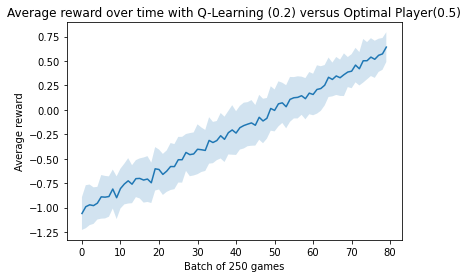

In [35]:
import matplotlib.pyplot as plt
mean = np.array([np.mean((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
var = np.array([np.var((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
plt.plot(np.arange(80),mean)
plt.fill_between(np.arange(80), mean-var/2, mean+var/2, alpha = 0.2)
plt.title("Average reward over time with Q-Learning (0.2) versus Optimal Player(0.5)")
plt.xlabel("Batch of 250 games")
plt.ylabel("Average reward")
np.save("Q1", results)

## Q3

### Calculations of $M_{opt}$

In [10]:
results = []

for k in range(10):
    Turns = np.array(['X','O'])
    n_games = 20000
    winners = []
    count = []
    qvals = defaultdict(lambda: np.zeros(9))  
    assignments = defaultdict(lambda: len(assignments))
    alpha = 0.05
    gamma = 0.99
    max_eps = 0.8
    min_eps = 0.1
    n_star = 30000
    for i in range(1, n_games+1):
        # TESTING PHASE
        if i%250==0:
            print("Testing...")
            current_testing = []
            for w in range(500):
                #Reset the environment
                env.reset()
                grid, _, __ = env.observe()
                #Initialize the two players with epsilon 0
                player_opt_1 = OptimalPlayer(epsilon=1., player=Turns[w%2])
                player_q = Q_Player(epsilon=0., player=Turns[1 - w%2])
                for j in range(9):
                    if env.current_player == player_opt_1.player:
                        move = player_opt_1.act(grid)
                        grid, end, winner = env.step(move, print_grid=False)

                    else:
                        move = player_q.act(grid, assignments, qvals)
#                         assignments, _ = player_q.return_dicts()
                        grid, end, winner = env.step(move, print_grid=False)

                    if end:
                        current_testing.append(winner)
                        env.reset()
                        break
            winners.append(current_testing)
        # END OF TESTING               
        eps = max(min_eps, max_eps*(1-((i)/n_star)))
        print(k,i)
        env.reset()
        grid, _, __ = env.observe()
        player_opt_1 = OptimalPlayer(epsilon=0.5, player=Turns[i%2])
        player_q = Q_Player(epsilon=eps, player=Turns[1 - i%2])
        for j in range(9):
            if env.current_player == player_opt_1.player:
                move = player_opt_1.act(grid)
                grid, end, winner = env.step(move, print_grid=False)
                
            else:
                move = player_q.act(grid, assignments, qvals)
                assignments, qvals = player_q.return_dicts()
                last_move_q = convert(move)
                last_grid_q = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)

            if (env.current_player == player_q.player and j!=0) or end:
                qvals[last_grid_q][last_move_q] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q][last_move_q])
            if end:
#                 winners.append(winner)
#                 count.append(env.reward(player=Turns[1 - i%2]))
                env.reset()
                break
    results.append(winners)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

0 1333
0 1334
0 1335
0 1336
0 1337
0 1338
0 1339
0 1340
0 1341
0 1342
0 1343
0 1344
0 1345
0 1346
0 1347
0 1348
0 1349
0 1350
0 1351
0 1352
0 1353
0 1354
0 1355
0 1356
0 1357
0 1358
0 1359
0 1360
0 1361
0 1362
0 1363
0 1364
0 1365
0 1366
0 1367
0 1368
0 1369
0 1370
0 1371
0 1372
0 1373
0 1374
0 1375
0 1376
0 1377
0 1378
0 1379
0 1380
0 1381
0 1382
0 1383
0 1384
0 1385
0 1386
0 1387
0 1388
0 1389
0 1390
0 1391
0 1392
0 1393
0 1394
0 1395
0 1396
0 1397
0 1398
0 1399
0 1400
0 1401
0 1402
0 1403
0 1404
0 1405
0 1406
0 1407
0 1408
0 1409
0 1410
0 1411
0 1412
0 1413
0 1414
0 1415
0 1416
0 1417
0 1418
0 1419
0 1420
0 1421
0 1422
0 1423
0 1424
0 1425
0 1426
0 1427
0 1428
0 1429
0 1430
0 1431
0 1432
0 1433
0 1434
0 1435
0 1436
0 1437
0 1438
0 1439
0 1440
0 1441
0 1442
0 1443
0 1444
0 1445
0 1446
0 1447
0 1448
0 1449
0 1450
0 1451
0 1452
0 1453
0 1454
0 1455
0 1456
0 1457
0 1458
0 1459
0 1460
0 1461
0 1462
0 1463
0 1464
0 1465
0 1466
0 1467
0 1468
0 1469
0 1470
0 1471
0 1472
0 1473
0 1474
0 1475

0 2500
0 2501
0 2502
0 2503
0 2504
0 2505
0 2506
0 2507
0 2508
0 2509
0 2510
0 2511
0 2512
0 2513
0 2514
0 2515
0 2516
0 2517
0 2518
0 2519
0 2520
0 2521
0 2522
0 2523
0 2524
0 2525
0 2526
0 2527
0 2528
0 2529
0 2530
0 2531
0 2532
0 2533
0 2534
0 2535
0 2536
0 2537
0 2538
0 2539
0 2540
0 2541
0 2542
0 2543
0 2544
0 2545
0 2546
0 2547
0 2548
0 2549
0 2550
0 2551
0 2552
0 2553
0 2554
0 2555
0 2556
0 2557
0 2558
0 2559
0 2560
0 2561
0 2562
0 2563
0 2564
0 2565
0 2566
0 2567
0 2568
0 2569
0 2570
0 2571
0 2572
0 2573
0 2574
0 2575
0 2576
0 2577
0 2578
0 2579
0 2580
0 2581
0 2582
0 2583
0 2584
0 2585
0 2586
0 2587
0 2588
0 2589
0 2590
0 2591
0 2592
0 2593
0 2594
0 2595
0 2596
0 2597
0 2598
0 2599
0 2600
0 2601
0 2602
0 2603
0 2604
0 2605
0 2606
0 2607
0 2608
0 2609
0 2610
0 2611
0 2612
0 2613
0 2614
0 2615
0 2616
0 2617
0 2618
0 2619
0 2620
0 2621
0 2622
0 2623
0 2624
0 2625
0 2626
0 2627
0 2628
0 2629
0 2630
0 2631
0 2632
0 2633
0 2634
0 2635
0 2636
0 2637
0 2638
0 2639
0 2640
0 2641
0 2642

0 3684
0 3685
0 3686
0 3687
0 3688
0 3689
0 3690
0 3691
0 3692
0 3693
0 3694
0 3695
0 3696
0 3697
0 3698
0 3699
0 3700
0 3701
0 3702
0 3703
0 3704
0 3705
0 3706
0 3707
0 3708
0 3709
0 3710
0 3711
0 3712
0 3713
0 3714
0 3715
0 3716
0 3717
0 3718
0 3719
0 3720
0 3721
0 3722
0 3723
0 3724
0 3725
0 3726
0 3727
0 3728
0 3729
0 3730
0 3731
0 3732
0 3733
0 3734
0 3735
0 3736
0 3737
0 3738
0 3739
0 3740
0 3741
0 3742
0 3743
0 3744
0 3745
0 3746
0 3747
0 3748
0 3749
Testing...
0 3750
0 3751
0 3752
0 3753
0 3754
0 3755
0 3756
0 3757
0 3758
0 3759
0 3760
0 3761
0 3762
0 3763
0 3764
0 3765
0 3766
0 3767
0 3768
0 3769
0 3770
0 3771
0 3772
0 3773
0 3774
0 3775
0 3776
0 3777
0 3778
0 3779
0 3780
0 3781
0 3782
0 3783
0 3784
0 3785
0 3786
0 3787
0 3788
0 3789
0 3790
0 3791
0 3792
0 3793
0 3794
0 3795
0 3796
0 3797
0 3798
0 3799
0 3800
0 3801
0 3802
0 3803
0 3804
0 3805
0 3806
0 3807
0 3808
0 3809
0 3810
0 3811
0 3812
0 3813
0 3814
0 3815
0 3816
0 3817
0 3818
0 3819
0 3820
0 3821
0 3822
0 3823
0 3824
0 

0 4862
0 4863
0 4864
0 4865
0 4866
0 4867
0 4868
0 4869
0 4870
0 4871
0 4872
0 4873
0 4874
0 4875
0 4876
0 4877
0 4878
0 4879
0 4880
0 4881
0 4882
0 4883
0 4884
0 4885
0 4886
0 4887
0 4888
0 4889
0 4890
0 4891
0 4892
0 4893
0 4894
0 4895
0 4896
0 4897
0 4898
0 4899
0 4900
0 4901
0 4902
0 4903
0 4904
0 4905
0 4906
0 4907
0 4908
0 4909
0 4910
0 4911
0 4912
0 4913
0 4914
0 4915
0 4916
0 4917
0 4918
0 4919
0 4920
0 4921
0 4922
0 4923
0 4924
0 4925
0 4926
0 4927
0 4928
0 4929
0 4930
0 4931
0 4932
0 4933
0 4934
0 4935
0 4936
0 4937
0 4938
0 4939
0 4940
0 4941
0 4942
0 4943
0 4944
0 4945
0 4946
0 4947
0 4948
0 4949
0 4950
0 4951
0 4952
0 4953
0 4954
0 4955
0 4956
0 4957
0 4958
0 4959
0 4960
0 4961
0 4962
0 4963
0 4964
0 4965
0 4966
0 4967
0 4968
0 4969
0 4970
0 4971
0 4972
0 4973
0 4974
0 4975
0 4976
0 4977
0 4978
0 4979
0 4980
0 4981
0 4982
0 4983
0 4984
0 4985
0 4986
0 4987
0 4988
0 4989
0 4990
0 4991
0 4992
0 4993
0 4994
0 4995
0 4996
0 4997
0 4998
0 4999
Testing...
0 5000
0 5001
0 5002
0 

0 6038
0 6039
0 6040
0 6041
0 6042
0 6043
0 6044
0 6045
0 6046
0 6047
0 6048
0 6049
0 6050
0 6051
0 6052
0 6053
0 6054
0 6055
0 6056
0 6057
0 6058
0 6059
0 6060
0 6061
0 6062
0 6063
0 6064
0 6065
0 6066
0 6067
0 6068
0 6069
0 6070
0 6071
0 6072
0 6073
0 6074
0 6075
0 6076
0 6077
0 6078
0 6079
0 6080
0 6081
0 6082
0 6083
0 6084
0 6085
0 6086
0 6087
0 6088
0 6089
0 6090
0 6091
0 6092
0 6093
0 6094
0 6095
0 6096
0 6097
0 6098
0 6099
0 6100
0 6101
0 6102
0 6103
0 6104
0 6105
0 6106
0 6107
0 6108
0 6109
0 6110
0 6111
0 6112
0 6113
0 6114
0 6115
0 6116
0 6117
0 6118
0 6119
0 6120
0 6121
0 6122
0 6123
0 6124
0 6125
0 6126
0 6127
0 6128
0 6129
0 6130
0 6131
0 6132
0 6133
0 6134
0 6135
0 6136
0 6137
0 6138
0 6139
0 6140
0 6141
0 6142
0 6143
0 6144
0 6145
0 6146
0 6147
0 6148
0 6149
0 6150
0 6151
0 6152
0 6153
0 6154
0 6155
0 6156
0 6157
0 6158
0 6159
0 6160
0 6161
0 6162
0 6163
0 6164
0 6165
0 6166
0 6167
0 6168
0 6169
0 6170
0 6171
0 6172
0 6173
0 6174
0 6175
0 6176
0 6177
0 6178
0 6179
0 6180

0 7222
0 7223
0 7224
0 7225
0 7226
0 7227
0 7228
0 7229
0 7230
0 7231
0 7232
0 7233
0 7234
0 7235
0 7236
0 7237
0 7238
0 7239
0 7240
0 7241
0 7242
0 7243
0 7244
0 7245
0 7246
0 7247
0 7248
0 7249
Testing...
0 7250
0 7251
0 7252
0 7253
0 7254
0 7255
0 7256
0 7257
0 7258
0 7259
0 7260
0 7261
0 7262
0 7263
0 7264
0 7265
0 7266
0 7267
0 7268
0 7269
0 7270
0 7271
0 7272
0 7273
0 7274
0 7275
0 7276
0 7277
0 7278
0 7279
0 7280
0 7281
0 7282
0 7283
0 7284
0 7285
0 7286
0 7287
0 7288
0 7289
0 7290
0 7291
0 7292
0 7293
0 7294
0 7295
0 7296
0 7297
0 7298
0 7299
0 7300
0 7301
0 7302
0 7303
0 7304
0 7305
0 7306
0 7307
0 7308
0 7309
0 7310
0 7311
0 7312
0 7313
0 7314
0 7315
0 7316
0 7317
0 7318
0 7319
0 7320
0 7321
0 7322
0 7323
0 7324
0 7325
0 7326
0 7327
0 7328
0 7329
0 7330
0 7331
0 7332
0 7333
0 7334
0 7335
0 7336
0 7337
0 7338
0 7339
0 7340
0 7341
0 7342
0 7343
0 7344
0 7345
0 7346
0 7347
0 7348
0 7349
0 7350
0 7351
0 7352
0 7353
0 7354
0 7355
0 7356
0 7357
0 7358
0 7359
0 7360
0 7361
0 7362
0 

0 8389
0 8390
0 8391
0 8392
0 8393
0 8394
0 8395
0 8396
0 8397
0 8398
0 8399
0 8400
0 8401
0 8402
0 8403
0 8404
0 8405
0 8406
0 8407
0 8408
0 8409
0 8410
0 8411
0 8412
0 8413
0 8414
0 8415
0 8416
0 8417
0 8418
0 8419
0 8420
0 8421
0 8422
0 8423
0 8424
0 8425
0 8426
0 8427
0 8428
0 8429
0 8430
0 8431
0 8432
0 8433
0 8434
0 8435
0 8436
0 8437
0 8438
0 8439
0 8440
0 8441
0 8442
0 8443
0 8444
0 8445
0 8446
0 8447
0 8448
0 8449
0 8450
0 8451
0 8452
0 8453
0 8454
0 8455
0 8456
0 8457
0 8458
0 8459
0 8460
0 8461
0 8462
0 8463
0 8464
0 8465
0 8466
0 8467
0 8468
0 8469
0 8470
0 8471
0 8472
0 8473
0 8474
0 8475
0 8476
0 8477
0 8478
0 8479
0 8480
0 8481
0 8482
0 8483
0 8484
0 8485
0 8486
0 8487
0 8488
0 8489
0 8490
0 8491
0 8492
0 8493
0 8494
0 8495
0 8496
0 8497
0 8498
0 8499
Testing...
0 8500
0 8501
0 8502
0 8503
0 8504
0 8505
0 8506
0 8507
0 8508
0 8509
0 8510
0 8511
0 8512
0 8513
0 8514
0 8515
0 8516
0 8517
0 8518
0 8519
0 8520
0 8521
0 8522
0 8523
0 8524
0 8525
0 8526
0 8527
0 8528
0 8529
0 

0 9557
0 9558
0 9559
0 9560
0 9561
0 9562
0 9563
0 9564
0 9565
0 9566
0 9567
0 9568
0 9569
0 9570
0 9571
0 9572
0 9573
0 9574
0 9575
0 9576
0 9577
0 9578
0 9579
0 9580
0 9581
0 9582
0 9583
0 9584
0 9585
0 9586
0 9587
0 9588
0 9589
0 9590
0 9591
0 9592
0 9593
0 9594
0 9595
0 9596
0 9597
0 9598
0 9599
0 9600
0 9601
0 9602
0 9603
0 9604
0 9605
0 9606
0 9607
0 9608
0 9609
0 9610
0 9611
0 9612
0 9613
0 9614
0 9615
0 9616
0 9617
0 9618
0 9619
0 9620
0 9621
0 9622
0 9623
0 9624
0 9625
0 9626
0 9627
0 9628
0 9629
0 9630
0 9631
0 9632
0 9633
0 9634
0 9635
0 9636
0 9637
0 9638
0 9639
0 9640
0 9641
0 9642
0 9643
0 9644
0 9645
0 9646
0 9647
0 9648
0 9649
0 9650
0 9651
0 9652
0 9653
0 9654
0 9655
0 9656
0 9657
0 9658
0 9659
0 9660
0 9661
0 9662
0 9663
0 9664
0 9665
0 9666
0 9667
0 9668
0 9669
0 9670
0 9671
0 9672
0 9673
0 9674
0 9675
0 9676
0 9677
0 9678
0 9679
0 9680
0 9681
0 9682
0 9683
0 9684
0 9685
0 9686
0 9687
0 9688
0 9689
0 9690
0 9691
0 9692
0 9693
0 9694
0 9695
0 9696
0 9697
0 9698
0 9699

0 10643
0 10644
0 10645
0 10646
0 10647
0 10648
0 10649
0 10650
0 10651
0 10652
0 10653
0 10654
0 10655
0 10656
0 10657
0 10658
0 10659
0 10660
0 10661
0 10662
0 10663
0 10664
0 10665
0 10666
0 10667
0 10668
0 10669
0 10670
0 10671
0 10672
0 10673
0 10674
0 10675
0 10676
0 10677
0 10678
0 10679
0 10680
0 10681
0 10682
0 10683
0 10684
0 10685
0 10686
0 10687
0 10688
0 10689
0 10690
0 10691
0 10692
0 10693
0 10694
0 10695
0 10696
0 10697
0 10698
0 10699
0 10700
0 10701
0 10702
0 10703
0 10704
0 10705
0 10706
0 10707
0 10708
0 10709
0 10710
0 10711
0 10712
0 10713
0 10714
0 10715
0 10716
0 10717
0 10718
0 10719
0 10720
0 10721
0 10722
0 10723
0 10724
0 10725
0 10726
0 10727
0 10728
0 10729
0 10730
0 10731
0 10732
0 10733
0 10734
0 10735
0 10736
0 10737
0 10738
0 10739
0 10740
0 10741
0 10742
0 10743
0 10744
0 10745
0 10746
0 10747
0 10748
0 10749
Testing...
0 10750
0 10751
0 10752
0 10753
0 10754
0 10755
0 10756
0 10757
0 10758
0 10759
0 10760
0 10761
0 10762
0 10763
0 10764
0 10765
0 107

0 11675
0 11676
0 11677
0 11678
0 11679
0 11680
0 11681
0 11682
0 11683
0 11684
0 11685
0 11686
0 11687
0 11688
0 11689
0 11690
0 11691
0 11692
0 11693
0 11694
0 11695
0 11696
0 11697
0 11698
0 11699
0 11700
0 11701
0 11702
0 11703
0 11704
0 11705
0 11706
0 11707
0 11708
0 11709
0 11710
0 11711
0 11712
0 11713
0 11714
0 11715
0 11716
0 11717
0 11718
0 11719
0 11720
0 11721
0 11722
0 11723
0 11724
0 11725
0 11726
0 11727
0 11728
0 11729
0 11730
0 11731
0 11732
0 11733
0 11734
0 11735
0 11736
0 11737
0 11738
0 11739
0 11740
0 11741
0 11742
0 11743
0 11744
0 11745
0 11746
0 11747
0 11748
0 11749
Testing...
0 11750
0 11751
0 11752
0 11753
0 11754
0 11755
0 11756
0 11757
0 11758
0 11759
0 11760
0 11761
0 11762
0 11763
0 11764
0 11765
0 11766
0 11767
0 11768
0 11769
0 11770
0 11771
0 11772
0 11773
0 11774
0 11775
0 11776
0 11777
0 11778
0 11779
0 11780
0 11781
0 11782
0 11783
0 11784
0 11785
0 11786
0 11787
0 11788
0 11789
0 11790
0 11791
0 11792
0 11793
0 11794
0 11795
0 11796
0 11797
0 117

0 12708
0 12709
0 12710
0 12711
0 12712
0 12713
0 12714
0 12715
0 12716
0 12717
0 12718
0 12719
0 12720
0 12721
0 12722
0 12723
0 12724
0 12725
0 12726
0 12727
0 12728
0 12729
0 12730
0 12731
0 12732
0 12733
0 12734
0 12735
0 12736
0 12737
0 12738
0 12739
0 12740
0 12741
0 12742
0 12743
0 12744
0 12745
0 12746
0 12747
0 12748
0 12749
Testing...
0 12750
0 12751
0 12752
0 12753
0 12754
0 12755
0 12756
0 12757
0 12758
0 12759
0 12760
0 12761
0 12762
0 12763
0 12764
0 12765
0 12766
0 12767
0 12768
0 12769
0 12770
0 12771
0 12772
0 12773
0 12774
0 12775
0 12776
0 12777
0 12778
0 12779
0 12780
0 12781
0 12782
0 12783
0 12784
0 12785
0 12786
0 12787
0 12788
0 12789
0 12790
0 12791
0 12792
0 12793
0 12794
0 12795
0 12796
0 12797
0 12798
0 12799
0 12800
0 12801
0 12802
0 12803
0 12804
0 12805
0 12806
0 12807
0 12808
0 12809
0 12810
0 12811
0 12812
0 12813
0 12814
0 12815
0 12816
0 12817
0 12818
0 12819
0 12820
0 12821
0 12822
0 12823
0 12824
0 12825
0 12826
0 12827
0 12828
0 12829
0 12830
0 128

0 13727
0 13728
0 13729
0 13730
0 13731
0 13732
0 13733
0 13734
0 13735
0 13736
0 13737
0 13738
0 13739
0 13740
0 13741
0 13742
0 13743
0 13744
0 13745
0 13746
0 13747
0 13748
0 13749
Testing...
0 13750
0 13751
0 13752
0 13753
0 13754
0 13755
0 13756
0 13757
0 13758
0 13759
0 13760
0 13761
0 13762
0 13763
0 13764
0 13765
0 13766
0 13767
0 13768
0 13769
0 13770
0 13771
0 13772
0 13773
0 13774
0 13775
0 13776
0 13777
0 13778
0 13779
0 13780
0 13781
0 13782
0 13783
0 13784
0 13785
0 13786
0 13787
0 13788
0 13789
0 13790
0 13791
0 13792
0 13793
0 13794
0 13795
0 13796
0 13797
0 13798
0 13799
0 13800
0 13801
0 13802
0 13803
0 13804
0 13805
0 13806
0 13807
0 13808
0 13809
0 13810
0 13811
0 13812
0 13813
0 13814
0 13815
0 13816
0 13817
0 13818
0 13819
0 13820
0 13821
0 13822
0 13823
0 13824
0 13825
0 13826
0 13827
0 13828
0 13829
0 13830
0 13831
0 13832
0 13833
0 13834
0 13835
0 13836
0 13837
0 13838
0 13839
0 13840
0 13841
0 13842
0 13843
0 13844
0 13845
0 13846
0 13847
0 13848
0 13849
0 138

0 14750
0 14751
0 14752
0 14753
0 14754
0 14755
0 14756
0 14757
0 14758
0 14759
0 14760
0 14761
0 14762
0 14763
0 14764
0 14765
0 14766
0 14767
0 14768
0 14769
0 14770
0 14771
0 14772
0 14773
0 14774
0 14775
0 14776
0 14777
0 14778
0 14779
0 14780
0 14781
0 14782
0 14783
0 14784
0 14785
0 14786
0 14787
0 14788
0 14789
0 14790
0 14791
0 14792
0 14793
0 14794
0 14795
0 14796
0 14797
0 14798
0 14799
0 14800
0 14801
0 14802
0 14803
0 14804
0 14805
0 14806
0 14807
0 14808
0 14809
0 14810
0 14811
0 14812
0 14813
0 14814
0 14815
0 14816
0 14817
0 14818
0 14819
0 14820
0 14821
0 14822
0 14823
0 14824
0 14825
0 14826
0 14827
0 14828
0 14829
0 14830
0 14831
0 14832
0 14833
0 14834
0 14835
0 14836
0 14837
0 14838
0 14839
0 14840
0 14841
0 14842
0 14843
0 14844
0 14845
0 14846
0 14847
0 14848
0 14849
0 14850
0 14851
0 14852
0 14853
0 14854
0 14855
0 14856
0 14857
0 14858
0 14859
0 14860
0 14861
0 14862
0 14863
0 14864
0 14865
0 14866
0 14867
0 14868
0 14869
0 14870
0 14871
0 14872
0 14873
0 14874


0 15776
0 15777
0 15778
0 15779
0 15780
0 15781
0 15782
0 15783
0 15784
0 15785
0 15786
0 15787
0 15788
0 15789
0 15790
0 15791
0 15792
0 15793
0 15794
0 15795
0 15796
0 15797
0 15798
0 15799
0 15800
0 15801
0 15802
0 15803
0 15804
0 15805
0 15806
0 15807
0 15808
0 15809
0 15810
0 15811
0 15812
0 15813
0 15814
0 15815
0 15816
0 15817
0 15818
0 15819
0 15820
0 15821
0 15822
0 15823
0 15824
0 15825
0 15826
0 15827
0 15828
0 15829
0 15830
0 15831
0 15832
0 15833
0 15834
0 15835
0 15836
0 15837
0 15838
0 15839
0 15840
0 15841
0 15842
0 15843
0 15844
0 15845
0 15846
0 15847
0 15848
0 15849
0 15850
0 15851
0 15852
0 15853
0 15854
0 15855
0 15856
0 15857
0 15858
0 15859
0 15860
0 15861
0 15862
0 15863
0 15864
0 15865
0 15866
0 15867
0 15868
0 15869
0 15870
0 15871
0 15872
0 15873
0 15874
0 15875
0 15876
0 15877
0 15878
0 15879
0 15880
0 15881
0 15882
0 15883
0 15884
0 15885
0 15886
0 15887
0 15888
0 15889
0 15890
0 15891
0 15892
0 15893
0 15894
0 15895
0 15896
0 15897
0 15898
0 15899
0 15900


0 16813
0 16814
0 16815
0 16816
0 16817
0 16818
0 16819
0 16820
0 16821
0 16822
0 16823
0 16824
0 16825
0 16826
0 16827
0 16828
0 16829
0 16830
0 16831
0 16832
0 16833
0 16834
0 16835
0 16836
0 16837
0 16838
0 16839
0 16840
0 16841
0 16842
0 16843
0 16844
0 16845
0 16846
0 16847
0 16848
0 16849
0 16850
0 16851
0 16852
0 16853
0 16854
0 16855
0 16856
0 16857
0 16858
0 16859
0 16860
0 16861
0 16862
0 16863
0 16864
0 16865
0 16866
0 16867
0 16868
0 16869
0 16870
0 16871
0 16872
0 16873
0 16874
0 16875
0 16876
0 16877
0 16878
0 16879
0 16880
0 16881
0 16882
0 16883
0 16884
0 16885
0 16886
0 16887
0 16888
0 16889
0 16890
0 16891
0 16892
0 16893
0 16894
0 16895
0 16896
0 16897
0 16898
0 16899
0 16900
0 16901
0 16902
0 16903
0 16904
0 16905
0 16906
0 16907
0 16908
0 16909
0 16910
0 16911
0 16912
0 16913
0 16914
0 16915
0 16916
0 16917
0 16918
0 16919
0 16920
0 16921
0 16922
0 16923
0 16924
0 16925
0 16926
0 16927
0 16928
0 16929
0 16930
0 16931
0 16932
0 16933
0 16934
0 16935
0 16936
0 16937


0 17833
0 17834
0 17835
0 17836
0 17837
0 17838
0 17839
0 17840
0 17841
0 17842
0 17843
0 17844
0 17845
0 17846
0 17847
0 17848
0 17849
0 17850
0 17851
0 17852
0 17853
0 17854
0 17855
0 17856
0 17857
0 17858
0 17859
0 17860
0 17861
0 17862
0 17863
0 17864
0 17865
0 17866
0 17867
0 17868
0 17869
0 17870
0 17871
0 17872
0 17873
0 17874
0 17875
0 17876
0 17877
0 17878
0 17879
0 17880
0 17881
0 17882
0 17883
0 17884
0 17885
0 17886
0 17887
0 17888
0 17889
0 17890
0 17891
0 17892
0 17893
0 17894
0 17895
0 17896
0 17897
0 17898
0 17899
0 17900
0 17901
0 17902
0 17903
0 17904
0 17905
0 17906
0 17907
0 17908
0 17909
0 17910
0 17911
0 17912
0 17913
0 17914
0 17915
0 17916
0 17917
0 17918
0 17919
0 17920
0 17921
0 17922
0 17923
0 17924
0 17925
0 17926
0 17927
0 17928
0 17929
0 17930
0 17931
0 17932
0 17933
0 17934
0 17935
0 17936
0 17937
0 17938
0 17939
0 17940
0 17941
0 17942
0 17943
0 17944
0 17945
0 17946
0 17947
0 17948
0 17949
0 17950
0 17951
0 17952
0 17953
0 17954
0 17955
0 17956
0 17957


0 18852
0 18853
0 18854
0 18855
0 18856
0 18857
0 18858
0 18859
0 18860
0 18861
0 18862
0 18863
0 18864
0 18865
0 18866
0 18867
0 18868
0 18869
0 18870
0 18871
0 18872
0 18873
0 18874
0 18875
0 18876
0 18877
0 18878
0 18879
0 18880
0 18881
0 18882
0 18883
0 18884
0 18885
0 18886
0 18887
0 18888
0 18889
0 18890
0 18891
0 18892
0 18893
0 18894
0 18895
0 18896
0 18897
0 18898
0 18899
0 18900
0 18901
0 18902
0 18903
0 18904
0 18905
0 18906
0 18907
0 18908
0 18909
0 18910
0 18911
0 18912
0 18913
0 18914
0 18915
0 18916
0 18917
0 18918
0 18919
0 18920
0 18921
0 18922
0 18923
0 18924
0 18925
0 18926
0 18927
0 18928
0 18929
0 18930
0 18931
0 18932
0 18933
0 18934
0 18935
0 18936
0 18937
0 18938
0 18939
0 18940
0 18941
0 18942
0 18943
0 18944
0 18945
0 18946
0 18947
0 18948
0 18949
0 18950
0 18951
0 18952
0 18953
0 18954
0 18955
0 18956
0 18957
0 18958
0 18959
0 18960
0 18961
0 18962
0 18963
0 18964
0 18965
0 18966
0 18967
0 18968
0 18969
0 18970
0 18971
0 18972
0 18973
0 18974
0 18975
0 18976


0 19879
0 19880
0 19881
0 19882
0 19883
0 19884
0 19885
0 19886
0 19887
0 19888
0 19889
0 19890
0 19891
0 19892
0 19893
0 19894
0 19895
0 19896
0 19897
0 19898
0 19899
0 19900
0 19901
0 19902
0 19903
0 19904
0 19905
0 19906
0 19907
0 19908
0 19909
0 19910
0 19911
0 19912
0 19913
0 19914
0 19915
0 19916
0 19917
0 19918
0 19919
0 19920
0 19921
0 19922
0 19923
0 19924
0 19925
0 19926
0 19927
0 19928
0 19929
0 19930
0 19931
0 19932
0 19933
0 19934
0 19935
0 19936
0 19937
0 19938
0 19939
0 19940
0 19941
0 19942
0 19943
0 19944
0 19945
0 19946
0 19947
0 19948
0 19949
0 19950
0 19951
0 19952
0 19953
0 19954
0 19955
0 19956
0 19957
0 19958
0 19959
0 19960
0 19961
0 19962
0 19963
0 19964
0 19965
0 19966
0 19967
0 19968
0 19969
0 19970
0 19971
0 19972
0 19973
0 19974
0 19975
0 19976
0 19977
0 19978
0 19979
0 19980
0 19981
0 19982
0 19983
0 19984
0 19985
0 19986
0 19987
0 19988
0 19989
0 19990
0 19991
0 19992
0 19993
0 19994
0 19995
0 19996
0 19997
0 19998
0 19999
Testing...
0 20000
1 1
1 2
1 3
1

1 1189
1 1190
1 1191
1 1192
1 1193
1 1194
1 1195
1 1196
1 1197
1 1198
1 1199
1 1200
1 1201
1 1202
1 1203
1 1204
1 1205
1 1206
1 1207
1 1208
1 1209
1 1210
1 1211
1 1212
1 1213
1 1214
1 1215
1 1216
1 1217
1 1218
1 1219
1 1220
1 1221
1 1222
1 1223
1 1224
1 1225
1 1226
1 1227
1 1228
1 1229
1 1230
1 1231
1 1232
1 1233
1 1234
1 1235
1 1236
1 1237
1 1238
1 1239
1 1240
1 1241
1 1242
1 1243
1 1244
1 1245
1 1246
1 1247
1 1248
1 1249
Testing...
1 1250
1 1251
1 1252
1 1253
1 1254
1 1255
1 1256
1 1257
1 1258
1 1259
1 1260
1 1261
1 1262
1 1263
1 1264
1 1265
1 1266
1 1267
1 1268
1 1269
1 1270
1 1271
1 1272
1 1273
1 1274
1 1275
1 1276
1 1277
1 1278
1 1279
1 1280
1 1281
1 1282
1 1283
1 1284
1 1285
1 1286
1 1287
1 1288
1 1289
1 1290
1 1291
1 1292
1 1293
1 1294
1 1295
1 1296
1 1297
1 1298
1 1299
1 1300
1 1301
1 1302
1 1303
1 1304
1 1305
1 1306
1 1307
1 1308
1 1309
1 1310
1 1311
1 1312
1 1313
1 1314
1 1315
1 1316
1 1317
1 1318
1 1319
1 1320
1 1321
1 1322
1 1323
1 1324
1 1325
1 1326
1 1327
1 1328
1 1329
1 

1 2366
1 2367
1 2368
1 2369
1 2370
1 2371
1 2372
1 2373
1 2374
1 2375
1 2376
1 2377
1 2378
1 2379
1 2380
1 2381
1 2382
1 2383
1 2384
1 2385
1 2386
1 2387
1 2388
1 2389
1 2390
1 2391
1 2392
1 2393
1 2394
1 2395
1 2396
1 2397
1 2398
1 2399
1 2400
1 2401
1 2402
1 2403
1 2404
1 2405
1 2406
1 2407
1 2408
1 2409
1 2410
1 2411
1 2412
1 2413
1 2414
1 2415
1 2416
1 2417
1 2418
1 2419
1 2420
1 2421
1 2422
1 2423
1 2424
1 2425
1 2426
1 2427
1 2428
1 2429
1 2430
1 2431
1 2432
1 2433
1 2434
1 2435
1 2436
1 2437
1 2438
1 2439
1 2440
1 2441
1 2442
1 2443
1 2444
1 2445
1 2446
1 2447
1 2448
1 2449
1 2450
1 2451
1 2452
1 2453
1 2454
1 2455
1 2456
1 2457
1 2458
1 2459
1 2460
1 2461
1 2462
1 2463
1 2464
1 2465
1 2466
1 2467
1 2468
1 2469
1 2470
1 2471
1 2472
1 2473
1 2474
1 2475
1 2476
1 2477
1 2478
1 2479
1 2480
1 2481
1 2482
1 2483
1 2484
1 2485
1 2486
1 2487
1 2488
1 2489
1 2490
1 2491
1 2492
1 2493
1 2494
1 2495
1 2496
1 2497
1 2498
1 2499
Testing...
1 2500
1 2501
1 2502
1 2503
1 2504
1 2505
1 2506
1 

1 3541
1 3542
1 3543
1 3544
1 3545
1 3546
1 3547
1 3548
1 3549
1 3550
1 3551
1 3552
1 3553
1 3554
1 3555
1 3556
1 3557
1 3558
1 3559
1 3560
1 3561
1 3562
1 3563
1 3564
1 3565
1 3566
1 3567
1 3568
1 3569
1 3570
1 3571
1 3572
1 3573
1 3574
1 3575
1 3576
1 3577
1 3578
1 3579
1 3580
1 3581
1 3582
1 3583
1 3584
1 3585
1 3586
1 3587
1 3588
1 3589
1 3590
1 3591
1 3592
1 3593
1 3594
1 3595
1 3596
1 3597
1 3598
1 3599
1 3600
1 3601
1 3602
1 3603
1 3604
1 3605
1 3606
1 3607
1 3608
1 3609
1 3610
1 3611
1 3612
1 3613
1 3614
1 3615
1 3616
1 3617
1 3618
1 3619
1 3620
1 3621
1 3622
1 3623
1 3624
1 3625
1 3626
1 3627
1 3628
1 3629
1 3630
1 3631
1 3632
1 3633
1 3634
1 3635
1 3636
1 3637
1 3638
1 3639
1 3640
1 3641
1 3642
1 3643
1 3644
1 3645
1 3646
1 3647
1 3648
1 3649
1 3650
1 3651
1 3652
1 3653
1 3654
1 3655
1 3656
1 3657
1 3658
1 3659
1 3660
1 3661
1 3662
1 3663
1 3664
1 3665
1 3666
1 3667
1 3668
1 3669
1 3670
1 3671
1 3672
1 3673
1 3674
1 3675
1 3676
1 3677
1 3678
1 3679
1 3680
1 3681
1 3682
1 3683

1 4714
1 4715
1 4716
1 4717
1 4718
1 4719
1 4720
1 4721
1 4722
1 4723
1 4724
1 4725
1 4726
1 4727
1 4728
1 4729
1 4730
1 4731
1 4732
1 4733
1 4734
1 4735
1 4736
1 4737
1 4738
1 4739
1 4740
1 4741
1 4742
1 4743
1 4744
1 4745
1 4746
1 4747
1 4748
1 4749
Testing...
1 4750
1 4751
1 4752
1 4753
1 4754
1 4755
1 4756
1 4757
1 4758
1 4759
1 4760
1 4761
1 4762
1 4763
1 4764
1 4765
1 4766
1 4767
1 4768
1 4769
1 4770
1 4771
1 4772
1 4773
1 4774
1 4775
1 4776
1 4777
1 4778
1 4779
1 4780
1 4781
1 4782
1 4783
1 4784
1 4785
1 4786
1 4787
1 4788
1 4789
1 4790
1 4791
1 4792
1 4793
1 4794
1 4795
1 4796
1 4797
1 4798
1 4799
1 4800
1 4801
1 4802
1 4803
1 4804
1 4805
1 4806
1 4807
1 4808
1 4809
1 4810
1 4811
1 4812
1 4813
1 4814
1 4815
1 4816
1 4817
1 4818
1 4819
1 4820
1 4821
1 4822
1 4823
1 4824
1 4825
1 4826
1 4827
1 4828
1 4829
1 4830
1 4831
1 4832
1 4833
1 4834
1 4835
1 4836
1 4837
1 4838
1 4839
1 4840
1 4841
1 4842
1 4843
1 4844
1 4845
1 4846
1 4847
1 4848
1 4849
1 4850
1 4851
1 4852
1 4853
1 4854
1 

1 5903
1 5904
1 5905
1 5906
1 5907
1 5908
1 5909
1 5910
1 5911
1 5912
1 5913
1 5914
1 5915
1 5916
1 5917
1 5918
1 5919
1 5920
1 5921
1 5922
1 5923
1 5924
1 5925
1 5926
1 5927
1 5928
1 5929
1 5930
1 5931
1 5932
1 5933
1 5934
1 5935
1 5936
1 5937
1 5938
1 5939
1 5940
1 5941
1 5942
1 5943
1 5944
1 5945
1 5946
1 5947
1 5948
1 5949
1 5950
1 5951
1 5952
1 5953
1 5954
1 5955
1 5956
1 5957
1 5958
1 5959
1 5960
1 5961
1 5962
1 5963
1 5964
1 5965
1 5966
1 5967
1 5968
1 5969
1 5970
1 5971
1 5972
1 5973
1 5974
1 5975
1 5976
1 5977
1 5978
1 5979
1 5980
1 5981
1 5982
1 5983
1 5984
1 5985
1 5986
1 5987
1 5988
1 5989
1 5990
1 5991
1 5992
1 5993
1 5994
1 5995
1 5996
1 5997
1 5998
1 5999
Testing...
1 6000
1 6001
1 6002
1 6003
1 6004
1 6005
1 6006
1 6007
1 6008
1 6009
1 6010
1 6011
1 6012
1 6013
1 6014
1 6015
1 6016
1 6017
1 6018
1 6019
1 6020
1 6021
1 6022
1 6023
1 6024
1 6025
1 6026
1 6027
1 6028
1 6029
1 6030
1 6031
1 6032
1 6033
1 6034
1 6035
1 6036
1 6037
1 6038
1 6039
1 6040
1 6041
1 6042
1 6043
1 

1 7090
1 7091
1 7092
1 7093
1 7094
1 7095
1 7096
1 7097
1 7098
1 7099
1 7100
1 7101
1 7102
1 7103
1 7104
1 7105
1 7106
1 7107
1 7108
1 7109
1 7110
1 7111
1 7112
1 7113
1 7114
1 7115
1 7116
1 7117
1 7118
1 7119
1 7120
1 7121
1 7122
1 7123
1 7124
1 7125
1 7126
1 7127
1 7128
1 7129
1 7130
1 7131
1 7132
1 7133
1 7134
1 7135
1 7136
1 7137
1 7138
1 7139
1 7140
1 7141
1 7142
1 7143
1 7144
1 7145
1 7146
1 7147
1 7148
1 7149
1 7150
1 7151
1 7152
1 7153
1 7154
1 7155
1 7156
1 7157
1 7158
1 7159
1 7160
1 7161
1 7162
1 7163
1 7164
1 7165
1 7166
1 7167
1 7168
1 7169
1 7170
1 7171
1 7172
1 7173
1 7174
1 7175
1 7176
1 7177
1 7178
1 7179
1 7180
1 7181
1 7182
1 7183
1 7184
1 7185
1 7186
1 7187
1 7188
1 7189
1 7190
1 7191
1 7192
1 7193
1 7194
1 7195
1 7196
1 7197
1 7198
1 7199
1 7200
1 7201
1 7202
1 7203
1 7204
1 7205
1 7206
1 7207
1 7208
1 7209
1 7210
1 7211
1 7212
1 7213
1 7214
1 7215
1 7216
1 7217
1 7218
1 7219
1 7220
1 7221
1 7222
1 7223
1 7224
1 7225
1 7226
1 7227
1 7228
1 7229
1 7230
1 7231
1 7232

1 8279
1 8280
1 8281
1 8282
1 8283
1 8284
1 8285
1 8286
1 8287
1 8288
1 8289
1 8290
1 8291
1 8292
1 8293
1 8294
1 8295
1 8296
1 8297
1 8298
1 8299
1 8300
1 8301
1 8302
1 8303
1 8304
1 8305
1 8306
1 8307
1 8308
1 8309
1 8310
1 8311
1 8312
1 8313
1 8314
1 8315
1 8316
1 8317
1 8318
1 8319
1 8320
1 8321
1 8322
1 8323
1 8324
1 8325
1 8326
1 8327
1 8328
1 8329
1 8330
1 8331
1 8332
1 8333
1 8334
1 8335
1 8336
1 8337
1 8338
1 8339
1 8340
1 8341
1 8342
1 8343
1 8344
1 8345
1 8346
1 8347
1 8348
1 8349
1 8350
1 8351
1 8352
1 8353
1 8354
1 8355
1 8356
1 8357
1 8358
1 8359
1 8360
1 8361
1 8362
1 8363
1 8364
1 8365
1 8366
1 8367
1 8368
1 8369
1 8370
1 8371
1 8372
1 8373
1 8374
1 8375
1 8376
1 8377
1 8378
1 8379
1 8380
1 8381
1 8382
1 8383
1 8384
1 8385
1 8386
1 8387
1 8388
1 8389
1 8390
1 8391
1 8392
1 8393
1 8394
1 8395
1 8396
1 8397
1 8398
1 8399
1 8400
1 8401
1 8402
1 8403
1 8404
1 8405
1 8406
1 8407
1 8408
1 8409
1 8410
1 8411
1 8412
1 8413
1 8414
1 8415
1 8416
1 8417
1 8418
1 8419
1 8420
1 8421

1 9458
1 9459
1 9460
1 9461
1 9462
1 9463
1 9464
1 9465
1 9466
1 9467
1 9468
1 9469
1 9470
1 9471
1 9472
1 9473
1 9474
1 9475
1 9476
1 9477
1 9478
1 9479
1 9480
1 9481
1 9482
1 9483
1 9484
1 9485
1 9486
1 9487
1 9488
1 9489
1 9490
1 9491
1 9492
1 9493
1 9494
1 9495
1 9496
1 9497
1 9498
1 9499
Testing...
1 9500
1 9501
1 9502
1 9503
1 9504
1 9505
1 9506
1 9507
1 9508
1 9509
1 9510
1 9511
1 9512
1 9513
1 9514
1 9515
1 9516
1 9517
1 9518
1 9519
1 9520
1 9521
1 9522
1 9523
1 9524
1 9525
1 9526
1 9527
1 9528
1 9529
1 9530
1 9531
1 9532
1 9533
1 9534
1 9535
1 9536
1 9537
1 9538
1 9539
1 9540
1 9541
1 9542
1 9543
1 9544
1 9545
1 9546
1 9547
1 9548
1 9549
1 9550
1 9551
1 9552
1 9553
1 9554
1 9555
1 9556
1 9557
1 9558
1 9559
1 9560
1 9561
1 9562
1 9563
1 9564
1 9565
1 9566
1 9567
1 9568
1 9569
1 9570
1 9571
1 9572
1 9573
1 9574
1 9575
1 9576
1 9577
1 9578
1 9579
1 9580
1 9581
1 9582
1 9583
1 9584
1 9585
1 9586
1 9587
1 9588
1 9589
1 9590
1 9591
1 9592
1 9593
1 9594
1 9595
1 9596
1 9597
1 9598
1 

1 10553
1 10554
1 10555
1 10556
1 10557
1 10558
1 10559
1 10560
1 10561
1 10562
1 10563
1 10564
1 10565
1 10566
1 10567
1 10568
1 10569
1 10570
1 10571
1 10572
1 10573
1 10574
1 10575
1 10576
1 10577
1 10578
1 10579
1 10580
1 10581
1 10582
1 10583
1 10584
1 10585
1 10586
1 10587
1 10588
1 10589
1 10590
1 10591
1 10592
1 10593
1 10594
1 10595
1 10596
1 10597
1 10598
1 10599
1 10600
1 10601
1 10602
1 10603
1 10604
1 10605
1 10606
1 10607
1 10608
1 10609
1 10610
1 10611
1 10612
1 10613
1 10614
1 10615
1 10616
1 10617
1 10618
1 10619
1 10620
1 10621
1 10622
1 10623
1 10624
1 10625
1 10626
1 10627
1 10628
1 10629
1 10630
1 10631
1 10632
1 10633
1 10634
1 10635
1 10636
1 10637
1 10638
1 10639
1 10640
1 10641
1 10642
1 10643
1 10644
1 10645
1 10646
1 10647
1 10648
1 10649
1 10650
1 10651
1 10652
1 10653
1 10654
1 10655
1 10656
1 10657
1 10658
1 10659
1 10660
1 10661
1 10662
1 10663
1 10664
1 10665
1 10666
1 10667
1 10668
1 10669
1 10670
1 10671
1 10672
1 10673
1 10674
1 10675
1 10676
1 10677


1 11586
1 11587
1 11588
1 11589
1 11590
1 11591
1 11592
1 11593
1 11594
1 11595
1 11596
1 11597
1 11598
1 11599
1 11600
1 11601
1 11602
1 11603
1 11604
1 11605
1 11606
1 11607
1 11608
1 11609
1 11610
1 11611
1 11612
1 11613
1 11614
1 11615
1 11616
1 11617
1 11618
1 11619
1 11620
1 11621
1 11622
1 11623
1 11624
1 11625
1 11626
1 11627
1 11628
1 11629
1 11630
1 11631
1 11632
1 11633
1 11634
1 11635
1 11636
1 11637
1 11638
1 11639
1 11640
1 11641
1 11642
1 11643
1 11644
1 11645
1 11646
1 11647
1 11648
1 11649
1 11650
1 11651
1 11652
1 11653
1 11654
1 11655
1 11656
1 11657
1 11658
1 11659
1 11660
1 11661
1 11662
1 11663
1 11664
1 11665
1 11666
1 11667
1 11668
1 11669
1 11670
1 11671
1 11672
1 11673
1 11674
1 11675
1 11676
1 11677
1 11678
1 11679
1 11680
1 11681
1 11682
1 11683
1 11684
1 11685
1 11686
1 11687
1 11688
1 11689
1 11690
1 11691
1 11692
1 11693
1 11694
1 11695
1 11696
1 11697
1 11698
1 11699
1 11700
1 11701
1 11702
1 11703
1 11704
1 11705
1 11706
1 11707
1 11708
1 11709
1 11710


1 12621
1 12622
1 12623
1 12624
1 12625
1 12626
1 12627
1 12628
1 12629
1 12630
1 12631
1 12632
1 12633
1 12634
1 12635
1 12636
1 12637
1 12638
1 12639
1 12640
1 12641
1 12642
1 12643
1 12644
1 12645
1 12646
1 12647
1 12648
1 12649
1 12650
1 12651
1 12652
1 12653
1 12654
1 12655
1 12656
1 12657
1 12658
1 12659
1 12660
1 12661
1 12662
1 12663
1 12664
1 12665
1 12666
1 12667
1 12668
1 12669
1 12670
1 12671
1 12672
1 12673
1 12674
1 12675
1 12676
1 12677
1 12678
1 12679
1 12680
1 12681
1 12682
1 12683
1 12684
1 12685
1 12686
1 12687
1 12688
1 12689
1 12690
1 12691
1 12692
1 12693
1 12694
1 12695
1 12696
1 12697
1 12698
1 12699
1 12700
1 12701
1 12702
1 12703
1 12704
1 12705
1 12706
1 12707
1 12708
1 12709
1 12710
1 12711
1 12712
1 12713
1 12714
1 12715
1 12716
1 12717
1 12718
1 12719
1 12720
1 12721
1 12722
1 12723
1 12724
1 12725
1 12726
1 12727
1 12728
1 12729
1 12730
1 12731
1 12732
1 12733
1 12734
1 12735
1 12736
1 12737
1 12738
1 12739
1 12740
1 12741
1 12742
1 12743
1 12744
1 12745


1 13640
1 13641
1 13642
1 13643
1 13644
1 13645
1 13646
1 13647
1 13648
1 13649
1 13650
1 13651
1 13652
1 13653
1 13654
1 13655
1 13656
1 13657
1 13658
1 13659
1 13660
1 13661
1 13662
1 13663
1 13664
1 13665
1 13666
1 13667
1 13668
1 13669
1 13670
1 13671
1 13672
1 13673
1 13674
1 13675
1 13676
1 13677
1 13678
1 13679
1 13680
1 13681
1 13682
1 13683
1 13684
1 13685
1 13686
1 13687
1 13688
1 13689
1 13690
1 13691
1 13692
1 13693
1 13694
1 13695
1 13696
1 13697
1 13698
1 13699
1 13700
1 13701
1 13702
1 13703
1 13704
1 13705
1 13706
1 13707
1 13708
1 13709
1 13710
1 13711
1 13712
1 13713
1 13714
1 13715
1 13716
1 13717
1 13718
1 13719
1 13720
1 13721
1 13722
1 13723
1 13724
1 13725
1 13726
1 13727
1 13728
1 13729
1 13730
1 13731
1 13732
1 13733
1 13734
1 13735
1 13736
1 13737
1 13738
1 13739
1 13740
1 13741
1 13742
1 13743
1 13744
1 13745
1 13746
1 13747
1 13748
1 13749
Testing...
1 13750
1 13751
1 13752
1 13753
1 13754
1 13755
1 13756
1 13757
1 13758
1 13759
1 13760
1 13761
1 13762
1 137

1 14663
1 14664
1 14665
1 14666
1 14667
1 14668
1 14669
1 14670
1 14671
1 14672
1 14673
1 14674
1 14675
1 14676
1 14677
1 14678
1 14679
1 14680
1 14681
1 14682
1 14683
1 14684
1 14685
1 14686
1 14687
1 14688
1 14689
1 14690
1 14691
1 14692
1 14693
1 14694
1 14695
1 14696
1 14697
1 14698
1 14699
1 14700
1 14701
1 14702
1 14703
1 14704
1 14705
1 14706
1 14707
1 14708
1 14709
1 14710
1 14711
1 14712
1 14713
1 14714
1 14715
1 14716
1 14717
1 14718
1 14719
1 14720
1 14721
1 14722
1 14723
1 14724
1 14725
1 14726
1 14727
1 14728
1 14729
1 14730
1 14731
1 14732
1 14733
1 14734
1 14735
1 14736
1 14737
1 14738
1 14739
1 14740
1 14741
1 14742
1 14743
1 14744
1 14745
1 14746
1 14747
1 14748
1 14749
Testing...
1 14750
1 14751
1 14752
1 14753
1 14754
1 14755
1 14756
1 14757
1 14758
1 14759
1 14760
1 14761
1 14762
1 14763
1 14764
1 14765
1 14766
1 14767
1 14768
1 14769
1 14770
1 14771
1 14772
1 14773
1 14774
1 14775
1 14776
1 14777
1 14778
1 14779
1 14780
1 14781
1 14782
1 14783
1 14784
1 14785
1 147

1 15702
1 15703
1 15704
1 15705
1 15706
1 15707
1 15708
1 15709
1 15710
1 15711
1 15712
1 15713
1 15714
1 15715
1 15716
1 15717
1 15718
1 15719
1 15720
1 15721
1 15722
1 15723
1 15724
1 15725
1 15726
1 15727
1 15728
1 15729
1 15730
1 15731
1 15732
1 15733
1 15734
1 15735
1 15736
1 15737
1 15738
1 15739
1 15740
1 15741
1 15742
1 15743
1 15744
1 15745
1 15746
1 15747
1 15748
1 15749
Testing...
1 15750
1 15751
1 15752
1 15753
1 15754
1 15755
1 15756
1 15757
1 15758
1 15759
1 15760
1 15761
1 15762
1 15763
1 15764
1 15765
1 15766
1 15767
1 15768
1 15769
1 15770
1 15771
1 15772
1 15773
1 15774
1 15775
1 15776
1 15777
1 15778
1 15779
1 15780
1 15781
1 15782
1 15783
1 15784
1 15785
1 15786
1 15787
1 15788
1 15789
1 15790
1 15791
1 15792
1 15793
1 15794
1 15795
1 15796
1 15797
1 15798
1 15799
1 15800
1 15801
1 15802
1 15803
1 15804
1 15805
1 15806
1 15807
1 15808
1 15809
1 15810
1 15811
1 15812
1 15813
1 15814
1 15815
1 15816
1 15817
1 15818
1 15819
1 15820
1 15821
1 15822
1 15823
1 15824
1 158

1 16746
1 16747
1 16748
1 16749
Testing...
1 16750
1 16751
1 16752
1 16753
1 16754
1 16755
1 16756
1 16757
1 16758
1 16759
1 16760
1 16761
1 16762
1 16763
1 16764
1 16765
1 16766
1 16767
1 16768
1 16769
1 16770
1 16771
1 16772
1 16773
1 16774
1 16775
1 16776
1 16777
1 16778
1 16779
1 16780
1 16781
1 16782
1 16783
1 16784
1 16785
1 16786
1 16787
1 16788
1 16789
1 16790
1 16791
1 16792
1 16793
1 16794
1 16795
1 16796
1 16797
1 16798
1 16799
1 16800
1 16801
1 16802
1 16803
1 16804
1 16805
1 16806
1 16807
1 16808
1 16809
1 16810
1 16811
1 16812
1 16813
1 16814
1 16815
1 16816
1 16817
1 16818
1 16819
1 16820
1 16821
1 16822
1 16823
1 16824
1 16825
1 16826
1 16827
1 16828
1 16829
1 16830
1 16831
1 16832
1 16833
1 16834
1 16835
1 16836
1 16837
1 16838
1 16839
1 16840
1 16841
1 16842
1 16843
1 16844
1 16845
1 16846
1 16847
1 16848
1 16849
1 16850
1 16851
1 16852
1 16853
1 16854
1 16855
1 16856
1 16857
1 16858
1 16859
1 16860
1 16861
1 16862
1 16863
1 16864
1 16865
1 16866
1 16867
1 16868
1 168

1 17781
1 17782
1 17783
1 17784
1 17785
1 17786
1 17787
1 17788
1 17789
1 17790
1 17791
1 17792
1 17793
1 17794
1 17795
1 17796
1 17797
1 17798
1 17799
1 17800
1 17801
1 17802
1 17803
1 17804
1 17805
1 17806
1 17807
1 17808
1 17809
1 17810
1 17811
1 17812
1 17813
1 17814
1 17815
1 17816
1 17817
1 17818
1 17819
1 17820
1 17821
1 17822
1 17823
1 17824
1 17825
1 17826
1 17827
1 17828
1 17829
1 17830
1 17831
1 17832
1 17833
1 17834
1 17835
1 17836
1 17837
1 17838
1 17839
1 17840
1 17841
1 17842
1 17843
1 17844
1 17845
1 17846
1 17847
1 17848
1 17849
1 17850
1 17851
1 17852
1 17853
1 17854
1 17855
1 17856
1 17857
1 17858
1 17859
1 17860
1 17861
1 17862
1 17863
1 17864
1 17865
1 17866
1 17867
1 17868
1 17869
1 17870
1 17871
1 17872
1 17873
1 17874
1 17875
1 17876
1 17877
1 17878
1 17879
1 17880
1 17881
1 17882
1 17883
1 17884
1 17885
1 17886
1 17887
1 17888
1 17889
1 17890
1 17891
1 17892
1 17893
1 17894
1 17895
1 17896
1 17897
1 17898
1 17899
1 17900
1 17901
1 17902
1 17903
1 17904
1 17905


1 18805
1 18806
1 18807
1 18808
1 18809
1 18810
1 18811
1 18812
1 18813
1 18814
1 18815
1 18816
1 18817
1 18818
1 18819
1 18820
1 18821
1 18822
1 18823
1 18824
1 18825
1 18826
1 18827
1 18828
1 18829
1 18830
1 18831
1 18832
1 18833
1 18834
1 18835
1 18836
1 18837
1 18838
1 18839
1 18840
1 18841
1 18842
1 18843
1 18844
1 18845
1 18846
1 18847
1 18848
1 18849
1 18850
1 18851
1 18852
1 18853
1 18854
1 18855
1 18856
1 18857
1 18858
1 18859
1 18860
1 18861
1 18862
1 18863
1 18864
1 18865
1 18866
1 18867
1 18868
1 18869
1 18870
1 18871
1 18872
1 18873
1 18874
1 18875
1 18876
1 18877
1 18878
1 18879
1 18880
1 18881
1 18882
1 18883
1 18884
1 18885
1 18886
1 18887
1 18888
1 18889
1 18890
1 18891
1 18892
1 18893
1 18894
1 18895
1 18896
1 18897
1 18898
1 18899
1 18900
1 18901
1 18902
1 18903
1 18904
1 18905
1 18906
1 18907
1 18908
1 18909
1 18910
1 18911
1 18912
1 18913
1 18914
1 18915
1 18916
1 18917
1 18918
1 18919
1 18920
1 18921
1 18922
1 18923
1 18924
1 18925
1 18926
1 18927
1 18928
1 18929


1 19832
1 19833
1 19834
1 19835
1 19836
1 19837
1 19838
1 19839
1 19840
1 19841
1 19842
1 19843
1 19844
1 19845
1 19846
1 19847
1 19848
1 19849
1 19850
1 19851
1 19852
1 19853
1 19854
1 19855
1 19856
1 19857
1 19858
1 19859
1 19860
1 19861
1 19862
1 19863
1 19864
1 19865
1 19866
1 19867
1 19868
1 19869
1 19870
1 19871
1 19872
1 19873
1 19874
1 19875
1 19876
1 19877
1 19878
1 19879
1 19880
1 19881
1 19882
1 19883
1 19884
1 19885
1 19886
1 19887
1 19888
1 19889
1 19890
1 19891
1 19892
1 19893
1 19894
1 19895
1 19896
1 19897
1 19898
1 19899
1 19900
1 19901
1 19902
1 19903
1 19904
1 19905
1 19906
1 19907
1 19908
1 19909
1 19910
1 19911
1 19912
1 19913
1 19914
1 19915
1 19916
1 19917
1 19918
1 19919
1 19920
1 19921
1 19922
1 19923
1 19924
1 19925
1 19926
1 19927
1 19928
1 19929
1 19930
1 19931
1 19932
1 19933
1 19934
1 19935
1 19936
1 19937
1 19938
1 19939
1 19940
1 19941
1 19942
1 19943
1 19944
1 19945
1 19946
1 19947
1 19948
1 19949
1 19950
1 19951
1 19952
1 19953
1 19954
1 19955
1 19956


2 1140
2 1141
2 1142
2 1143
2 1144
2 1145
2 1146
2 1147
2 1148
2 1149
2 1150
2 1151
2 1152
2 1153
2 1154
2 1155
2 1156
2 1157
2 1158
2 1159
2 1160
2 1161
2 1162
2 1163
2 1164
2 1165
2 1166
2 1167
2 1168
2 1169
2 1170
2 1171
2 1172
2 1173
2 1174
2 1175
2 1176
2 1177
2 1178
2 1179
2 1180
2 1181
2 1182
2 1183
2 1184
2 1185
2 1186
2 1187
2 1188
2 1189
2 1190
2 1191
2 1192
2 1193
2 1194
2 1195
2 1196
2 1197
2 1198
2 1199
2 1200
2 1201
2 1202
2 1203
2 1204
2 1205
2 1206
2 1207
2 1208
2 1209
2 1210
2 1211
2 1212
2 1213
2 1214
2 1215
2 1216
2 1217
2 1218
2 1219
2 1220
2 1221
2 1222
2 1223
2 1224
2 1225
2 1226
2 1227
2 1228
2 1229
2 1230
2 1231
2 1232
2 1233
2 1234
2 1235
2 1236
2 1237
2 1238
2 1239
2 1240
2 1241
2 1242
2 1243
2 1244
2 1245
2 1246
2 1247
2 1248
2 1249
Testing...
2 1250
2 1251
2 1252
2 1253
2 1254
2 1255
2 1256
2 1257
2 1258
2 1259
2 1260
2 1261
2 1262
2 1263
2 1264
2 1265
2 1266
2 1267
2 1268
2 1269
2 1270
2 1271
2 1272
2 1273
2 1274
2 1275
2 1276
2 1277
2 1278
2 1279
2 1280
2 

2 2328
2 2329
2 2330
2 2331
2 2332
2 2333
2 2334
2 2335
2 2336
2 2337
2 2338
2 2339
2 2340
2 2341
2 2342
2 2343
2 2344
2 2345
2 2346
2 2347
2 2348
2 2349
2 2350
2 2351
2 2352
2 2353
2 2354
2 2355
2 2356
2 2357
2 2358
2 2359
2 2360
2 2361
2 2362
2 2363
2 2364
2 2365
2 2366
2 2367
2 2368
2 2369
2 2370
2 2371
2 2372
2 2373
2 2374
2 2375
2 2376
2 2377
2 2378
2 2379
2 2380
2 2381
2 2382
2 2383
2 2384
2 2385
2 2386
2 2387
2 2388
2 2389
2 2390
2 2391
2 2392
2 2393
2 2394
2 2395
2 2396
2 2397
2 2398
2 2399
2 2400
2 2401
2 2402
2 2403
2 2404
2 2405
2 2406
2 2407
2 2408
2 2409
2 2410
2 2411
2 2412
2 2413
2 2414
2 2415
2 2416
2 2417
2 2418
2 2419
2 2420
2 2421
2 2422
2 2423
2 2424
2 2425
2 2426
2 2427
2 2428
2 2429
2 2430
2 2431
2 2432
2 2433
2 2434
2 2435
2 2436
2 2437
2 2438
2 2439
2 2440
2 2441
2 2442
2 2443
2 2444
2 2445
2 2446
2 2447
2 2448
2 2449
2 2450
2 2451
2 2452
2 2453
2 2454
2 2455
2 2456
2 2457
2 2458
2 2459
2 2460
2 2461
2 2462
2 2463
2 2464
2 2465
2 2466
2 2467
2 2468
2 2469
2 2470

2 3500
2 3501
2 3502
2 3503
2 3504
2 3505
2 3506
2 3507
2 3508
2 3509
2 3510
2 3511
2 3512
2 3513
2 3514
2 3515
2 3516
2 3517
2 3518
2 3519
2 3520
2 3521
2 3522
2 3523
2 3524
2 3525
2 3526
2 3527
2 3528
2 3529
2 3530
2 3531
2 3532
2 3533
2 3534
2 3535
2 3536
2 3537
2 3538
2 3539
2 3540
2 3541
2 3542
2 3543
2 3544
2 3545
2 3546
2 3547
2 3548
2 3549
2 3550
2 3551
2 3552
2 3553
2 3554
2 3555
2 3556
2 3557
2 3558
2 3559
2 3560
2 3561
2 3562
2 3563
2 3564
2 3565
2 3566
2 3567
2 3568
2 3569
2 3570
2 3571
2 3572
2 3573
2 3574
2 3575
2 3576
2 3577
2 3578
2 3579
2 3580
2 3581
2 3582
2 3583
2 3584
2 3585
2 3586
2 3587
2 3588
2 3589
2 3590
2 3591
2 3592
2 3593
2 3594
2 3595
2 3596
2 3597
2 3598
2 3599
2 3600
2 3601
2 3602
2 3603
2 3604
2 3605
2 3606
2 3607
2 3608
2 3609
2 3610
2 3611
2 3612
2 3613
2 3614
2 3615
2 3616
2 3617
2 3618
2 3619
2 3620
2 3621
2 3622
2 3623
2 3624
2 3625
2 3626
2 3627
2 3628
2 3629
2 3630
2 3631
2 3632
2 3633
2 3634
2 3635
2 3636
2 3637
2 3638
2 3639
2 3640
2 3641
2 3642

2 4687
2 4688
2 4689
2 4690
2 4691
2 4692
2 4693
2 4694
2 4695
2 4696
2 4697
2 4698
2 4699
2 4700
2 4701
2 4702
2 4703
2 4704
2 4705
2 4706
2 4707
2 4708
2 4709
2 4710
2 4711
2 4712
2 4713
2 4714
2 4715
2 4716
2 4717
2 4718
2 4719
2 4720
2 4721
2 4722
2 4723
2 4724
2 4725
2 4726
2 4727
2 4728
2 4729
2 4730
2 4731
2 4732
2 4733
2 4734
2 4735
2 4736
2 4737
2 4738
2 4739
2 4740
2 4741
2 4742
2 4743
2 4744
2 4745
2 4746
2 4747
2 4748
2 4749
Testing...
2 4750
2 4751
2 4752
2 4753
2 4754
2 4755
2 4756
2 4757
2 4758
2 4759
2 4760
2 4761
2 4762
2 4763
2 4764
2 4765
2 4766
2 4767
2 4768
2 4769
2 4770
2 4771
2 4772
2 4773
2 4774
2 4775
2 4776
2 4777
2 4778
2 4779
2 4780
2 4781
2 4782
2 4783
2 4784
2 4785
2 4786
2 4787
2 4788
2 4789
2 4790
2 4791
2 4792
2 4793
2 4794
2 4795
2 4796
2 4797
2 4798
2 4799
2 4800
2 4801
2 4802
2 4803
2 4804
2 4805
2 4806
2 4807
2 4808
2 4809
2 4810
2 4811
2 4812
2 4813
2 4814
2 4815
2 4816
2 4817
2 4818
2 4819
2 4820
2 4821
2 4822
2 4823
2 4824
2 4825
2 4826
2 4827
2 

2 5877
2 5878
2 5879
2 5880
2 5881
2 5882
2 5883
2 5884
2 5885
2 5886
2 5887
2 5888
2 5889
2 5890
2 5891
2 5892
2 5893
2 5894
2 5895
2 5896
2 5897
2 5898
2 5899
2 5900
2 5901
2 5902
2 5903
2 5904
2 5905
2 5906
2 5907
2 5908
2 5909
2 5910
2 5911
2 5912
2 5913
2 5914
2 5915
2 5916
2 5917
2 5918
2 5919
2 5920
2 5921
2 5922
2 5923
2 5924
2 5925
2 5926
2 5927
2 5928
2 5929
2 5930
2 5931
2 5932
2 5933
2 5934
2 5935
2 5936
2 5937
2 5938
2 5939
2 5940
2 5941
2 5942
2 5943
2 5944
2 5945
2 5946
2 5947
2 5948
2 5949
2 5950
2 5951
2 5952
2 5953
2 5954
2 5955
2 5956
2 5957
2 5958
2 5959
2 5960
2 5961
2 5962
2 5963
2 5964
2 5965
2 5966
2 5967
2 5968
2 5969
2 5970
2 5971
2 5972
2 5973
2 5974
2 5975
2 5976
2 5977
2 5978
2 5979
2 5980
2 5981
2 5982
2 5983
2 5984
2 5985
2 5986
2 5987
2 5988
2 5989
2 5990
2 5991
2 5992
2 5993
2 5994
2 5995
2 5996
2 5997
2 5998
2 5999
Testing...
2 6000
2 6001
2 6002
2 6003
2 6004
2 6005
2 6006
2 6007
2 6008
2 6009
2 6010
2 6011
2 6012
2 6013
2 6014
2 6015
2 6016
2 6017
2 

2 7040
2 7041
2 7042
2 7043
2 7044
2 7045
2 7046
2 7047
2 7048
2 7049
2 7050
2 7051
2 7052
2 7053
2 7054
2 7055
2 7056
2 7057
2 7058
2 7059
2 7060
2 7061
2 7062
2 7063
2 7064
2 7065
2 7066
2 7067
2 7068
2 7069
2 7070
2 7071
2 7072
2 7073
2 7074
2 7075
2 7076
2 7077
2 7078
2 7079
2 7080
2 7081
2 7082
2 7083
2 7084
2 7085
2 7086
2 7087
2 7088
2 7089
2 7090
2 7091
2 7092
2 7093
2 7094
2 7095
2 7096
2 7097
2 7098
2 7099
2 7100
2 7101
2 7102
2 7103
2 7104
2 7105
2 7106
2 7107
2 7108
2 7109
2 7110
2 7111
2 7112
2 7113
2 7114
2 7115
2 7116
2 7117
2 7118
2 7119
2 7120
2 7121
2 7122
2 7123
2 7124
2 7125
2 7126
2 7127
2 7128
2 7129
2 7130
2 7131
2 7132
2 7133
2 7134
2 7135
2 7136
2 7137
2 7138
2 7139
2 7140
2 7141
2 7142
2 7143
2 7144
2 7145
2 7146
2 7147
2 7148
2 7149
2 7150
2 7151
2 7152
2 7153
2 7154
2 7155
2 7156
2 7157
2 7158
2 7159
2 7160
2 7161
2 7162
2 7163
2 7164
2 7165
2 7166
2 7167
2 7168
2 7169
2 7170
2 7171
2 7172
2 7173
2 7174
2 7175
2 7176
2 7177
2 7178
2 7179
2 7180
2 7181
2 7182

2 8207
2 8208
2 8209
2 8210
2 8211
2 8212
2 8213
2 8214
2 8215
2 8216
2 8217
2 8218
2 8219
2 8220
2 8221
2 8222
2 8223
2 8224
2 8225
2 8226
2 8227
2 8228
2 8229
2 8230
2 8231
2 8232
2 8233
2 8234
2 8235
2 8236
2 8237
2 8238
2 8239
2 8240
2 8241
2 8242
2 8243
2 8244
2 8245
2 8246
2 8247
2 8248
2 8249
Testing...
2 8250
2 8251
2 8252
2 8253
2 8254
2 8255
2 8256
2 8257
2 8258
2 8259
2 8260
2 8261
2 8262
2 8263
2 8264
2 8265
2 8266
2 8267
2 8268
2 8269
2 8270
2 8271
2 8272
2 8273
2 8274
2 8275
2 8276
2 8277
2 8278
2 8279
2 8280
2 8281
2 8282
2 8283
2 8284
2 8285
2 8286
2 8287
2 8288
2 8289
2 8290
2 8291
2 8292
2 8293
2 8294
2 8295
2 8296
2 8297
2 8298
2 8299
2 8300
2 8301
2 8302
2 8303
2 8304
2 8305
2 8306
2 8307
2 8308
2 8309
2 8310
2 8311
2 8312
2 8313
2 8314
2 8315
2 8316
2 8317
2 8318
2 8319
2 8320
2 8321
2 8322
2 8323
2 8324
2 8325
2 8326
2 8327
2 8328
2 8329
2 8330
2 8331
2 8332
2 8333
2 8334
2 8335
2 8336
2 8337
2 8338
2 8339
2 8340
2 8341
2 8342
2 8343
2 8344
2 8345
2 8346
2 8347
2 

2 9386
2 9387
2 9388
2 9389
2 9390
2 9391
2 9392
2 9393
2 9394
2 9395
2 9396
2 9397
2 9398
2 9399
2 9400
2 9401
2 9402
2 9403
2 9404
2 9405
2 9406
2 9407
2 9408
2 9409
2 9410
2 9411
2 9412
2 9413
2 9414
2 9415
2 9416
2 9417
2 9418
2 9419
2 9420
2 9421
2 9422
2 9423
2 9424
2 9425
2 9426
2 9427
2 9428
2 9429
2 9430
2 9431
2 9432
2 9433
2 9434
2 9435
2 9436
2 9437
2 9438
2 9439
2 9440
2 9441
2 9442
2 9443
2 9444
2 9445
2 9446
2 9447
2 9448
2 9449
2 9450
2 9451
2 9452
2 9453
2 9454
2 9455
2 9456
2 9457
2 9458
2 9459
2 9460
2 9461
2 9462
2 9463
2 9464
2 9465
2 9466
2 9467
2 9468
2 9469
2 9470
2 9471
2 9472
2 9473
2 9474
2 9475
2 9476
2 9477
2 9478
2 9479
2 9480
2 9481
2 9482
2 9483
2 9484
2 9485
2 9486
2 9487
2 9488
2 9489
2 9490
2 9491
2 9492
2 9493
2 9494
2 9495
2 9496
2 9497
2 9498
2 9499
Testing...
2 9500
2 9501
2 9502
2 9503
2 9504
2 9505
2 9506
2 9507
2 9508
2 9509
2 9510
2 9511
2 9512
2 9513
2 9514
2 9515
2 9516
2 9517
2 9518
2 9519
2 9520
2 9521
2 9522
2 9523
2 9524
2 9525
2 9526
2 

2 10500
2 10501
2 10502
2 10503
2 10504
2 10505
2 10506
2 10507
2 10508
2 10509
2 10510
2 10511
2 10512
2 10513
2 10514
2 10515
2 10516
2 10517
2 10518
2 10519
2 10520
2 10521
2 10522
2 10523
2 10524
2 10525
2 10526
2 10527
2 10528
2 10529
2 10530
2 10531
2 10532
2 10533
2 10534
2 10535
2 10536
2 10537
2 10538
2 10539
2 10540
2 10541
2 10542
2 10543
2 10544
2 10545
2 10546
2 10547
2 10548
2 10549
2 10550
2 10551
2 10552
2 10553
2 10554
2 10555
2 10556
2 10557
2 10558
2 10559
2 10560
2 10561
2 10562
2 10563
2 10564
2 10565
2 10566
2 10567
2 10568
2 10569
2 10570
2 10571
2 10572
2 10573
2 10574
2 10575
2 10576
2 10577
2 10578
2 10579
2 10580
2 10581
2 10582
2 10583
2 10584
2 10585
2 10586
2 10587
2 10588
2 10589
2 10590
2 10591
2 10592
2 10593
2 10594
2 10595
2 10596
2 10597
2 10598
2 10599
2 10600
2 10601
2 10602
2 10603
2 10604
2 10605
2 10606
2 10607
2 10608
2 10609
2 10610
2 10611
2 10612
2 10613
2 10614
2 10615
2 10616
2 10617
2 10618
2 10619
2 10620
2 10621
2 10622
2 10623
2 10624


2 11530
2 11531
2 11532
2 11533
2 11534
2 11535
2 11536
2 11537
2 11538
2 11539
2 11540
2 11541
2 11542
2 11543
2 11544
2 11545
2 11546
2 11547
2 11548
2 11549
2 11550
2 11551
2 11552
2 11553
2 11554
2 11555
2 11556
2 11557
2 11558
2 11559
2 11560
2 11561
2 11562
2 11563
2 11564
2 11565
2 11566
2 11567
2 11568
2 11569
2 11570
2 11571
2 11572
2 11573
2 11574
2 11575
2 11576
2 11577
2 11578
2 11579
2 11580
2 11581
2 11582
2 11583
2 11584
2 11585
2 11586
2 11587
2 11588
2 11589
2 11590
2 11591
2 11592
2 11593
2 11594
2 11595
2 11596
2 11597
2 11598
2 11599
2 11600
2 11601
2 11602
2 11603
2 11604
2 11605
2 11606
2 11607
2 11608
2 11609
2 11610
2 11611
2 11612
2 11613
2 11614
2 11615
2 11616
2 11617
2 11618
2 11619
2 11620
2 11621
2 11622
2 11623
2 11624
2 11625
2 11626
2 11627
2 11628
2 11629
2 11630
2 11631
2 11632
2 11633
2 11634
2 11635
2 11636
2 11637
2 11638
2 11639
2 11640
2 11641
2 11642
2 11643
2 11644
2 11645
2 11646
2 11647
2 11648
2 11649
2 11650
2 11651
2 11652
2 11653
2 11654


2 12558
2 12559
2 12560
2 12561
2 12562
2 12563
2 12564
2 12565
2 12566
2 12567
2 12568
2 12569
2 12570
2 12571
2 12572
2 12573
2 12574
2 12575
2 12576
2 12577
2 12578
2 12579
2 12580
2 12581
2 12582
2 12583
2 12584
2 12585
2 12586
2 12587
2 12588
2 12589
2 12590
2 12591
2 12592
2 12593
2 12594
2 12595
2 12596
2 12597
2 12598
2 12599
2 12600
2 12601
2 12602
2 12603
2 12604
2 12605
2 12606
2 12607
2 12608
2 12609
2 12610
2 12611
2 12612
2 12613
2 12614
2 12615
2 12616
2 12617
2 12618
2 12619
2 12620
2 12621
2 12622
2 12623
2 12624
2 12625
2 12626
2 12627
2 12628
2 12629
2 12630
2 12631
2 12632
2 12633
2 12634
2 12635
2 12636
2 12637
2 12638
2 12639
2 12640
2 12641
2 12642
2 12643
2 12644
2 12645
2 12646
2 12647
2 12648
2 12649
2 12650
2 12651
2 12652
2 12653
2 12654
2 12655
2 12656
2 12657
2 12658
2 12659
2 12660
2 12661
2 12662
2 12663
2 12664
2 12665
2 12666
2 12667
2 12668
2 12669
2 12670
2 12671
2 12672
2 12673
2 12674
2 12675
2 12676
2 12677
2 12678
2 12679
2 12680
2 12681
2 12682


2 13590
2 13591
2 13592
2 13593
2 13594
2 13595
2 13596
2 13597
2 13598
2 13599
2 13600
2 13601
2 13602
2 13603
2 13604
2 13605
2 13606
2 13607
2 13608
2 13609
2 13610
2 13611
2 13612
2 13613
2 13614
2 13615
2 13616
2 13617
2 13618
2 13619
2 13620
2 13621
2 13622
2 13623
2 13624
2 13625
2 13626
2 13627
2 13628
2 13629
2 13630
2 13631
2 13632
2 13633
2 13634
2 13635
2 13636
2 13637
2 13638
2 13639
2 13640
2 13641
2 13642
2 13643
2 13644
2 13645
2 13646
2 13647
2 13648
2 13649
2 13650
2 13651
2 13652
2 13653
2 13654
2 13655
2 13656
2 13657
2 13658
2 13659
2 13660
2 13661
2 13662
2 13663
2 13664
2 13665
2 13666
2 13667
2 13668
2 13669
2 13670
2 13671
2 13672
2 13673
2 13674
2 13675
2 13676
2 13677
2 13678
2 13679
2 13680
2 13681
2 13682
2 13683
2 13684
2 13685
2 13686
2 13687
2 13688
2 13689
2 13690
2 13691
2 13692
2 13693
2 13694
2 13695
2 13696
2 13697
2 13698
2 13699
2 13700
2 13701
2 13702
2 13703
2 13704
2 13705
2 13706
2 13707
2 13708
2 13709
2 13710
2 13711
2 13712
2 13713
2 13714


2 14625
2 14626
2 14627
2 14628
2 14629
2 14630
2 14631
2 14632
2 14633
2 14634
2 14635
2 14636
2 14637
2 14638
2 14639
2 14640
2 14641
2 14642
2 14643
2 14644
2 14645
2 14646
2 14647
2 14648
2 14649
2 14650
2 14651
2 14652
2 14653
2 14654
2 14655
2 14656
2 14657
2 14658
2 14659
2 14660
2 14661
2 14662
2 14663
2 14664
2 14665
2 14666
2 14667
2 14668
2 14669
2 14670
2 14671
2 14672
2 14673
2 14674
2 14675
2 14676
2 14677
2 14678
2 14679
2 14680
2 14681
2 14682
2 14683
2 14684
2 14685
2 14686
2 14687
2 14688
2 14689
2 14690
2 14691
2 14692
2 14693
2 14694
2 14695
2 14696
2 14697
2 14698
2 14699
2 14700
2 14701
2 14702
2 14703
2 14704
2 14705
2 14706
2 14707
2 14708
2 14709
2 14710
2 14711
2 14712
2 14713
2 14714
2 14715
2 14716
2 14717
2 14718
2 14719
2 14720
2 14721
2 14722
2 14723
2 14724
2 14725
2 14726
2 14727
2 14728
2 14729
2 14730
2 14731
2 14732
2 14733
2 14734
2 14735
2 14736
2 14737
2 14738
2 14739
2 14740
2 14741
2 14742
2 14743
2 14744
2 14745
2 14746
2 14747
2 14748
2 14749


2 15645
2 15646
2 15647
2 15648
2 15649
2 15650
2 15651
2 15652
2 15653
2 15654
2 15655
2 15656
2 15657
2 15658
2 15659
2 15660
2 15661
2 15662
2 15663
2 15664
2 15665
2 15666
2 15667
2 15668
2 15669
2 15670
2 15671
2 15672
2 15673
2 15674
2 15675
2 15676
2 15677
2 15678
2 15679
2 15680
2 15681
2 15682
2 15683
2 15684
2 15685
2 15686
2 15687
2 15688
2 15689
2 15690
2 15691
2 15692
2 15693
2 15694
2 15695
2 15696
2 15697
2 15698
2 15699
2 15700
2 15701
2 15702
2 15703
2 15704
2 15705
2 15706
2 15707
2 15708
2 15709
2 15710
2 15711
2 15712
2 15713
2 15714
2 15715
2 15716
2 15717
2 15718
2 15719
2 15720
2 15721
2 15722
2 15723
2 15724
2 15725
2 15726
2 15727
2 15728
2 15729
2 15730
2 15731
2 15732
2 15733
2 15734
2 15735
2 15736
2 15737
2 15738
2 15739
2 15740
2 15741
2 15742
2 15743
2 15744
2 15745
2 15746
2 15747
2 15748
2 15749
Testing...
2 15750
2 15751
2 15752
2 15753
2 15754
2 15755
2 15756
2 15757
2 15758
2 15759
2 15760
2 15761
2 15762
2 15763
2 15764
2 15765
2 15766
2 15767
2 157

2 16686
2 16687
2 16688
2 16689
2 16690
2 16691
2 16692
2 16693
2 16694
2 16695
2 16696
2 16697
2 16698
2 16699
2 16700
2 16701
2 16702
2 16703
2 16704
2 16705
2 16706
2 16707
2 16708
2 16709
2 16710
2 16711
2 16712
2 16713
2 16714
2 16715
2 16716
2 16717
2 16718
2 16719
2 16720
2 16721
2 16722
2 16723
2 16724
2 16725
2 16726
2 16727
2 16728
2 16729
2 16730
2 16731
2 16732
2 16733
2 16734
2 16735
2 16736
2 16737
2 16738
2 16739
2 16740
2 16741
2 16742
2 16743
2 16744
2 16745
2 16746
2 16747
2 16748
2 16749
Testing...
2 16750
2 16751
2 16752
2 16753
2 16754
2 16755
2 16756
2 16757
2 16758
2 16759
2 16760
2 16761
2 16762
2 16763
2 16764
2 16765
2 16766
2 16767
2 16768
2 16769
2 16770
2 16771
2 16772
2 16773
2 16774
2 16775
2 16776
2 16777
2 16778
2 16779
2 16780
2 16781
2 16782
2 16783
2 16784
2 16785
2 16786
2 16787
2 16788
2 16789
2 16790
2 16791
2 16792
2 16793
2 16794
2 16795
2 16796
2 16797
2 16798
2 16799
2 16800
2 16801
2 16802
2 16803
2 16804
2 16805
2 16806
2 16807
2 16808
2 168

2 17706
2 17707
2 17708
2 17709
2 17710
2 17711
2 17712
2 17713
2 17714
2 17715
2 17716
2 17717
2 17718
2 17719
2 17720
2 17721
2 17722
2 17723
2 17724
2 17725
2 17726
2 17727
2 17728
2 17729
2 17730
2 17731
2 17732
2 17733
2 17734
2 17735
2 17736
2 17737
2 17738
2 17739
2 17740
2 17741
2 17742
2 17743
2 17744
2 17745
2 17746
2 17747
2 17748
2 17749
Testing...
2 17750
2 17751
2 17752
2 17753
2 17754
2 17755
2 17756
2 17757
2 17758
2 17759
2 17760
2 17761
2 17762
2 17763
2 17764
2 17765
2 17766
2 17767
2 17768
2 17769
2 17770
2 17771
2 17772
2 17773
2 17774
2 17775
2 17776
2 17777
2 17778
2 17779
2 17780
2 17781
2 17782
2 17783
2 17784
2 17785
2 17786
2 17787
2 17788
2 17789
2 17790
2 17791
2 17792
2 17793
2 17794
2 17795
2 17796
2 17797
2 17798
2 17799
2 17800
2 17801
2 17802
2 17803
2 17804
2 17805
2 17806
2 17807
2 17808
2 17809
2 17810
2 17811
2 17812
2 17813
2 17814
2 17815
2 17816
2 17817
2 17818
2 17819
2 17820
2 17821
2 17822
2 17823
2 17824
2 17825
2 17826
2 17827
2 17828
2 178

2 18729
2 18730
2 18731
2 18732
2 18733
2 18734
2 18735
2 18736
2 18737
2 18738
2 18739
2 18740
2 18741
2 18742
2 18743
2 18744
2 18745
2 18746
2 18747
2 18748
2 18749
Testing...
2 18750
2 18751
2 18752
2 18753
2 18754
2 18755
2 18756
2 18757
2 18758
2 18759
2 18760
2 18761
2 18762
2 18763
2 18764
2 18765
2 18766
2 18767
2 18768
2 18769
2 18770
2 18771
2 18772
2 18773
2 18774
2 18775
2 18776
2 18777
2 18778
2 18779
2 18780
2 18781
2 18782
2 18783
2 18784
2 18785
2 18786
2 18787
2 18788
2 18789
2 18790
2 18791
2 18792
2 18793
2 18794
2 18795
2 18796
2 18797
2 18798
2 18799
2 18800
2 18801
2 18802
2 18803
2 18804
2 18805
2 18806
2 18807
2 18808
2 18809
2 18810
2 18811
2 18812
2 18813
2 18814
2 18815
2 18816
2 18817
2 18818
2 18819
2 18820
2 18821
2 18822
2 18823
2 18824
2 18825
2 18826
2 18827
2 18828
2 18829
2 18830
2 18831
2 18832
2 18833
2 18834
2 18835
2 18836
2 18837
2 18838
2 18839
2 18840
2 18841
2 18842
2 18843
2 18844
2 18845
2 18846
2 18847
2 18848
2 18849
2 18850
2 18851
2 188

2 19750
2 19751
2 19752
2 19753
2 19754
2 19755
2 19756
2 19757
2 19758
2 19759
2 19760
2 19761
2 19762
2 19763
2 19764
2 19765
2 19766
2 19767
2 19768
2 19769
2 19770
2 19771
2 19772
2 19773
2 19774
2 19775
2 19776
2 19777
2 19778
2 19779
2 19780
2 19781
2 19782
2 19783
2 19784
2 19785
2 19786
2 19787
2 19788
2 19789
2 19790
2 19791
2 19792
2 19793
2 19794
2 19795
2 19796
2 19797
2 19798
2 19799
2 19800
2 19801
2 19802
2 19803
2 19804
2 19805
2 19806
2 19807
2 19808
2 19809
2 19810
2 19811
2 19812
2 19813
2 19814
2 19815
2 19816
2 19817
2 19818
2 19819
2 19820
2 19821
2 19822
2 19823
2 19824
2 19825
2 19826
2 19827
2 19828
2 19829
2 19830
2 19831
2 19832
2 19833
2 19834
2 19835
2 19836
2 19837
2 19838
2 19839
2 19840
2 19841
2 19842
2 19843
2 19844
2 19845
2 19846
2 19847
2 19848
2 19849
2 19850
2 19851
2 19852
2 19853
2 19854
2 19855
2 19856
2 19857
2 19858
2 19859
2 19860
2 19861
2 19862
2 19863
2 19864
2 19865
2 19866
2 19867
2 19868
2 19869
2 19870
2 19871
2 19872
2 19873
2 19874


3 1062
3 1063
3 1064
3 1065
3 1066
3 1067
3 1068
3 1069
3 1070
3 1071
3 1072
3 1073
3 1074
3 1075
3 1076
3 1077
3 1078
3 1079
3 1080
3 1081
3 1082
3 1083
3 1084
3 1085
3 1086
3 1087
3 1088
3 1089
3 1090
3 1091
3 1092
3 1093
3 1094
3 1095
3 1096
3 1097
3 1098
3 1099
3 1100
3 1101
3 1102
3 1103
3 1104
3 1105
3 1106
3 1107
3 1108
3 1109
3 1110
3 1111
3 1112
3 1113
3 1114
3 1115
3 1116
3 1117
3 1118
3 1119
3 1120
3 1121
3 1122
3 1123
3 1124
3 1125
3 1126
3 1127
3 1128
3 1129
3 1130
3 1131
3 1132
3 1133
3 1134
3 1135
3 1136
3 1137
3 1138
3 1139
3 1140
3 1141
3 1142
3 1143
3 1144
3 1145
3 1146
3 1147
3 1148
3 1149
3 1150
3 1151
3 1152
3 1153
3 1154
3 1155
3 1156
3 1157
3 1158
3 1159
3 1160
3 1161
3 1162
3 1163
3 1164
3 1165
3 1166
3 1167
3 1168
3 1169
3 1170
3 1171
3 1172
3 1173
3 1174
3 1175
3 1176
3 1177
3 1178
3 1179
3 1180
3 1181
3 1182
3 1183
3 1184
3 1185
3 1186
3 1187
3 1188
3 1189
3 1190
3 1191
3 1192
3 1193
3 1194
3 1195
3 1196
3 1197
3 1198
3 1199
3 1200
3 1201
3 1202
3 1203
3 1204

3 2245
3 2246
3 2247
3 2248
3 2249
Testing...
3 2250
3 2251
3 2252
3 2253
3 2254
3 2255
3 2256
3 2257
3 2258
3 2259
3 2260
3 2261
3 2262
3 2263
3 2264
3 2265
3 2266
3 2267
3 2268
3 2269
3 2270
3 2271
3 2272
3 2273
3 2274
3 2275
3 2276
3 2277
3 2278
3 2279
3 2280
3 2281
3 2282
3 2283
3 2284
3 2285
3 2286
3 2287
3 2288
3 2289
3 2290
3 2291
3 2292
3 2293
3 2294
3 2295
3 2296
3 2297
3 2298
3 2299
3 2300
3 2301
3 2302
3 2303
3 2304
3 2305
3 2306
3 2307
3 2308
3 2309
3 2310
3 2311
3 2312
3 2313
3 2314
3 2315
3 2316
3 2317
3 2318
3 2319
3 2320
3 2321
3 2322
3 2323
3 2324
3 2325
3 2326
3 2327
3 2328
3 2329
3 2330
3 2331
3 2332
3 2333
3 2334
3 2335
3 2336
3 2337
3 2338
3 2339
3 2340
3 2341
3 2342
3 2343
3 2344
3 2345
3 2346
3 2347
3 2348
3 2349
3 2350
3 2351
3 2352
3 2353
3 2354
3 2355
3 2356
3 2357
3 2358
3 2359
3 2360
3 2361
3 2362
3 2363
3 2364
3 2365
3 2366
3 2367
3 2368
3 2369
3 2370
3 2371
3 2372
3 2373
3 2374
3 2375
3 2376
3 2377
3 2378
3 2379
3 2380
3 2381
3 2382
3 2383
3 2384
3 2385
3 

3 3409
3 3410
3 3411
3 3412
3 3413
3 3414
3 3415
3 3416
3 3417
3 3418
3 3419
3 3420
3 3421
3 3422
3 3423
3 3424
3 3425
3 3426
3 3427
3 3428
3 3429
3 3430
3 3431
3 3432
3 3433
3 3434
3 3435
3 3436
3 3437
3 3438
3 3439
3 3440
3 3441
3 3442
3 3443
3 3444
3 3445
3 3446
3 3447
3 3448
3 3449
3 3450
3 3451
3 3452
3 3453
3 3454
3 3455
3 3456
3 3457
3 3458
3 3459
3 3460
3 3461
3 3462
3 3463
3 3464
3 3465
3 3466
3 3467
3 3468
3 3469
3 3470
3 3471
3 3472
3 3473
3 3474
3 3475
3 3476
3 3477
3 3478
3 3479
3 3480
3 3481
3 3482
3 3483
3 3484
3 3485
3 3486
3 3487
3 3488
3 3489
3 3490
3 3491
3 3492
3 3493
3 3494
3 3495
3 3496
3 3497
3 3498
3 3499
Testing...
3 3500
3 3501
3 3502
3 3503
3 3504
3 3505
3 3506
3 3507
3 3508
3 3509
3 3510
3 3511
3 3512
3 3513
3 3514
3 3515
3 3516
3 3517
3 3518
3 3519
3 3520
3 3521
3 3522
3 3523
3 3524
3 3525
3 3526
3 3527
3 3528
3 3529
3 3530
3 3531
3 3532
3 3533
3 3534
3 3535
3 3536
3 3537
3 3538
3 3539
3 3540
3 3541
3 3542
3 3543
3 3544
3 3545
3 3546
3 3547
3 3548
3 3549
3 

3 4594
3 4595
3 4596
3 4597
3 4598
3 4599
3 4600
3 4601
3 4602
3 4603
3 4604
3 4605
3 4606
3 4607
3 4608
3 4609
3 4610
3 4611
3 4612
3 4613
3 4614
3 4615
3 4616
3 4617
3 4618
3 4619
3 4620
3 4621
3 4622
3 4623
3 4624
3 4625
3 4626
3 4627
3 4628
3 4629
3 4630
3 4631
3 4632
3 4633
3 4634
3 4635
3 4636
3 4637
3 4638
3 4639
3 4640
3 4641
3 4642
3 4643
3 4644
3 4645
3 4646
3 4647
3 4648
3 4649
3 4650
3 4651
3 4652
3 4653
3 4654
3 4655
3 4656
3 4657
3 4658
3 4659
3 4660
3 4661
3 4662
3 4663
3 4664
3 4665
3 4666
3 4667
3 4668
3 4669
3 4670
3 4671
3 4672
3 4673
3 4674
3 4675
3 4676
3 4677
3 4678
3 4679
3 4680
3 4681
3 4682
3 4683
3 4684
3 4685
3 4686
3 4687
3 4688
3 4689
3 4690
3 4691
3 4692
3 4693
3 4694
3 4695
3 4696
3 4697
3 4698
3 4699
3 4700
3 4701
3 4702
3 4703
3 4704
3 4705
3 4706
3 4707
3 4708
3 4709
3 4710
3 4711
3 4712
3 4713
3 4714
3 4715
3 4716
3 4717
3 4718
3 4719
3 4720
3 4721
3 4722
3 4723
3 4724
3 4725
3 4726
3 4727
3 4728
3 4729
3 4730
3 4731
3 4732
3 4733
3 4734
3 4735
3 4736

3 5781
3 5782
3 5783
3 5784
3 5785
3 5786
3 5787
3 5788
3 5789
3 5790
3 5791
3 5792
3 5793
3 5794
3 5795
3 5796
3 5797
3 5798
3 5799
3 5800
3 5801
3 5802
3 5803
3 5804
3 5805
3 5806
3 5807
3 5808
3 5809
3 5810
3 5811
3 5812
3 5813
3 5814
3 5815
3 5816
3 5817
3 5818
3 5819
3 5820
3 5821
3 5822
3 5823
3 5824
3 5825
3 5826
3 5827
3 5828
3 5829
3 5830
3 5831
3 5832
3 5833
3 5834
3 5835
3 5836
3 5837
3 5838
3 5839
3 5840
3 5841
3 5842
3 5843
3 5844
3 5845
3 5846
3 5847
3 5848
3 5849
3 5850
3 5851
3 5852
3 5853
3 5854
3 5855
3 5856
3 5857
3 5858
3 5859
3 5860
3 5861
3 5862
3 5863
3 5864
3 5865
3 5866
3 5867
3 5868
3 5869
3 5870
3 5871
3 5872
3 5873
3 5874
3 5875
3 5876
3 5877
3 5878
3 5879
3 5880
3 5881
3 5882
3 5883
3 5884
3 5885
3 5886
3 5887
3 5888
3 5889
3 5890
3 5891
3 5892
3 5893
3 5894
3 5895
3 5896
3 5897
3 5898
3 5899
3 5900
3 5901
3 5902
3 5903
3 5904
3 5905
3 5906
3 5907
3 5908
3 5909
3 5910
3 5911
3 5912
3 5913
3 5914
3 5915
3 5916
3 5917
3 5918
3 5919
3 5920
3 5921
3 5922
3 5923

3 6948
3 6949
3 6950
3 6951
3 6952
3 6953
3 6954
3 6955
3 6956
3 6957
3 6958
3 6959
3 6960
3 6961
3 6962
3 6963
3 6964
3 6965
3 6966
3 6967
3 6968
3 6969
3 6970
3 6971
3 6972
3 6973
3 6974
3 6975
3 6976
3 6977
3 6978
3 6979
3 6980
3 6981
3 6982
3 6983
3 6984
3 6985
3 6986
3 6987
3 6988
3 6989
3 6990
3 6991
3 6992
3 6993
3 6994
3 6995
3 6996
3 6997
3 6998
3 6999
Testing...
3 7000
3 7001
3 7002
3 7003
3 7004
3 7005
3 7006
3 7007
3 7008
3 7009
3 7010
3 7011
3 7012
3 7013
3 7014
3 7015
3 7016
3 7017
3 7018
3 7019
3 7020
3 7021
3 7022
3 7023
3 7024
3 7025
3 7026
3 7027
3 7028
3 7029
3 7030
3 7031
3 7032
3 7033
3 7034
3 7035
3 7036
3 7037
3 7038
3 7039
3 7040
3 7041
3 7042
3 7043
3 7044
3 7045
3 7046
3 7047
3 7048
3 7049
3 7050
3 7051
3 7052
3 7053
3 7054
3 7055
3 7056
3 7057
3 7058
3 7059
3 7060
3 7061
3 7062
3 7063
3 7064
3 7065
3 7066
3 7067
3 7068
3 7069
3 7070
3 7071
3 7072
3 7073
3 7074
3 7075
3 7076
3 7077
3 7078
3 7079
3 7080
3 7081
3 7082
3 7083
3 7084
3 7085
3 7086
3 7087
3 7088
3 

3 8119
3 8120
3 8121
3 8122
3 8123
3 8124
3 8125
3 8126
3 8127
3 8128
3 8129
3 8130
3 8131
3 8132
3 8133
3 8134
3 8135
3 8136
3 8137
3 8138
3 8139
3 8140
3 8141
3 8142
3 8143
3 8144
3 8145
3 8146
3 8147
3 8148
3 8149
3 8150
3 8151
3 8152
3 8153
3 8154
3 8155
3 8156
3 8157
3 8158
3 8159
3 8160
3 8161
3 8162
3 8163
3 8164
3 8165
3 8166
3 8167
3 8168
3 8169
3 8170
3 8171
3 8172
3 8173
3 8174
3 8175
3 8176
3 8177
3 8178
3 8179
3 8180
3 8181
3 8182
3 8183
3 8184
3 8185
3 8186
3 8187
3 8188
3 8189
3 8190
3 8191
3 8192
3 8193
3 8194
3 8195
3 8196
3 8197
3 8198
3 8199
3 8200
3 8201
3 8202
3 8203
3 8204
3 8205
3 8206
3 8207
3 8208
3 8209
3 8210
3 8211
3 8212
3 8213
3 8214
3 8215
3 8216
3 8217
3 8218
3 8219
3 8220
3 8221
3 8222
3 8223
3 8224
3 8225
3 8226
3 8227
3 8228
3 8229
3 8230
3 8231
3 8232
3 8233
3 8234
3 8235
3 8236
3 8237
3 8238
3 8239
3 8240
3 8241
3 8242
3 8243
3 8244
3 8245
3 8246
3 8247
3 8248
3 8249
Testing...
3 8250
3 8251
3 8252
3 8253
3 8254
3 8255
3 8256
3 8257
3 8258
3 8259
3 

3 9310
3 9311
3 9312
3 9313
3 9314
3 9315
3 9316
3 9317
3 9318
3 9319
3 9320
3 9321
3 9322
3 9323
3 9324
3 9325
3 9326
3 9327
3 9328
3 9329
3 9330
3 9331
3 9332
3 9333
3 9334
3 9335
3 9336
3 9337
3 9338
3 9339
3 9340
3 9341
3 9342
3 9343
3 9344
3 9345
3 9346
3 9347
3 9348
3 9349
3 9350
3 9351
3 9352
3 9353
3 9354
3 9355
3 9356
3 9357
3 9358
3 9359
3 9360
3 9361
3 9362
3 9363
3 9364
3 9365
3 9366
3 9367
3 9368
3 9369
3 9370
3 9371
3 9372
3 9373
3 9374
3 9375
3 9376
3 9377
3 9378
3 9379
3 9380
3 9381
3 9382
3 9383
3 9384
3 9385
3 9386
3 9387
3 9388
3 9389
3 9390
3 9391
3 9392
3 9393
3 9394
3 9395
3 9396
3 9397
3 9398
3 9399
3 9400
3 9401
3 9402
3 9403
3 9404
3 9405
3 9406
3 9407
3 9408
3 9409
3 9410
3 9411
3 9412
3 9413
3 9414
3 9415
3 9416
3 9417
3 9418
3 9419
3 9420
3 9421
3 9422
3 9423
3 9424
3 9425
3 9426
3 9427
3 9428
3 9429
3 9430
3 9431
3 9432
3 9433
3 9434
3 9435
3 9436
3 9437
3 9438
3 9439
3 9440
3 9441
3 9442
3 9443
3 9444
3 9445
3 9446
3 9447
3 9448
3 9449
3 9450
3 9451
3 9452

3 10436
3 10437
3 10438
3 10439
3 10440
3 10441
3 10442
3 10443
3 10444
3 10445
3 10446
3 10447
3 10448
3 10449
3 10450
3 10451
3 10452
3 10453
3 10454
3 10455
3 10456
3 10457
3 10458
3 10459
3 10460
3 10461
3 10462
3 10463
3 10464
3 10465
3 10466
3 10467
3 10468
3 10469
3 10470
3 10471
3 10472
3 10473
3 10474
3 10475
3 10476
3 10477
3 10478
3 10479
3 10480
3 10481
3 10482
3 10483
3 10484
3 10485
3 10486
3 10487
3 10488
3 10489
3 10490
3 10491
3 10492
3 10493
3 10494
3 10495
3 10496
3 10497
3 10498
3 10499
Testing...
3 10500
3 10501
3 10502
3 10503
3 10504
3 10505
3 10506
3 10507
3 10508
3 10509
3 10510
3 10511
3 10512
3 10513
3 10514
3 10515
3 10516
3 10517
3 10518
3 10519
3 10520
3 10521
3 10522
3 10523
3 10524
3 10525
3 10526
3 10527
3 10528
3 10529
3 10530
3 10531
3 10532
3 10533
3 10534
3 10535
3 10536
3 10537
3 10538
3 10539
3 10540
3 10541
3 10542
3 10543
3 10544
3 10545
3 10546
3 10547
3 10548
3 10549
3 10550
3 10551
3 10552
3 10553
3 10554
3 10555
3 10556
3 10557
3 10558
3 105

3 11470
3 11471
3 11472
3 11473
3 11474
3 11475
3 11476
3 11477
3 11478
3 11479
3 11480
3 11481
3 11482
3 11483
3 11484
3 11485
3 11486
3 11487
3 11488
3 11489
3 11490
3 11491
3 11492
3 11493
3 11494
3 11495
3 11496
3 11497
3 11498
3 11499
Testing...
3 11500
3 11501
3 11502
3 11503
3 11504
3 11505
3 11506
3 11507
3 11508
3 11509
3 11510
3 11511
3 11512
3 11513
3 11514
3 11515
3 11516
3 11517
3 11518
3 11519
3 11520
3 11521
3 11522
3 11523
3 11524
3 11525
3 11526
3 11527
3 11528
3 11529
3 11530
3 11531
3 11532
3 11533
3 11534
3 11535
3 11536
3 11537
3 11538
3 11539
3 11540
3 11541
3 11542
3 11543
3 11544
3 11545
3 11546
3 11547
3 11548
3 11549
3 11550
3 11551
3 11552
3 11553
3 11554
3 11555
3 11556
3 11557
3 11558
3 11559
3 11560
3 11561
3 11562
3 11563
3 11564
3 11565
3 11566
3 11567
3 11568
3 11569
3 11570
3 11571
3 11572
3 11573
3 11574
3 11575
3 11576
3 11577
3 11578
3 11579
3 11580
3 11581
3 11582
3 11583
3 11584
3 11585
3 11586
3 11587
3 11588
3 11589
3 11590
3 11591
3 11592
3 115

3 12490
3 12491
3 12492
3 12493
3 12494
3 12495
3 12496
3 12497
3 12498
3 12499
Testing...
3 12500
3 12501
3 12502
3 12503
3 12504
3 12505
3 12506
3 12507
3 12508
3 12509
3 12510
3 12511
3 12512
3 12513
3 12514
3 12515
3 12516
3 12517
3 12518
3 12519
3 12520
3 12521
3 12522
3 12523
3 12524
3 12525
3 12526
3 12527
3 12528
3 12529
3 12530
3 12531
3 12532
3 12533
3 12534
3 12535
3 12536
3 12537
3 12538
3 12539
3 12540
3 12541
3 12542
3 12543
3 12544
3 12545
3 12546
3 12547
3 12548
3 12549
3 12550
3 12551
3 12552
3 12553
3 12554
3 12555
3 12556
3 12557
3 12558
3 12559
3 12560
3 12561
3 12562
3 12563
3 12564
3 12565
3 12566
3 12567
3 12568
3 12569
3 12570
3 12571
3 12572
3 12573
3 12574
3 12575
3 12576
3 12577
3 12578
3 12579
3 12580
3 12581
3 12582
3 12583
3 12584
3 12585
3 12586
3 12587
3 12588
3 12589
3 12590
3 12591
3 12592
3 12593
3 12594
3 12595
3 12596
3 12597
3 12598
3 12599
3 12600
3 12601
3 12602
3 12603
3 12604
3 12605
3 12606
3 12607
3 12608
3 12609
3 12610
3 12611
3 12612
3 126

3 13531
3 13532
3 13533
3 13534
3 13535
3 13536
3 13537
3 13538
3 13539
3 13540
3 13541
3 13542
3 13543
3 13544
3 13545
3 13546
3 13547
3 13548
3 13549
3 13550
3 13551
3 13552
3 13553
3 13554
3 13555
3 13556
3 13557
3 13558
3 13559
3 13560
3 13561
3 13562
3 13563
3 13564
3 13565
3 13566
3 13567
3 13568
3 13569
3 13570
3 13571
3 13572
3 13573
3 13574
3 13575
3 13576
3 13577
3 13578
3 13579
3 13580
3 13581
3 13582
3 13583
3 13584
3 13585
3 13586
3 13587
3 13588
3 13589
3 13590
3 13591
3 13592
3 13593
3 13594
3 13595
3 13596
3 13597
3 13598
3 13599
3 13600
3 13601
3 13602
3 13603
3 13604
3 13605
3 13606
3 13607
3 13608
3 13609
3 13610
3 13611
3 13612
3 13613
3 13614
3 13615
3 13616
3 13617
3 13618
3 13619
3 13620
3 13621
3 13622
3 13623
3 13624
3 13625
3 13626
3 13627
3 13628
3 13629
3 13630
3 13631
3 13632
3 13633
3 13634
3 13635
3 13636
3 13637
3 13638
3 13639
3 13640
3 13641
3 13642
3 13643
3 13644
3 13645
3 13646
3 13647
3 13648
3 13649
3 13650
3 13651
3 13652
3 13653
3 13654
3 13655


3 14561
3 14562
3 14563
3 14564
3 14565
3 14566
3 14567
3 14568
3 14569
3 14570
3 14571
3 14572
3 14573
3 14574
3 14575
3 14576
3 14577
3 14578
3 14579
3 14580
3 14581
3 14582
3 14583
3 14584
3 14585
3 14586
3 14587
3 14588
3 14589
3 14590
3 14591
3 14592
3 14593
3 14594
3 14595
3 14596
3 14597
3 14598
3 14599
3 14600
3 14601
3 14602
3 14603
3 14604
3 14605
3 14606
3 14607
3 14608
3 14609
3 14610
3 14611
3 14612
3 14613
3 14614
3 14615
3 14616
3 14617
3 14618
3 14619
3 14620
3 14621
3 14622
3 14623
3 14624
3 14625
3 14626
3 14627
3 14628
3 14629
3 14630
3 14631
3 14632
3 14633
3 14634
3 14635
3 14636
3 14637
3 14638
3 14639
3 14640
3 14641
3 14642
3 14643
3 14644
3 14645
3 14646
3 14647
3 14648
3 14649
3 14650
3 14651
3 14652
3 14653
3 14654
3 14655
3 14656
3 14657
3 14658
3 14659
3 14660
3 14661
3 14662
3 14663
3 14664
3 14665
3 14666
3 14667
3 14668
3 14669
3 14670
3 14671
3 14672
3 14673
3 14674
3 14675
3 14676
3 14677
3 14678
3 14679
3 14680
3 14681
3 14682
3 14683
3 14684
3 14685


3 15581
3 15582
3 15583
3 15584
3 15585
3 15586
3 15587
3 15588
3 15589
3 15590
3 15591
3 15592
3 15593
3 15594
3 15595
3 15596
3 15597
3 15598
3 15599
3 15600
3 15601
3 15602
3 15603
3 15604
3 15605
3 15606
3 15607
3 15608
3 15609
3 15610
3 15611
3 15612
3 15613
3 15614
3 15615
3 15616
3 15617
3 15618
3 15619
3 15620
3 15621
3 15622
3 15623
3 15624
3 15625
3 15626
3 15627
3 15628
3 15629
3 15630
3 15631
3 15632
3 15633
3 15634
3 15635
3 15636
3 15637
3 15638
3 15639
3 15640
3 15641
3 15642
3 15643
3 15644
3 15645
3 15646
3 15647
3 15648
3 15649
3 15650
3 15651
3 15652
3 15653
3 15654
3 15655
3 15656
3 15657
3 15658
3 15659
3 15660
3 15661
3 15662
3 15663
3 15664
3 15665
3 15666
3 15667
3 15668
3 15669
3 15670
3 15671
3 15672
3 15673
3 15674
3 15675
3 15676
3 15677
3 15678
3 15679
3 15680
3 15681
3 15682
3 15683
3 15684
3 15685
3 15686
3 15687
3 15688
3 15689
3 15690
3 15691
3 15692
3 15693
3 15694
3 15695
3 15696
3 15697
3 15698
3 15699
3 15700
3 15701
3 15702
3 15703
3 15704
3 15705


3 16611
3 16612
3 16613
3 16614
3 16615
3 16616
3 16617
3 16618
3 16619
3 16620
3 16621
3 16622
3 16623
3 16624
3 16625
3 16626
3 16627
3 16628
3 16629
3 16630
3 16631
3 16632
3 16633
3 16634
3 16635
3 16636
3 16637
3 16638
3 16639
3 16640
3 16641
3 16642
3 16643
3 16644
3 16645
3 16646
3 16647
3 16648
3 16649
3 16650
3 16651
3 16652
3 16653
3 16654
3 16655
3 16656
3 16657
3 16658
3 16659
3 16660
3 16661
3 16662
3 16663
3 16664
3 16665
3 16666
3 16667
3 16668
3 16669
3 16670
3 16671
3 16672
3 16673
3 16674
3 16675
3 16676
3 16677
3 16678
3 16679
3 16680
3 16681
3 16682
3 16683
3 16684
3 16685
3 16686
3 16687
3 16688
3 16689
3 16690
3 16691
3 16692
3 16693
3 16694
3 16695
3 16696
3 16697
3 16698
3 16699
3 16700
3 16701
3 16702
3 16703
3 16704
3 16705
3 16706
3 16707
3 16708
3 16709
3 16710
3 16711
3 16712
3 16713
3 16714
3 16715
3 16716
3 16717
3 16718
3 16719
3 16720
3 16721
3 16722
3 16723
3 16724
3 16725
3 16726
3 16727
3 16728
3 16729
3 16730
3 16731
3 16732
3 16733
3 16734
3 16735


3 17648
3 17649
3 17650
3 17651
3 17652
3 17653
3 17654
3 17655
3 17656
3 17657
3 17658
3 17659
3 17660
3 17661
3 17662
3 17663
3 17664
3 17665
3 17666
3 17667
3 17668
3 17669
3 17670
3 17671
3 17672
3 17673
3 17674
3 17675
3 17676
3 17677
3 17678
3 17679
3 17680
3 17681
3 17682
3 17683
3 17684
3 17685
3 17686
3 17687
3 17688
3 17689
3 17690
3 17691
3 17692
3 17693
3 17694
3 17695
3 17696
3 17697
3 17698
3 17699
3 17700
3 17701
3 17702
3 17703
3 17704
3 17705
3 17706
3 17707
3 17708
3 17709
3 17710
3 17711
3 17712
3 17713
3 17714
3 17715
3 17716
3 17717
3 17718
3 17719
3 17720
3 17721
3 17722
3 17723
3 17724
3 17725
3 17726
3 17727
3 17728
3 17729
3 17730
3 17731
3 17732
3 17733
3 17734
3 17735
3 17736
3 17737
3 17738
3 17739
3 17740
3 17741
3 17742
3 17743
3 17744
3 17745
3 17746
3 17747
3 17748
3 17749
Testing...
3 17750
3 17751
3 17752
3 17753
3 17754
3 17755
3 17756
3 17757
3 17758
3 17759
3 17760
3 17761
3 17762
3 17763
3 17764
3 17765
3 17766
3 17767
3 17768
3 17769
3 17770
3 177

3 18696
3 18697
3 18698
3 18699
3 18700
3 18701
3 18702
3 18703
3 18704
3 18705
3 18706
3 18707
3 18708
3 18709
3 18710
3 18711
3 18712
3 18713
3 18714
3 18715
3 18716
3 18717
3 18718
3 18719
3 18720
3 18721
3 18722
3 18723
3 18724
3 18725
3 18726
3 18727
3 18728
3 18729
3 18730
3 18731
3 18732
3 18733
3 18734
3 18735
3 18736
3 18737
3 18738
3 18739
3 18740
3 18741
3 18742
3 18743
3 18744
3 18745
3 18746
3 18747
3 18748
3 18749
Testing...
3 18750
3 18751
3 18752
3 18753
3 18754
3 18755
3 18756
3 18757
3 18758
3 18759
3 18760
3 18761
3 18762
3 18763
3 18764
3 18765
3 18766
3 18767
3 18768
3 18769
3 18770
3 18771
3 18772
3 18773
3 18774
3 18775
3 18776
3 18777
3 18778
3 18779
3 18780
3 18781
3 18782
3 18783
3 18784
3 18785
3 18786
3 18787
3 18788
3 18789
3 18790
3 18791
3 18792
3 18793
3 18794
3 18795
3 18796
3 18797
3 18798
3 18799
3 18800
3 18801
3 18802
3 18803
3 18804
3 18805
3 18806
3 18807
3 18808
3 18809
3 18810
3 18811
3 18812
3 18813
3 18814
3 18815
3 18816
3 18817
3 18818
3 188

3 19742
3 19743
3 19744
3 19745
3 19746
3 19747
3 19748
3 19749
Testing...
3 19750
3 19751
3 19752
3 19753
3 19754
3 19755
3 19756
3 19757
3 19758
3 19759
3 19760
3 19761
3 19762
3 19763
3 19764
3 19765
3 19766
3 19767
3 19768
3 19769
3 19770
3 19771
3 19772
3 19773
3 19774
3 19775
3 19776
3 19777
3 19778
3 19779
3 19780
3 19781
3 19782
3 19783
3 19784
3 19785
3 19786
3 19787
3 19788
3 19789
3 19790
3 19791
3 19792
3 19793
3 19794
3 19795
3 19796
3 19797
3 19798
3 19799
3 19800
3 19801
3 19802
3 19803
3 19804
3 19805
3 19806
3 19807
3 19808
3 19809
3 19810
3 19811
3 19812
3 19813
3 19814
3 19815
3 19816
3 19817
3 19818
3 19819
3 19820
3 19821
3 19822
3 19823
3 19824
3 19825
3 19826
3 19827
3 19828
3 19829
3 19830
3 19831
3 19832
3 19833
3 19834
3 19835
3 19836
3 19837
3 19838
3 19839
3 19840
3 19841
3 19842
3 19843
3 19844
3 19845
3 19846
3 19847
3 19848
3 19849
3 19850
3 19851
3 19852
3 19853
3 19854
3 19855
3 19856
3 19857
3 19858
3 19859
3 19860
3 19861
3 19862
3 19863
3 19864
3 198

4 1029
4 1030
4 1031
4 1032
4 1033
4 1034
4 1035
4 1036
4 1037
4 1038
4 1039
4 1040
4 1041
4 1042
4 1043
4 1044
4 1045
4 1046
4 1047
4 1048
4 1049
4 1050
4 1051
4 1052
4 1053
4 1054
4 1055
4 1056
4 1057
4 1058
4 1059
4 1060
4 1061
4 1062
4 1063
4 1064
4 1065
4 1066
4 1067
4 1068
4 1069
4 1070
4 1071
4 1072
4 1073
4 1074
4 1075
4 1076
4 1077
4 1078
4 1079
4 1080
4 1081
4 1082
4 1083
4 1084
4 1085
4 1086
4 1087
4 1088
4 1089
4 1090
4 1091
4 1092
4 1093
4 1094
4 1095
4 1096
4 1097
4 1098
4 1099
4 1100
4 1101
4 1102
4 1103
4 1104
4 1105
4 1106
4 1107
4 1108
4 1109
4 1110
4 1111
4 1112
4 1113
4 1114
4 1115
4 1116
4 1117
4 1118
4 1119
4 1120
4 1121
4 1122
4 1123
4 1124
4 1125
4 1126
4 1127
4 1128
4 1129
4 1130
4 1131
4 1132
4 1133
4 1134
4 1135
4 1136
4 1137
4 1138
4 1139
4 1140
4 1141
4 1142
4 1143
4 1144
4 1145
4 1146
4 1147
4 1148
4 1149
4 1150
4 1151
4 1152
4 1153
4 1154
4 1155
4 1156
4 1157
4 1158
4 1159
4 1160
4 1161
4 1162
4 1163
4 1164
4 1165
4 1166
4 1167
4 1168
4 1169
4 1170
4 1171

4 2225
4 2226
4 2227
4 2228
4 2229
4 2230
4 2231
4 2232
4 2233
4 2234
4 2235
4 2236
4 2237
4 2238
4 2239
4 2240
4 2241
4 2242
4 2243
4 2244
4 2245
4 2246
4 2247
4 2248
4 2249
Testing...
4 2250
4 2251
4 2252
4 2253
4 2254
4 2255
4 2256
4 2257
4 2258
4 2259
4 2260
4 2261
4 2262
4 2263
4 2264
4 2265
4 2266
4 2267
4 2268
4 2269
4 2270
4 2271
4 2272
4 2273
4 2274
4 2275
4 2276
4 2277
4 2278
4 2279
4 2280
4 2281
4 2282
4 2283
4 2284
4 2285
4 2286
4 2287
4 2288
4 2289
4 2290
4 2291
4 2292
4 2293
4 2294
4 2295
4 2296
4 2297
4 2298
4 2299
4 2300
4 2301
4 2302
4 2303
4 2304
4 2305
4 2306
4 2307
4 2308
4 2309
4 2310
4 2311
4 2312
4 2313
4 2314
4 2315
4 2316
4 2317
4 2318
4 2319
4 2320
4 2321
4 2322
4 2323
4 2324
4 2325
4 2326
4 2327
4 2328
4 2329
4 2330
4 2331
4 2332
4 2333
4 2334
4 2335
4 2336
4 2337
4 2338
4 2339
4 2340
4 2341
4 2342
4 2343
4 2344
4 2345
4 2346
4 2347
4 2348
4 2349
4 2350
4 2351
4 2352
4 2353
4 2354
4 2355
4 2356
4 2357
4 2358
4 2359
4 2360
4 2361
4 2362
4 2363
4 2364
4 2365
4 

4 3411
4 3412
4 3413
4 3414
4 3415
4 3416
4 3417
4 3418
4 3419
4 3420
4 3421
4 3422
4 3423
4 3424
4 3425
4 3426
4 3427
4 3428
4 3429
4 3430
4 3431
4 3432
4 3433
4 3434
4 3435
4 3436
4 3437
4 3438
4 3439
4 3440
4 3441
4 3442
4 3443
4 3444
4 3445
4 3446
4 3447
4 3448
4 3449
4 3450
4 3451
4 3452
4 3453
4 3454
4 3455
4 3456
4 3457
4 3458
4 3459
4 3460
4 3461
4 3462
4 3463
4 3464
4 3465
4 3466
4 3467
4 3468
4 3469
4 3470
4 3471
4 3472
4 3473
4 3474
4 3475
4 3476
4 3477
4 3478
4 3479
4 3480
4 3481
4 3482
4 3483
4 3484
4 3485
4 3486
4 3487
4 3488
4 3489
4 3490
4 3491
4 3492
4 3493
4 3494
4 3495
4 3496
4 3497
4 3498
4 3499
Testing...
4 3500
4 3501
4 3502
4 3503
4 3504
4 3505
4 3506
4 3507
4 3508
4 3509
4 3510
4 3511
4 3512
4 3513
4 3514
4 3515
4 3516
4 3517
4 3518
4 3519
4 3520
4 3521
4 3522
4 3523
4 3524
4 3525
4 3526
4 3527
4 3528
4 3529
4 3530
4 3531
4 3532
4 3533
4 3534
4 3535
4 3536
4 3537
4 3538
4 3539
4 3540
4 3541
4 3542
4 3543
4 3544
4 3545
4 3546
4 3547
4 3548
4 3549
4 3550
4 3551
4 

4 4587
4 4588
4 4589
4 4590
4 4591
4 4592
4 4593
4 4594
4 4595
4 4596
4 4597
4 4598
4 4599
4 4600
4 4601
4 4602
4 4603
4 4604
4 4605
4 4606
4 4607
4 4608
4 4609
4 4610
4 4611
4 4612
4 4613
4 4614
4 4615
4 4616
4 4617
4 4618
4 4619
4 4620
4 4621
4 4622
4 4623
4 4624
4 4625
4 4626
4 4627
4 4628
4 4629
4 4630
4 4631
4 4632
4 4633
4 4634
4 4635
4 4636
4 4637
4 4638
4 4639
4 4640
4 4641
4 4642
4 4643
4 4644
4 4645
4 4646
4 4647
4 4648
4 4649
4 4650
4 4651
4 4652
4 4653
4 4654
4 4655
4 4656
4 4657
4 4658
4 4659
4 4660
4 4661
4 4662
4 4663
4 4664
4 4665
4 4666
4 4667
4 4668
4 4669
4 4670
4 4671
4 4672
4 4673
4 4674
4 4675
4 4676
4 4677
4 4678
4 4679
4 4680
4 4681
4 4682
4 4683
4 4684
4 4685
4 4686
4 4687
4 4688
4 4689
4 4690
4 4691
4 4692
4 4693
4 4694
4 4695
4 4696
4 4697
4 4698
4 4699
4 4700
4 4701
4 4702
4 4703
4 4704
4 4705
4 4706
4 4707
4 4708
4 4709
4 4710
4 4711
4 4712
4 4713
4 4714
4 4715
4 4716
4 4717
4 4718
4 4719
4 4720
4 4721
4 4722
4 4723
4 4724
4 4725
4 4726
4 4727
4 4728
4 4729

4 5750
4 5751
4 5752
4 5753
4 5754
4 5755
4 5756
4 5757
4 5758
4 5759
4 5760
4 5761
4 5762
4 5763
4 5764
4 5765
4 5766
4 5767
4 5768
4 5769
4 5770
4 5771
4 5772
4 5773
4 5774
4 5775
4 5776
4 5777
4 5778
4 5779
4 5780
4 5781
4 5782
4 5783
4 5784
4 5785
4 5786
4 5787
4 5788
4 5789
4 5790
4 5791
4 5792
4 5793
4 5794
4 5795
4 5796
4 5797
4 5798
4 5799
4 5800
4 5801
4 5802
4 5803
4 5804
4 5805
4 5806
4 5807
4 5808
4 5809
4 5810
4 5811
4 5812
4 5813
4 5814
4 5815
4 5816
4 5817
4 5818
4 5819
4 5820
4 5821
4 5822
4 5823
4 5824
4 5825
4 5826
4 5827
4 5828
4 5829
4 5830
4 5831
4 5832
4 5833
4 5834
4 5835
4 5836
4 5837
4 5838
4 5839
4 5840
4 5841
4 5842
4 5843
4 5844
4 5845
4 5846
4 5847
4 5848
4 5849
4 5850
4 5851
4 5852
4 5853
4 5854
4 5855
4 5856
4 5857
4 5858
4 5859
4 5860
4 5861
4 5862
4 5863
4 5864
4 5865
4 5866
4 5867
4 5868
4 5869
4 5870
4 5871
4 5872
4 5873
4 5874
4 5875
4 5876
4 5877
4 5878
4 5879
4 5880
4 5881
4 5882
4 5883
4 5884
4 5885
4 5886
4 5887
4 5888
4 5889
4 5890
4 5891
4 5892

4 6943
4 6944
4 6945
4 6946
4 6947
4 6948
4 6949
4 6950
4 6951
4 6952
4 6953
4 6954
4 6955
4 6956
4 6957
4 6958
4 6959
4 6960
4 6961
4 6962
4 6963
4 6964
4 6965
4 6966
4 6967
4 6968
4 6969
4 6970
4 6971
4 6972
4 6973
4 6974
4 6975
4 6976
4 6977
4 6978
4 6979
4 6980
4 6981
4 6982
4 6983
4 6984
4 6985
4 6986
4 6987
4 6988
4 6989
4 6990
4 6991
4 6992
4 6993
4 6994
4 6995
4 6996
4 6997
4 6998
4 6999
Testing...
4 7000
4 7001
4 7002
4 7003
4 7004
4 7005
4 7006
4 7007
4 7008
4 7009
4 7010
4 7011
4 7012
4 7013
4 7014
4 7015
4 7016
4 7017
4 7018
4 7019
4 7020
4 7021
4 7022
4 7023
4 7024
4 7025
4 7026
4 7027
4 7028
4 7029
4 7030
4 7031
4 7032
4 7033
4 7034
4 7035
4 7036
4 7037
4 7038
4 7039
4 7040
4 7041
4 7042
4 7043
4 7044
4 7045
4 7046
4 7047
4 7048
4 7049
4 7050
4 7051
4 7052
4 7053
4 7054
4 7055
4 7056
4 7057
4 7058
4 7059
4 7060
4 7061
4 7062
4 7063
4 7064
4 7065
4 7066
4 7067
4 7068
4 7069
4 7070
4 7071
4 7072
4 7073
4 7074
4 7075
4 7076
4 7077
4 7078
4 7079
4 7080
4 7081
4 7082
4 7083
4 

4 8113
4 8114
4 8115
4 8116
4 8117
4 8118
4 8119
4 8120
4 8121
4 8122
4 8123
4 8124
4 8125
4 8126
4 8127
4 8128
4 8129
4 8130
4 8131
4 8132
4 8133
4 8134
4 8135
4 8136
4 8137
4 8138
4 8139
4 8140
4 8141
4 8142
4 8143
4 8144
4 8145
4 8146
4 8147
4 8148
4 8149
4 8150
4 8151
4 8152
4 8153
4 8154
4 8155
4 8156
4 8157
4 8158
4 8159
4 8160
4 8161
4 8162
4 8163
4 8164
4 8165
4 8166
4 8167
4 8168
4 8169
4 8170
4 8171
4 8172
4 8173
4 8174
4 8175
4 8176
4 8177
4 8178
4 8179
4 8180
4 8181
4 8182
4 8183
4 8184
4 8185
4 8186
4 8187
4 8188
4 8189
4 8190
4 8191
4 8192
4 8193
4 8194
4 8195
4 8196
4 8197
4 8198
4 8199
4 8200
4 8201
4 8202
4 8203
4 8204
4 8205
4 8206
4 8207
4 8208
4 8209
4 8210
4 8211
4 8212
4 8213
4 8214
4 8215
4 8216
4 8217
4 8218
4 8219
4 8220
4 8221
4 8222
4 8223
4 8224
4 8225
4 8226
4 8227
4 8228
4 8229
4 8230
4 8231
4 8232
4 8233
4 8234
4 8235
4 8236
4 8237
4 8238
4 8239
4 8240
4 8241
4 8242
4 8243
4 8244
4 8245
4 8246
4 8247
4 8248
4 8249
Testing...
4 8250
4 8251
4 8252
4 8253
4 

4 9279
4 9280
4 9281
4 9282
4 9283
4 9284
4 9285
4 9286
4 9287
4 9288
4 9289
4 9290
4 9291
4 9292
4 9293
4 9294
4 9295
4 9296
4 9297
4 9298
4 9299
4 9300
4 9301
4 9302
4 9303
4 9304
4 9305
4 9306
4 9307
4 9308
4 9309
4 9310
4 9311
4 9312
4 9313
4 9314
4 9315
4 9316
4 9317
4 9318
4 9319
4 9320
4 9321
4 9322
4 9323
4 9324
4 9325
4 9326
4 9327
4 9328
4 9329
4 9330
4 9331
4 9332
4 9333
4 9334
4 9335
4 9336
4 9337
4 9338
4 9339
4 9340
4 9341
4 9342
4 9343
4 9344
4 9345
4 9346
4 9347
4 9348
4 9349
4 9350
4 9351
4 9352
4 9353
4 9354
4 9355
4 9356
4 9357
4 9358
4 9359
4 9360
4 9361
4 9362
4 9363
4 9364
4 9365
4 9366
4 9367
4 9368
4 9369
4 9370
4 9371
4 9372
4 9373
4 9374
4 9375
4 9376
4 9377
4 9378
4 9379
4 9380
4 9381
4 9382
4 9383
4 9384
4 9385
4 9386
4 9387
4 9388
4 9389
4 9390
4 9391
4 9392
4 9393
4 9394
4 9395
4 9396
4 9397
4 9398
4 9399
4 9400
4 9401
4 9402
4 9403
4 9404
4 9405
4 9406
4 9407
4 9408
4 9409
4 9410
4 9411
4 9412
4 9413
4 9414
4 9415
4 9416
4 9417
4 9418
4 9419
4 9420
4 9421

4 10416
4 10417
4 10418
4 10419
4 10420
4 10421
4 10422
4 10423
4 10424
4 10425
4 10426
4 10427
4 10428
4 10429
4 10430
4 10431
4 10432
4 10433
4 10434
4 10435
4 10436
4 10437
4 10438
4 10439
4 10440
4 10441
4 10442
4 10443
4 10444
4 10445
4 10446
4 10447
4 10448
4 10449
4 10450
4 10451
4 10452
4 10453
4 10454
4 10455
4 10456
4 10457
4 10458
4 10459
4 10460
4 10461
4 10462
4 10463
4 10464
4 10465
4 10466
4 10467
4 10468
4 10469
4 10470
4 10471
4 10472
4 10473
4 10474
4 10475
4 10476
4 10477
4 10478
4 10479
4 10480
4 10481
4 10482
4 10483
4 10484
4 10485
4 10486
4 10487
4 10488
4 10489
4 10490
4 10491
4 10492
4 10493
4 10494
4 10495
4 10496
4 10497
4 10498
4 10499
Testing...
4 10500
4 10501
4 10502
4 10503
4 10504
4 10505
4 10506
4 10507
4 10508
4 10509
4 10510
4 10511
4 10512
4 10513
4 10514
4 10515
4 10516
4 10517
4 10518
4 10519
4 10520
4 10521
4 10522
4 10523
4 10524
4 10525
4 10526
4 10527
4 10528
4 10529
4 10530
4 10531
4 10532
4 10533
4 10534
4 10535
4 10536
4 10537
4 10538
4 105

4 11453
4 11454
4 11455
4 11456
4 11457
4 11458
4 11459
4 11460
4 11461
4 11462
4 11463
4 11464
4 11465
4 11466
4 11467
4 11468
4 11469
4 11470
4 11471
4 11472
4 11473
4 11474
4 11475
4 11476
4 11477
4 11478
4 11479
4 11480
4 11481
4 11482
4 11483
4 11484
4 11485
4 11486
4 11487
4 11488
4 11489
4 11490
4 11491
4 11492
4 11493
4 11494
4 11495
4 11496
4 11497
4 11498
4 11499
Testing...
4 11500
4 11501
4 11502
4 11503
4 11504
4 11505
4 11506
4 11507
4 11508
4 11509
4 11510
4 11511
4 11512
4 11513
4 11514
4 11515
4 11516
4 11517
4 11518
4 11519
4 11520
4 11521
4 11522
4 11523
4 11524
4 11525
4 11526
4 11527
4 11528
4 11529
4 11530
4 11531
4 11532
4 11533
4 11534
4 11535
4 11536
4 11537
4 11538
4 11539
4 11540
4 11541
4 11542
4 11543
4 11544
4 11545
4 11546
4 11547
4 11548
4 11549
4 11550
4 11551
4 11552
4 11553
4 11554
4 11555
4 11556
4 11557
4 11558
4 11559
4 11560
4 11561
4 11562
4 11563
4 11564
4 11565
4 11566
4 11567
4 11568
4 11569
4 11570
4 11571
4 11572
4 11573
4 11574
4 11575
4 115

4 12500
4 12501
4 12502
4 12503
4 12504
4 12505
4 12506
4 12507
4 12508
4 12509
4 12510
4 12511
4 12512
4 12513
4 12514
4 12515
4 12516
4 12517
4 12518
4 12519
4 12520
4 12521
4 12522
4 12523
4 12524
4 12525
4 12526
4 12527
4 12528
4 12529
4 12530
4 12531
4 12532
4 12533
4 12534
4 12535
4 12536
4 12537
4 12538
4 12539
4 12540
4 12541
4 12542
4 12543
4 12544
4 12545
4 12546
4 12547
4 12548
4 12549
4 12550
4 12551
4 12552
4 12553
4 12554
4 12555
4 12556
4 12557
4 12558
4 12559
4 12560
4 12561
4 12562
4 12563
4 12564
4 12565
4 12566
4 12567
4 12568
4 12569
4 12570
4 12571
4 12572
4 12573
4 12574
4 12575
4 12576
4 12577
4 12578
4 12579
4 12580
4 12581
4 12582
4 12583
4 12584
4 12585
4 12586
4 12587
4 12588
4 12589
4 12590
4 12591
4 12592
4 12593
4 12594
4 12595
4 12596
4 12597
4 12598
4 12599
4 12600
4 12601
4 12602
4 12603
4 12604
4 12605
4 12606
4 12607
4 12608
4 12609
4 12610
4 12611
4 12612
4 12613
4 12614
4 12615
4 12616
4 12617
4 12618
4 12619
4 12620
4 12621
4 12622
4 12623
4 12624


4 13526
4 13527
4 13528
4 13529
4 13530
4 13531
4 13532
4 13533
4 13534
4 13535
4 13536
4 13537
4 13538
4 13539
4 13540
4 13541
4 13542
4 13543
4 13544
4 13545
4 13546
4 13547
4 13548
4 13549
4 13550
4 13551
4 13552
4 13553
4 13554
4 13555
4 13556
4 13557
4 13558
4 13559
4 13560
4 13561
4 13562
4 13563
4 13564
4 13565
4 13566
4 13567
4 13568
4 13569
4 13570
4 13571
4 13572
4 13573
4 13574
4 13575
4 13576
4 13577
4 13578
4 13579
4 13580
4 13581
4 13582
4 13583
4 13584
4 13585
4 13586
4 13587
4 13588
4 13589
4 13590
4 13591
4 13592
4 13593
4 13594
4 13595
4 13596
4 13597
4 13598
4 13599
4 13600
4 13601
4 13602
4 13603
4 13604
4 13605
4 13606
4 13607
4 13608
4 13609
4 13610
4 13611
4 13612
4 13613
4 13614
4 13615
4 13616
4 13617
4 13618
4 13619
4 13620
4 13621
4 13622
4 13623
4 13624
4 13625
4 13626
4 13627
4 13628
4 13629
4 13630
4 13631
4 13632
4 13633
4 13634
4 13635
4 13636
4 13637
4 13638
4 13639
4 13640
4 13641
4 13642
4 13643
4 13644
4 13645
4 13646
4 13647
4 13648
4 13649
4 13650


4 14554
4 14555
4 14556
4 14557
4 14558
4 14559
4 14560
4 14561
4 14562
4 14563
4 14564
4 14565
4 14566
4 14567
4 14568
4 14569
4 14570
4 14571
4 14572
4 14573
4 14574
4 14575
4 14576
4 14577
4 14578
4 14579
4 14580
4 14581
4 14582
4 14583
4 14584
4 14585
4 14586
4 14587
4 14588
4 14589
4 14590
4 14591
4 14592
4 14593
4 14594
4 14595
4 14596
4 14597
4 14598
4 14599
4 14600
4 14601
4 14602
4 14603
4 14604
4 14605
4 14606
4 14607
4 14608
4 14609
4 14610
4 14611
4 14612
4 14613
4 14614
4 14615
4 14616
4 14617
4 14618
4 14619
4 14620
4 14621
4 14622
4 14623
4 14624
4 14625
4 14626
4 14627
4 14628
4 14629
4 14630
4 14631
4 14632
4 14633
4 14634
4 14635
4 14636
4 14637
4 14638
4 14639
4 14640
4 14641
4 14642
4 14643
4 14644
4 14645
4 14646
4 14647
4 14648
4 14649
4 14650
4 14651
4 14652
4 14653
4 14654
4 14655
4 14656
4 14657
4 14658
4 14659
4 14660
4 14661
4 14662
4 14663
4 14664
4 14665
4 14666
4 14667
4 14668
4 14669
4 14670
4 14671
4 14672
4 14673
4 14674
4 14675
4 14676
4 14677
4 14678


4 15587
4 15588
4 15589
4 15590
4 15591
4 15592
4 15593
4 15594
4 15595
4 15596
4 15597
4 15598
4 15599
4 15600
4 15601
4 15602
4 15603
4 15604
4 15605
4 15606
4 15607
4 15608
4 15609
4 15610
4 15611
4 15612
4 15613
4 15614
4 15615
4 15616
4 15617
4 15618
4 15619
4 15620
4 15621
4 15622
4 15623
4 15624
4 15625
4 15626
4 15627
4 15628
4 15629
4 15630
4 15631
4 15632
4 15633
4 15634
4 15635
4 15636
4 15637
4 15638
4 15639
4 15640
4 15641
4 15642
4 15643
4 15644
4 15645
4 15646
4 15647
4 15648
4 15649
4 15650
4 15651
4 15652
4 15653
4 15654
4 15655
4 15656
4 15657
4 15658
4 15659
4 15660
4 15661
4 15662
4 15663
4 15664
4 15665
4 15666
4 15667
4 15668
4 15669
4 15670
4 15671
4 15672
4 15673
4 15674
4 15675
4 15676
4 15677
4 15678
4 15679
4 15680
4 15681
4 15682
4 15683
4 15684
4 15685
4 15686
4 15687
4 15688
4 15689
4 15690
4 15691
4 15692
4 15693
4 15694
4 15695
4 15696
4 15697
4 15698
4 15699
4 15700
4 15701
4 15702
4 15703
4 15704
4 15705
4 15706
4 15707
4 15708
4 15709
4 15710
4 15711


4 16611
4 16612
4 16613
4 16614
4 16615
4 16616
4 16617
4 16618
4 16619
4 16620
4 16621
4 16622
4 16623
4 16624
4 16625
4 16626
4 16627
4 16628
4 16629
4 16630
4 16631
4 16632
4 16633
4 16634
4 16635
4 16636
4 16637
4 16638
4 16639
4 16640
4 16641
4 16642
4 16643
4 16644
4 16645
4 16646
4 16647
4 16648
4 16649
4 16650
4 16651
4 16652
4 16653
4 16654
4 16655
4 16656
4 16657
4 16658
4 16659
4 16660
4 16661
4 16662
4 16663
4 16664
4 16665
4 16666
4 16667
4 16668
4 16669
4 16670
4 16671
4 16672
4 16673
4 16674
4 16675
4 16676
4 16677
4 16678
4 16679
4 16680
4 16681
4 16682
4 16683
4 16684
4 16685
4 16686
4 16687
4 16688
4 16689
4 16690
4 16691
4 16692
4 16693
4 16694
4 16695
4 16696
4 16697
4 16698
4 16699
4 16700
4 16701
4 16702
4 16703
4 16704
4 16705
4 16706
4 16707
4 16708
4 16709
4 16710
4 16711
4 16712
4 16713
4 16714
4 16715
4 16716
4 16717
4 16718
4 16719
4 16720
4 16721
4 16722
4 16723
4 16724
4 16725
4 16726
4 16727
4 16728
4 16729
4 16730
4 16731
4 16732
4 16733
4 16734
4 16735


4 17630
4 17631
4 17632
4 17633
4 17634
4 17635
4 17636
4 17637
4 17638
4 17639
4 17640
4 17641
4 17642
4 17643
4 17644
4 17645
4 17646
4 17647
4 17648
4 17649
4 17650
4 17651
4 17652
4 17653
4 17654
4 17655
4 17656
4 17657
4 17658
4 17659
4 17660
4 17661
4 17662
4 17663
4 17664
4 17665
4 17666
4 17667
4 17668
4 17669
4 17670
4 17671
4 17672
4 17673
4 17674
4 17675
4 17676
4 17677
4 17678
4 17679
4 17680
4 17681
4 17682
4 17683
4 17684
4 17685
4 17686
4 17687
4 17688
4 17689
4 17690
4 17691
4 17692
4 17693
4 17694
4 17695
4 17696
4 17697
4 17698
4 17699
4 17700
4 17701
4 17702
4 17703
4 17704
4 17705
4 17706
4 17707
4 17708
4 17709
4 17710
4 17711
4 17712
4 17713
4 17714
4 17715
4 17716
4 17717
4 17718
4 17719
4 17720
4 17721
4 17722
4 17723
4 17724
4 17725
4 17726
4 17727
4 17728
4 17729
4 17730
4 17731
4 17732
4 17733
4 17734
4 17735
4 17736
4 17737
4 17738
4 17739
4 17740
4 17741
4 17742
4 17743
4 17744
4 17745
4 17746
4 17747
4 17748
4 17749
Testing...
4 17750
4 17751
4 17752
4 177

4 18664
4 18665
4 18666
4 18667
4 18668
4 18669
4 18670
4 18671
4 18672
4 18673
4 18674
4 18675
4 18676
4 18677
4 18678
4 18679
4 18680
4 18681
4 18682
4 18683
4 18684
4 18685
4 18686
4 18687
4 18688
4 18689
4 18690
4 18691
4 18692
4 18693
4 18694
4 18695
4 18696
4 18697
4 18698
4 18699
4 18700
4 18701
4 18702
4 18703
4 18704
4 18705
4 18706
4 18707
4 18708
4 18709
4 18710
4 18711
4 18712
4 18713
4 18714
4 18715
4 18716
4 18717
4 18718
4 18719
4 18720
4 18721
4 18722
4 18723
4 18724
4 18725
4 18726
4 18727
4 18728
4 18729
4 18730
4 18731
4 18732
4 18733
4 18734
4 18735
4 18736
4 18737
4 18738
4 18739
4 18740
4 18741
4 18742
4 18743
4 18744
4 18745
4 18746
4 18747
4 18748
4 18749
Testing...
4 18750
4 18751
4 18752
4 18753
4 18754
4 18755
4 18756
4 18757
4 18758
4 18759
4 18760
4 18761
4 18762
4 18763
4 18764
4 18765
4 18766
4 18767
4 18768
4 18769
4 18770
4 18771
4 18772
4 18773
4 18774
4 18775
4 18776
4 18777
4 18778
4 18779
4 18780
4 18781
4 18782
4 18783
4 18784
4 18785
4 18786
4 187

4 19697
4 19698
4 19699
4 19700
4 19701
4 19702
4 19703
4 19704
4 19705
4 19706
4 19707
4 19708
4 19709
4 19710
4 19711
4 19712
4 19713
4 19714
4 19715
4 19716
4 19717
4 19718
4 19719
4 19720
4 19721
4 19722
4 19723
4 19724
4 19725
4 19726
4 19727
4 19728
4 19729
4 19730
4 19731
4 19732
4 19733
4 19734
4 19735
4 19736
4 19737
4 19738
4 19739
4 19740
4 19741
4 19742
4 19743
4 19744
4 19745
4 19746
4 19747
4 19748
4 19749
Testing...
4 19750
4 19751
4 19752
4 19753
4 19754
4 19755
4 19756
4 19757
4 19758
4 19759
4 19760
4 19761
4 19762
4 19763
4 19764
4 19765
4 19766
4 19767
4 19768
4 19769
4 19770
4 19771
4 19772
4 19773
4 19774
4 19775
4 19776
4 19777
4 19778
4 19779
4 19780
4 19781
4 19782
4 19783
4 19784
4 19785
4 19786
4 19787
4 19788
4 19789
4 19790
4 19791
4 19792
4 19793
4 19794
4 19795
4 19796
4 19797
4 19798
4 19799
4 19800
4 19801
4 19802
4 19803
4 19804
4 19805
4 19806
4 19807
4 19808
4 19809
4 19810
4 19811
4 19812
4 19813
4 19814
4 19815
4 19816
4 19817
4 19818
4 19819
4 198

5 983
5 984
5 985
5 986
5 987
5 988
5 989
5 990
5 991
5 992
5 993
5 994
5 995
5 996
5 997
5 998
5 999
Testing...
5 1000
5 1001
5 1002
5 1003
5 1004
5 1005
5 1006
5 1007
5 1008
5 1009
5 1010
5 1011
5 1012
5 1013
5 1014
5 1015
5 1016
5 1017
5 1018
5 1019
5 1020
5 1021
5 1022
5 1023
5 1024
5 1025
5 1026
5 1027
5 1028
5 1029
5 1030
5 1031
5 1032
5 1033
5 1034
5 1035
5 1036
5 1037
5 1038
5 1039
5 1040
5 1041
5 1042
5 1043
5 1044
5 1045
5 1046
5 1047
5 1048
5 1049
5 1050
5 1051
5 1052
5 1053
5 1054
5 1055
5 1056
5 1057
5 1058
5 1059
5 1060
5 1061
5 1062
5 1063
5 1064
5 1065
5 1066
5 1067
5 1068
5 1069
5 1070
5 1071
5 1072
5 1073
5 1074
5 1075
5 1076
5 1077
5 1078
5 1079
5 1080
5 1081
5 1082
5 1083
5 1084
5 1085
5 1086
5 1087
5 1088
5 1089
5 1090
5 1091
5 1092
5 1093
5 1094
5 1095
5 1096
5 1097
5 1098
5 1099
5 1100
5 1101
5 1102
5 1103
5 1104
5 1105
5 1106
5 1107
5 1108
5 1109
5 1110
5 1111
5 1112
5 1113
5 1114
5 1115
5 1116
5 1117
5 1118
5 1119
5 1120
5 1121
5 1122
5 1123
5 1124
5 1125
5 112

5 2152
5 2153
5 2154
5 2155
5 2156
5 2157
5 2158
5 2159
5 2160
5 2161
5 2162
5 2163
5 2164
5 2165
5 2166
5 2167
5 2168
5 2169
5 2170
5 2171
5 2172
5 2173
5 2174
5 2175
5 2176
5 2177
5 2178
5 2179
5 2180
5 2181
5 2182
5 2183
5 2184
5 2185
5 2186
5 2187
5 2188
5 2189
5 2190
5 2191
5 2192
5 2193
5 2194
5 2195
5 2196
5 2197
5 2198
5 2199
5 2200
5 2201
5 2202
5 2203
5 2204
5 2205
5 2206
5 2207
5 2208
5 2209
5 2210
5 2211
5 2212
5 2213
5 2214
5 2215
5 2216
5 2217
5 2218
5 2219
5 2220
5 2221
5 2222
5 2223
5 2224
5 2225
5 2226
5 2227
5 2228
5 2229
5 2230
5 2231
5 2232
5 2233
5 2234
5 2235
5 2236
5 2237
5 2238
5 2239
5 2240
5 2241
5 2242
5 2243
5 2244
5 2245
5 2246
5 2247
5 2248
5 2249
Testing...
5 2250
5 2251
5 2252
5 2253
5 2254
5 2255
5 2256
5 2257
5 2258
5 2259
5 2260
5 2261
5 2262
5 2263
5 2264
5 2265
5 2266
5 2267
5 2268
5 2269
5 2270
5 2271
5 2272
5 2273
5 2274
5 2275
5 2276
5 2277
5 2278
5 2279
5 2280
5 2281
5 2282
5 2283
5 2284
5 2285
5 2286
5 2287
5 2288
5 2289
5 2290
5 2291
5 2292
5 

5 3342
5 3343
5 3344
5 3345
5 3346
5 3347
5 3348
5 3349
5 3350
5 3351
5 3352
5 3353
5 3354
5 3355
5 3356
5 3357
5 3358
5 3359
5 3360
5 3361
5 3362
5 3363
5 3364
5 3365
5 3366
5 3367
5 3368
5 3369
5 3370
5 3371
5 3372
5 3373
5 3374
5 3375
5 3376
5 3377
5 3378
5 3379
5 3380
5 3381
5 3382
5 3383
5 3384
5 3385
5 3386
5 3387
5 3388
5 3389
5 3390
5 3391
5 3392
5 3393
5 3394
5 3395
5 3396
5 3397
5 3398
5 3399
5 3400
5 3401
5 3402
5 3403
5 3404
5 3405
5 3406
5 3407
5 3408
5 3409
5 3410
5 3411
5 3412
5 3413
5 3414
5 3415
5 3416
5 3417
5 3418
5 3419
5 3420
5 3421
5 3422
5 3423
5 3424
5 3425
5 3426
5 3427
5 3428
5 3429
5 3430
5 3431
5 3432
5 3433
5 3434
5 3435
5 3436
5 3437
5 3438
5 3439
5 3440
5 3441
5 3442
5 3443
5 3444
5 3445
5 3446
5 3447
5 3448
5 3449
5 3450
5 3451
5 3452
5 3453
5 3454
5 3455
5 3456
5 3457
5 3458
5 3459
5 3460
5 3461
5 3462
5 3463
5 3464
5 3465
5 3466
5 3467
5 3468
5 3469
5 3470
5 3471
5 3472
5 3473
5 3474
5 3475
5 3476
5 3477
5 3478
5 3479
5 3480
5 3481
5 3482
5 3483
5 3484

5 4530
5 4531
5 4532
5 4533
5 4534
5 4535
5 4536
5 4537
5 4538
5 4539
5 4540
5 4541
5 4542
5 4543
5 4544
5 4545
5 4546
5 4547
5 4548
5 4549
5 4550
5 4551
5 4552
5 4553
5 4554
5 4555
5 4556
5 4557
5 4558
5 4559
5 4560
5 4561
5 4562
5 4563
5 4564
5 4565
5 4566
5 4567
5 4568
5 4569
5 4570
5 4571
5 4572
5 4573
5 4574
5 4575
5 4576
5 4577
5 4578
5 4579
5 4580
5 4581
5 4582
5 4583
5 4584
5 4585
5 4586
5 4587
5 4588
5 4589
5 4590
5 4591
5 4592
5 4593
5 4594
5 4595
5 4596
5 4597
5 4598
5 4599
5 4600
5 4601
5 4602
5 4603
5 4604
5 4605
5 4606
5 4607
5 4608
5 4609
5 4610
5 4611
5 4612
5 4613
5 4614
5 4615
5 4616
5 4617
5 4618
5 4619
5 4620
5 4621
5 4622
5 4623
5 4624
5 4625
5 4626
5 4627
5 4628
5 4629
5 4630
5 4631
5 4632
5 4633
5 4634
5 4635
5 4636
5 4637
5 4638
5 4639
5 4640
5 4641
5 4642
5 4643
5 4644
5 4645
5 4646
5 4647
5 4648
5 4649
5 4650
5 4651
5 4652
5 4653
5 4654
5 4655
5 4656
5 4657
5 4658
5 4659
5 4660
5 4661
5 4662
5 4663
5 4664
5 4665
5 4666
5 4667
5 4668
5 4669
5 4670
5 4671
5 4672

5 5701
5 5702
5 5703
5 5704
5 5705
5 5706
5 5707
5 5708
5 5709
5 5710
5 5711
5 5712
5 5713
5 5714
5 5715
5 5716
5 5717
5 5718
5 5719
5 5720
5 5721
5 5722
5 5723
5 5724
5 5725
5 5726
5 5727
5 5728
5 5729
5 5730
5 5731
5 5732
5 5733
5 5734
5 5735
5 5736
5 5737
5 5738
5 5739
5 5740
5 5741
5 5742
5 5743
5 5744
5 5745
5 5746
5 5747
5 5748
5 5749
Testing...
5 5750
5 5751
5 5752
5 5753
5 5754
5 5755
5 5756
5 5757
5 5758
5 5759
5 5760
5 5761
5 5762
5 5763
5 5764
5 5765
5 5766
5 5767
5 5768
5 5769
5 5770
5 5771
5 5772
5 5773
5 5774
5 5775
5 5776
5 5777
5 5778
5 5779
5 5780
5 5781
5 5782
5 5783
5 5784
5 5785
5 5786
5 5787
5 5788
5 5789
5 5790
5 5791
5 5792
5 5793
5 5794
5 5795
5 5796
5 5797
5 5798
5 5799
5 5800
5 5801
5 5802
5 5803
5 5804
5 5805
5 5806
5 5807
5 5808
5 5809
5 5810
5 5811
5 5812
5 5813
5 5814
5 5815
5 5816
5 5817
5 5818
5 5819
5 5820
5 5821
5 5822
5 5823
5 5824
5 5825
5 5826
5 5827
5 5828
5 5829
5 5830
5 5831
5 5832
5 5833
5 5834
5 5835
5 5836
5 5837
5 5838
5 5839
5 5840
5 5841
5 

5 6892
5 6893
5 6894
5 6895
5 6896
5 6897
5 6898
5 6899
5 6900
5 6901
5 6902
5 6903
5 6904
5 6905
5 6906
5 6907
5 6908
5 6909
5 6910
5 6911
5 6912
5 6913
5 6914
5 6915
5 6916
5 6917
5 6918
5 6919
5 6920
5 6921
5 6922
5 6923
5 6924
5 6925
5 6926
5 6927
5 6928
5 6929
5 6930
5 6931
5 6932
5 6933
5 6934
5 6935
5 6936
5 6937
5 6938
5 6939
5 6940
5 6941
5 6942
5 6943
5 6944
5 6945
5 6946
5 6947
5 6948
5 6949
5 6950
5 6951
5 6952
5 6953
5 6954
5 6955
5 6956
5 6957
5 6958
5 6959
5 6960
5 6961
5 6962
5 6963
5 6964
5 6965
5 6966
5 6967
5 6968
5 6969
5 6970
5 6971
5 6972
5 6973
5 6974
5 6975
5 6976
5 6977
5 6978
5 6979
5 6980
5 6981
5 6982
5 6983
5 6984
5 6985
5 6986
5 6987
5 6988
5 6989
5 6990
5 6991
5 6992
5 6993
5 6994
5 6995
5 6996
5 6997
5 6998
5 6999
Testing...
5 7000
5 7001
5 7002
5 7003
5 7004
5 7005
5 7006
5 7007
5 7008
5 7009
5 7010
5 7011
5 7012
5 7013
5 7014
5 7015
5 7016
5 7017
5 7018
5 7019
5 7020
5 7021
5 7022
5 7023
5 7024
5 7025
5 7026
5 7027
5 7028
5 7029
5 7030
5 7031
5 7032
5 

5 8082
5 8083
5 8084
5 8085
5 8086
5 8087
5 8088
5 8089
5 8090
5 8091
5 8092
5 8093
5 8094
5 8095
5 8096
5 8097
5 8098
5 8099
5 8100
5 8101
5 8102
5 8103
5 8104
5 8105
5 8106
5 8107
5 8108
5 8109
5 8110
5 8111
5 8112
5 8113
5 8114
5 8115
5 8116
5 8117
5 8118
5 8119
5 8120
5 8121
5 8122
5 8123
5 8124
5 8125
5 8126
5 8127
5 8128
5 8129
5 8130
5 8131
5 8132
5 8133
5 8134
5 8135
5 8136
5 8137
5 8138
5 8139
5 8140
5 8141
5 8142
5 8143
5 8144
5 8145
5 8146
5 8147
5 8148
5 8149
5 8150
5 8151
5 8152
5 8153
5 8154
5 8155
5 8156
5 8157
5 8158
5 8159
5 8160
5 8161
5 8162
5 8163
5 8164
5 8165
5 8166
5 8167
5 8168
5 8169
5 8170
5 8171
5 8172
5 8173
5 8174
5 8175
5 8176
5 8177
5 8178
5 8179
5 8180
5 8181
5 8182
5 8183
5 8184
5 8185
5 8186
5 8187
5 8188
5 8189
5 8190
5 8191
5 8192
5 8193
5 8194
5 8195
5 8196
5 8197
5 8198
5 8199
5 8200
5 8201
5 8202
5 8203
5 8204
5 8205
5 8206
5 8207
5 8208
5 8209
5 8210
5 8211
5 8212
5 8213
5 8214
5 8215
5 8216
5 8217
5 8218
5 8219
5 8220
5 8221
5 8222
5 8223
5 8224

5 9248
5 9249
Testing...
5 9250
5 9251
5 9252
5 9253
5 9254
5 9255
5 9256
5 9257
5 9258
5 9259
5 9260
5 9261
5 9262
5 9263
5 9264
5 9265
5 9266
5 9267
5 9268
5 9269
5 9270
5 9271
5 9272
5 9273
5 9274
5 9275
5 9276
5 9277
5 9278
5 9279
5 9280
5 9281
5 9282
5 9283
5 9284
5 9285
5 9286
5 9287
5 9288
5 9289
5 9290
5 9291
5 9292
5 9293
5 9294
5 9295
5 9296
5 9297
5 9298
5 9299
5 9300
5 9301
5 9302
5 9303
5 9304
5 9305
5 9306
5 9307
5 9308
5 9309
5 9310
5 9311
5 9312
5 9313
5 9314
5 9315
5 9316
5 9317
5 9318
5 9319
5 9320
5 9321
5 9322
5 9323
5 9324
5 9325
5 9326
5 9327
5 9328
5 9329
5 9330
5 9331
5 9332
5 9333
5 9334
5 9335
5 9336
5 9337
5 9338
5 9339
5 9340
5 9341
5 9342
5 9343
5 9344
5 9345
5 9346
5 9347
5 9348
5 9349
5 9350
5 9351
5 9352
5 9353
5 9354
5 9355
5 9356
5 9357
5 9358
5 9359
5 9360
5 9361
5 9362
5 9363
5 9364
5 9365
5 9366
5 9367
5 9368
5 9369
5 9370
5 9371
5 9372
5 9373
5 9374
5 9375
5 9376
5 9377
5 9378
5 9379
5 9380
5 9381
5 9382
5 9383
5 9384
5 9385
5 9386
5 9387
5 9388
5 

5 10369
5 10370
5 10371
5 10372
5 10373
5 10374
5 10375
5 10376
5 10377
5 10378
5 10379
5 10380
5 10381
5 10382
5 10383
5 10384
5 10385
5 10386
5 10387
5 10388
5 10389
5 10390
5 10391
5 10392
5 10393
5 10394
5 10395
5 10396
5 10397
5 10398
5 10399
5 10400
5 10401
5 10402
5 10403
5 10404
5 10405
5 10406
5 10407
5 10408
5 10409
5 10410
5 10411
5 10412
5 10413
5 10414
5 10415
5 10416
5 10417
5 10418
5 10419
5 10420
5 10421
5 10422
5 10423
5 10424
5 10425
5 10426
5 10427
5 10428
5 10429
5 10430
5 10431
5 10432
5 10433
5 10434
5 10435
5 10436
5 10437
5 10438
5 10439
5 10440
5 10441
5 10442
5 10443
5 10444
5 10445
5 10446
5 10447
5 10448
5 10449
5 10450
5 10451
5 10452
5 10453
5 10454
5 10455
5 10456
5 10457
5 10458
5 10459
5 10460
5 10461
5 10462
5 10463
5 10464
5 10465
5 10466
5 10467
5 10468
5 10469
5 10470
5 10471
5 10472
5 10473
5 10474
5 10475
5 10476
5 10477
5 10478
5 10479
5 10480
5 10481
5 10482
5 10483
5 10484
5 10485
5 10486
5 10487
5 10488
5 10489
5 10490
5 10491
5 10492
5 10493


5 11398
5 11399
5 11400
5 11401
5 11402
5 11403
5 11404
5 11405
5 11406
5 11407
5 11408
5 11409
5 11410
5 11411
5 11412
5 11413
5 11414
5 11415
5 11416
5 11417
5 11418
5 11419
5 11420
5 11421
5 11422
5 11423
5 11424
5 11425
5 11426
5 11427
5 11428
5 11429
5 11430
5 11431
5 11432
5 11433
5 11434
5 11435
5 11436
5 11437
5 11438
5 11439
5 11440
5 11441
5 11442
5 11443
5 11444
5 11445
5 11446
5 11447
5 11448
5 11449
5 11450
5 11451
5 11452
5 11453
5 11454
5 11455
5 11456
5 11457
5 11458
5 11459
5 11460
5 11461
5 11462
5 11463
5 11464
5 11465
5 11466
5 11467
5 11468
5 11469
5 11470
5 11471
5 11472
5 11473
5 11474
5 11475
5 11476
5 11477
5 11478
5 11479
5 11480
5 11481
5 11482
5 11483
5 11484
5 11485
5 11486
5 11487
5 11488
5 11489
5 11490
5 11491
5 11492
5 11493
5 11494
5 11495
5 11496
5 11497
5 11498
5 11499
Testing...
5 11500
5 11501
5 11502
5 11503
5 11504
5 11505
5 11506
5 11507
5 11508
5 11509
5 11510
5 11511
5 11512
5 11513
5 11514
5 11515
5 11516
5 11517
5 11518
5 11519
5 11520
5 115

5 12419
5 12420
5 12421
5 12422
5 12423
5 12424
5 12425
5 12426
5 12427
5 12428
5 12429
5 12430
5 12431
5 12432
5 12433
5 12434
5 12435
5 12436
5 12437
5 12438
5 12439
5 12440
5 12441
5 12442
5 12443
5 12444
5 12445
5 12446
5 12447
5 12448
5 12449
5 12450
5 12451
5 12452
5 12453
5 12454
5 12455
5 12456
5 12457
5 12458
5 12459
5 12460
5 12461
5 12462
5 12463
5 12464
5 12465
5 12466
5 12467
5 12468
5 12469
5 12470
5 12471
5 12472
5 12473
5 12474
5 12475
5 12476
5 12477
5 12478
5 12479
5 12480
5 12481
5 12482
5 12483
5 12484
5 12485
5 12486
5 12487
5 12488
5 12489
5 12490
5 12491
5 12492
5 12493
5 12494
5 12495
5 12496
5 12497
5 12498
5 12499
Testing...
5 12500
5 12501
5 12502
5 12503
5 12504
5 12505
5 12506
5 12507
5 12508
5 12509
5 12510
5 12511
5 12512
5 12513
5 12514
5 12515
5 12516
5 12517
5 12518
5 12519
5 12520
5 12521
5 12522
5 12523
5 12524
5 12525
5 12526
5 12527
5 12528
5 12529
5 12530
5 12531
5 12532
5 12533
5 12534
5 12535
5 12536
5 12537
5 12538
5 12539
5 12540
5 12541
5 125

5 13442
5 13443
5 13444
5 13445
5 13446
5 13447
5 13448
5 13449
5 13450
5 13451
5 13452
5 13453
5 13454
5 13455
5 13456
5 13457
5 13458
5 13459
5 13460
5 13461
5 13462
5 13463
5 13464
5 13465
5 13466
5 13467
5 13468
5 13469
5 13470
5 13471
5 13472
5 13473
5 13474
5 13475
5 13476
5 13477
5 13478
5 13479
5 13480
5 13481
5 13482
5 13483
5 13484
5 13485
5 13486
5 13487
5 13488
5 13489
5 13490
5 13491
5 13492
5 13493
5 13494
5 13495
5 13496
5 13497
5 13498
5 13499
Testing...
5 13500
5 13501
5 13502
5 13503
5 13504
5 13505
5 13506
5 13507
5 13508
5 13509
5 13510
5 13511
5 13512
5 13513
5 13514
5 13515
5 13516
5 13517
5 13518
5 13519
5 13520
5 13521
5 13522
5 13523
5 13524
5 13525
5 13526
5 13527
5 13528
5 13529
5 13530
5 13531
5 13532
5 13533
5 13534
5 13535
5 13536
5 13537
5 13538
5 13539
5 13540
5 13541
5 13542
5 13543
5 13544
5 13545
5 13546
5 13547
5 13548
5 13549
5 13550
5 13551
5 13552
5 13553
5 13554
5 13555
5 13556
5 13557
5 13558
5 13559
5 13560
5 13561
5 13562
5 13563
5 13564
5 135

5 14462
5 14463
5 14464
5 14465
5 14466
5 14467
5 14468
5 14469
5 14470
5 14471
5 14472
5 14473
5 14474
5 14475
5 14476
5 14477
5 14478
5 14479
5 14480
5 14481
5 14482
5 14483
5 14484
5 14485
5 14486
5 14487
5 14488
5 14489
5 14490
5 14491
5 14492
5 14493
5 14494
5 14495
5 14496
5 14497
5 14498
5 14499
Testing...
5 14500
5 14501
5 14502
5 14503
5 14504
5 14505
5 14506
5 14507
5 14508
5 14509
5 14510
5 14511
5 14512
5 14513
5 14514
5 14515
5 14516
5 14517
5 14518
5 14519
5 14520
5 14521
5 14522
5 14523
5 14524
5 14525
5 14526
5 14527
5 14528
5 14529
5 14530
5 14531
5 14532
5 14533
5 14534
5 14535
5 14536
5 14537
5 14538
5 14539
5 14540
5 14541
5 14542
5 14543
5 14544
5 14545
5 14546
5 14547
5 14548
5 14549
5 14550
5 14551
5 14552
5 14553
5 14554
5 14555
5 14556
5 14557
5 14558
5 14559
5 14560
5 14561
5 14562
5 14563
5 14564
5 14565
5 14566
5 14567
5 14568
5 14569
5 14570
5 14571
5 14572
5 14573
5 14574
5 14575
5 14576
5 14577
5 14578
5 14579
5 14580
5 14581
5 14582
5 14583
5 14584
5 145

5 15485
5 15486
5 15487
5 15488
5 15489
5 15490
5 15491
5 15492
5 15493
5 15494
5 15495
5 15496
5 15497
5 15498
5 15499
Testing...
5 15500
5 15501
5 15502
5 15503
5 15504
5 15505
5 15506
5 15507
5 15508
5 15509
5 15510
5 15511
5 15512
5 15513
5 15514
5 15515
5 15516
5 15517
5 15518
5 15519
5 15520
5 15521
5 15522
5 15523
5 15524
5 15525
5 15526
5 15527
5 15528
5 15529
5 15530
5 15531
5 15532
5 15533
5 15534
5 15535
5 15536
5 15537
5 15538
5 15539
5 15540
5 15541
5 15542
5 15543
5 15544
5 15545
5 15546
5 15547
5 15548
5 15549
5 15550
5 15551
5 15552
5 15553
5 15554
5 15555
5 15556
5 15557
5 15558
5 15559
5 15560
5 15561
5 15562
5 15563
5 15564
5 15565
5 15566
5 15567
5 15568
5 15569
5 15570
5 15571
5 15572
5 15573
5 15574
5 15575
5 15576
5 15577
5 15578
5 15579
5 15580
5 15581
5 15582
5 15583
5 15584
5 15585
5 15586
5 15587
5 15588
5 15589
5 15590
5 15591
5 15592
5 15593
5 15594
5 15595
5 15596
5 15597
5 15598
5 15599
5 15600
5 15601
5 15602
5 15603
5 15604
5 15605
5 15606
5 15607
5 156

5 16527
5 16528
5 16529
5 16530
5 16531
5 16532
5 16533
5 16534
5 16535
5 16536
5 16537
5 16538
5 16539
5 16540
5 16541
5 16542
5 16543
5 16544
5 16545
5 16546
5 16547
5 16548
5 16549
5 16550
5 16551
5 16552
5 16553
5 16554
5 16555
5 16556
5 16557
5 16558
5 16559
5 16560
5 16561
5 16562
5 16563
5 16564
5 16565
5 16566
5 16567
5 16568
5 16569
5 16570
5 16571
5 16572
5 16573
5 16574
5 16575
5 16576
5 16577
5 16578
5 16579
5 16580
5 16581
5 16582
5 16583
5 16584
5 16585
5 16586
5 16587
5 16588
5 16589
5 16590
5 16591
5 16592
5 16593
5 16594
5 16595
5 16596
5 16597
5 16598
5 16599
5 16600
5 16601
5 16602
5 16603
5 16604
5 16605
5 16606
5 16607
5 16608
5 16609
5 16610
5 16611
5 16612
5 16613
5 16614
5 16615
5 16616
5 16617
5 16618
5 16619
5 16620
5 16621
5 16622
5 16623
5 16624
5 16625
5 16626
5 16627
5 16628
5 16629
5 16630
5 16631
5 16632
5 16633
5 16634
5 16635
5 16636
5 16637
5 16638
5 16639
5 16640
5 16641
5 16642
5 16643
5 16644
5 16645
5 16646
5 16647
5 16648
5 16649
5 16650
5 16651


5 17556
5 17557
5 17558
5 17559
5 17560
5 17561
5 17562
5 17563
5 17564
5 17565
5 17566
5 17567
5 17568
5 17569
5 17570
5 17571
5 17572
5 17573
5 17574
5 17575
5 17576
5 17577
5 17578
5 17579
5 17580
5 17581
5 17582
5 17583
5 17584
5 17585
5 17586
5 17587
5 17588
5 17589
5 17590
5 17591
5 17592
5 17593
5 17594
5 17595
5 17596
5 17597
5 17598
5 17599
5 17600
5 17601
5 17602
5 17603
5 17604
5 17605
5 17606
5 17607
5 17608
5 17609
5 17610
5 17611
5 17612
5 17613
5 17614
5 17615
5 17616
5 17617
5 17618
5 17619
5 17620
5 17621
5 17622
5 17623
5 17624
5 17625
5 17626
5 17627
5 17628
5 17629
5 17630
5 17631
5 17632
5 17633
5 17634
5 17635
5 17636
5 17637
5 17638
5 17639
5 17640
5 17641
5 17642
5 17643
5 17644
5 17645
5 17646
5 17647
5 17648
5 17649
5 17650
5 17651
5 17652
5 17653
5 17654
5 17655
5 17656
5 17657
5 17658
5 17659
5 17660
5 17661
5 17662
5 17663
5 17664
5 17665
5 17666
5 17667
5 17668
5 17669
5 17670
5 17671
5 17672
5 17673
5 17674
5 17675
5 17676
5 17677
5 17678
5 17679
5 17680


5 18575
5 18576
5 18577
5 18578
5 18579
5 18580
5 18581
5 18582
5 18583
5 18584
5 18585
5 18586
5 18587
5 18588
5 18589
5 18590
5 18591
5 18592
5 18593
5 18594
5 18595
5 18596
5 18597
5 18598
5 18599
5 18600
5 18601
5 18602
5 18603
5 18604
5 18605
5 18606
5 18607
5 18608
5 18609
5 18610
5 18611
5 18612
5 18613
5 18614
5 18615
5 18616
5 18617
5 18618
5 18619
5 18620
5 18621
5 18622
5 18623
5 18624
5 18625
5 18626
5 18627
5 18628
5 18629
5 18630
5 18631
5 18632
5 18633
5 18634
5 18635
5 18636
5 18637
5 18638
5 18639
5 18640
5 18641
5 18642
5 18643
5 18644
5 18645
5 18646
5 18647
5 18648
5 18649
5 18650
5 18651
5 18652
5 18653
5 18654
5 18655
5 18656
5 18657
5 18658
5 18659
5 18660
5 18661
5 18662
5 18663
5 18664
5 18665
5 18666
5 18667
5 18668
5 18669
5 18670
5 18671
5 18672
5 18673
5 18674
5 18675
5 18676
5 18677
5 18678
5 18679
5 18680
5 18681
5 18682
5 18683
5 18684
5 18685
5 18686
5 18687
5 18688
5 18689
5 18690
5 18691
5 18692
5 18693
5 18694
5 18695
5 18696
5 18697
5 18698
5 18699


5 19605
5 19606
5 19607
5 19608
5 19609
5 19610
5 19611
5 19612
5 19613
5 19614
5 19615
5 19616
5 19617
5 19618
5 19619
5 19620
5 19621
5 19622
5 19623
5 19624
5 19625
5 19626
5 19627
5 19628
5 19629
5 19630
5 19631
5 19632
5 19633
5 19634
5 19635
5 19636
5 19637
5 19638
5 19639
5 19640
5 19641
5 19642
5 19643
5 19644
5 19645
5 19646
5 19647
5 19648
5 19649
5 19650
5 19651
5 19652
5 19653
5 19654
5 19655
5 19656
5 19657
5 19658
5 19659
5 19660
5 19661
5 19662
5 19663
5 19664
5 19665
5 19666
5 19667
5 19668
5 19669
5 19670
5 19671
5 19672
5 19673
5 19674
5 19675
5 19676
5 19677
5 19678
5 19679
5 19680
5 19681
5 19682
5 19683
5 19684
5 19685
5 19686
5 19687
5 19688
5 19689
5 19690
5 19691
5 19692
5 19693
5 19694
5 19695
5 19696
5 19697
5 19698
5 19699
5 19700
5 19701
5 19702
5 19703
5 19704
5 19705
5 19706
5 19707
5 19708
5 19709
5 19710
5 19711
5 19712
5 19713
5 19714
5 19715
5 19716
5 19717
5 19718
5 19719
5 19720
5 19721
5 19722
5 19723
5 19724
5 19725
5 19726
5 19727
5 19728
5 19729


6 855
6 856
6 857
6 858
6 859
6 860
6 861
6 862
6 863
6 864
6 865
6 866
6 867
6 868
6 869
6 870
6 871
6 872
6 873
6 874
6 875
6 876
6 877
6 878
6 879
6 880
6 881
6 882
6 883
6 884
6 885
6 886
6 887
6 888
6 889
6 890
6 891
6 892
6 893
6 894
6 895
6 896
6 897
6 898
6 899
6 900
6 901
6 902
6 903
6 904
6 905
6 906
6 907
6 908
6 909
6 910
6 911
6 912
6 913
6 914
6 915
6 916
6 917
6 918
6 919
6 920
6 921
6 922
6 923
6 924
6 925
6 926
6 927
6 928
6 929
6 930
6 931
6 932
6 933
6 934
6 935
6 936
6 937
6 938
6 939
6 940
6 941
6 942
6 943
6 944
6 945
6 946
6 947
6 948
6 949
6 950
6 951
6 952
6 953
6 954
6 955
6 956
6 957
6 958
6 959
6 960
6 961
6 962
6 963
6 964
6 965
6 966
6 967
6 968
6 969
6 970
6 971
6 972
6 973
6 974
6 975
6 976
6 977
6 978
6 979
6 980
6 981
6 982
6 983
6 984
6 985
6 986
6 987
6 988
6 989
6 990
6 991
6 992
6 993
6 994
6 995
6 996
6 997
6 998
6 999
Testing...
6 1000
6 1001
6 1002
6 1003
6 1004
6 1005
6 1006
6 1007
6 1008
6 1009
6 1010
6 1011
6 1012
6 1013
6 1014
6 1015
6 1016


6 2053
6 2054
6 2055
6 2056
6 2057
6 2058
6 2059
6 2060
6 2061
6 2062
6 2063
6 2064
6 2065
6 2066
6 2067
6 2068
6 2069
6 2070
6 2071
6 2072
6 2073
6 2074
6 2075
6 2076
6 2077
6 2078
6 2079
6 2080
6 2081
6 2082
6 2083
6 2084
6 2085
6 2086
6 2087
6 2088
6 2089
6 2090
6 2091
6 2092
6 2093
6 2094
6 2095
6 2096
6 2097
6 2098
6 2099
6 2100
6 2101
6 2102
6 2103
6 2104
6 2105
6 2106
6 2107
6 2108
6 2109
6 2110
6 2111
6 2112
6 2113
6 2114
6 2115
6 2116
6 2117
6 2118
6 2119
6 2120
6 2121
6 2122
6 2123
6 2124
6 2125
6 2126
6 2127
6 2128
6 2129
6 2130
6 2131
6 2132
6 2133
6 2134
6 2135
6 2136
6 2137
6 2138
6 2139
6 2140
6 2141
6 2142
6 2143
6 2144
6 2145
6 2146
6 2147
6 2148
6 2149
6 2150
6 2151
6 2152
6 2153
6 2154
6 2155
6 2156
6 2157
6 2158
6 2159
6 2160
6 2161
6 2162
6 2163
6 2164
6 2165
6 2166
6 2167
6 2168
6 2169
6 2170
6 2171
6 2172
6 2173
6 2174
6 2175
6 2176
6 2177
6 2178
6 2179
6 2180
6 2181
6 2182
6 2183
6 2184
6 2185
6 2186
6 2187
6 2188
6 2189
6 2190
6 2191
6 2192
6 2193
6 2194
6 2195

6 3240
6 3241
6 3242
6 3243
6 3244
6 3245
6 3246
6 3247
6 3248
6 3249
Testing...
6 3250
6 3251
6 3252
6 3253
6 3254
6 3255
6 3256
6 3257
6 3258
6 3259
6 3260
6 3261
6 3262
6 3263
6 3264
6 3265
6 3266
6 3267
6 3268
6 3269
6 3270
6 3271
6 3272
6 3273
6 3274
6 3275
6 3276
6 3277
6 3278
6 3279
6 3280
6 3281
6 3282
6 3283
6 3284
6 3285
6 3286
6 3287
6 3288
6 3289
6 3290
6 3291
6 3292
6 3293
6 3294
6 3295
6 3296
6 3297
6 3298
6 3299
6 3300
6 3301
6 3302
6 3303
6 3304
6 3305
6 3306
6 3307
6 3308
6 3309
6 3310
6 3311
6 3312
6 3313
6 3314
6 3315
6 3316
6 3317
6 3318
6 3319
6 3320
6 3321
6 3322
6 3323
6 3324
6 3325
6 3326
6 3327
6 3328
6 3329
6 3330
6 3331
6 3332
6 3333
6 3334
6 3335
6 3336
6 3337
6 3338
6 3339
6 3340
6 3341
6 3342
6 3343
6 3344
6 3345
6 3346
6 3347
6 3348
6 3349
6 3350
6 3351
6 3352
6 3353
6 3354
6 3355
6 3356
6 3357
6 3358
6 3359
6 3360
6 3361
6 3362
6 3363
6 3364
6 3365
6 3366
6 3367
6 3368
6 3369
6 3370
6 3371
6 3372
6 3373
6 3374
6 3375
6 3376
6 3377
6 3378
6 3379
6 3380
6 

6 4414
6 4415
6 4416
6 4417
6 4418
6 4419
6 4420
6 4421
6 4422
6 4423
6 4424
6 4425
6 4426
6 4427
6 4428
6 4429
6 4430
6 4431
6 4432
6 4433
6 4434
6 4435
6 4436
6 4437
6 4438
6 4439
6 4440
6 4441
6 4442
6 4443
6 4444
6 4445
6 4446
6 4447
6 4448
6 4449
6 4450
6 4451
6 4452
6 4453
6 4454
6 4455
6 4456
6 4457
6 4458
6 4459
6 4460
6 4461
6 4462
6 4463
6 4464
6 4465
6 4466
6 4467
6 4468
6 4469
6 4470
6 4471
6 4472
6 4473
6 4474
6 4475
6 4476
6 4477
6 4478
6 4479
6 4480
6 4481
6 4482
6 4483
6 4484
6 4485
6 4486
6 4487
6 4488
6 4489
6 4490
6 4491
6 4492
6 4493
6 4494
6 4495
6 4496
6 4497
6 4498
6 4499
Testing...
6 4500
6 4501
6 4502
6 4503
6 4504
6 4505
6 4506
6 4507
6 4508
6 4509
6 4510
6 4511
6 4512
6 4513
6 4514
6 4515
6 4516
6 4517
6 4518
6 4519
6 4520
6 4521
6 4522
6 4523
6 4524
6 4525
6 4526
6 4527
6 4528
6 4529
6 4530
6 4531
6 4532
6 4533
6 4534
6 4535
6 4536
6 4537
6 4538
6 4539
6 4540
6 4541
6 4542
6 4543
6 4544
6 4545
6 4546
6 4547
6 4548
6 4549
6 4550
6 4551
6 4552
6 4553
6 4554
6 

6 5589
6 5590
6 5591
6 5592
6 5593
6 5594
6 5595
6 5596
6 5597
6 5598
6 5599
6 5600
6 5601
6 5602
6 5603
6 5604
6 5605
6 5606
6 5607
6 5608
6 5609
6 5610
6 5611
6 5612
6 5613
6 5614
6 5615
6 5616
6 5617
6 5618
6 5619
6 5620
6 5621
6 5622
6 5623
6 5624
6 5625
6 5626
6 5627
6 5628
6 5629
6 5630
6 5631
6 5632
6 5633
6 5634
6 5635
6 5636
6 5637
6 5638
6 5639
6 5640
6 5641
6 5642
6 5643
6 5644
6 5645
6 5646
6 5647
6 5648
6 5649
6 5650
6 5651
6 5652
6 5653
6 5654
6 5655
6 5656
6 5657
6 5658
6 5659
6 5660
6 5661
6 5662
6 5663
6 5664
6 5665
6 5666
6 5667
6 5668
6 5669
6 5670
6 5671
6 5672
6 5673
6 5674
6 5675
6 5676
6 5677
6 5678
6 5679
6 5680
6 5681
6 5682
6 5683
6 5684
6 5685
6 5686
6 5687
6 5688
6 5689
6 5690
6 5691
6 5692
6 5693
6 5694
6 5695
6 5696
6 5697
6 5698
6 5699
6 5700
6 5701
6 5702
6 5703
6 5704
6 5705
6 5706
6 5707
6 5708
6 5709
6 5710
6 5711
6 5712
6 5713
6 5714
6 5715
6 5716
6 5717
6 5718
6 5719
6 5720
6 5721
6 5722
6 5723
6 5724
6 5725
6 5726
6 5727
6 5728
6 5729
6 5730
6 5731

6 6777
6 6778
6 6779
6 6780
6 6781
6 6782
6 6783
6 6784
6 6785
6 6786
6 6787
6 6788
6 6789
6 6790
6 6791
6 6792
6 6793
6 6794
6 6795
6 6796
6 6797
6 6798
6 6799
6 6800
6 6801
6 6802
6 6803
6 6804
6 6805
6 6806
6 6807
6 6808
6 6809
6 6810
6 6811
6 6812
6 6813
6 6814
6 6815
6 6816
6 6817
6 6818
6 6819
6 6820
6 6821
6 6822
6 6823
6 6824
6 6825
6 6826
6 6827
6 6828
6 6829
6 6830
6 6831
6 6832
6 6833
6 6834
6 6835
6 6836
6 6837
6 6838
6 6839
6 6840
6 6841
6 6842
6 6843
6 6844
6 6845
6 6846
6 6847
6 6848
6 6849
6 6850
6 6851
6 6852
6 6853
6 6854
6 6855
6 6856
6 6857
6 6858
6 6859
6 6860
6 6861
6 6862
6 6863
6 6864
6 6865
6 6866
6 6867
6 6868
6 6869
6 6870
6 6871
6 6872
6 6873
6 6874
6 6875
6 6876
6 6877
6 6878
6 6879
6 6880
6 6881
6 6882
6 6883
6 6884
6 6885
6 6886
6 6887
6 6888
6 6889
6 6890
6 6891
6 6892
6 6893
6 6894
6 6895
6 6896
6 6897
6 6898
6 6899
6 6900
6 6901
6 6902
6 6903
6 6904
6 6905
6 6906
6 6907
6 6908
6 6909
6 6910
6 6911
6 6912
6 6913
6 6914
6 6915
6 6916
6 6917
6 6918
6 6919

6 7943
6 7944
6 7945
6 7946
6 7947
6 7948
6 7949
6 7950
6 7951
6 7952
6 7953
6 7954
6 7955
6 7956
6 7957
6 7958
6 7959
6 7960
6 7961
6 7962
6 7963
6 7964
6 7965
6 7966
6 7967
6 7968
6 7969
6 7970
6 7971
6 7972
6 7973
6 7974
6 7975
6 7976
6 7977
6 7978
6 7979
6 7980
6 7981
6 7982
6 7983
6 7984
6 7985
6 7986
6 7987
6 7988
6 7989
6 7990
6 7991
6 7992
6 7993
6 7994
6 7995
6 7996
6 7997
6 7998
6 7999
Testing...
6 8000
6 8001
6 8002
6 8003
6 8004
6 8005
6 8006
6 8007
6 8008
6 8009
6 8010
6 8011
6 8012
6 8013
6 8014
6 8015
6 8016
6 8017
6 8018
6 8019
6 8020
6 8021
6 8022
6 8023
6 8024
6 8025
6 8026
6 8027
6 8028
6 8029
6 8030
6 8031
6 8032
6 8033
6 8034
6 8035
6 8036
6 8037
6 8038
6 8039
6 8040
6 8041
6 8042
6 8043
6 8044
6 8045
6 8046
6 8047
6 8048
6 8049
6 8050
6 8051
6 8052
6 8053
6 8054
6 8055
6 8056
6 8057
6 8058
6 8059
6 8060
6 8061
6 8062
6 8063
6 8064
6 8065
6 8066
6 8067
6 8068
6 8069
6 8070
6 8071
6 8072
6 8073
6 8074
6 8075
6 8076
6 8077
6 8078
6 8079
6 8080
6 8081
6 8082
6 8083
6 

6 9120
6 9121
6 9122
6 9123
6 9124
6 9125
6 9126
6 9127
6 9128
6 9129
6 9130
6 9131
6 9132
6 9133
6 9134
6 9135
6 9136
6 9137
6 9138
6 9139
6 9140
6 9141
6 9142
6 9143
6 9144
6 9145
6 9146
6 9147
6 9148
6 9149
6 9150
6 9151
6 9152
6 9153
6 9154
6 9155
6 9156
6 9157
6 9158
6 9159
6 9160
6 9161
6 9162
6 9163
6 9164
6 9165
6 9166
6 9167
6 9168
6 9169
6 9170
6 9171
6 9172
6 9173
6 9174
6 9175
6 9176
6 9177
6 9178
6 9179
6 9180
6 9181
6 9182
6 9183
6 9184
6 9185
6 9186
6 9187
6 9188
6 9189
6 9190
6 9191
6 9192
6 9193
6 9194
6 9195
6 9196
6 9197
6 9198
6 9199
6 9200
6 9201
6 9202
6 9203
6 9204
6 9205
6 9206
6 9207
6 9208
6 9209
6 9210
6 9211
6 9212
6 9213
6 9214
6 9215
6 9216
6 9217
6 9218
6 9219
6 9220
6 9221
6 9222
6 9223
6 9224
6 9225
6 9226
6 9227
6 9228
6 9229
6 9230
6 9231
6 9232
6 9233
6 9234
6 9235
6 9236
6 9237
6 9238
6 9239
6 9240
6 9241
6 9242
6 9243
6 9244
6 9245
6 9246
6 9247
6 9248
6 9249
Testing...
6 9250
6 9251
6 9252
6 9253
6 9254
6 9255
6 9256
6 9257
6 9258
6 9259
6 9260
6 

6 10250
6 10251
6 10252
6 10253
6 10254
6 10255
6 10256
6 10257
6 10258
6 10259
6 10260
6 10261
6 10262
6 10263
6 10264
6 10265
6 10266
6 10267
6 10268
6 10269
6 10270
6 10271
6 10272
6 10273
6 10274
6 10275
6 10276
6 10277
6 10278
6 10279
6 10280
6 10281
6 10282
6 10283
6 10284
6 10285
6 10286
6 10287
6 10288
6 10289
6 10290
6 10291
6 10292
6 10293
6 10294
6 10295
6 10296
6 10297
6 10298
6 10299
6 10300
6 10301
6 10302
6 10303
6 10304
6 10305
6 10306
6 10307
6 10308
6 10309
6 10310
6 10311
6 10312
6 10313
6 10314
6 10315
6 10316
6 10317
6 10318
6 10319
6 10320
6 10321
6 10322
6 10323
6 10324
6 10325
6 10326
6 10327
6 10328
6 10329
6 10330
6 10331
6 10332
6 10333
6 10334
6 10335
6 10336
6 10337
6 10338
6 10339
6 10340
6 10341
6 10342
6 10343
6 10344
6 10345
6 10346
6 10347
6 10348
6 10349
6 10350
6 10351
6 10352
6 10353
6 10354
6 10355
6 10356
6 10357
6 10358
6 10359
6 10360
6 10361
6 10362
6 10363
6 10364
6 10365
6 10366
6 10367
6 10368
6 10369
6 10370
6 10371
6 10372
6 10373
6 10374


6 11277
6 11278
6 11279
6 11280
6 11281
6 11282
6 11283
6 11284
6 11285
6 11286
6 11287
6 11288
6 11289
6 11290
6 11291
6 11292
6 11293
6 11294
6 11295
6 11296
6 11297
6 11298
6 11299
6 11300
6 11301
6 11302
6 11303
6 11304
6 11305
6 11306
6 11307
6 11308
6 11309
6 11310
6 11311
6 11312
6 11313
6 11314
6 11315
6 11316
6 11317
6 11318
6 11319
6 11320
6 11321
6 11322
6 11323
6 11324
6 11325
6 11326
6 11327
6 11328
6 11329
6 11330
6 11331
6 11332
6 11333
6 11334
6 11335
6 11336
6 11337
6 11338
6 11339
6 11340
6 11341
6 11342
6 11343
6 11344
6 11345
6 11346
6 11347
6 11348
6 11349
6 11350
6 11351
6 11352
6 11353
6 11354
6 11355
6 11356
6 11357
6 11358
6 11359
6 11360
6 11361
6 11362
6 11363
6 11364
6 11365
6 11366
6 11367
6 11368
6 11369
6 11370
6 11371
6 11372
6 11373
6 11374
6 11375
6 11376
6 11377
6 11378
6 11379
6 11380
6 11381
6 11382
6 11383
6 11384
6 11385
6 11386
6 11387
6 11388
6 11389
6 11390
6 11391
6 11392
6 11393
6 11394
6 11395
6 11396
6 11397
6 11398
6 11399
6 11400
6 11401


6 12304
6 12305
6 12306
6 12307
6 12308
6 12309
6 12310
6 12311
6 12312
6 12313
6 12314
6 12315
6 12316
6 12317
6 12318
6 12319
6 12320
6 12321
6 12322
6 12323
6 12324
6 12325
6 12326
6 12327
6 12328
6 12329
6 12330
6 12331
6 12332
6 12333
6 12334
6 12335
6 12336
6 12337
6 12338
6 12339
6 12340
6 12341
6 12342
6 12343
6 12344
6 12345
6 12346
6 12347
6 12348
6 12349
6 12350
6 12351
6 12352
6 12353
6 12354
6 12355
6 12356
6 12357
6 12358
6 12359
6 12360
6 12361
6 12362
6 12363
6 12364
6 12365
6 12366
6 12367
6 12368
6 12369
6 12370
6 12371
6 12372
6 12373
6 12374
6 12375
6 12376
6 12377
6 12378
6 12379
6 12380
6 12381
6 12382
6 12383
6 12384
6 12385
6 12386
6 12387
6 12388
6 12389
6 12390
6 12391
6 12392
6 12393
6 12394
6 12395
6 12396
6 12397
6 12398
6 12399
6 12400
6 12401
6 12402
6 12403
6 12404
6 12405
6 12406
6 12407
6 12408
6 12409
6 12410
6 12411
6 12412
6 12413
6 12414
6 12415
6 12416
6 12417
6 12418
6 12419
6 12420
6 12421
6 12422
6 12423
6 12424
6 12425
6 12426
6 12427
6 12428


6 13324
6 13325
6 13326
6 13327
6 13328
6 13329
6 13330
6 13331
6 13332
6 13333
6 13334
6 13335
6 13336
6 13337
6 13338
6 13339
6 13340
6 13341
6 13342
6 13343
6 13344
6 13345
6 13346
6 13347
6 13348
6 13349
6 13350
6 13351
6 13352
6 13353
6 13354
6 13355
6 13356
6 13357
6 13358
6 13359
6 13360
6 13361
6 13362
6 13363
6 13364
6 13365
6 13366
6 13367
6 13368
6 13369
6 13370
6 13371
6 13372
6 13373
6 13374
6 13375
6 13376
6 13377
6 13378
6 13379
6 13380
6 13381
6 13382
6 13383
6 13384
6 13385
6 13386
6 13387
6 13388
6 13389
6 13390
6 13391
6 13392
6 13393
6 13394
6 13395
6 13396
6 13397
6 13398
6 13399
6 13400
6 13401
6 13402
6 13403
6 13404
6 13405
6 13406
6 13407
6 13408
6 13409
6 13410
6 13411
6 13412
6 13413
6 13414
6 13415
6 13416
6 13417
6 13418
6 13419
6 13420
6 13421
6 13422
6 13423
6 13424
6 13425
6 13426
6 13427
6 13428
6 13429
6 13430
6 13431
6 13432
6 13433
6 13434
6 13435
6 13436
6 13437
6 13438
6 13439
6 13440
6 13441
6 13442
6 13443
6 13444
6 13445
6 13446
6 13447
6 13448


6 14370
6 14371
6 14372
6 14373
6 14374
6 14375
6 14376
6 14377
6 14378
6 14379
6 14380
6 14381
6 14382
6 14383
6 14384
6 14385
6 14386
6 14387
6 14388
6 14389
6 14390
6 14391
6 14392
6 14393
6 14394
6 14395
6 14396
6 14397
6 14398
6 14399
6 14400
6 14401
6 14402
6 14403
6 14404
6 14405
6 14406
6 14407
6 14408
6 14409
6 14410
6 14411
6 14412
6 14413
6 14414
6 14415
6 14416
6 14417
6 14418
6 14419
6 14420
6 14421
6 14422
6 14423
6 14424
6 14425
6 14426
6 14427
6 14428
6 14429
6 14430
6 14431
6 14432
6 14433
6 14434
6 14435
6 14436
6 14437
6 14438
6 14439
6 14440
6 14441
6 14442
6 14443
6 14444
6 14445
6 14446
6 14447
6 14448
6 14449
6 14450
6 14451
6 14452
6 14453
6 14454
6 14455
6 14456
6 14457
6 14458
6 14459
6 14460
6 14461
6 14462
6 14463
6 14464
6 14465
6 14466
6 14467
6 14468
6 14469
6 14470
6 14471
6 14472
6 14473
6 14474
6 14475
6 14476
6 14477
6 14478
6 14479
6 14480
6 14481
6 14482
6 14483
6 14484
6 14485
6 14486
6 14487
6 14488
6 14489
6 14490
6 14491
6 14492
6 14493
6 14494


6 15412
6 15413
6 15414
6 15415
6 15416
6 15417
6 15418
6 15419
6 15420
6 15421
6 15422
6 15423
6 15424
6 15425
6 15426
6 15427
6 15428
6 15429
6 15430
6 15431
6 15432
6 15433
6 15434
6 15435
6 15436
6 15437
6 15438
6 15439
6 15440
6 15441
6 15442
6 15443
6 15444
6 15445
6 15446
6 15447
6 15448
6 15449
6 15450
6 15451
6 15452
6 15453
6 15454
6 15455
6 15456
6 15457
6 15458
6 15459
6 15460
6 15461
6 15462
6 15463
6 15464
6 15465
6 15466
6 15467
6 15468
6 15469
6 15470
6 15471
6 15472
6 15473
6 15474
6 15475
6 15476
6 15477
6 15478
6 15479
6 15480
6 15481
6 15482
6 15483
6 15484
6 15485
6 15486
6 15487
6 15488
6 15489
6 15490
6 15491
6 15492
6 15493
6 15494
6 15495
6 15496
6 15497
6 15498
6 15499
Testing...
6 15500
6 15501
6 15502
6 15503
6 15504
6 15505
6 15506
6 15507
6 15508
6 15509
6 15510
6 15511
6 15512
6 15513
6 15514
6 15515
6 15516
6 15517
6 15518
6 15519
6 15520
6 15521
6 15522
6 15523
6 15524
6 15525
6 15526
6 15527
6 15528
6 15529
6 15530
6 15531
6 15532
6 15533
6 15534
6 155

6 16436
6 16437
6 16438
6 16439
6 16440
6 16441
6 16442
6 16443
6 16444
6 16445
6 16446
6 16447
6 16448
6 16449
6 16450
6 16451
6 16452
6 16453
6 16454
6 16455
6 16456
6 16457
6 16458
6 16459
6 16460
6 16461
6 16462
6 16463
6 16464
6 16465
6 16466
6 16467
6 16468
6 16469
6 16470
6 16471
6 16472
6 16473
6 16474
6 16475
6 16476
6 16477
6 16478
6 16479
6 16480
6 16481
6 16482
6 16483
6 16484
6 16485
6 16486
6 16487
6 16488
6 16489
6 16490
6 16491
6 16492
6 16493
6 16494
6 16495
6 16496
6 16497
6 16498
6 16499
Testing...
6 16500
6 16501
6 16502
6 16503
6 16504
6 16505
6 16506
6 16507
6 16508
6 16509
6 16510
6 16511
6 16512
6 16513
6 16514
6 16515
6 16516
6 16517
6 16518
6 16519
6 16520
6 16521
6 16522
6 16523
6 16524
6 16525
6 16526
6 16527
6 16528
6 16529
6 16530
6 16531
6 16532
6 16533
6 16534
6 16535
6 16536
6 16537
6 16538
6 16539
6 16540
6 16541
6 16542
6 16543
6 16544
6 16545
6 16546
6 16547
6 16548
6 16549
6 16550
6 16551
6 16552
6 16553
6 16554
6 16555
6 16556
6 16557
6 16558
6 165

6 17460
6 17461
6 17462
6 17463
6 17464
6 17465
6 17466
6 17467
6 17468
6 17469
6 17470
6 17471
6 17472
6 17473
6 17474
6 17475
6 17476
6 17477
6 17478
6 17479
6 17480
6 17481
6 17482
6 17483
6 17484
6 17485
6 17486
6 17487
6 17488
6 17489
6 17490
6 17491
6 17492
6 17493
6 17494
6 17495
6 17496
6 17497
6 17498
6 17499
Testing...
6 17500
6 17501
6 17502
6 17503
6 17504
6 17505
6 17506
6 17507
6 17508
6 17509
6 17510
6 17511
6 17512
6 17513
6 17514
6 17515
6 17516
6 17517
6 17518
6 17519
6 17520
6 17521
6 17522
6 17523
6 17524
6 17525
6 17526
6 17527
6 17528
6 17529
6 17530
6 17531
6 17532
6 17533
6 17534
6 17535
6 17536
6 17537
6 17538
6 17539
6 17540
6 17541
6 17542
6 17543
6 17544
6 17545
6 17546
6 17547
6 17548
6 17549
6 17550
6 17551
6 17552
6 17553
6 17554
6 17555
6 17556
6 17557
6 17558
6 17559
6 17560
6 17561
6 17562
6 17563
6 17564
6 17565
6 17566
6 17567
6 17568
6 17569
6 17570
6 17571
6 17572
6 17573
6 17574
6 17575
6 17576
6 17577
6 17578
6 17579
6 17580
6 17581
6 17582
6 175

6 18493
6 18494
6 18495
6 18496
6 18497
6 18498
6 18499
Testing...
6 18500
6 18501
6 18502
6 18503
6 18504
6 18505
6 18506
6 18507
6 18508
6 18509
6 18510
6 18511
6 18512
6 18513
6 18514
6 18515
6 18516
6 18517
6 18518
6 18519
6 18520
6 18521
6 18522
6 18523
6 18524
6 18525
6 18526
6 18527
6 18528
6 18529
6 18530
6 18531
6 18532
6 18533
6 18534
6 18535
6 18536
6 18537
6 18538
6 18539
6 18540
6 18541
6 18542
6 18543
6 18544
6 18545
6 18546
6 18547
6 18548
6 18549
6 18550
6 18551
6 18552
6 18553
6 18554
6 18555
6 18556
6 18557
6 18558
6 18559
6 18560
6 18561
6 18562
6 18563
6 18564
6 18565
6 18566
6 18567
6 18568
6 18569
6 18570
6 18571
6 18572
6 18573
6 18574
6 18575
6 18576
6 18577
6 18578
6 18579
6 18580
6 18581
6 18582
6 18583
6 18584
6 18585
6 18586
6 18587
6 18588
6 18589
6 18590
6 18591
6 18592
6 18593
6 18594
6 18595
6 18596
6 18597
6 18598
6 18599
6 18600
6 18601
6 18602
6 18603
6 18604
6 18605
6 18606
6 18607
6 18608
6 18609
6 18610
6 18611
6 18612
6 18613
6 18614
6 18615
6 186

6 19527
6 19528
6 19529
6 19530
6 19531
6 19532
6 19533
6 19534
6 19535
6 19536
6 19537
6 19538
6 19539
6 19540
6 19541
6 19542
6 19543
6 19544
6 19545
6 19546
6 19547
6 19548
6 19549
6 19550
6 19551
6 19552
6 19553
6 19554
6 19555
6 19556
6 19557
6 19558
6 19559
6 19560
6 19561
6 19562
6 19563
6 19564
6 19565
6 19566
6 19567
6 19568
6 19569
6 19570
6 19571
6 19572
6 19573
6 19574
6 19575
6 19576
6 19577
6 19578
6 19579
6 19580
6 19581
6 19582
6 19583
6 19584
6 19585
6 19586
6 19587
6 19588
6 19589
6 19590
6 19591
6 19592
6 19593
6 19594
6 19595
6 19596
6 19597
6 19598
6 19599
6 19600
6 19601
6 19602
6 19603
6 19604
6 19605
6 19606
6 19607
6 19608
6 19609
6 19610
6 19611
6 19612
6 19613
6 19614
6 19615
6 19616
6 19617
6 19618
6 19619
6 19620
6 19621
6 19622
6 19623
6 19624
6 19625
6 19626
6 19627
6 19628
6 19629
6 19630
6 19631
6 19632
6 19633
6 19634
6 19635
6 19636
6 19637
6 19638
6 19639
6 19640
6 19641
6 19642
6 19643
6 19644
6 19645
6 19646
6 19647
6 19648
6 19649
6 19650
6 19651


7 750
7 751
7 752
7 753
7 754
7 755
7 756
7 757
7 758
7 759
7 760
7 761
7 762
7 763
7 764
7 765
7 766
7 767
7 768
7 769
7 770
7 771
7 772
7 773
7 774
7 775
7 776
7 777
7 778
7 779
7 780
7 781
7 782
7 783
7 784
7 785
7 786
7 787
7 788
7 789
7 790
7 791
7 792
7 793
7 794
7 795
7 796
7 797
7 798
7 799
7 800
7 801
7 802
7 803
7 804
7 805
7 806
7 807
7 808
7 809
7 810
7 811
7 812
7 813
7 814
7 815
7 816
7 817
7 818
7 819
7 820
7 821
7 822
7 823
7 824
7 825
7 826
7 827
7 828
7 829
7 830
7 831
7 832
7 833
7 834
7 835
7 836
7 837
7 838
7 839
7 840
7 841
7 842
7 843
7 844
7 845
7 846
7 847
7 848
7 849
7 850
7 851
7 852
7 853
7 854
7 855
7 856
7 857
7 858
7 859
7 860
7 861
7 862
7 863
7 864
7 865
7 866
7 867
7 868
7 869
7 870
7 871
7 872
7 873
7 874
7 875
7 876
7 877
7 878
7 879
7 880
7 881
7 882
7 883
7 884
7 885
7 886
7 887
7 888
7 889
7 890
7 891
7 892
7 893
7 894
7 895
7 896
7 897
7 898
7 899
7 900
7 901
7 902
7 903
7 904
7 905
7 906
7 907
7 908
7 909
7 910
7 911
7 912
7 913
7 914
7 915
7 91

7 1958
7 1959
7 1960
7 1961
7 1962
7 1963
7 1964
7 1965
7 1966
7 1967
7 1968
7 1969
7 1970
7 1971
7 1972
7 1973
7 1974
7 1975
7 1976
7 1977
7 1978
7 1979
7 1980
7 1981
7 1982
7 1983
7 1984
7 1985
7 1986
7 1987
7 1988
7 1989
7 1990
7 1991
7 1992
7 1993
7 1994
7 1995
7 1996
7 1997
7 1998
7 1999
Testing...
7 2000
7 2001
7 2002
7 2003
7 2004
7 2005
7 2006
7 2007
7 2008
7 2009
7 2010
7 2011
7 2012
7 2013
7 2014
7 2015
7 2016
7 2017
7 2018
7 2019
7 2020
7 2021
7 2022
7 2023
7 2024
7 2025
7 2026
7 2027
7 2028
7 2029
7 2030
7 2031
7 2032
7 2033
7 2034
7 2035
7 2036
7 2037
7 2038
7 2039
7 2040
7 2041
7 2042
7 2043
7 2044
7 2045
7 2046
7 2047
7 2048
7 2049
7 2050
7 2051
7 2052
7 2053
7 2054
7 2055
7 2056
7 2057
7 2058
7 2059
7 2060
7 2061
7 2062
7 2063
7 2064
7 2065
7 2066
7 2067
7 2068
7 2069
7 2070
7 2071
7 2072
7 2073
7 2074
7 2075
7 2076
7 2077
7 2078
7 2079
7 2080
7 2081
7 2082
7 2083
7 2084
7 2085
7 2086
7 2087
7 2088
7 2089
7 2090
7 2091
7 2092
7 2093
7 2094
7 2095
7 2096
7 2097
7 2098
7 

7 3128
7 3129
7 3130
7 3131
7 3132
7 3133
7 3134
7 3135
7 3136
7 3137
7 3138
7 3139
7 3140
7 3141
7 3142
7 3143
7 3144
7 3145
7 3146
7 3147
7 3148
7 3149
7 3150
7 3151
7 3152
7 3153
7 3154
7 3155
7 3156
7 3157
7 3158
7 3159
7 3160
7 3161
7 3162
7 3163
7 3164
7 3165
7 3166
7 3167
7 3168
7 3169
7 3170
7 3171
7 3172
7 3173
7 3174
7 3175
7 3176
7 3177
7 3178
7 3179
7 3180
7 3181
7 3182
7 3183
7 3184
7 3185
7 3186
7 3187
7 3188
7 3189
7 3190
7 3191
7 3192
7 3193
7 3194
7 3195
7 3196
7 3197
7 3198
7 3199
7 3200
7 3201
7 3202
7 3203
7 3204
7 3205
7 3206
7 3207
7 3208
7 3209
7 3210
7 3211
7 3212
7 3213
7 3214
7 3215
7 3216
7 3217
7 3218
7 3219
7 3220
7 3221
7 3222
7 3223
7 3224
7 3225
7 3226
7 3227
7 3228
7 3229
7 3230
7 3231
7 3232
7 3233
7 3234
7 3235
7 3236
7 3237
7 3238
7 3239
7 3240
7 3241
7 3242
7 3243
7 3244
7 3245
7 3246
7 3247
7 3248
7 3249
Testing...
7 3250
7 3251
7 3252
7 3253
7 3254
7 3255
7 3256
7 3257
7 3258
7 3259
7 3260
7 3261
7 3262
7 3263
7 3264
7 3265
7 3266
7 3267
7 3268
7 

7 4313
7 4314
7 4315
7 4316
7 4317
7 4318
7 4319
7 4320
7 4321
7 4322
7 4323
7 4324
7 4325
7 4326
7 4327
7 4328
7 4329
7 4330
7 4331
7 4332
7 4333
7 4334
7 4335
7 4336
7 4337
7 4338
7 4339
7 4340
7 4341
7 4342
7 4343
7 4344
7 4345
7 4346
7 4347
7 4348
7 4349
7 4350
7 4351
7 4352
7 4353
7 4354
7 4355
7 4356
7 4357
7 4358
7 4359
7 4360
7 4361
7 4362
7 4363
7 4364
7 4365
7 4366
7 4367
7 4368
7 4369
7 4370
7 4371
7 4372
7 4373
7 4374
7 4375
7 4376
7 4377
7 4378
7 4379
7 4380
7 4381
7 4382
7 4383
7 4384
7 4385
7 4386
7 4387
7 4388
7 4389
7 4390
7 4391
7 4392
7 4393
7 4394
7 4395
7 4396
7 4397
7 4398
7 4399
7 4400
7 4401
7 4402
7 4403
7 4404
7 4405
7 4406
7 4407
7 4408
7 4409
7 4410
7 4411
7 4412
7 4413
7 4414
7 4415
7 4416
7 4417
7 4418
7 4419
7 4420
7 4421
7 4422
7 4423
7 4424
7 4425
7 4426
7 4427
7 4428
7 4429
7 4430
7 4431
7 4432
7 4433
7 4434
7 4435
7 4436
7 4437
7 4438
7 4439
7 4440
7 4441
7 4442
7 4443
7 4444
7 4445
7 4446
7 4447
7 4448
7 4449
7 4450
7 4451
7 4452
7 4453
7 4454
7 4455

7 5489
7 5490
7 5491
7 5492
7 5493
7 5494
7 5495
7 5496
7 5497
7 5498
7 5499
Testing...
7 5500
7 5501
7 5502
7 5503
7 5504
7 5505
7 5506
7 5507
7 5508
7 5509
7 5510
7 5511
7 5512
7 5513
7 5514
7 5515
7 5516
7 5517
7 5518
7 5519
7 5520
7 5521
7 5522
7 5523
7 5524
7 5525
7 5526
7 5527
7 5528
7 5529
7 5530
7 5531
7 5532
7 5533
7 5534
7 5535
7 5536
7 5537
7 5538
7 5539
7 5540
7 5541
7 5542
7 5543
7 5544
7 5545
7 5546
7 5547
7 5548
7 5549
7 5550
7 5551
7 5552
7 5553
7 5554
7 5555
7 5556
7 5557
7 5558
7 5559
7 5560
7 5561
7 5562
7 5563
7 5564
7 5565
7 5566
7 5567
7 5568
7 5569
7 5570
7 5571
7 5572
7 5573
7 5574
7 5575
7 5576
7 5577
7 5578
7 5579
7 5580
7 5581
7 5582
7 5583
7 5584
7 5585
7 5586
7 5587
7 5588
7 5589
7 5590
7 5591
7 5592
7 5593
7 5594
7 5595
7 5596
7 5597
7 5598
7 5599
7 5600
7 5601
7 5602
7 5603
7 5604
7 5605
7 5606
7 5607
7 5608
7 5609
7 5610
7 5611
7 5612
7 5613
7 5614
7 5615
7 5616
7 5617
7 5618
7 5619
7 5620
7 5621
7 5622
7 5623
7 5624
7 5625
7 5626
7 5627
7 5628
7 5629
7 

7 6655
7 6656
7 6657
7 6658
7 6659
7 6660
7 6661
7 6662
7 6663
7 6664
7 6665
7 6666
7 6667
7 6668
7 6669
7 6670
7 6671
7 6672
7 6673
7 6674
7 6675
7 6676
7 6677
7 6678
7 6679
7 6680
7 6681
7 6682
7 6683
7 6684
7 6685
7 6686
7 6687
7 6688
7 6689
7 6690
7 6691
7 6692
7 6693
7 6694
7 6695
7 6696
7 6697
7 6698
7 6699
7 6700
7 6701
7 6702
7 6703
7 6704
7 6705
7 6706
7 6707
7 6708
7 6709
7 6710
7 6711
7 6712
7 6713
7 6714
7 6715
7 6716
7 6717
7 6718
7 6719
7 6720
7 6721
7 6722
7 6723
7 6724
7 6725
7 6726
7 6727
7 6728
7 6729
7 6730
7 6731
7 6732
7 6733
7 6734
7 6735
7 6736
7 6737
7 6738
7 6739
7 6740
7 6741
7 6742
7 6743
7 6744
7 6745
7 6746
7 6747
7 6748
7 6749
Testing...
7 6750
7 6751
7 6752
7 6753
7 6754
7 6755
7 6756
7 6757
7 6758
7 6759
7 6760
7 6761
7 6762
7 6763
7 6764
7 6765
7 6766
7 6767
7 6768
7 6769
7 6770
7 6771
7 6772
7 6773
7 6774
7 6775
7 6776
7 6777
7 6778
7 6779
7 6780
7 6781
7 6782
7 6783
7 6784
7 6785
7 6786
7 6787
7 6788
7 6789
7 6790
7 6791
7 6792
7 6793
7 6794
7 6795
7 

7 7827
7 7828
7 7829
7 7830
7 7831
7 7832
7 7833
7 7834
7 7835
7 7836
7 7837
7 7838
7 7839
7 7840
7 7841
7 7842
7 7843
7 7844
7 7845
7 7846
7 7847
7 7848
7 7849
7 7850
7 7851
7 7852
7 7853
7 7854
7 7855
7 7856
7 7857
7 7858
7 7859
7 7860
7 7861
7 7862
7 7863
7 7864
7 7865
7 7866
7 7867
7 7868
7 7869
7 7870
7 7871
7 7872
7 7873
7 7874
7 7875
7 7876
7 7877
7 7878
7 7879
7 7880
7 7881
7 7882
7 7883
7 7884
7 7885
7 7886
7 7887
7 7888
7 7889
7 7890
7 7891
7 7892
7 7893
7 7894
7 7895
7 7896
7 7897
7 7898
7 7899
7 7900
7 7901
7 7902
7 7903
7 7904
7 7905
7 7906
7 7907
7 7908
7 7909
7 7910
7 7911
7 7912
7 7913
7 7914
7 7915
7 7916
7 7917
7 7918
7 7919
7 7920
7 7921
7 7922
7 7923
7 7924
7 7925
7 7926
7 7927
7 7928
7 7929
7 7930
7 7931
7 7932
7 7933
7 7934
7 7935
7 7936
7 7937
7 7938
7 7939
7 7940
7 7941
7 7942
7 7943
7 7944
7 7945
7 7946
7 7947
7 7948
7 7949
7 7950
7 7951
7 7952
7 7953
7 7954
7 7955
7 7956
7 7957
7 7958
7 7959
7 7960
7 7961
7 7962
7 7963
7 7964
7 7965
7 7966
7 7967
7 7968
7 7969

7 9000
7 9001
7 9002
7 9003
7 9004
7 9005
7 9006
7 9007
7 9008
7 9009
7 9010
7 9011
7 9012
7 9013
7 9014
7 9015
7 9016
7 9017
7 9018
7 9019
7 9020
7 9021
7 9022
7 9023
7 9024
7 9025
7 9026
7 9027
7 9028
7 9029
7 9030
7 9031
7 9032
7 9033
7 9034
7 9035
7 9036
7 9037
7 9038
7 9039
7 9040
7 9041
7 9042
7 9043
7 9044
7 9045
7 9046
7 9047
7 9048
7 9049
7 9050
7 9051
7 9052
7 9053
7 9054
7 9055
7 9056
7 9057
7 9058
7 9059
7 9060
7 9061
7 9062
7 9063
7 9064
7 9065
7 9066
7 9067
7 9068
7 9069
7 9070
7 9071
7 9072
7 9073
7 9074
7 9075
7 9076
7 9077
7 9078
7 9079
7 9080
7 9081
7 9082
7 9083
7 9084
7 9085
7 9086
7 9087
7 9088
7 9089
7 9090
7 9091
7 9092
7 9093
7 9094
7 9095
7 9096
7 9097
7 9098
7 9099
7 9100
7 9101
7 9102
7 9103
7 9104
7 9105
7 9106
7 9107
7 9108
7 9109
7 9110
7 9111
7 9112
7 9113
7 9114
7 9115
7 9116
7 9117
7 9118
7 9119
7 9120
7 9121
7 9122
7 9123
7 9124
7 9125
7 9126
7 9127
7 9128
7 9129
7 9130
7 9131
7 9132
7 9133
7 9134
7 9135
7 9136
7 9137
7 9138
7 9139
7 9140
7 9141
7 9142

7 10170
7 10171
7 10172
7 10173
7 10174
7 10175
7 10176
7 10177
7 10178
7 10179
7 10180
7 10181
7 10182
7 10183
7 10184
7 10185
7 10186
7 10187
7 10188
7 10189
7 10190
7 10191
7 10192
7 10193
7 10194
7 10195
7 10196
7 10197
7 10198
7 10199
7 10200
7 10201
7 10202
7 10203
7 10204
7 10205
7 10206
7 10207
7 10208
7 10209
7 10210
7 10211
7 10212
7 10213
7 10214
7 10215
7 10216
7 10217
7 10218
7 10219
7 10220
7 10221
7 10222
7 10223
7 10224
7 10225
7 10226
7 10227
7 10228
7 10229
7 10230
7 10231
7 10232
7 10233
7 10234
7 10235
7 10236
7 10237
7 10238
7 10239
7 10240
7 10241
7 10242
7 10243
7 10244
7 10245
7 10246
7 10247
7 10248
7 10249
Testing...
7 10250
7 10251
7 10252
7 10253
7 10254
7 10255
7 10256
7 10257
7 10258
7 10259
7 10260
7 10261
7 10262
7 10263
7 10264
7 10265
7 10266
7 10267
7 10268
7 10269
7 10270
7 10271
7 10272
7 10273
7 10274
7 10275
7 10276
7 10277
7 10278
7 10279
7 10280
7 10281
7 10282
7 10283
7 10284
7 10285
7 10286
7 10287
7 10288
7 10289
7 10290
7 10291
7 10292
7 102

7 11191
7 11192
7 11193
7 11194
7 11195
7 11196
7 11197
7 11198
7 11199
7 11200
7 11201
7 11202
7 11203
7 11204
7 11205
7 11206
7 11207
7 11208
7 11209
7 11210
7 11211
7 11212
7 11213
7 11214
7 11215
7 11216
7 11217
7 11218
7 11219
7 11220
7 11221
7 11222
7 11223
7 11224
7 11225
7 11226
7 11227
7 11228
7 11229
7 11230
7 11231
7 11232
7 11233
7 11234
7 11235
7 11236
7 11237
7 11238
7 11239
7 11240
7 11241
7 11242
7 11243
7 11244
7 11245
7 11246
7 11247
7 11248
7 11249
Testing...
7 11250
7 11251
7 11252
7 11253
7 11254
7 11255
7 11256
7 11257
7 11258
7 11259
7 11260
7 11261
7 11262
7 11263
7 11264
7 11265
7 11266
7 11267
7 11268
7 11269
7 11270
7 11271
7 11272
7 11273
7 11274
7 11275
7 11276
7 11277
7 11278
7 11279
7 11280
7 11281
7 11282
7 11283
7 11284
7 11285
7 11286
7 11287
7 11288
7 11289
7 11290
7 11291
7 11292
7 11293
7 11294
7 11295
7 11296
7 11297
7 11298
7 11299
7 11300
7 11301
7 11302
7 11303
7 11304
7 11305
7 11306
7 11307
7 11308
7 11309
7 11310
7 11311
7 11312
7 11313
7 113

7 12231
7 12232
7 12233
7 12234
7 12235
7 12236
7 12237
7 12238
7 12239
7 12240
7 12241
7 12242
7 12243
7 12244
7 12245
7 12246
7 12247
7 12248
7 12249
Testing...
7 12250
7 12251
7 12252
7 12253
7 12254
7 12255
7 12256
7 12257
7 12258
7 12259
7 12260
7 12261
7 12262
7 12263
7 12264
7 12265
7 12266
7 12267
7 12268
7 12269
7 12270
7 12271
7 12272
7 12273
7 12274
7 12275
7 12276
7 12277
7 12278
7 12279
7 12280
7 12281
7 12282
7 12283
7 12284
7 12285
7 12286
7 12287
7 12288
7 12289
7 12290
7 12291
7 12292
7 12293
7 12294
7 12295
7 12296
7 12297
7 12298
7 12299
7 12300
7 12301
7 12302
7 12303
7 12304
7 12305
7 12306
7 12307
7 12308
7 12309
7 12310
7 12311
7 12312
7 12313
7 12314
7 12315
7 12316
7 12317
7 12318
7 12319
7 12320
7 12321
7 12322
7 12323
7 12324
7 12325
7 12326
7 12327
7 12328
7 12329
7 12330
7 12331
7 12332
7 12333
7 12334
7 12335
7 12336
7 12337
7 12338
7 12339
7 12340
7 12341
7 12342
7 12343
7 12344
7 12345
7 12346
7 12347
7 12348
7 12349
7 12350
7 12351
7 12352
7 12353
7 123

7 13250
7 13251
7 13252
7 13253
7 13254
7 13255
7 13256
7 13257
7 13258
7 13259
7 13260
7 13261
7 13262
7 13263
7 13264
7 13265
7 13266
7 13267
7 13268
7 13269
7 13270
7 13271
7 13272
7 13273
7 13274
7 13275
7 13276
7 13277
7 13278
7 13279
7 13280
7 13281
7 13282
7 13283
7 13284
7 13285
7 13286
7 13287
7 13288
7 13289
7 13290
7 13291
7 13292
7 13293
7 13294
7 13295
7 13296
7 13297
7 13298
7 13299
7 13300
7 13301
7 13302
7 13303
7 13304
7 13305
7 13306
7 13307
7 13308
7 13309
7 13310
7 13311
7 13312
7 13313
7 13314
7 13315
7 13316
7 13317
7 13318
7 13319
7 13320
7 13321
7 13322
7 13323
7 13324
7 13325
7 13326
7 13327
7 13328
7 13329
7 13330
7 13331
7 13332
7 13333
7 13334
7 13335
7 13336
7 13337
7 13338
7 13339
7 13340
7 13341
7 13342
7 13343
7 13344
7 13345
7 13346
7 13347
7 13348
7 13349
7 13350
7 13351
7 13352
7 13353
7 13354
7 13355
7 13356
7 13357
7 13358
7 13359
7 13360
7 13361
7 13362
7 13363
7 13364
7 13365
7 13366
7 13367
7 13368
7 13369
7 13370
7 13371
7 13372
7 13373
7 13374


7 14280
7 14281
7 14282
7 14283
7 14284
7 14285
7 14286
7 14287
7 14288
7 14289
7 14290
7 14291
7 14292
7 14293
7 14294
7 14295
7 14296
7 14297
7 14298
7 14299
7 14300
7 14301
7 14302
7 14303
7 14304
7 14305
7 14306
7 14307
7 14308
7 14309
7 14310
7 14311
7 14312
7 14313
7 14314
7 14315
7 14316
7 14317
7 14318
7 14319
7 14320
7 14321
7 14322
7 14323
7 14324
7 14325
7 14326
7 14327
7 14328
7 14329
7 14330
7 14331
7 14332
7 14333
7 14334
7 14335
7 14336
7 14337
7 14338
7 14339
7 14340
7 14341
7 14342
7 14343
7 14344
7 14345
7 14346
7 14347
7 14348
7 14349
7 14350
7 14351
7 14352
7 14353
7 14354
7 14355
7 14356
7 14357
7 14358
7 14359
7 14360
7 14361
7 14362
7 14363
7 14364
7 14365
7 14366
7 14367
7 14368
7 14369
7 14370
7 14371
7 14372
7 14373
7 14374
7 14375
7 14376
7 14377
7 14378
7 14379
7 14380
7 14381
7 14382
7 14383
7 14384
7 14385
7 14386
7 14387
7 14388
7 14389
7 14390
7 14391
7 14392
7 14393
7 14394
7 14395
7 14396
7 14397
7 14398
7 14399
7 14400
7 14401
7 14402
7 14403
7 14404


7 15305
7 15306
7 15307
7 15308
7 15309
7 15310
7 15311
7 15312
7 15313
7 15314
7 15315
7 15316
7 15317
7 15318
7 15319
7 15320
7 15321
7 15322
7 15323
7 15324
7 15325
7 15326
7 15327
7 15328
7 15329
7 15330
7 15331
7 15332
7 15333
7 15334
7 15335
7 15336
7 15337
7 15338
7 15339
7 15340
7 15341
7 15342
7 15343
7 15344
7 15345
7 15346
7 15347
7 15348
7 15349
7 15350
7 15351
7 15352
7 15353
7 15354
7 15355
7 15356
7 15357
7 15358
7 15359
7 15360
7 15361
7 15362
7 15363
7 15364
7 15365
7 15366
7 15367
7 15368
7 15369
7 15370
7 15371
7 15372
7 15373
7 15374
7 15375
7 15376
7 15377
7 15378
7 15379
7 15380
7 15381
7 15382
7 15383
7 15384
7 15385
7 15386
7 15387
7 15388
7 15389
7 15390
7 15391
7 15392
7 15393
7 15394
7 15395
7 15396
7 15397
7 15398
7 15399
7 15400
7 15401
7 15402
7 15403
7 15404
7 15405
7 15406
7 15407
7 15408
7 15409
7 15410
7 15411
7 15412
7 15413
7 15414
7 15415
7 15416
7 15417
7 15418
7 15419
7 15420
7 15421
7 15422
7 15423
7 15424
7 15425
7 15426
7 15427
7 15428
7 15429


7 16334
7 16335
7 16336
7 16337
7 16338
7 16339
7 16340
7 16341
7 16342
7 16343
7 16344
7 16345
7 16346
7 16347
7 16348
7 16349
7 16350
7 16351
7 16352
7 16353
7 16354
7 16355
7 16356
7 16357
7 16358
7 16359
7 16360
7 16361
7 16362
7 16363
7 16364
7 16365
7 16366
7 16367
7 16368
7 16369
7 16370
7 16371
7 16372
7 16373
7 16374
7 16375
7 16376
7 16377
7 16378
7 16379
7 16380
7 16381
7 16382
7 16383
7 16384
7 16385
7 16386
7 16387
7 16388
7 16389
7 16390
7 16391
7 16392
7 16393
7 16394
7 16395
7 16396
7 16397
7 16398
7 16399
7 16400
7 16401
7 16402
7 16403
7 16404
7 16405
7 16406
7 16407
7 16408
7 16409
7 16410
7 16411
7 16412
7 16413
7 16414
7 16415
7 16416
7 16417
7 16418
7 16419
7 16420
7 16421
7 16422
7 16423
7 16424
7 16425
7 16426
7 16427
7 16428
7 16429
7 16430
7 16431
7 16432
7 16433
7 16434
7 16435
7 16436
7 16437
7 16438
7 16439
7 16440
7 16441
7 16442
7 16443
7 16444
7 16445
7 16446
7 16447
7 16448
7 16449
7 16450
7 16451
7 16452
7 16453
7 16454
7 16455
7 16456
7 16457
7 16458


7 17368
7 17369
7 17370
7 17371
7 17372
7 17373
7 17374
7 17375
7 17376
7 17377
7 17378
7 17379
7 17380
7 17381
7 17382
7 17383
7 17384
7 17385
7 17386
7 17387
7 17388
7 17389
7 17390
7 17391
7 17392
7 17393
7 17394
7 17395
7 17396
7 17397
7 17398
7 17399
7 17400
7 17401
7 17402
7 17403
7 17404
7 17405
7 17406
7 17407
7 17408
7 17409
7 17410
7 17411
7 17412
7 17413
7 17414
7 17415
7 17416
7 17417
7 17418
7 17419
7 17420
7 17421
7 17422
7 17423
7 17424
7 17425
7 17426
7 17427
7 17428
7 17429
7 17430
7 17431
7 17432
7 17433
7 17434
7 17435
7 17436
7 17437
7 17438
7 17439
7 17440
7 17441
7 17442
7 17443
7 17444
7 17445
7 17446
7 17447
7 17448
7 17449
7 17450
7 17451
7 17452
7 17453
7 17454
7 17455
7 17456
7 17457
7 17458
7 17459
7 17460
7 17461
7 17462
7 17463
7 17464
7 17465
7 17466
7 17467
7 17468
7 17469
7 17470
7 17471
7 17472
7 17473
7 17474
7 17475
7 17476
7 17477
7 17478
7 17479
7 17480
7 17481
7 17482
7 17483
7 17484
7 17485
7 17486
7 17487
7 17488
7 17489
7 17490
7 17491
7 17492


7 18403
7 18404
7 18405
7 18406
7 18407
7 18408
7 18409
7 18410
7 18411
7 18412
7 18413
7 18414
7 18415
7 18416
7 18417
7 18418
7 18419
7 18420
7 18421
7 18422
7 18423
7 18424
7 18425
7 18426
7 18427
7 18428
7 18429
7 18430
7 18431
7 18432
7 18433
7 18434
7 18435
7 18436
7 18437
7 18438
7 18439
7 18440
7 18441
7 18442
7 18443
7 18444
7 18445
7 18446
7 18447
7 18448
7 18449
7 18450
7 18451
7 18452
7 18453
7 18454
7 18455
7 18456
7 18457
7 18458
7 18459
7 18460
7 18461
7 18462
7 18463
7 18464
7 18465
7 18466
7 18467
7 18468
7 18469
7 18470
7 18471
7 18472
7 18473
7 18474
7 18475
7 18476
7 18477
7 18478
7 18479
7 18480
7 18481
7 18482
7 18483
7 18484
7 18485
7 18486
7 18487
7 18488
7 18489
7 18490
7 18491
7 18492
7 18493
7 18494
7 18495
7 18496
7 18497
7 18498
7 18499
Testing...
7 18500
7 18501
7 18502
7 18503
7 18504
7 18505
7 18506
7 18507
7 18508
7 18509
7 18510
7 18511
7 18512
7 18513
7 18514
7 18515
7 18516
7 18517
7 18518
7 18519
7 18520
7 18521
7 18522
7 18523
7 18524
7 18525
7 185

7 19424
7 19425
7 19426
7 19427
7 19428
7 19429
7 19430
7 19431
7 19432
7 19433
7 19434
7 19435
7 19436
7 19437
7 19438
7 19439
7 19440
7 19441
7 19442
7 19443
7 19444
7 19445
7 19446
7 19447
7 19448
7 19449
7 19450
7 19451
7 19452
7 19453
7 19454
7 19455
7 19456
7 19457
7 19458
7 19459
7 19460
7 19461
7 19462
7 19463
7 19464
7 19465
7 19466
7 19467
7 19468
7 19469
7 19470
7 19471
7 19472
7 19473
7 19474
7 19475
7 19476
7 19477
7 19478
7 19479
7 19480
7 19481
7 19482
7 19483
7 19484
7 19485
7 19486
7 19487
7 19488
7 19489
7 19490
7 19491
7 19492
7 19493
7 19494
7 19495
7 19496
7 19497
7 19498
7 19499
Testing...
7 19500
7 19501
7 19502
7 19503
7 19504
7 19505
7 19506
7 19507
7 19508
7 19509
7 19510
7 19511
7 19512
7 19513
7 19514
7 19515
7 19516
7 19517
7 19518
7 19519
7 19520
7 19521
7 19522
7 19523
7 19524
7 19525
7 19526
7 19527
7 19528
7 19529
7 19530
7 19531
7 19532
7 19533
7 19534
7 19535
7 19536
7 19537
7 19538
7 19539
7 19540
7 19541
7 19542
7 19543
7 19544
7 19545
7 19546
7 195

8 610
8 611
8 612
8 613
8 614
8 615
8 616
8 617
8 618
8 619
8 620
8 621
8 622
8 623
8 624
8 625
8 626
8 627
8 628
8 629
8 630
8 631
8 632
8 633
8 634
8 635
8 636
8 637
8 638
8 639
8 640
8 641
8 642
8 643
8 644
8 645
8 646
8 647
8 648
8 649
8 650
8 651
8 652
8 653
8 654
8 655
8 656
8 657
8 658
8 659
8 660
8 661
8 662
8 663
8 664
8 665
8 666
8 667
8 668
8 669
8 670
8 671
8 672
8 673
8 674
8 675
8 676
8 677
8 678
8 679
8 680
8 681
8 682
8 683
8 684
8 685
8 686
8 687
8 688
8 689
8 690
8 691
8 692
8 693
8 694
8 695
8 696
8 697
8 698
8 699
8 700
8 701
8 702
8 703
8 704
8 705
8 706
8 707
8 708
8 709
8 710
8 711
8 712
8 713
8 714
8 715
8 716
8 717
8 718
8 719
8 720
8 721
8 722
8 723
8 724
8 725
8 726
8 727
8 728
8 729
8 730
8 731
8 732
8 733
8 734
8 735
8 736
8 737
8 738
8 739
8 740
8 741
8 742
8 743
8 744
8 745
8 746
8 747
8 748
8 749
Testing...
8 750
8 751
8 752
8 753
8 754
8 755
8 756
8 757
8 758
8 759
8 760
8 761
8 762
8 763
8 764
8 765
8 766
8 767
8 768
8 769
8 770
8 771
8 772
8 773
8 774

8 1833
8 1834
8 1835
8 1836
8 1837
8 1838
8 1839
8 1840
8 1841
8 1842
8 1843
8 1844
8 1845
8 1846
8 1847
8 1848
8 1849
8 1850
8 1851
8 1852
8 1853
8 1854
8 1855
8 1856
8 1857
8 1858
8 1859
8 1860
8 1861
8 1862
8 1863
8 1864
8 1865
8 1866
8 1867
8 1868
8 1869
8 1870
8 1871
8 1872
8 1873
8 1874
8 1875
8 1876
8 1877
8 1878
8 1879
8 1880
8 1881
8 1882
8 1883
8 1884
8 1885
8 1886
8 1887
8 1888
8 1889
8 1890
8 1891
8 1892
8 1893
8 1894
8 1895
8 1896
8 1897
8 1898
8 1899
8 1900
8 1901
8 1902
8 1903
8 1904
8 1905
8 1906
8 1907
8 1908
8 1909
8 1910
8 1911
8 1912
8 1913
8 1914
8 1915
8 1916
8 1917
8 1918
8 1919
8 1920
8 1921
8 1922
8 1923
8 1924
8 1925
8 1926
8 1927
8 1928
8 1929
8 1930
8 1931
8 1932
8 1933
8 1934
8 1935
8 1936
8 1937
8 1938
8 1939
8 1940
8 1941
8 1942
8 1943
8 1944
8 1945
8 1946
8 1947
8 1948
8 1949
8 1950
8 1951
8 1952
8 1953
8 1954
8 1955
8 1956
8 1957
8 1958
8 1959
8 1960
8 1961
8 1962
8 1963
8 1964
8 1965
8 1966
8 1967
8 1968
8 1969
8 1970
8 1971
8 1972
8 1973
8 1974
8 1975

8 3000
8 3001
8 3002
8 3003
8 3004
8 3005
8 3006
8 3007
8 3008
8 3009
8 3010
8 3011
8 3012
8 3013
8 3014
8 3015
8 3016
8 3017
8 3018
8 3019
8 3020
8 3021
8 3022
8 3023
8 3024
8 3025
8 3026
8 3027
8 3028
8 3029
8 3030
8 3031
8 3032
8 3033
8 3034
8 3035
8 3036
8 3037
8 3038
8 3039
8 3040
8 3041
8 3042
8 3043
8 3044
8 3045
8 3046
8 3047
8 3048
8 3049
8 3050
8 3051
8 3052
8 3053
8 3054
8 3055
8 3056
8 3057
8 3058
8 3059
8 3060
8 3061
8 3062
8 3063
8 3064
8 3065
8 3066
8 3067
8 3068
8 3069
8 3070
8 3071
8 3072
8 3073
8 3074
8 3075
8 3076
8 3077
8 3078
8 3079
8 3080
8 3081
8 3082
8 3083
8 3084
8 3085
8 3086
8 3087
8 3088
8 3089
8 3090
8 3091
8 3092
8 3093
8 3094
8 3095
8 3096
8 3097
8 3098
8 3099
8 3100
8 3101
8 3102
8 3103
8 3104
8 3105
8 3106
8 3107
8 3108
8 3109
8 3110
8 3111
8 3112
8 3113
8 3114
8 3115
8 3116
8 3117
8 3118
8 3119
8 3120
8 3121
8 3122
8 3123
8 3124
8 3125
8 3126
8 3127
8 3128
8 3129
8 3130
8 3131
8 3132
8 3133
8 3134
8 3135
8 3136
8 3137
8 3138
8 3139
8 3140
8 3141
8 3142

8 4171
8 4172
8 4173
8 4174
8 4175
8 4176
8 4177
8 4178
8 4179
8 4180
8 4181
8 4182
8 4183
8 4184
8 4185
8 4186
8 4187
8 4188
8 4189
8 4190
8 4191
8 4192
8 4193
8 4194
8 4195
8 4196
8 4197
8 4198
8 4199
8 4200
8 4201
8 4202
8 4203
8 4204
8 4205
8 4206
8 4207
8 4208
8 4209
8 4210
8 4211
8 4212
8 4213
8 4214
8 4215
8 4216
8 4217
8 4218
8 4219
8 4220
8 4221
8 4222
8 4223
8 4224
8 4225
8 4226
8 4227
8 4228
8 4229
8 4230
8 4231
8 4232
8 4233
8 4234
8 4235
8 4236
8 4237
8 4238
8 4239
8 4240
8 4241
8 4242
8 4243
8 4244
8 4245
8 4246
8 4247
8 4248
8 4249
Testing...
8 4250
8 4251
8 4252
8 4253
8 4254
8 4255
8 4256
8 4257
8 4258
8 4259
8 4260
8 4261
8 4262
8 4263
8 4264
8 4265
8 4266
8 4267
8 4268
8 4269
8 4270
8 4271
8 4272
8 4273
8 4274
8 4275
8 4276
8 4277
8 4278
8 4279
8 4280
8 4281
8 4282
8 4283
8 4284
8 4285
8 4286
8 4287
8 4288
8 4289
8 4290
8 4291
8 4292
8 4293
8 4294
8 4295
8 4296
8 4297
8 4298
8 4299
8 4300
8 4301
8 4302
8 4303
8 4304
8 4305
8 4306
8 4307
8 4308
8 4309
8 4310
8 4311
8 

8 5362
8 5363
8 5364
8 5365
8 5366
8 5367
8 5368
8 5369
8 5370
8 5371
8 5372
8 5373
8 5374
8 5375
8 5376
8 5377
8 5378
8 5379
8 5380
8 5381
8 5382
8 5383
8 5384
8 5385
8 5386
8 5387
8 5388
8 5389
8 5390
8 5391
8 5392
8 5393
8 5394
8 5395
8 5396
8 5397
8 5398
8 5399
8 5400
8 5401
8 5402
8 5403
8 5404
8 5405
8 5406
8 5407
8 5408
8 5409
8 5410
8 5411
8 5412
8 5413
8 5414
8 5415
8 5416
8 5417
8 5418
8 5419
8 5420
8 5421
8 5422
8 5423
8 5424
8 5425
8 5426
8 5427
8 5428
8 5429
8 5430
8 5431
8 5432
8 5433
8 5434
8 5435
8 5436
8 5437
8 5438
8 5439
8 5440
8 5441
8 5442
8 5443
8 5444
8 5445
8 5446
8 5447
8 5448
8 5449
8 5450
8 5451
8 5452
8 5453
8 5454
8 5455
8 5456
8 5457
8 5458
8 5459
8 5460
8 5461
8 5462
8 5463
8 5464
8 5465
8 5466
8 5467
8 5468
8 5469
8 5470
8 5471
8 5472
8 5473
8 5474
8 5475
8 5476
8 5477
8 5478
8 5479
8 5480
8 5481
8 5482
8 5483
8 5484
8 5485
8 5486
8 5487
8 5488
8 5489
8 5490
8 5491
8 5492
8 5493
8 5494
8 5495
8 5496
8 5497
8 5498
8 5499
Testing...
8 5500
8 5501
8 5502
8 

8 6531
8 6532
8 6533
8 6534
8 6535
8 6536
8 6537
8 6538
8 6539
8 6540
8 6541
8 6542
8 6543
8 6544
8 6545
8 6546
8 6547
8 6548
8 6549
8 6550
8 6551
8 6552
8 6553
8 6554
8 6555
8 6556
8 6557
8 6558
8 6559
8 6560
8 6561
8 6562
8 6563
8 6564
8 6565
8 6566
8 6567
8 6568
8 6569
8 6570
8 6571
8 6572
8 6573
8 6574
8 6575
8 6576
8 6577
8 6578
8 6579
8 6580
8 6581
8 6582
8 6583
8 6584
8 6585
8 6586
8 6587
8 6588
8 6589
8 6590
8 6591
8 6592
8 6593
8 6594
8 6595
8 6596
8 6597
8 6598
8 6599
8 6600
8 6601
8 6602
8 6603
8 6604
8 6605
8 6606
8 6607
8 6608
8 6609
8 6610
8 6611
8 6612
8 6613
8 6614
8 6615
8 6616
8 6617
8 6618
8 6619
8 6620
8 6621
8 6622
8 6623
8 6624
8 6625
8 6626
8 6627
8 6628
8 6629
8 6630
8 6631
8 6632
8 6633
8 6634
8 6635
8 6636
8 6637
8 6638
8 6639
8 6640
8 6641
8 6642
8 6643
8 6644
8 6645
8 6646
8 6647
8 6648
8 6649
8 6650
8 6651
8 6652
8 6653
8 6654
8 6655
8 6656
8 6657
8 6658
8 6659
8 6660
8 6661
8 6662
8 6663
8 6664
8 6665
8 6666
8 6667
8 6668
8 6669
8 6670
8 6671
8 6672
8 6673

8 7702
8 7703
8 7704
8 7705
8 7706
8 7707
8 7708
8 7709
8 7710
8 7711
8 7712
8 7713
8 7714
8 7715
8 7716
8 7717
8 7718
8 7719
8 7720
8 7721
8 7722
8 7723
8 7724
8 7725
8 7726
8 7727
8 7728
8 7729
8 7730
8 7731
8 7732
8 7733
8 7734
8 7735
8 7736
8 7737
8 7738
8 7739
8 7740
8 7741
8 7742
8 7743
8 7744
8 7745
8 7746
8 7747
8 7748
8 7749
Testing...
8 7750
8 7751
8 7752
8 7753
8 7754
8 7755
8 7756
8 7757
8 7758
8 7759
8 7760
8 7761
8 7762
8 7763
8 7764
8 7765
8 7766
8 7767
8 7768
8 7769
8 7770
8 7771
8 7772
8 7773
8 7774
8 7775
8 7776
8 7777
8 7778
8 7779
8 7780
8 7781
8 7782
8 7783
8 7784
8 7785
8 7786
8 7787
8 7788
8 7789
8 7790
8 7791
8 7792
8 7793
8 7794
8 7795
8 7796
8 7797
8 7798
8 7799
8 7800
8 7801
8 7802
8 7803
8 7804
8 7805
8 7806
8 7807
8 7808
8 7809
8 7810
8 7811
8 7812
8 7813
8 7814
8 7815
8 7816
8 7817
8 7818
8 7819
8 7820
8 7821
8 7822
8 7823
8 7824
8 7825
8 7826
8 7827
8 7828
8 7829
8 7830
8 7831
8 7832
8 7833
8 7834
8 7835
8 7836
8 7837
8 7838
8 7839
8 7840
8 7841
8 7842
8 

8 8865
8 8866
8 8867
8 8868
8 8869
8 8870
8 8871
8 8872
8 8873
8 8874
8 8875
8 8876
8 8877
8 8878
8 8879
8 8880
8 8881
8 8882
8 8883
8 8884
8 8885
8 8886
8 8887
8 8888
8 8889
8 8890
8 8891
8 8892
8 8893
8 8894
8 8895
8 8896
8 8897
8 8898
8 8899
8 8900
8 8901
8 8902
8 8903
8 8904
8 8905
8 8906
8 8907
8 8908
8 8909
8 8910
8 8911
8 8912
8 8913
8 8914
8 8915
8 8916
8 8917
8 8918
8 8919
8 8920
8 8921
8 8922
8 8923
8 8924
8 8925
8 8926
8 8927
8 8928
8 8929
8 8930
8 8931
8 8932
8 8933
8 8934
8 8935
8 8936
8 8937
8 8938
8 8939
8 8940
8 8941
8 8942
8 8943
8 8944
8 8945
8 8946
8 8947
8 8948
8 8949
8 8950
8 8951
8 8952
8 8953
8 8954
8 8955
8 8956
8 8957
8 8958
8 8959
8 8960
8 8961
8 8962
8 8963
8 8964
8 8965
8 8966
8 8967
8 8968
8 8969
8 8970
8 8971
8 8972
8 8973
8 8974
8 8975
8 8976
8 8977
8 8978
8 8979
8 8980
8 8981
8 8982
8 8983
8 8984
8 8985
8 8986
8 8987
8 8988
8 8989
8 8990
8 8991
8 8992
8 8993
8 8994
8 8995
8 8996
8 8997
8 8998
8 8999
Testing...
8 9000
8 9001
8 9002
8 9003
8 9004
8 9005
8 

8 10031
8 10032
8 10033
8 10034
8 10035
8 10036
8 10037
8 10038
8 10039
8 10040
8 10041
8 10042
8 10043
8 10044
8 10045
8 10046
8 10047
8 10048
8 10049
8 10050
8 10051
8 10052
8 10053
8 10054
8 10055
8 10056
8 10057
8 10058
8 10059
8 10060
8 10061
8 10062
8 10063
8 10064
8 10065
8 10066
8 10067
8 10068
8 10069
8 10070
8 10071
8 10072
8 10073
8 10074
8 10075
8 10076
8 10077
8 10078
8 10079
8 10080
8 10081
8 10082
8 10083
8 10084
8 10085
8 10086
8 10087
8 10088
8 10089
8 10090
8 10091
8 10092
8 10093
8 10094
8 10095
8 10096
8 10097
8 10098
8 10099
8 10100
8 10101
8 10102
8 10103
8 10104
8 10105
8 10106
8 10107
8 10108
8 10109
8 10110
8 10111
8 10112
8 10113
8 10114
8 10115
8 10116
8 10117
8 10118
8 10119
8 10120
8 10121
8 10122
8 10123
8 10124
8 10125
8 10126
8 10127
8 10128
8 10129
8 10130
8 10131
8 10132
8 10133
8 10134
8 10135
8 10136
8 10137
8 10138
8 10139
8 10140
8 10141
8 10142
8 10143
8 10144
8 10145
8 10146
8 10147
8 10148
8 10149
8 10150
8 10151
8 10152
8 10153
8 10154
8 10155


8 11060
8 11061
8 11062
8 11063
8 11064
8 11065
8 11066
8 11067
8 11068
8 11069
8 11070
8 11071
8 11072
8 11073
8 11074
8 11075
8 11076
8 11077
8 11078
8 11079
8 11080
8 11081
8 11082
8 11083
8 11084
8 11085
8 11086
8 11087
8 11088
8 11089
8 11090
8 11091
8 11092
8 11093
8 11094
8 11095
8 11096
8 11097
8 11098
8 11099
8 11100
8 11101
8 11102
8 11103
8 11104
8 11105
8 11106
8 11107
8 11108
8 11109
8 11110
8 11111
8 11112
8 11113
8 11114
8 11115
8 11116
8 11117
8 11118
8 11119
8 11120
8 11121
8 11122
8 11123
8 11124
8 11125
8 11126
8 11127
8 11128
8 11129
8 11130
8 11131
8 11132
8 11133
8 11134
8 11135
8 11136
8 11137
8 11138
8 11139
8 11140
8 11141
8 11142
8 11143
8 11144
8 11145
8 11146
8 11147
8 11148
8 11149
8 11150
8 11151
8 11152
8 11153
8 11154
8 11155
8 11156
8 11157
8 11158
8 11159
8 11160
8 11161
8 11162
8 11163
8 11164
8 11165
8 11166
8 11167
8 11168
8 11169
8 11170
8 11171
8 11172
8 11173
8 11174
8 11175
8 11176
8 11177
8 11178
8 11179
8 11180
8 11181
8 11182
8 11183
8 11184


8 12097
8 12098
8 12099
8 12100
8 12101
8 12102
8 12103
8 12104
8 12105
8 12106
8 12107
8 12108
8 12109
8 12110
8 12111
8 12112
8 12113
8 12114
8 12115
8 12116
8 12117
8 12118
8 12119
8 12120
8 12121
8 12122
8 12123
8 12124
8 12125
8 12126
8 12127
8 12128
8 12129
8 12130
8 12131
8 12132
8 12133
8 12134
8 12135
8 12136
8 12137
8 12138
8 12139
8 12140
8 12141
8 12142
8 12143
8 12144
8 12145
8 12146
8 12147
8 12148
8 12149
8 12150
8 12151
8 12152
8 12153
8 12154
8 12155
8 12156
8 12157
8 12158
8 12159
8 12160
8 12161
8 12162
8 12163
8 12164
8 12165
8 12166
8 12167
8 12168
8 12169
8 12170
8 12171
8 12172
8 12173
8 12174
8 12175
8 12176
8 12177
8 12178
8 12179
8 12180
8 12181
8 12182
8 12183
8 12184
8 12185
8 12186
8 12187
8 12188
8 12189
8 12190
8 12191
8 12192
8 12193
8 12194
8 12195
8 12196
8 12197
8 12198
8 12199
8 12200
8 12201
8 12202
8 12203
8 12204
8 12205
8 12206
8 12207
8 12208
8 12209
8 12210
8 12211
8 12212
8 12213
8 12214
8 12215
8 12216
8 12217
8 12218
8 12219
8 12220
8 12221


8 13123
8 13124
8 13125
8 13126
8 13127
8 13128
8 13129
8 13130
8 13131
8 13132
8 13133
8 13134
8 13135
8 13136
8 13137
8 13138
8 13139
8 13140
8 13141
8 13142
8 13143
8 13144
8 13145
8 13146
8 13147
8 13148
8 13149
8 13150
8 13151
8 13152
8 13153
8 13154
8 13155
8 13156
8 13157
8 13158
8 13159
8 13160
8 13161
8 13162
8 13163
8 13164
8 13165
8 13166
8 13167
8 13168
8 13169
8 13170
8 13171
8 13172
8 13173
8 13174
8 13175
8 13176
8 13177
8 13178
8 13179
8 13180
8 13181
8 13182
8 13183
8 13184
8 13185
8 13186
8 13187
8 13188
8 13189
8 13190
8 13191
8 13192
8 13193
8 13194
8 13195
8 13196
8 13197
8 13198
8 13199
8 13200
8 13201
8 13202
8 13203
8 13204
8 13205
8 13206
8 13207
8 13208
8 13209
8 13210
8 13211
8 13212
8 13213
8 13214
8 13215
8 13216
8 13217
8 13218
8 13219
8 13220
8 13221
8 13222
8 13223
8 13224
8 13225
8 13226
8 13227
8 13228
8 13229
8 13230
8 13231
8 13232
8 13233
8 13234
8 13235
8 13236
8 13237
8 13238
8 13239
8 13240
8 13241
8 13242
8 13243
8 13244
8 13245
8 13246
8 13247


8 14163
8 14164
8 14165
8 14166
8 14167
8 14168
8 14169
8 14170
8 14171
8 14172
8 14173
8 14174
8 14175
8 14176
8 14177
8 14178
8 14179
8 14180
8 14181
8 14182
8 14183
8 14184
8 14185
8 14186
8 14187
8 14188
8 14189
8 14190
8 14191
8 14192
8 14193
8 14194
8 14195
8 14196
8 14197
8 14198
8 14199
8 14200
8 14201
8 14202
8 14203
8 14204
8 14205
8 14206
8 14207
8 14208
8 14209
8 14210
8 14211
8 14212
8 14213
8 14214
8 14215
8 14216
8 14217
8 14218
8 14219
8 14220
8 14221
8 14222
8 14223
8 14224
8 14225
8 14226
8 14227
8 14228
8 14229
8 14230
8 14231
8 14232
8 14233
8 14234
8 14235
8 14236
8 14237
8 14238
8 14239
8 14240
8 14241
8 14242
8 14243
8 14244
8 14245
8 14246
8 14247
8 14248
8 14249
Testing...
8 14250
8 14251
8 14252
8 14253
8 14254
8 14255
8 14256
8 14257
8 14258
8 14259
8 14260
8 14261
8 14262
8 14263
8 14264
8 14265
8 14266
8 14267
8 14268
8 14269
8 14270
8 14271
8 14272
8 14273
8 14274
8 14275
8 14276
8 14277
8 14278
8 14279
8 14280
8 14281
8 14282
8 14283
8 14284
8 14285
8 142

8 15186
8 15187
8 15188
8 15189
8 15190
8 15191
8 15192
8 15193
8 15194
8 15195
8 15196
8 15197
8 15198
8 15199
8 15200
8 15201
8 15202
8 15203
8 15204
8 15205
8 15206
8 15207
8 15208
8 15209
8 15210
8 15211
8 15212
8 15213
8 15214
8 15215
8 15216
8 15217
8 15218
8 15219
8 15220
8 15221
8 15222
8 15223
8 15224
8 15225
8 15226
8 15227
8 15228
8 15229
8 15230
8 15231
8 15232
8 15233
8 15234
8 15235
8 15236
8 15237
8 15238
8 15239
8 15240
8 15241
8 15242
8 15243
8 15244
8 15245
8 15246
8 15247
8 15248
8 15249
Testing...
8 15250
8 15251
8 15252
8 15253
8 15254
8 15255
8 15256
8 15257
8 15258
8 15259
8 15260
8 15261
8 15262
8 15263
8 15264
8 15265
8 15266
8 15267
8 15268
8 15269
8 15270
8 15271
8 15272
8 15273
8 15274
8 15275
8 15276
8 15277
8 15278
8 15279
8 15280
8 15281
8 15282
8 15283
8 15284
8 15285
8 15286
8 15287
8 15288
8 15289
8 15290
8 15291
8 15292
8 15293
8 15294
8 15295
8 15296
8 15297
8 15298
8 15299
8 15300
8 15301
8 15302
8 15303
8 15304
8 15305
8 15306
8 15307
8 15308
8 153

8 16211
8 16212
8 16213
8 16214
8 16215
8 16216
8 16217
8 16218
8 16219
8 16220
8 16221
8 16222
8 16223
8 16224
8 16225
8 16226
8 16227
8 16228
8 16229
8 16230
8 16231
8 16232
8 16233
8 16234
8 16235
8 16236
8 16237
8 16238
8 16239
8 16240
8 16241
8 16242
8 16243
8 16244
8 16245
8 16246
8 16247
8 16248
8 16249
Testing...
8 16250
8 16251
8 16252
8 16253
8 16254
8 16255
8 16256
8 16257
8 16258
8 16259
8 16260
8 16261
8 16262
8 16263
8 16264
8 16265
8 16266
8 16267
8 16268
8 16269
8 16270
8 16271
8 16272
8 16273
8 16274
8 16275
8 16276
8 16277
8 16278
8 16279
8 16280
8 16281
8 16282
8 16283
8 16284
8 16285
8 16286
8 16287
8 16288
8 16289
8 16290
8 16291
8 16292
8 16293
8 16294
8 16295
8 16296
8 16297
8 16298
8 16299
8 16300
8 16301
8 16302
8 16303
8 16304
8 16305
8 16306
8 16307
8 16308
8 16309
8 16310
8 16311
8 16312
8 16313
8 16314
8 16315
8 16316
8 16317
8 16318
8 16319
8 16320
8 16321
8 16322
8 16323
8 16324
8 16325
8 16326
8 16327
8 16328
8 16329
8 16330
8 16331
8 16332
8 16333
8 163

8 17241
8 17242
8 17243
8 17244
8 17245
8 17246
8 17247
8 17248
8 17249
Testing...
8 17250
8 17251
8 17252
8 17253
8 17254
8 17255
8 17256
8 17257
8 17258
8 17259
8 17260
8 17261
8 17262
8 17263
8 17264
8 17265
8 17266
8 17267
8 17268
8 17269
8 17270
8 17271
8 17272
8 17273
8 17274
8 17275
8 17276
8 17277
8 17278
8 17279
8 17280
8 17281
8 17282
8 17283
8 17284
8 17285
8 17286
8 17287
8 17288
8 17289
8 17290
8 17291
8 17292
8 17293
8 17294
8 17295
8 17296
8 17297
8 17298
8 17299
8 17300
8 17301
8 17302
8 17303
8 17304
8 17305
8 17306
8 17307
8 17308
8 17309
8 17310
8 17311
8 17312
8 17313
8 17314
8 17315
8 17316
8 17317
8 17318
8 17319
8 17320
8 17321
8 17322
8 17323
8 17324
8 17325
8 17326
8 17327
8 17328
8 17329
8 17330
8 17331
8 17332
8 17333
8 17334
8 17335
8 17336
8 17337
8 17338
8 17339
8 17340
8 17341
8 17342
8 17343
8 17344
8 17345
8 17346
8 17347
8 17348
8 17349
8 17350
8 17351
8 17352
8 17353
8 17354
8 17355
8 17356
8 17357
8 17358
8 17359
8 17360
8 17361
8 17362
8 17363
8 173

8 18282
8 18283
8 18284
8 18285
8 18286
8 18287
8 18288
8 18289
8 18290
8 18291
8 18292
8 18293
8 18294
8 18295
8 18296
8 18297
8 18298
8 18299
8 18300
8 18301
8 18302
8 18303
8 18304
8 18305
8 18306
8 18307
8 18308
8 18309
8 18310
8 18311
8 18312
8 18313
8 18314
8 18315
8 18316
8 18317
8 18318
8 18319
8 18320
8 18321
8 18322
8 18323
8 18324
8 18325
8 18326
8 18327
8 18328
8 18329
8 18330
8 18331
8 18332
8 18333
8 18334
8 18335
8 18336
8 18337
8 18338
8 18339
8 18340
8 18341
8 18342
8 18343
8 18344
8 18345
8 18346
8 18347
8 18348
8 18349
8 18350
8 18351
8 18352
8 18353
8 18354
8 18355
8 18356
8 18357
8 18358
8 18359
8 18360
8 18361
8 18362
8 18363
8 18364
8 18365
8 18366
8 18367
8 18368
8 18369
8 18370
8 18371
8 18372
8 18373
8 18374
8 18375
8 18376
8 18377
8 18378
8 18379
8 18380
8 18381
8 18382
8 18383
8 18384
8 18385
8 18386
8 18387
8 18388
8 18389
8 18390
8 18391
8 18392
8 18393
8 18394
8 18395
8 18396
8 18397
8 18398
8 18399
8 18400
8 18401
8 18402
8 18403
8 18404
8 18405
8 18406


8 19313
8 19314
8 19315
8 19316
8 19317
8 19318
8 19319
8 19320
8 19321
8 19322
8 19323
8 19324
8 19325
8 19326
8 19327
8 19328
8 19329
8 19330
8 19331
8 19332
8 19333
8 19334
8 19335
8 19336
8 19337
8 19338
8 19339
8 19340
8 19341
8 19342
8 19343
8 19344
8 19345
8 19346
8 19347
8 19348
8 19349
8 19350
8 19351
8 19352
8 19353
8 19354
8 19355
8 19356
8 19357
8 19358
8 19359
8 19360
8 19361
8 19362
8 19363
8 19364
8 19365
8 19366
8 19367
8 19368
8 19369
8 19370
8 19371
8 19372
8 19373
8 19374
8 19375
8 19376
8 19377
8 19378
8 19379
8 19380
8 19381
8 19382
8 19383
8 19384
8 19385
8 19386
8 19387
8 19388
8 19389
8 19390
8 19391
8 19392
8 19393
8 19394
8 19395
8 19396
8 19397
8 19398
8 19399
8 19400
8 19401
8 19402
8 19403
8 19404
8 19405
8 19406
8 19407
8 19408
8 19409
8 19410
8 19411
8 19412
8 19413
8 19414
8 19415
8 19416
8 19417
8 19418
8 19419
8 19420
8 19421
8 19422
8 19423
8 19424
8 19425
8 19426
8 19427
8 19428
8 19429
8 19430
8 19431
8 19432
8 19433
8 19434
8 19435
8 19436
8 19437


9 481
9 482
9 483
9 484
9 485
9 486
9 487
9 488
9 489
9 490
9 491
9 492
9 493
9 494
9 495
9 496
9 497
9 498
9 499
Testing...
9 500
9 501
9 502
9 503
9 504
9 505
9 506
9 507
9 508
9 509
9 510
9 511
9 512
9 513
9 514
9 515
9 516
9 517
9 518
9 519
9 520
9 521
9 522
9 523
9 524
9 525
9 526
9 527
9 528
9 529
9 530
9 531
9 532
9 533
9 534
9 535
9 536
9 537
9 538
9 539
9 540
9 541
9 542
9 543
9 544
9 545
9 546
9 547
9 548
9 549
9 550
9 551
9 552
9 553
9 554
9 555
9 556
9 557
9 558
9 559
9 560
9 561
9 562
9 563
9 564
9 565
9 566
9 567
9 568
9 569
9 570
9 571
9 572
9 573
9 574
9 575
9 576
9 577
9 578
9 579
9 580
9 581
9 582
9 583
9 584
9 585
9 586
9 587
9 588
9 589
9 590
9 591
9 592
9 593
9 594
9 595
9 596
9 597
9 598
9 599
9 600
9 601
9 602
9 603
9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 618
9 619
9 620
9 621
9 622
9 623
9 624
9 625
9 626
9 627
9 628
9 629
9 630
9 631
9 632
9 633
9 634
9 635
9 636
9 637
9 638
9 639
9 640
9 641
9 642
9 643
9 644
9 645

9 1721
9 1722
9 1723
9 1724
9 1725
9 1726
9 1727
9 1728
9 1729
9 1730
9 1731
9 1732
9 1733
9 1734
9 1735
9 1736
9 1737
9 1738
9 1739
9 1740
9 1741
9 1742
9 1743
9 1744
9 1745
9 1746
9 1747
9 1748
9 1749
Testing...
9 1750
9 1751
9 1752
9 1753
9 1754
9 1755
9 1756
9 1757
9 1758
9 1759
9 1760
9 1761
9 1762
9 1763
9 1764
9 1765
9 1766
9 1767
9 1768
9 1769
9 1770
9 1771
9 1772
9 1773
9 1774
9 1775
9 1776
9 1777
9 1778
9 1779
9 1780
9 1781
9 1782
9 1783
9 1784
9 1785
9 1786
9 1787
9 1788
9 1789
9 1790
9 1791
9 1792
9 1793
9 1794
9 1795
9 1796
9 1797
9 1798
9 1799
9 1800
9 1801
9 1802
9 1803
9 1804
9 1805
9 1806
9 1807
9 1808
9 1809
9 1810
9 1811
9 1812
9 1813
9 1814
9 1815
9 1816
9 1817
9 1818
9 1819
9 1820
9 1821
9 1822
9 1823
9 1824
9 1825
9 1826
9 1827
9 1828
9 1829
9 1830
9 1831
9 1832
9 1833
9 1834
9 1835
9 1836
9 1837
9 1838
9 1839
9 1840
9 1841
9 1842
9 1843
9 1844
9 1845
9 1846
9 1847
9 1848
9 1849
9 1850
9 1851
9 1852
9 1853
9 1854
9 1855
9 1856
9 1857
9 1858
9 1859
9 1860
9 1861
9 

9 2910
9 2911
9 2912
9 2913
9 2914
9 2915
9 2916
9 2917
9 2918
9 2919
9 2920
9 2921
9 2922
9 2923
9 2924
9 2925
9 2926
9 2927
9 2928
9 2929
9 2930
9 2931
9 2932
9 2933
9 2934
9 2935
9 2936
9 2937
9 2938
9 2939
9 2940
9 2941
9 2942
9 2943
9 2944
9 2945
9 2946
9 2947
9 2948
9 2949
9 2950
9 2951
9 2952
9 2953
9 2954
9 2955
9 2956
9 2957
9 2958
9 2959
9 2960
9 2961
9 2962
9 2963
9 2964
9 2965
9 2966
9 2967
9 2968
9 2969
9 2970
9 2971
9 2972
9 2973
9 2974
9 2975
9 2976
9 2977
9 2978
9 2979
9 2980
9 2981
9 2982
9 2983
9 2984
9 2985
9 2986
9 2987
9 2988
9 2989
9 2990
9 2991
9 2992
9 2993
9 2994
9 2995
9 2996
9 2997
9 2998
9 2999
Testing...
9 3000
9 3001
9 3002
9 3003
9 3004
9 3005
9 3006
9 3007
9 3008
9 3009
9 3010
9 3011
9 3012
9 3013
9 3014
9 3015
9 3016
9 3017
9 3018
9 3019
9 3020
9 3021
9 3022
9 3023
9 3024
9 3025
9 3026
9 3027
9 3028
9 3029
9 3030
9 3031
9 3032
9 3033
9 3034
9 3035
9 3036
9 3037
9 3038
9 3039
9 3040
9 3041
9 3042
9 3043
9 3044
9 3045
9 3046
9 3047
9 3048
9 3049
9 3050
9 

9 4092
9 4093
9 4094
9 4095
9 4096
9 4097
9 4098
9 4099
9 4100
9 4101
9 4102
9 4103
9 4104
9 4105
9 4106
9 4107
9 4108
9 4109
9 4110
9 4111
9 4112
9 4113
9 4114
9 4115
9 4116
9 4117
9 4118
9 4119
9 4120
9 4121
9 4122
9 4123
9 4124
9 4125
9 4126
9 4127
9 4128
9 4129
9 4130
9 4131
9 4132
9 4133
9 4134
9 4135
9 4136
9 4137
9 4138
9 4139
9 4140
9 4141
9 4142
9 4143
9 4144
9 4145
9 4146
9 4147
9 4148
9 4149
9 4150
9 4151
9 4152
9 4153
9 4154
9 4155
9 4156
9 4157
9 4158
9 4159
9 4160
9 4161
9 4162
9 4163
9 4164
9 4165
9 4166
9 4167
9 4168
9 4169
9 4170
9 4171
9 4172
9 4173
9 4174
9 4175
9 4176
9 4177
9 4178
9 4179
9 4180
9 4181
9 4182
9 4183
9 4184
9 4185
9 4186
9 4187
9 4188
9 4189
9 4190
9 4191
9 4192
9 4193
9 4194
9 4195
9 4196
9 4197
9 4198
9 4199
9 4200
9 4201
9 4202
9 4203
9 4204
9 4205
9 4206
9 4207
9 4208
9 4209
9 4210
9 4211
9 4212
9 4213
9 4214
9 4215
9 4216
9 4217
9 4218
9 4219
9 4220
9 4221
9 4222
9 4223
9 4224
9 4225
9 4226
9 4227
9 4228
9 4229
9 4230
9 4231
9 4232
9 4233
9 4234

9 5278
9 5279
9 5280
9 5281
9 5282
9 5283
9 5284
9 5285
9 5286
9 5287
9 5288
9 5289
9 5290
9 5291
9 5292
9 5293
9 5294
9 5295
9 5296
9 5297
9 5298
9 5299
9 5300
9 5301
9 5302
9 5303
9 5304
9 5305
9 5306
9 5307
9 5308
9 5309
9 5310
9 5311
9 5312
9 5313
9 5314
9 5315
9 5316
9 5317
9 5318
9 5319
9 5320
9 5321
9 5322
9 5323
9 5324
9 5325
9 5326
9 5327
9 5328
9 5329
9 5330
9 5331
9 5332
9 5333
9 5334
9 5335
9 5336
9 5337
9 5338
9 5339
9 5340
9 5341
9 5342
9 5343
9 5344
9 5345
9 5346
9 5347
9 5348
9 5349
9 5350
9 5351
9 5352
9 5353
9 5354
9 5355
9 5356
9 5357
9 5358
9 5359
9 5360
9 5361
9 5362
9 5363
9 5364
9 5365
9 5366
9 5367
9 5368
9 5369
9 5370
9 5371
9 5372
9 5373
9 5374
9 5375
9 5376
9 5377
9 5378
9 5379
9 5380
9 5381
9 5382
9 5383
9 5384
9 5385
9 5386
9 5387
9 5388
9 5389
9 5390
9 5391
9 5392
9 5393
9 5394
9 5395
9 5396
9 5397
9 5398
9 5399
9 5400
9 5401
9 5402
9 5403
9 5404
9 5405
9 5406
9 5407
9 5408
9 5409
9 5410
9 5411
9 5412
9 5413
9 5414
9 5415
9 5416
9 5417
9 5418
9 5419
9 5420

9 6465
9 6466
9 6467
9 6468
9 6469
9 6470
9 6471
9 6472
9 6473
9 6474
9 6475
9 6476
9 6477
9 6478
9 6479
9 6480
9 6481
9 6482
9 6483
9 6484
9 6485
9 6486
9 6487
9 6488
9 6489
9 6490
9 6491
9 6492
9 6493
9 6494
9 6495
9 6496
9 6497
9 6498
9 6499
Testing...
9 6500
9 6501
9 6502
9 6503
9 6504
9 6505
9 6506
9 6507
9 6508
9 6509
9 6510
9 6511
9 6512
9 6513
9 6514
9 6515
9 6516
9 6517
9 6518
9 6519
9 6520
9 6521
9 6522
9 6523
9 6524
9 6525
9 6526
9 6527
9 6528
9 6529
9 6530
9 6531
9 6532
9 6533
9 6534
9 6535
9 6536
9 6537
9 6538
9 6539
9 6540
9 6541
9 6542
9 6543
9 6544
9 6545
9 6546
9 6547
9 6548
9 6549
9 6550
9 6551
9 6552
9 6553
9 6554
9 6555
9 6556
9 6557
9 6558
9 6559
9 6560
9 6561
9 6562
9 6563
9 6564
9 6565
9 6566
9 6567
9 6568
9 6569
9 6570
9 6571
9 6572
9 6573
9 6574
9 6575
9 6576
9 6577
9 6578
9 6579
9 6580
9 6581
9 6582
9 6583
9 6584
9 6585
9 6586
9 6587
9 6588
9 6589
9 6590
9 6591
9 6592
9 6593
9 6594
9 6595
9 6596
9 6597
9 6598
9 6599
9 6600
9 6601
9 6602
9 6603
9 6604
9 6605
9 

9 7628
9 7629
9 7630
9 7631
9 7632
9 7633
9 7634
9 7635
9 7636
9 7637
9 7638
9 7639
9 7640
9 7641
9 7642
9 7643
9 7644
9 7645
9 7646
9 7647
9 7648
9 7649
9 7650
9 7651
9 7652
9 7653
9 7654
9 7655
9 7656
9 7657
9 7658
9 7659
9 7660
9 7661
9 7662
9 7663
9 7664
9 7665
9 7666
9 7667
9 7668
9 7669
9 7670
9 7671
9 7672
9 7673
9 7674
9 7675
9 7676
9 7677
9 7678
9 7679
9 7680
9 7681
9 7682
9 7683
9 7684
9 7685
9 7686
9 7687
9 7688
9 7689
9 7690
9 7691
9 7692
9 7693
9 7694
9 7695
9 7696
9 7697
9 7698
9 7699
9 7700
9 7701
9 7702
9 7703
9 7704
9 7705
9 7706
9 7707
9 7708
9 7709
9 7710
9 7711
9 7712
9 7713
9 7714
9 7715
9 7716
9 7717
9 7718
9 7719
9 7720
9 7721
9 7722
9 7723
9 7724
9 7725
9 7726
9 7727
9 7728
9 7729
9 7730
9 7731
9 7732
9 7733
9 7734
9 7735
9 7736
9 7737
9 7738
9 7739
9 7740
9 7741
9 7742
9 7743
9 7744
9 7745
9 7746
9 7747
9 7748
9 7749
Testing...
9 7750
9 7751
9 7752
9 7753
9 7754
9 7755
9 7756
9 7757
9 7758
9 7759
9 7760
9 7761
9 7762
9 7763
9 7764
9 7765
9 7766
9 7767
9 7768
9 

9 8818
9 8819
9 8820
9 8821
9 8822
9 8823
9 8824
9 8825
9 8826
9 8827
9 8828
9 8829
9 8830
9 8831
9 8832
9 8833
9 8834
9 8835
9 8836
9 8837
9 8838
9 8839
9 8840
9 8841
9 8842
9 8843
9 8844
9 8845
9 8846
9 8847
9 8848
9 8849
9 8850
9 8851
9 8852
9 8853
9 8854
9 8855
9 8856
9 8857
9 8858
9 8859
9 8860
9 8861
9 8862
9 8863
9 8864
9 8865
9 8866
9 8867
9 8868
9 8869
9 8870
9 8871
9 8872
9 8873
9 8874
9 8875
9 8876
9 8877
9 8878
9 8879
9 8880
9 8881
9 8882
9 8883
9 8884
9 8885
9 8886
9 8887
9 8888
9 8889
9 8890
9 8891
9 8892
9 8893
9 8894
9 8895
9 8896
9 8897
9 8898
9 8899
9 8900
9 8901
9 8902
9 8903
9 8904
9 8905
9 8906
9 8907
9 8908
9 8909
9 8910
9 8911
9 8912
9 8913
9 8914
9 8915
9 8916
9 8917
9 8918
9 8919
9 8920
9 8921
9 8922
9 8923
9 8924
9 8925
9 8926
9 8927
9 8928
9 8929
9 8930
9 8931
9 8932
9 8933
9 8934
9 8935
9 8936
9 8937
9 8938
9 8939
9 8940
9 8941
9 8942
9 8943
9 8944
9 8945
9 8946
9 8947
9 8948
9 8949
9 8950
9 8951
9 8952
9 8953
9 8954
9 8955
9 8956
9 8957
9 8958
9 8959
9 8960

9 9983
9 9984
9 9985
9 9986
9 9987
9 9988
9 9989
9 9990
9 9991
9 9992
9 9993
9 9994
9 9995
9 9996
9 9997
9 9998
9 9999
Testing...
9 10000
9 10001
9 10002
9 10003
9 10004
9 10005
9 10006
9 10007
9 10008
9 10009
9 10010
9 10011
9 10012
9 10013
9 10014
9 10015
9 10016
9 10017
9 10018
9 10019
9 10020
9 10021
9 10022
9 10023
9 10024
9 10025
9 10026
9 10027
9 10028
9 10029
9 10030
9 10031
9 10032
9 10033
9 10034
9 10035
9 10036
9 10037
9 10038
9 10039
9 10040
9 10041
9 10042
9 10043
9 10044
9 10045
9 10046
9 10047
9 10048
9 10049
9 10050
9 10051
9 10052
9 10053
9 10054
9 10055
9 10056
9 10057
9 10058
9 10059
9 10060
9 10061
9 10062
9 10063
9 10064
9 10065
9 10066
9 10067
9 10068
9 10069
9 10070
9 10071
9 10072
9 10073
9 10074
9 10075
9 10076
9 10077
9 10078
9 10079
9 10080
9 10081
9 10082
9 10083
9 10084
9 10085
9 10086
9 10087
9 10088
9 10089
9 10090
9 10091
9 10092
9 10093
9 10094
9 10095
9 10096
9 10097
9 10098
9 10099
9 10100
9 10101
9 10102
9 10103
9 10104
9 10105
9 10106
9 10107
9 1010

9 11036
9 11037
9 11038
9 11039
9 11040
9 11041
9 11042
9 11043
9 11044
9 11045
9 11046
9 11047
9 11048
9 11049
9 11050
9 11051
9 11052
9 11053
9 11054
9 11055
9 11056
9 11057
9 11058
9 11059
9 11060
9 11061
9 11062
9 11063
9 11064
9 11065
9 11066
9 11067
9 11068
9 11069
9 11070
9 11071
9 11072
9 11073
9 11074
9 11075
9 11076
9 11077
9 11078
9 11079
9 11080
9 11081
9 11082
9 11083
9 11084
9 11085
9 11086
9 11087
9 11088
9 11089
9 11090
9 11091
9 11092
9 11093
9 11094
9 11095
9 11096
9 11097
9 11098
9 11099
9 11100
9 11101
9 11102
9 11103
9 11104
9 11105
9 11106
9 11107
9 11108
9 11109
9 11110
9 11111
9 11112
9 11113
9 11114
9 11115
9 11116
9 11117
9 11118
9 11119
9 11120
9 11121
9 11122
9 11123
9 11124
9 11125
9 11126
9 11127
9 11128
9 11129
9 11130
9 11131
9 11132
9 11133
9 11134
9 11135
9 11136
9 11137
9 11138
9 11139
9 11140
9 11141
9 11142
9 11143
9 11144
9 11145
9 11146
9 11147
9 11148
9 11149
9 11150
9 11151
9 11152
9 11153
9 11154
9 11155
9 11156
9 11157
9 11158
9 11159
9 11160


9 12062
9 12063
9 12064
9 12065
9 12066
9 12067
9 12068
9 12069
9 12070
9 12071
9 12072
9 12073
9 12074
9 12075
9 12076
9 12077
9 12078
9 12079
9 12080
9 12081
9 12082
9 12083
9 12084
9 12085
9 12086
9 12087
9 12088
9 12089
9 12090
9 12091
9 12092
9 12093
9 12094
9 12095
9 12096
9 12097
9 12098
9 12099
9 12100
9 12101
9 12102
9 12103
9 12104
9 12105
9 12106
9 12107
9 12108
9 12109
9 12110
9 12111
9 12112
9 12113
9 12114
9 12115
9 12116
9 12117
9 12118
9 12119
9 12120
9 12121
9 12122
9 12123
9 12124
9 12125
9 12126
9 12127
9 12128
9 12129
9 12130
9 12131
9 12132
9 12133
9 12134
9 12135
9 12136
9 12137
9 12138
9 12139
9 12140
9 12141
9 12142
9 12143
9 12144
9 12145
9 12146
9 12147
9 12148
9 12149
9 12150
9 12151
9 12152
9 12153
9 12154
9 12155
9 12156
9 12157
9 12158
9 12159
9 12160
9 12161
9 12162
9 12163
9 12164
9 12165
9 12166
9 12167
9 12168
9 12169
9 12170
9 12171
9 12172
9 12173
9 12174
9 12175
9 12176
9 12177
9 12178
9 12179
9 12180
9 12181
9 12182
9 12183
9 12184
9 12185
9 12186


9 13098
9 13099
9 13100
9 13101
9 13102
9 13103
9 13104
9 13105
9 13106
9 13107
9 13108
9 13109
9 13110
9 13111
9 13112
9 13113
9 13114
9 13115
9 13116
9 13117
9 13118
9 13119
9 13120
9 13121
9 13122
9 13123
9 13124
9 13125
9 13126
9 13127
9 13128
9 13129
9 13130
9 13131
9 13132
9 13133
9 13134
9 13135
9 13136
9 13137
9 13138
9 13139
9 13140
9 13141
9 13142
9 13143
9 13144
9 13145
9 13146
9 13147
9 13148
9 13149
9 13150
9 13151
9 13152
9 13153
9 13154
9 13155
9 13156
9 13157
9 13158
9 13159
9 13160
9 13161
9 13162
9 13163
9 13164
9 13165
9 13166
9 13167
9 13168
9 13169
9 13170
9 13171
9 13172
9 13173
9 13174
9 13175
9 13176
9 13177
9 13178
9 13179
9 13180
9 13181
9 13182
9 13183
9 13184
9 13185
9 13186
9 13187
9 13188
9 13189
9 13190
9 13191
9 13192
9 13193
9 13194
9 13195
9 13196
9 13197
9 13198
9 13199
9 13200
9 13201
9 13202
9 13203
9 13204
9 13205
9 13206
9 13207
9 13208
9 13209
9 13210
9 13211
9 13212
9 13213
9 13214
9 13215
9 13216
9 13217
9 13218
9 13219
9 13220
9 13221
9 13222


9 14137
9 14138
9 14139
9 14140
9 14141
9 14142
9 14143
9 14144
9 14145
9 14146
9 14147
9 14148
9 14149
9 14150
9 14151
9 14152
9 14153
9 14154
9 14155
9 14156
9 14157
9 14158
9 14159
9 14160
9 14161
9 14162
9 14163
9 14164
9 14165
9 14166
9 14167
9 14168
9 14169
9 14170
9 14171
9 14172
9 14173
9 14174
9 14175
9 14176
9 14177
9 14178
9 14179
9 14180
9 14181
9 14182
9 14183
9 14184
9 14185
9 14186
9 14187
9 14188
9 14189
9 14190
9 14191
9 14192
9 14193
9 14194
9 14195
9 14196
9 14197
9 14198
9 14199
9 14200
9 14201
9 14202
9 14203
9 14204
9 14205
9 14206
9 14207
9 14208
9 14209
9 14210
9 14211
9 14212
9 14213
9 14214
9 14215
9 14216
9 14217
9 14218
9 14219
9 14220
9 14221
9 14222
9 14223
9 14224
9 14225
9 14226
9 14227
9 14228
9 14229
9 14230
9 14231
9 14232
9 14233
9 14234
9 14235
9 14236
9 14237
9 14238
9 14239
9 14240
9 14241
9 14242
9 14243
9 14244
9 14245
9 14246
9 14247
9 14248
9 14249
Testing...
9 14250
9 14251
9 14252
9 14253
9 14254
9 14255
9 14256
9 14257
9 14258
9 14259
9 142

9 15158
9 15159
9 15160
9 15161
9 15162
9 15163
9 15164
9 15165
9 15166
9 15167
9 15168
9 15169
9 15170
9 15171
9 15172
9 15173
9 15174
9 15175
9 15176
9 15177
9 15178
9 15179
9 15180
9 15181
9 15182
9 15183
9 15184
9 15185
9 15186
9 15187
9 15188
9 15189
9 15190
9 15191
9 15192
9 15193
9 15194
9 15195
9 15196
9 15197
9 15198
9 15199
9 15200
9 15201
9 15202
9 15203
9 15204
9 15205
9 15206
9 15207
9 15208
9 15209
9 15210
9 15211
9 15212
9 15213
9 15214
9 15215
9 15216
9 15217
9 15218
9 15219
9 15220
9 15221
9 15222
9 15223
9 15224
9 15225
9 15226
9 15227
9 15228
9 15229
9 15230
9 15231
9 15232
9 15233
9 15234
9 15235
9 15236
9 15237
9 15238
9 15239
9 15240
9 15241
9 15242
9 15243
9 15244
9 15245
9 15246
9 15247
9 15248
9 15249
Testing...
9 15250
9 15251
9 15252
9 15253
9 15254
9 15255
9 15256
9 15257
9 15258
9 15259
9 15260
9 15261
9 15262
9 15263
9 15264
9 15265
9 15266
9 15267
9 15268
9 15269
9 15270
9 15271
9 15272
9 15273
9 15274
9 15275
9 15276
9 15277
9 15278
9 15279
9 15280
9 152

9 16184
9 16185
9 16186
9 16187
9 16188
9 16189
9 16190
9 16191
9 16192
9 16193
9 16194
9 16195
9 16196
9 16197
9 16198
9 16199
9 16200
9 16201
9 16202
9 16203
9 16204
9 16205
9 16206
9 16207
9 16208
9 16209
9 16210
9 16211
9 16212
9 16213
9 16214
9 16215
9 16216
9 16217
9 16218
9 16219
9 16220
9 16221
9 16222
9 16223
9 16224
9 16225
9 16226
9 16227
9 16228
9 16229
9 16230
9 16231
9 16232
9 16233
9 16234
9 16235
9 16236
9 16237
9 16238
9 16239
9 16240
9 16241
9 16242
9 16243
9 16244
9 16245
9 16246
9 16247
9 16248
9 16249
Testing...
9 16250
9 16251
9 16252
9 16253
9 16254
9 16255
9 16256
9 16257
9 16258
9 16259
9 16260
9 16261
9 16262
9 16263
9 16264
9 16265
9 16266
9 16267
9 16268
9 16269
9 16270
9 16271
9 16272
9 16273
9 16274
9 16275
9 16276
9 16277
9 16278
9 16279
9 16280
9 16281
9 16282
9 16283
9 16284
9 16285
9 16286
9 16287
9 16288
9 16289
9 16290
9 16291
9 16292
9 16293
9 16294
9 16295
9 16296
9 16297
9 16298
9 16299
9 16300
9 16301
9 16302
9 16303
9 16304
9 16305
9 16306
9 163

9 17213
9 17214
9 17215
9 17216
9 17217
9 17218
9 17219
9 17220
9 17221
9 17222
9 17223
9 17224
9 17225
9 17226
9 17227
9 17228
9 17229
9 17230
9 17231
9 17232
9 17233
9 17234
9 17235
9 17236
9 17237
9 17238
9 17239
9 17240
9 17241
9 17242
9 17243
9 17244
9 17245
9 17246
9 17247
9 17248
9 17249
Testing...
9 17250
9 17251
9 17252
9 17253
9 17254
9 17255
9 17256
9 17257
9 17258
9 17259
9 17260
9 17261
9 17262
9 17263
9 17264
9 17265
9 17266
9 17267
9 17268
9 17269
9 17270
9 17271
9 17272
9 17273
9 17274
9 17275
9 17276
9 17277
9 17278
9 17279
9 17280
9 17281
9 17282
9 17283
9 17284
9 17285
9 17286
9 17287
9 17288
9 17289
9 17290
9 17291
9 17292
9 17293
9 17294
9 17295
9 17296
9 17297
9 17298
9 17299
9 17300
9 17301
9 17302
9 17303
9 17304
9 17305
9 17306
9 17307
9 17308
9 17309
9 17310
9 17311
9 17312
9 17313
9 17314
9 17315
9 17316
9 17317
9 17318
9 17319
9 17320
9 17321
9 17322
9 17323
9 17324
9 17325
9 17326
9 17327
9 17328
9 17329
9 17330
9 17331
9 17332
9 17333
9 17334
9 17335
9 173

9 18242
9 18243
9 18244
9 18245
9 18246
9 18247
9 18248
9 18249
Testing...
9 18250
9 18251
9 18252
9 18253
9 18254
9 18255
9 18256
9 18257
9 18258
9 18259
9 18260
9 18261
9 18262
9 18263
9 18264
9 18265
9 18266
9 18267
9 18268
9 18269
9 18270
9 18271
9 18272
9 18273
9 18274
9 18275
9 18276
9 18277
9 18278
9 18279
9 18280
9 18281
9 18282
9 18283
9 18284
9 18285
9 18286
9 18287
9 18288
9 18289
9 18290
9 18291
9 18292
9 18293
9 18294
9 18295
9 18296
9 18297
9 18298
9 18299
9 18300
9 18301
9 18302
9 18303
9 18304
9 18305
9 18306
9 18307
9 18308
9 18309
9 18310
9 18311
9 18312
9 18313
9 18314
9 18315
9 18316
9 18317
9 18318
9 18319
9 18320
9 18321
9 18322
9 18323
9 18324
9 18325
9 18326
9 18327
9 18328
9 18329
9 18330
9 18331
9 18332
9 18333
9 18334
9 18335
9 18336
9 18337
9 18338
9 18339
9 18340
9 18341
9 18342
9 18343
9 18344
9 18345
9 18346
9 18347
9 18348
9 18349
9 18350
9 18351
9 18352
9 18353
9 18354
9 18355
9 18356
9 18357
9 18358
9 18359
9 18360
9 18361
9 18362
9 18363
9 18364
9 183

9 19282
9 19283
9 19284
9 19285
9 19286
9 19287
9 19288
9 19289
9 19290
9 19291
9 19292
9 19293
9 19294
9 19295
9 19296
9 19297
9 19298
9 19299
9 19300
9 19301
9 19302
9 19303
9 19304
9 19305
9 19306
9 19307
9 19308
9 19309
9 19310
9 19311
9 19312
9 19313
9 19314
9 19315
9 19316
9 19317
9 19318
9 19319
9 19320
9 19321
9 19322
9 19323
9 19324
9 19325
9 19326
9 19327
9 19328
9 19329
9 19330
9 19331
9 19332
9 19333
9 19334
9 19335
9 19336
9 19337
9 19338
9 19339
9 19340
9 19341
9 19342
9 19343
9 19344
9 19345
9 19346
9 19347
9 19348
9 19349
9 19350
9 19351
9 19352
9 19353
9 19354
9 19355
9 19356
9 19357
9 19358
9 19359
9 19360
9 19361
9 19362
9 19363
9 19364
9 19365
9 19366
9 19367
9 19368
9 19369
9 19370
9 19371
9 19372
9 19373
9 19374
9 19375
9 19376
9 19377
9 19378
9 19379
9 19380
9 19381
9 19382
9 19383
9 19384
9 19385
9 19386
9 19387
9 19388
9 19389
9 19390
9 19391
9 19392
9 19393
9 19394
9 19395
9 19396
9 19397
9 19398
9 19399
9 19400
9 19401
9 19402
9 19403
9 19404
9 19405
9 19406


In [11]:
np.save("Q3_rand_n5000", results)

In [15]:
np.array(results).shape

(2, 4, 500)

### Calculations of $M_{rand}$ Q4

In [11]:
results = []

for k in range(10):
    Turns = np.array(['X','O'])
    n_games = 20000
    winners = []
    count = []
    qvals = defaultdict(lambda: np.zeros(9))  
    assignments = defaultdict(lambda: len(assignments))
    alpha = 0.05
    gamma = 0.99
    max_eps = 0.8
    min_eps = 0.1
    n_star = 1
    eps_opt = 0 #[vanno cambiati questi]
    for i in range(1, n_games+1):
        # TESTING PHASE
        if i%250==0:
            print("Testing...")
            current_testing = []
            for w in range(500):
                #Reset the environment
                env.reset()
                grid, _, __ = env.observe()
                #Initialize the two players with epsilon 0
                player_opt_1 = OptimalPlayer(epsilon=1, player=Turns[w%2])
                player_q = Q_Player(epsilon=0., player=Turns[1 - w%2])
                for j in range(9):
                    if env.current_player == player_opt_1.player:
                        move = player_opt_1.act(grid)
                        grid, end, winner = env.step(move, print_grid=False)

                    else:
                        move = player_q.act(grid, assignments, qvals)
#                         assignments, _ = player_q.return_dicts()
                        grid, end, winner = env.step(move, print_grid=False)

                    if end:
                        current_testing.append(winner)
                        env.reset()
                        break
            winners.append(current_testing)
        # END OF TESTING               
        eps = max(min_eps, max_eps*(1-((i)/n_star)))
        print(k,i)
        env.reset()
        grid, _, __ = env.observe()
        player_opt_1 = OptimalPlayer(epsilon=eps_opt, player=Turns[i%2])
        player_q = Q_Player(epsilon=eps, player=Turns[1 - i%2])
        for j in range(9):
            if env.current_player == player_opt_1.player:
                move = player_opt_1.act(grid)
                grid, end, winner = env.step(move, print_grid=False)
                
            else:
                move = player_q.act(grid, assignments, qvals)
                assignments, qvals = player_q.return_dicts()
                last_move_q = convert(move)
                last_grid_q = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)

            if (env.current_player == player_q.player and j!=0) or end:
                qvals[last_grid_q][last_move_q] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q][last_move_q])
            if end:
#                 winners.append(winner)
#                 count.append(env.reward(player=Turns[1 - i%2]))
                env.reset()
                break
    results.append(winners)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

1 401
1 402
1 403
1 404
1 405
1 406
1 407
1 408
1 409
1 410
1 411
1 412
1 413
1 414
1 415
1 416
1 417
1 418
1 419
1 420
1 421
1 422
1 423
1 424
1 425
1 426
1 427
1 428
1 429
1 430
1 431
1 432
1 433
1 434
1 435
1 436
1 437
1 438
1 439
1 440
1 441
1 442
1 443
1 444
1 445
1 446
1 447
1 448
1 449
1 450
1 451
1 452
1 453
1 454
1 455
1 456
1 457
1 458
1 459
1 460
1 461
1 462
1 463
1 464
1 465
1 466
1 467
1 468
1 469
1 470
1 471
1 472
1 473
1 474
1 475
1 476
1 477
1 478
1 479
1 480
1 481
1 482
1 483
1 484
1 485
1 486
1 487
1 488
1 489
1 490
1 491
1 492
1 493
1 494
1 495
1 496
1 497
1 498
1 499
Testing...
1 500
1 501
1 502
1 503
1 504
1 505
1 506
1 507
1 508
1 509
1 510
1 511
1 512
1 513
1 514
1 515
1 516
1 517
1 518
1 519
1 520
1 521
1 522
1 523
1 524
1 525
1 526
1 527
1 528
1 529
1 530
1 531
1 532
1 533
1 534
1 535
1 536
1 537
1 538
1 539
1 540
1 541
1 542
1 543
1 544
1 545
1 546
1 547
1 548
1 549
1 550
1 551
1 552
1 553
1 554
1 555
1 556
1 557
1 558
1 559
1 560
1 561
1 562
1 563
1 564
1 565

2 797
2 798
2 799
2 800
2 801
2 802
2 803
2 804
2 805
2 806
2 807
2 808
2 809
2 810
2 811
2 812
2 813
2 814
2 815
2 816
2 817
2 818
2 819
2 820
2 821
2 822
2 823
2 824
2 825
2 826
2 827
2 828
2 829
2 830
2 831
2 832
2 833
2 834
2 835
2 836
2 837
2 838
2 839
2 840
2 841
2 842
2 843
2 844
2 845
2 846
2 847
2 848
2 849
2 850
2 851
2 852
2 853
2 854
2 855
2 856
2 857
2 858
2 859
2 860
2 861
2 862
2 863
2 864
2 865
2 866
2 867
2 868
2 869
2 870
2 871
2 872
2 873
2 874
2 875
2 876
2 877
2 878
2 879
2 880
2 881
2 882
2 883
2 884
2 885
2 886
2 887
2 888
2 889
2 890
2 891
2 892
2 893
2 894
2 895
2 896
2 897
2 898
2 899
2 900
2 901
2 902
2 903
2 904
2 905
2 906
2 907
2 908
2 909
2 910
2 911
2 912
2 913
2 914
2 915
2 916
2 917
2 918
2 919
2 920
2 921
2 922
2 923
2 924
2 925
2 926
2 927
2 928
2 929
2 930
2 931
2 932
2 933
2 934
2 935
2 936
2 937
2 938
2 939
2 940
2 941
2 942
2 943
2 944
2 945
2 946
2 947
2 948
2 949
2 950
2 951
2 952
2 953
2 954
2 955
2 956
2 957
2 958
2 959
2 960
2 961
2 962
2 96

4 197
4 198
4 199
4 200
4 201
4 202
4 203
4 204
4 205
4 206
4 207
4 208
4 209
4 210
4 211
4 212
4 213
4 214
4 215
4 216
4 217
4 218
4 219
4 220
4 221
4 222
4 223
4 224
4 225
4 226
4 227
4 228
4 229
4 230
4 231
4 232
4 233
4 234
4 235
4 236
4 237
4 238
4 239
4 240
4 241
4 242
4 243
4 244
4 245
4 246
4 247
4 248
4 249
Testing...
4 250
4 251
4 252
4 253
4 254
4 255
4 256
4 257
4 258
4 259
4 260
4 261
4 262
4 263
4 264
4 265
4 266
4 267
4 268
4 269
4 270
4 271
4 272
4 273
4 274
4 275
4 276
4 277
4 278
4 279
4 280
4 281
4 282
4 283
4 284
4 285
4 286
4 287
4 288
4 289
4 290
4 291
4 292
4 293
4 294
4 295
4 296
4 297
4 298
4 299
4 300
4 301
4 302
4 303
4 304
4 305
4 306
4 307
4 308
4 309
4 310
4 311
4 312
4 313
4 314
4 315
4 316
4 317
4 318
4 319
4 320
4 321
4 322
4 323
4 324
4 325
4 326
4 327
4 328
4 329
4 330
4 331
4 332
4 333
4 334
4 335
4 336
4 337
4 338
4 339
4 340
4 341
4 342
4 343
4 344
4 345
4 346
4 347
4 348
4 349
4 350
4 351
4 352
4 353
4 354
4 355
4 356
4 357
4 358
4 359
4 360
4 361

5 581
5 582
5 583
5 584
5 585
5 586
5 587
5 588
5 589
5 590
5 591
5 592
5 593
5 594
5 595
5 596
5 597
5 598
5 599
5 600
5 601
5 602
5 603
5 604
5 605
5 606
5 607
5 608
5 609
5 610
5 611
5 612
5 613
5 614
5 615
5 616
5 617
5 618
5 619
5 620
5 621
5 622
5 623
5 624
5 625
5 626
5 627
5 628
5 629
5 630
5 631
5 632
5 633
5 634
5 635
5 636
5 637
5 638
5 639
5 640
5 641
5 642
5 643
5 644
5 645
5 646
5 647
5 648
5 649
5 650
5 651
5 652
5 653
5 654
5 655
5 656
5 657
5 658
5 659
5 660
5 661
5 662
5 663
5 664
5 665
5 666
5 667
5 668
5 669
5 670
5 671
5 672
5 673
5 674
5 675
5 676
5 677
5 678
5 679
5 680
5 681
5 682
5 683
5 684
5 685
5 686
5 687
5 688
5 689
5 690
5 691
5 692
5 693
5 694
5 695
5 696
5 697
5 698
5 699
5 700
5 701
5 702
5 703
5 704
5 705
5 706
5 707
5 708
5 709
5 710
5 711
5 712
5 713
5 714
5 715
5 716
5 717
5 718
5 719
5 720
5 721
5 722
5 723
5 724
5 725
5 726
5 727
5 728
5 729
5 730
5 731
5 732
5 733
5 734
5 735
5 736
5 737
5 738
5 739
5 740
5 741
5 742
5 743
5 744
5 745
5 746
5 74

6 970
6 971
6 972
6 973
6 974
6 975
6 976
6 977
6 978
6 979
6 980
6 981
6 982
6 983
6 984
6 985
6 986
6 987
6 988
6 989
6 990
6 991
6 992
6 993
6 994
6 995
6 996
6 997
6 998
6 999
Testing...
6 1000
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 50
7 51
7 52
7 53
7 54
7 55
7 56
7 57
7 58
7 59
7 60
7 61
7 62
7 63
7 64
7 65
7 66
7 67
7 68
7 69
7 70
7 71
7 72
7 73
7 74
7 75
7 76
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 87
7 88
7 89
7 90
7 91
7 92
7 93
7 94
7 95
7 96
7 97
7 98
7 99
7 100
7 101
7 102
7 103
7 104
7 105
7 106
7 107
7 108
7 109
7 110
7 111
7 112
7 113
7 114
7 115
7 116
7 117
7 118
7 119
7 120
7 121
7 122
7 123
7 124
7 125
7 126
7 127
7 128
7 129
7 130
7 131
7 132
7 133
7 134
7 135
7 136
7 137
7 138
7 139
7 140
7 141
7 142
7 143
7 144
7 145
7 146
7 147
7 148
7 149
7 150
7 151
7 15

8 362
8 363
8 364
8 365
8 366
8 367
8 368
8 369
8 370
8 371
8 372
8 373
8 374
8 375
8 376
8 377
8 378
8 379
8 380
8 381
8 382
8 383
8 384
8 385
8 386
8 387
8 388
8 389
8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 409
8 410
8 411
8 412
8 413
8 414
8 415
8 416
8 417
8 418
8 419
8 420
8 421
8 422
8 423
8 424
8 425
8 426
8 427
8 428
8 429
8 430
8 431
8 432
8 433
8 434
8 435
8 436
8 437
8 438
8 439
8 440
8 441
8 442
8 443
8 444
8 445
8 446
8 447
8 448
8 449
8 450
8 451
8 452
8 453
8 454
8 455
8 456
8 457
8 458
8 459
8 460
8 461
8 462
8 463
8 464
8 465
8 466
8 467
8 468
8 469
8 470
8 471
8 472
8 473
8 474
8 475
8 476
8 477
8 478
8 479
8 480
8 481
8 482
8 483
8 484
8 485
8 486
8 487
8 488
8 489
8 490
8 491
8 492
8 493
8 494
8 495
8 496
8 497
8 498
8 499
Testing...
8 500
8 501
8 502
8 503
8 504
8 505
8 506
8 507
8 508
8 509
8 510
8 511
8 512
8 513
8 514
8 515
8 516
8 517
8 518
8 519
8 520
8 521
8 522
8 523
8 524
8 525
8 526

9 750
9 751
9 752
9 753
9 754
9 755
9 756
9 757
9 758
9 759
9 760
9 761
9 762
9 763
9 764
9 765
9 766
9 767
9 768
9 769
9 770
9 771
9 772
9 773
9 774
9 775
9 776
9 777
9 778
9 779
9 780
9 781
9 782
9 783
9 784
9 785
9 786
9 787
9 788
9 789
9 790
9 791
9 792
9 793
9 794
9 795
9 796
9 797
9 798
9 799
9 800
9 801
9 802
9 803
9 804
9 805
9 806
9 807
9 808
9 809
9 810
9 811
9 812
9 813
9 814
9 815
9 816
9 817
9 818
9 819
9 820
9 821
9 822
9 823
9 824
9 825
9 826
9 827
9 828
9 829
9 830
9 831
9 832
9 833
9 834
9 835
9 836
9 837
9 838
9 839
9 840
9 841
9 842
9 843
9 844
9 845
9 846
9 847
9 848
9 849
9 850
9 851
9 852
9 853
9 854
9 855
9 856
9 857
9 858
9 859
9 860
9 861
9 862
9 863
9 864
9 865
9 866
9 867
9 868
9 869
9 870
9 871
9 872
9 873
9 874
9 875
9 876
9 877
9 878
9 879
9 880
9 881
9 882
9 883
9 884
9 885
9 886
9 887
9 888
9 889
9 890
9 891
9 892
9 893
9 894
9 895
9 896
9 897
9 898
9 899
9 900
9 901
9 902
9 903
9 904
9 905
9 906
9 907
9 908
9 909
9 910
9 911
9 912
9 913
9 914
9 915
9 91

In [12]:
np.array(results).shape

(10, 4, 500)

### Q7

In [1]:
results = []

for k in range(10):
    Turns = np.array(['X','O'])
    n_games = 20000
    winners = []
    count = []
    qvals = defaultdict(lambda: np.zeros(9))  
    assignments = defaultdict(lambda: len(assignments))
    alpha = 0.05
    gamma = 0.99
#     max_eps = 0.8
#     min_eps = 0.1
#     n_star = 1000
    eps = 0.05#[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
    for i in range(1, n_games+1):
        # TESTING PHASE
        if i%250==0:
            print("Testing...")
            current_testing = []
            for w in range(500):
                #Reset the environment
                env.reset()
                grid, _, __ = env.observe()
                #Initialize the two players 
                player_opt_1 = OptimalPlayer(epsilon=1, player=Turns[w%2])
                player_q = Q_Player(epsilon=0., player=Turns[1 - w%2])
                for j in range(9):
                    if env.current_player == player_opt_1.player:
                        move = player_opt_1.act(grid)
                        grid, end, winner = env.step(move, print_grid=False)

                    else:
                        move = player_q.act(grid, assignments, qvals)
                        grid, end, winner = env.step(move, print_grid=False)

                    if end:
                        current_testing.append(winner)
                        env.reset()
                        break
            winners.append(current_testing)
        # END OF TESTING               
        #eps = max(min_eps, max_eps*(1-((i)/n_star))) dynamic epsilon update
        print(k,i)
        env.reset()
        grid, _, __ = env.observe()
        player_q_1 = Q_Player(epsilon=eps, player=Turns[i%2])
        player_q_2 = Q_Player(epsilon=eps, player=Turns[1 - i%2])
        for j in range(9):
            if env.current_player == player_q_1.player:
                move = player_q_1.act(grid, assignments, qvals)
                assignments, qvals = player_q_1.return_dicts()
                last_move_q_1 = convert(move)
                last_grid_q_1 = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)
                
            else:
                move = player_q_2.act(grid, assignments, qvals)
                assignments, qvals = player_q_2.return_dicts()
                last_move_q_2 = convert(move)
                last_grid_q_2 = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)

            if (env.current_player == player_q_1.player and j!=0) or end:
                qvals[last_grid_q_1][last_move_q_1] += alpha*(env.reward(player=Turns[i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q_1][last_move_q_1])
            elif (env.current_player == player_q_2.player and j!=0) or end:
                qvals[last_grid_q_2][last_move_q_2] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q_2][last_move_q_2])
            if end:
#                 winners.append(winner)
#                 count.append(env.reward(player=Turns[1 - i%2]))
                env.reset()
                break
    results.append(winners)

NameError: name 'np' is not defined

In [23]:
np.save("Q7_rand_e0.1", results)

In [9]:
np.array(results).shape

(4, 40, 500)

In [10]:
M_list = ['opt','rand']
even_dict = {'X': -1, 'O': 1, None: 0, '-': 0}
odd_dict  = {'X': 1, 'O': -1, None: 0, '-': 0}

M_rand = []
M_opt = []
M = [M_rand, M_opt]
for m in range(2):
    rewards = np.array(results)
    rewards[:,:,::2]  = np.vectorize(even_dict.__getitem__)(rewards[:,:,::2])
    rewards[:,:,1::2] = np.vectorize(odd_dict.__getitem__)(rewards[:,:,1::2])

    M[m].append(rewards.mean(axis=2).mean(axis=0))

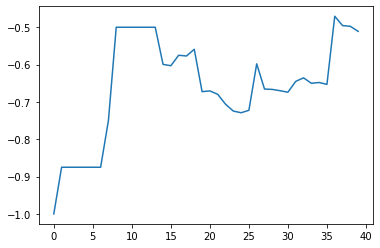

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.arange(40), rewards.mean(axis=2).mean(axis=0))

### Q8

In [7]:
# Mrand
results = []

for k in range(4):
    Turns = np.array(['X','O'])
    n_games = 10000
    winners = []
    count = []
    qvals = defaultdict(lambda: np.zeros(9))  
    assignments = defaultdict(lambda: len(assignments))
    alpha = 0.05
    gamma = 0.99
    max_eps = 0.8
    min_eps = 0.1
    n_star = 1000 #[1 1000 5000 10000 15000 20000 30000 40000]
    for i in range(1, n_games+1):
        # TESTING PHASE
        if i%250==0:
            print("Testing...")
            current_testing = []
            for w in range(500):
                #Reset the environment
                env.reset()
                grid, _, __ = env.observe()
                #Initialize the two players 
                player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[w%2])
                player_q = Q_Player(epsilon=0., player=Turns[1 - w%2])
                for j in range(9):
                    if env.current_player == player_opt_1.player:
                        move = player_opt_1.act(grid)
                        grid, end, winner = env.step(move, print_grid=False)

                    else:
                        move = player_q.act(grid, assignments, qvals)
                        grid, end, winner = env.step(move, print_grid=False)

                    if end:
                        current_testing.append(winner)
                        env.reset()
                        break
            winners.append(current_testing)
        # END OF TESTING               
        eps = max(min_eps, max_eps*(1-((i)/n_star))) #dynamic epsilon update
        print(k,i)
        env.reset()
        grid, _, __ = env.observe()
        player_q_1 = Q_Player(epsilon=eps, player=Turns[i%2])
        player_q_2 = Q_Player(epsilon=eps, player=Turns[1 - i%2])
        for j in range(9):
            if env.current_player == player_q_1.player:
                move = player_q_1.act(grid, assignments, qvals)
                assignments, qvals = player_q_1.return_dicts()
                last_move_q_1 = convert(move)
                last_grid_q_1 = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)
                
            else:
                move = player_q_2.act(grid, assignments, qvals)
                assignments, qvals = player_q_2.return_dicts()
                last_move_q_2 = convert(move)
                last_grid_q_2 = assignments[str(grid)]
                grid, end, winner = env.step(move, print_grid=False)

            if (env.current_player == player_q_1.player and j!=0) or end:
                qvals[last_grid_q_1][last_move_q_1] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q_1][last_move_q_1])
            elif (env.current_player == player_q_2.player and j!=0) or end:
                qvals[last_grid_q_2][last_move_q_2] += alpha*(env.reward(player=Turns[1 - i%2]) + gamma*np.nanmax(qvals[assignments[str(grid)]]) - qvals[last_grid_q_2][last_move_q_2])
            if end:
                env.reset()
                break
    results.append(winners)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

KeyboardInterrupt: 

In [17]:
np.save("Q8_n40000", results)